In [72]:
#!pip install gretel_synthetics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig, OutputType, Normalization
print(pd.__version__)

1.5.3


In [3]:
MODEL = 1 # 0 = th v air, 1 = el v sky

In [4]:
model_name = 'th_v_air' if MODEL==0 else 'el_v_sky'

In [5]:
index = [0,3] if MODEL==0 else [1,2]

base_data_train, base_data_test = np.load('../../data/training_data/training_data_1month.npy', allow_pickle=True)
base_data_train, base_data_test = base_data_train[:,:,index], base_data_test[:,:,index] # 0,3 = th vs air; 1,2 = el vs sky, 6 = month, 7 = winter/summer
print(base_data_train.shape, base_data_test.shape)

(108, 730, 2) (12, 730, 2)


In [6]:
from sklearn.preprocessing import MinMaxScaler

scalers = {var_name: MinMaxScaler(feature_range=(-1,1)) for var_name in ['G.air.T', 'G.E_th_I', 'month']}

temp_var, energy_var = base_data_train[:,:,0], base_data_train[:,:,1]
temp_var_test, energy_var_test = base_data_test[:,:,0], base_data_test[:,:,1]
#indicator_var, indicator_var_test = base_data_train[:,:,2], base_data_test[:,:,2]

temp_var = scalers['G.air.T'].fit_transform(temp_var)
energy_var = scalers['G.E_th_I'].fit_transform(energy_var)
#indicator_var = scalers['month'].fit_transform(indicator_var)

temp_var_test = scalers['G.air.T'].fit_transform(temp_var_test)
energy_var_test = scalers['G.E_th_I'].fit_transform(energy_var_test)
#indicator_var_test = scalers['month'].fit_transform(indicator_var_test)

scaled_data_train, scaled_data_test = np.stack((temp_var, energy_var), axis=-1), np.stack((temp_var_test, energy_var_test), axis=-1)
print(scaled_data_train.shape, scaled_data_test.shape)

(108, 730, 2) (12, 730, 2)


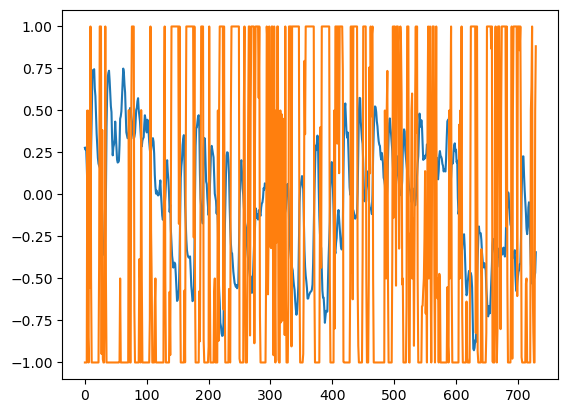

In [7]:
plt.plot(scaled_data_train[10])
plt.show()

In [8]:
attributes = np.random.randint(0, 1, size=(base_data_train.shape[0],1))
features = scaled_data_train.copy()

In [9]:
print(attributes.shape, features.shape)

(108, 1) (108, 730, 2)


In [10]:
type(attributes)

numpy.ndarray

In [82]:
# Hide GPU from visible devices
#tf.config.set_visible_devices([], 'GPU')
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [11]:
b_sizes = [2,4,6,8,10,12,16,20,24,32]
e_sizes = [2000, 5000]
model_samples = []
for e_size in e_sizes:
    for b_size in b_sizes:
        model = DGAN(DGANConfig(
            max_sequence_len=scaled_data_train.shape[1],
            sample_len=1,
            batch_size=b_size,
            epochs=e_size,  # For real data sets, 100-1000 epochs is typical
        ))
        
        model.train_numpy(
            attributes=attributes,
            attribute_types = [OutputType.DISCRETE] * 1,
            features=features,
            feature_types = [OutputType.CONTINUOUS] * 2,
        )
        
        # Generate synthetic data
        synthetic_attributes, synthetic_features = model.generate_numpy(1000)
        model_samples.append(synthetic_features)
        model.save(f'../../data/models/model_data/DGAN_{model_name}_b{b_size}_e{e_size}')

/home/mjmc2/.local/lib/python3.10/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
/home/mjmc2/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:187: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
2024-04-10 17:35:10,966 : MainThread : INFO : epoch: 0
2024-04-10 17:35:17,981 : MainThread : INFO : epoch: 1
2024-04-10 17:35:22,079 : MainThread : INFO : epoch: 2
2024-04-10 17:35:26,175 : MainThread : INFO : epoch: 3
2024-04-10 17:35:30,170 : MainThread : INFO : epoch: 4
2024-04-10 17:35:34,297 : MainThread : INFO : epoch: 5
2024-04-10 17:35:38,430 : MainThread : INFO : epoch: 6
2024-04-10 17:35:42,610 : MainThread : INFO : epoch: 7
2024-04-10 17:35:46,503 : MainThread : INFO : epoch: 8
2024-04-10 17:35:50,054 : MainThread 

2024-04-10 17:44:32,575 : MainThread : INFO : epoch: 138
2024-04-10 17:44:36,557 : MainThread : INFO : epoch: 139
2024-04-10 17:44:40,610 : MainThread : INFO : epoch: 140
2024-04-10 17:44:44,669 : MainThread : INFO : epoch: 141
2024-04-10 17:44:48,707 : MainThread : INFO : epoch: 142
2024-04-10 17:44:52,689 : MainThread : INFO : epoch: 143
2024-04-10 17:44:56,767 : MainThread : INFO : epoch: 144
2024-04-10 17:45:00,819 : MainThread : INFO : epoch: 145
2024-04-10 17:45:04,849 : MainThread : INFO : epoch: 146
2024-04-10 17:45:08,868 : MainThread : INFO : epoch: 147
2024-04-10 17:45:12,976 : MainThread : INFO : epoch: 148
2024-04-10 17:45:17,077 : MainThread : INFO : epoch: 149
2024-04-10 17:45:21,091 : MainThread : INFO : epoch: 150
2024-04-10 17:45:25,077 : MainThread : INFO : epoch: 151
2024-04-10 17:45:29,174 : MainThread : INFO : epoch: 152
2024-04-10 17:45:33,277 : MainThread : INFO : epoch: 153
2024-04-10 17:45:37,330 : MainThread : INFO : epoch: 154
2024-04-10 17:45:41,379 : MainT

2024-04-10 17:54:18,714 : MainThread : INFO : epoch: 282
2024-04-10 17:54:22,816 : MainThread : INFO : epoch: 283
2024-04-10 17:54:26,838 : MainThread : INFO : epoch: 284
2024-04-10 17:54:30,945 : MainThread : INFO : epoch: 285
2024-04-10 17:54:35,060 : MainThread : INFO : epoch: 286
2024-04-10 17:54:39,163 : MainThread : INFO : epoch: 287
2024-04-10 17:54:43,150 : MainThread : INFO : epoch: 288
2024-04-10 17:54:47,275 : MainThread : INFO : epoch: 289
2024-04-10 17:54:51,399 : MainThread : INFO : epoch: 290
2024-04-10 17:54:55,463 : MainThread : INFO : epoch: 291
2024-04-10 17:54:59,482 : MainThread : INFO : epoch: 292
2024-04-10 17:55:03,596 : MainThread : INFO : epoch: 293
2024-04-10 17:55:07,701 : MainThread : INFO : epoch: 294
2024-04-10 17:55:11,831 : MainThread : INFO : epoch: 295
2024-04-10 17:55:15,845 : MainThread : INFO : epoch: 296
2024-04-10 17:55:19,949 : MainThread : INFO : epoch: 297
2024-04-10 17:55:24,039 : MainThread : INFO : epoch: 298
2024-04-10 17:55:28,117 : MainT

2024-04-10 18:04:04,736 : MainThread : INFO : epoch: 426
2024-04-10 18:04:08,830 : MainThread : INFO : epoch: 427
2024-04-10 18:04:12,953 : MainThread : INFO : epoch: 428
2024-04-10 18:04:17,044 : MainThread : INFO : epoch: 429
2024-04-10 18:04:21,109 : MainThread : INFO : epoch: 430
2024-04-10 18:04:25,232 : MainThread : INFO : epoch: 431
2024-04-10 18:04:29,322 : MainThread : INFO : epoch: 432
2024-04-10 18:04:33,367 : MainThread : INFO : epoch: 433
2024-04-10 18:04:37,407 : MainThread : INFO : epoch: 434
2024-04-10 18:04:41,478 : MainThread : INFO : epoch: 435
2024-04-10 18:04:45,526 : MainThread : INFO : epoch: 436
2024-04-10 18:04:49,500 : MainThread : INFO : epoch: 437
2024-04-10 18:04:53,557 : MainThread : INFO : epoch: 438
2024-04-10 18:04:57,623 : MainThread : INFO : epoch: 439
2024-04-10 18:05:01,665 : MainThread : INFO : epoch: 440
2024-04-10 18:05:05,645 : MainThread : INFO : epoch: 441
2024-04-10 18:05:09,630 : MainThread : INFO : epoch: 442
2024-04-10 18:05:13,703 : MainT

2024-04-10 18:13:49,709 : MainThread : INFO : epoch: 570
2024-04-10 18:13:53,750 : MainThread : INFO : epoch: 571
2024-04-10 18:13:57,813 : MainThread : INFO : epoch: 572
2024-04-10 18:14:01,895 : MainThread : INFO : epoch: 573
2024-04-10 18:14:06,011 : MainThread : INFO : epoch: 574
2024-04-10 18:14:10,036 : MainThread : INFO : epoch: 575
2024-04-10 18:14:14,129 : MainThread : INFO : epoch: 576
2024-04-10 18:14:18,229 : MainThread : INFO : epoch: 577
2024-04-10 18:14:22,353 : MainThread : INFO : epoch: 578
2024-04-10 18:14:26,333 : MainThread : INFO : epoch: 579
2024-04-10 18:14:30,427 : MainThread : INFO : epoch: 580
2024-04-10 18:14:34,520 : MainThread : INFO : epoch: 581
2024-04-10 18:14:38,621 : MainThread : INFO : epoch: 582
2024-04-10 18:14:42,652 : MainThread : INFO : epoch: 583
2024-04-10 18:14:46,745 : MainThread : INFO : epoch: 584
2024-04-10 18:14:50,816 : MainThread : INFO : epoch: 585
2024-04-10 18:14:54,893 : MainThread : INFO : epoch: 586
2024-04-10 18:14:58,892 : MainT

2024-04-10 17:49:21,934 : MainThread : INFO : epoch: 714
2024-04-10 17:49:26,048 : MainThread : INFO : epoch: 715
2024-04-10 17:49:30,161 : MainThread : INFO : epoch: 716
2024-04-10 17:49:34,216 : MainThread : INFO : epoch: 717
2024-04-10 17:49:38,319 : MainThread : INFO : epoch: 718
2024-04-10 17:49:42,408 : MainThread : INFO : epoch: 719
2024-04-10 17:49:46,490 : MainThread : INFO : epoch: 720
2024-04-10 17:49:50,506 : MainThread : INFO : epoch: 721
2024-04-10 17:49:54,596 : MainThread : INFO : epoch: 722
2024-04-10 17:49:58,716 : MainThread : INFO : epoch: 723
2024-04-10 17:50:02,839 : MainThread : INFO : epoch: 724
2024-04-10 17:50:06,865 : MainThread : INFO : epoch: 725
2024-04-10 17:50:10,978 : MainThread : INFO : epoch: 726
2024-04-10 17:50:15,081 : MainThread : INFO : epoch: 727
2024-04-10 17:50:19,161 : MainThread : INFO : epoch: 728
2024-04-10 17:50:23,166 : MainThread : INFO : epoch: 729
2024-04-10 17:50:27,282 : MainThread : INFO : epoch: 730
2024-04-10 17:50:31,406 : MainT

2024-04-10 17:59:08,679 : MainThread : INFO : epoch: 858
2024-04-10 17:59:12,787 : MainThread : INFO : epoch: 859
2024-04-10 17:59:16,899 : MainThread : INFO : epoch: 860
2024-04-10 17:59:21,003 : MainThread : INFO : epoch: 861
2024-04-10 17:59:25,020 : MainThread : INFO : epoch: 862
2024-04-10 17:59:29,128 : MainThread : INFO : epoch: 863
2024-04-10 17:59:33,233 : MainThread : INFO : epoch: 864
2024-04-10 17:59:37,328 : MainThread : INFO : epoch: 865
2024-04-10 17:59:41,342 : MainThread : INFO : epoch: 866
2024-04-10 17:59:45,437 : MainThread : INFO : epoch: 867
2024-04-10 17:59:49,532 : MainThread : INFO : epoch: 868
2024-04-10 17:59:53,641 : MainThread : INFO : epoch: 869
2024-04-10 17:59:57,596 : MainThread : INFO : epoch: 870
2024-04-10 18:00:01,631 : MainThread : INFO : epoch: 871
2024-04-10 18:00:05,733 : MainThread : INFO : epoch: 872
2024-04-10 18:00:09,799 : MainThread : INFO : epoch: 873
2024-04-10 18:00:13,774 : MainThread : INFO : epoch: 874
2024-04-10 18:00:17,828 : MainT

2024-04-10 18:08:55,603 : MainThread : INFO : epoch: 1002
2024-04-10 18:08:59,649 : MainThread : INFO : epoch: 1003
2024-04-10 18:09:03,721 : MainThread : INFO : epoch: 1004
2024-04-10 18:09:07,833 : MainThread : INFO : epoch: 1005
2024-04-10 18:09:11,942 : MainThread : INFO : epoch: 1006
2024-04-10 18:09:15,965 : MainThread : INFO : epoch: 1007
2024-04-10 18:09:20,075 : MainThread : INFO : epoch: 1008
2024-04-10 18:09:24,189 : MainThread : INFO : epoch: 1009
2024-04-10 18:09:28,287 : MainThread : INFO : epoch: 1010
2024-04-10 18:09:32,305 : MainThread : INFO : epoch: 1011
2024-04-10 18:09:36,378 : MainThread : INFO : epoch: 1012
2024-04-10 18:09:40,465 : MainThread : INFO : epoch: 1013
2024-04-10 18:09:44,490 : MainThread : INFO : epoch: 1014
2024-04-10 18:09:48,500 : MainThread : INFO : epoch: 1015
2024-04-10 18:09:52,612 : MainThread : INFO : epoch: 1016
2024-04-10 18:09:56,719 : MainThread : INFO : epoch: 1017
2024-04-10 18:10:00,838 : MainThread : INFO : epoch: 1018
2024-04-10 18:

2024-04-10 18:18:33,744 : MainThread : INFO : epoch: 1144
2024-04-10 18:18:37,792 : MainThread : INFO : epoch: 1145
2024-04-10 18:18:41,889 : MainThread : INFO : epoch: 1146
2024-04-10 18:18:45,987 : MainThread : INFO : epoch: 1147
2024-04-10 18:18:50,094 : MainThread : INFO : epoch: 1148
2024-04-10 18:18:54,118 : MainThread : INFO : epoch: 1149
2024-04-10 18:18:58,225 : MainThread : INFO : epoch: 1150
2024-04-10 18:19:02,319 : MainThread : INFO : epoch: 1151
2024-04-10 18:19:06,418 : MainThread : INFO : epoch: 1152
2024-04-10 18:19:10,360 : MainThread : INFO : epoch: 1153
2024-04-10 18:19:14,446 : MainThread : INFO : epoch: 1154
2024-04-10 18:19:18,523 : MainThread : INFO : epoch: 1155
2024-04-10 18:19:22,645 : MainThread : INFO : epoch: 1156
2024-04-10 18:19:26,659 : MainThread : INFO : epoch: 1157
2024-04-10 18:19:30,771 : MainThread : INFO : epoch: 1158
2024-04-10 18:19:34,877 : MainThread : INFO : epoch: 1159
2024-04-10 18:19:38,967 : MainThread : INFO : epoch: 1160
2024-04-10 18:

2024-04-10 18:28:12,320 : MainThread : INFO : epoch: 1286
2024-04-10 18:28:16,402 : MainThread : INFO : epoch: 1287
2024-04-10 18:28:20,481 : MainThread : INFO : epoch: 1288
2024-04-10 18:28:24,597 : MainThread : INFO : epoch: 1289
2024-04-10 18:28:28,600 : MainThread : INFO : epoch: 1290
2024-04-10 18:28:32,699 : MainThread : INFO : epoch: 1291
2024-04-10 18:28:36,796 : MainThread : INFO : epoch: 1292
2024-04-10 18:28:40,883 : MainThread : INFO : epoch: 1293
2024-04-10 18:28:44,862 : MainThread : INFO : epoch: 1294
2024-04-10 18:28:48,988 : MainThread : INFO : epoch: 1295
2024-04-10 18:28:53,109 : MainThread : INFO : epoch: 1296
2024-04-10 18:28:57,219 : MainThread : INFO : epoch: 1297
2024-04-10 18:29:01,250 : MainThread : INFO : epoch: 1298
2024-04-10 18:29:05,362 : MainThread : INFO : epoch: 1299
2024-04-10 18:29:09,461 : MainThread : INFO : epoch: 1300
2024-04-10 18:29:13,552 : MainThread : INFO : epoch: 1301
2024-04-10 18:29:17,572 : MainThread : INFO : epoch: 1302
2024-04-10 18:

2024-04-10 18:37:51,114 : MainThread : INFO : epoch: 1428
2024-04-10 18:37:55,194 : MainThread : INFO : epoch: 1429
2024-04-10 18:37:59,289 : MainThread : INFO : epoch: 1430
2024-04-10 18:38:03,343 : MainThread : INFO : epoch: 1431
2024-04-10 18:38:07,362 : MainThread : INFO : epoch: 1432
2024-04-10 18:38:11,481 : MainThread : INFO : epoch: 1433
2024-04-10 18:38:15,587 : MainThread : INFO : epoch: 1434
2024-04-10 18:38:19,627 : MainThread : INFO : epoch: 1435
2024-04-10 18:38:23,707 : MainThread : INFO : epoch: 1436
2024-04-10 18:38:27,839 : MainThread : INFO : epoch: 1437
2024-04-10 18:38:31,995 : MainThread : INFO : epoch: 1438
2024-04-10 18:38:36,015 : MainThread : INFO : epoch: 1439
2024-04-10 18:38:40,074 : MainThread : INFO : epoch: 1440
2024-04-10 18:38:44,148 : MainThread : INFO : epoch: 1441
2024-04-10 18:38:48,248 : MainThread : INFO : epoch: 1442
2024-04-10 18:38:52,259 : MainThread : INFO : epoch: 1443
2024-04-10 18:38:56,362 : MainThread : INFO : epoch: 1444
2024-04-10 18:

2024-04-10 18:47:30,265 : MainThread : INFO : epoch: 1570
2024-04-10 18:47:34,366 : MainThread : INFO : epoch: 1571
2024-04-10 18:47:38,465 : MainThread : INFO : epoch: 1572
2024-04-10 18:47:42,471 : MainThread : INFO : epoch: 1573
2024-04-10 18:47:46,570 : MainThread : INFO : epoch: 1574
2024-04-10 18:47:50,668 : MainThread : INFO : epoch: 1575
2024-04-10 18:47:54,768 : MainThread : INFO : epoch: 1576
2024-04-10 18:47:58,790 : MainThread : INFO : epoch: 1577
2024-04-10 18:48:02,896 : MainThread : INFO : epoch: 1578
2024-04-10 18:48:06,995 : MainThread : INFO : epoch: 1579
2024-04-10 18:48:11,094 : MainThread : INFO : epoch: 1580
2024-04-10 18:48:15,116 : MainThread : INFO : epoch: 1581
2024-04-10 18:48:19,227 : MainThread : INFO : epoch: 1582
2024-04-10 18:48:23,332 : MainThread : INFO : epoch: 1583
2024-04-10 18:48:27,391 : MainThread : INFO : epoch: 1584
2024-04-10 18:48:31,454 : MainThread : INFO : epoch: 1585
2024-04-10 18:48:35,552 : MainThread : INFO : epoch: 1586
2024-04-10 18:

2024-04-10 18:57:08,616 : MainThread : INFO : epoch: 1712
2024-04-10 18:57:12,707 : MainThread : INFO : epoch: 1713
2024-04-10 18:57:16,720 : MainThread : INFO : epoch: 1714
2024-04-10 18:57:20,832 : MainThread : INFO : epoch: 1715
2024-04-10 18:57:24,912 : MainThread : INFO : epoch: 1716
2024-04-10 18:57:29,005 : MainThread : INFO : epoch: 1717
2024-04-10 18:57:32,899 : MainThread : INFO : epoch: 1718
2024-04-10 18:57:36,947 : MainThread : INFO : epoch: 1719
2024-04-10 18:57:41,051 : MainThread : INFO : epoch: 1720
2024-04-10 18:57:45,158 : MainThread : INFO : epoch: 1721
2024-04-10 18:57:49,163 : MainThread : INFO : epoch: 1722
2024-04-10 18:57:53,251 : MainThread : INFO : epoch: 1723
2024-04-10 18:57:57,326 : MainThread : INFO : epoch: 1724
2024-04-10 18:58:01,408 : MainThread : INFO : epoch: 1725
2024-04-10 18:58:05,405 : MainThread : INFO : epoch: 1726
2024-04-10 18:58:09,492 : MainThread : INFO : epoch: 1727
2024-04-10 18:58:13,576 : MainThread : INFO : epoch: 1728
2024-04-10 18:

2024-04-10 19:06:47,371 : MainThread : INFO : epoch: 1854
2024-04-10 19:06:51,421 : MainThread : INFO : epoch: 1855
2024-04-10 19:06:55,480 : MainThread : INFO : epoch: 1856
2024-04-10 19:06:59,600 : MainThread : INFO : epoch: 1857
2024-04-10 19:07:03,696 : MainThread : INFO : epoch: 1858
2024-04-10 19:07:07,797 : MainThread : INFO : epoch: 1859
2024-04-10 19:07:11,916 : MainThread : INFO : epoch: 1860
2024-04-10 19:07:16,026 : MainThread : INFO : epoch: 1861
2024-04-10 19:07:20,091 : MainThread : INFO : epoch: 1862
2024-04-10 19:07:24,102 : MainThread : INFO : epoch: 1863
2024-04-10 19:07:28,190 : MainThread : INFO : epoch: 1864
2024-04-10 19:07:32,295 : MainThread : INFO : epoch: 1865
2024-04-10 19:07:36,390 : MainThread : INFO : epoch: 1866
2024-04-10 19:07:40,396 : MainThread : INFO : epoch: 1867
2024-04-10 19:07:44,531 : MainThread : INFO : epoch: 1868
2024-04-10 19:07:48,630 : MainThread : INFO : epoch: 1869
2024-04-10 19:07:52,729 : MainThread : INFO : epoch: 1870
2024-04-10 19:

2024-04-10 19:16:25,269 : MainThread : INFO : epoch: 1996
2024-04-10 19:16:29,207 : MainThread : INFO : epoch: 1997
2024-04-10 19:16:33,311 : MainThread : INFO : epoch: 1998
2024-04-10 19:16:37,409 : MainThread : INFO : epoch: 1999
/home/mjmc2/.local/lib/python3.10/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
/home/mjmc2/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:187: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
2024-04-10 19:16:43,822 : MainThread : INFO : epoch: 0
2024-04-10 19:16:45,660 : MainThread : INFO : epoch: 1
2024-04-10 19:16:47,723 : MainThread : INFO : epoch: 2
2024-04-10 19:16:49,781 : MainThread : INFO : epoch: 3
2024-04-10 19:16:51,840 : MainThread : INFO : epoch: 4
2024-04-10 19:16:53,888 :

2024-04-10 19:21:16,274 : MainThread : INFO : epoch: 134
2024-04-10 19:21:18,344 : MainThread : INFO : epoch: 135
2024-04-10 19:21:20,404 : MainThread : INFO : epoch: 136
2024-04-10 19:21:22,471 : MainThread : INFO : epoch: 137
2024-04-10 19:21:24,541 : MainThread : INFO : epoch: 138
2024-04-10 19:21:26,604 : MainThread : INFO : epoch: 139
2024-04-10 19:21:28,670 : MainThread : INFO : epoch: 140
2024-04-10 19:21:30,745 : MainThread : INFO : epoch: 141
2024-04-10 19:21:32,717 : MainThread : INFO : epoch: 142
2024-04-10 19:21:34,781 : MainThread : INFO : epoch: 143
2024-04-10 19:21:36,845 : MainThread : INFO : epoch: 144
2024-04-10 19:21:38,916 : MainThread : INFO : epoch: 145
2024-04-10 19:21:40,979 : MainThread : INFO : epoch: 146
2024-04-10 19:21:43,051 : MainThread : INFO : epoch: 147
2024-04-10 19:21:45,119 : MainThread : INFO : epoch: 148
2024-04-10 19:21:47,161 : MainThread : INFO : epoch: 149
2024-04-10 19:21:49,146 : MainThread : INFO : epoch: 150
2024-04-10 19:21:51,214 : MainT

2024-04-10 19:26:11,480 : MainThread : INFO : epoch: 278
2024-04-10 19:26:13,544 : MainThread : INFO : epoch: 279
2024-04-10 19:26:15,608 : MainThread : INFO : epoch: 280
2024-04-10 19:26:17,663 : MainThread : INFO : epoch: 281
2024-04-10 19:26:19,663 : MainThread : INFO : epoch: 282
2024-04-10 19:26:21,701 : MainThread : INFO : epoch: 283
2024-04-10 19:26:23,769 : MainThread : INFO : epoch: 284
2024-04-10 19:26:25,834 : MainThread : INFO : epoch: 285
2024-04-10 19:26:27,901 : MainThread : INFO : epoch: 286
2024-04-10 19:26:29,968 : MainThread : INFO : epoch: 287
2024-04-10 19:26:32,032 : MainThread : INFO : epoch: 288
2024-04-10 19:26:34,096 : MainThread : INFO : epoch: 289
2024-04-10 19:26:36,073 : MainThread : INFO : epoch: 290
2024-04-10 19:26:38,131 : MainThread : INFO : epoch: 291
2024-04-10 19:26:40,193 : MainThread : INFO : epoch: 292
2024-04-10 19:26:42,252 : MainThread : INFO : epoch: 293
2024-04-10 19:26:44,338 : MainThread : INFO : epoch: 294
2024-04-10 19:26:46,417 : MainT

2024-04-10 19:31:04,486 : MainThread : INFO : epoch: 422
2024-04-10 19:31:06,535 : MainThread : INFO : epoch: 423
2024-04-10 19:31:08,475 : MainThread : INFO : epoch: 424
2024-04-10 19:31:10,531 : MainThread : INFO : epoch: 425
2024-04-10 19:31:12,587 : MainThread : INFO : epoch: 426
2024-04-10 19:31:14,648 : MainThread : INFO : epoch: 427
2024-04-10 19:31:16,711 : MainThread : INFO : epoch: 428
2024-04-10 19:31:18,770 : MainThread : INFO : epoch: 429
2024-04-10 19:31:20,823 : MainThread : INFO : epoch: 430
2024-04-10 19:31:22,880 : MainThread : INFO : epoch: 431
2024-04-10 19:31:24,843 : MainThread : INFO : epoch: 432
2024-04-10 19:31:26,889 : MainThread : INFO : epoch: 433
2024-04-10 19:31:28,950 : MainThread : INFO : epoch: 434
2024-04-10 19:31:31,003 : MainThread : INFO : epoch: 435
2024-04-10 19:31:33,064 : MainThread : INFO : epoch: 436
2024-04-10 19:31:35,119 : MainThread : INFO : epoch: 437
2024-04-10 19:31:37,181 : MainThread : INFO : epoch: 438
2024-04-10 19:31:39,216 : MainT

2024-04-10 19:36:00,100 : MainThread : INFO : epoch: 566
2024-04-10 19:36:02,165 : MainThread : INFO : epoch: 567
2024-04-10 19:36:04,235 : MainThread : INFO : epoch: 568
2024-04-10 19:36:06,300 : MainThread : INFO : epoch: 569
2024-04-10 19:36:08,372 : MainThread : INFO : epoch: 570
2024-04-10 19:36:10,447 : MainThread : INFO : epoch: 571
2024-04-10 19:36:12,369 : MainThread : INFO : epoch: 572
2024-04-10 19:36:14,443 : MainThread : INFO : epoch: 573
2024-04-10 19:36:16,509 : MainThread : INFO : epoch: 574
2024-04-10 19:36:18,573 : MainThread : INFO : epoch: 575
2024-04-10 19:36:20,653 : MainThread : INFO : epoch: 576
2024-04-10 19:36:22,728 : MainThread : INFO : epoch: 577
2024-04-10 19:36:24,810 : MainThread : INFO : epoch: 578
2024-04-10 19:36:26,868 : MainThread : INFO : epoch: 579
2024-04-10 19:36:28,847 : MainThread : INFO : epoch: 580
2024-04-10 19:36:30,929 : MainThread : INFO : epoch: 581
2024-04-10 19:36:32,999 : MainThread : INFO : epoch: 582
2024-04-10 19:36:35,063 : MainT

2024-04-10 19:40:55,333 : MainThread : INFO : epoch: 710
2024-04-10 19:40:57,392 : MainThread : INFO : epoch: 711
2024-04-10 19:40:59,417 : MainThread : INFO : epoch: 712
2024-04-10 19:41:01,436 : MainThread : INFO : epoch: 713
2024-04-10 19:41:03,496 : MainThread : INFO : epoch: 714
2024-04-10 19:41:05,552 : MainThread : INFO : epoch: 715
2024-04-10 19:41:07,609 : MainThread : INFO : epoch: 716
2024-04-10 19:41:09,671 : MainThread : INFO : epoch: 717
2024-04-10 19:41:11,730 : MainThread : INFO : epoch: 718
2024-04-10 19:41:13,791 : MainThread : INFO : epoch: 719
2024-04-10 19:41:15,782 : MainThread : INFO : epoch: 720
2024-04-10 19:41:17,804 : MainThread : INFO : epoch: 721
2024-04-10 19:41:19,868 : MainThread : INFO : epoch: 722
2024-04-10 19:41:21,930 : MainThread : INFO : epoch: 723
2024-04-10 19:41:23,995 : MainThread : INFO : epoch: 724
2024-04-10 19:41:26,060 : MainThread : INFO : epoch: 725
2024-04-10 19:41:28,128 : MainThread : INFO : epoch: 726
2024-04-10 19:41:30,201 : MainT

2024-04-10 19:45:48,631 : MainThread : INFO : epoch: 854
2024-04-10 19:45:50,693 : MainThread : INFO : epoch: 855
2024-04-10 19:45:52,756 : MainThread : INFO : epoch: 856
2024-04-10 19:45:54,813 : MainThread : INFO : epoch: 857
2024-04-10 19:45:56,878 : MainThread : INFO : epoch: 858
2024-04-10 19:45:58,941 : MainThread : INFO : epoch: 859
2024-04-10 19:46:01,005 : MainThread : INFO : epoch: 860
2024-04-10 19:46:03,053 : MainThread : INFO : epoch: 861
2024-04-10 19:46:05,028 : MainThread : INFO : epoch: 862
2024-04-10 19:46:07,095 : MainThread : INFO : epoch: 863
2024-04-10 19:46:09,163 : MainThread : INFO : epoch: 864
2024-04-10 19:46:11,237 : MainThread : INFO : epoch: 865
2024-04-10 19:46:13,291 : MainThread : INFO : epoch: 866
2024-04-10 19:46:15,357 : MainThread : INFO : epoch: 867
2024-04-10 19:46:17,429 : MainThread : INFO : epoch: 868
2024-04-10 19:46:19,457 : MainThread : INFO : epoch: 869
2024-04-10 19:46:21,486 : MainThread : INFO : epoch: 870
2024-04-10 19:46:23,555 : MainT

2024-04-10 19:50:43,619 : MainThread : INFO : epoch: 998
2024-04-10 19:50:45,686 : MainThread : INFO : epoch: 999
2024-04-10 19:50:47,752 : MainThread : INFO : epoch: 1000
2024-04-10 19:50:49,842 : MainThread : INFO : epoch: 1001
2024-04-10 19:50:51,838 : MainThread : INFO : epoch: 1002
2024-04-10 19:50:53,895 : MainThread : INFO : epoch: 1003
2024-04-10 19:50:55,982 : MainThread : INFO : epoch: 1004
2024-04-10 19:50:58,072 : MainThread : INFO : epoch: 1005
2024-04-10 19:51:00,131 : MainThread : INFO : epoch: 1006
2024-04-10 19:51:02,210 : MainThread : INFO : epoch: 1007
2024-04-10 19:51:04,298 : MainThread : INFO : epoch: 1008
2024-04-10 19:51:06,389 : MainThread : INFO : epoch: 1009
2024-04-10 19:51:08,393 : MainThread : INFO : epoch: 1010
2024-04-10 19:51:10,463 : MainThread : INFO : epoch: 1011
2024-04-10 19:51:12,529 : MainThread : INFO : epoch: 1012
2024-04-10 19:51:14,599 : MainThread : INFO : epoch: 1013
2024-04-10 19:51:16,668 : MainThread : INFO : epoch: 1014
2024-04-10 19:51

2024-04-10 19:55:34,303 : MainThread : INFO : epoch: 1140
2024-04-10 19:55:36,363 : MainThread : INFO : epoch: 1141
2024-04-10 19:55:38,423 : MainThread : INFO : epoch: 1142
2024-04-10 19:55:40,403 : MainThread : INFO : epoch: 1143
2024-04-10 19:55:42,464 : MainThread : INFO : epoch: 1144
2024-04-10 19:55:44,542 : MainThread : INFO : epoch: 1145
2024-04-10 19:55:46,620 : MainThread : INFO : epoch: 1146
2024-04-10 19:55:48,686 : MainThread : INFO : epoch: 1147
2024-04-10 19:55:50,753 : MainThread : INFO : epoch: 1148
2024-04-10 19:55:52,827 : MainThread : INFO : epoch: 1149
2024-04-10 19:55:54,904 : MainThread : INFO : epoch: 1150
2024-04-10 19:55:56,896 : MainThread : INFO : epoch: 1151
2024-04-10 19:55:58,957 : MainThread : INFO : epoch: 1152
2024-04-10 19:56:01,021 : MainThread : INFO : epoch: 1153
2024-04-10 19:56:03,109 : MainThread : INFO : epoch: 1154
2024-04-10 19:56:05,170 : MainThread : INFO : epoch: 1155
2024-04-10 19:56:07,231 : MainThread : INFO : epoch: 1156
2024-04-10 19:

2024-04-10 20:00:25,257 : MainThread : INFO : epoch: 1282
2024-04-10 20:00:27,294 : MainThread : INFO : epoch: 1283
2024-04-10 20:00:29,301 : MainThread : INFO : epoch: 1284
2024-04-10 20:00:31,372 : MainThread : INFO : epoch: 1285
2024-04-10 20:00:33,443 : MainThread : INFO : epoch: 1286
2024-04-10 20:00:35,515 : MainThread : INFO : epoch: 1287
2024-04-10 20:00:37,587 : MainThread : INFO : epoch: 1288
2024-04-10 20:00:39,662 : MainThread : INFO : epoch: 1289
2024-04-10 20:00:41,701 : MainThread : INFO : epoch: 1290
2024-04-10 20:00:43,690 : MainThread : INFO : epoch: 1291
2024-04-10 20:00:45,687 : MainThread : INFO : epoch: 1292
2024-04-10 20:00:47,713 : MainThread : INFO : epoch: 1293
2024-04-10 20:00:49,783 : MainThread : INFO : epoch: 1294
2024-04-10 20:00:51,853 : MainThread : INFO : epoch: 1295
2024-04-10 20:00:53,925 : MainThread : INFO : epoch: 1296
2024-04-10 20:00:55,991 : MainThread : INFO : epoch: 1297
2024-04-10 20:00:58,056 : MainThread : INFO : epoch: 1298
2024-04-10 20:

2024-04-10 20:05:14,971 : MainThread : INFO : epoch: 1424
2024-04-10 20:05:16,954 : MainThread : INFO : epoch: 1425
2024-04-10 20:05:19,023 : MainThread : INFO : epoch: 1426
2024-04-10 20:05:21,088 : MainThread : INFO : epoch: 1427
2024-04-10 20:05:23,160 : MainThread : INFO : epoch: 1428
2024-04-10 20:05:25,231 : MainThread : INFO : epoch: 1429
2024-04-10 20:05:27,303 : MainThread : INFO : epoch: 1430
2024-04-10 20:05:29,373 : MainThread : INFO : epoch: 1431
2024-04-10 20:05:31,400 : MainThread : INFO : epoch: 1432
2024-04-10 20:05:33,422 : MainThread : INFO : epoch: 1433
2024-04-10 20:05:35,492 : MainThread : INFO : epoch: 1434
2024-04-10 20:05:37,554 : MainThread : INFO : epoch: 1435
2024-04-10 20:05:39,616 : MainThread : INFO : epoch: 1436
2024-04-10 20:05:41,682 : MainThread : INFO : epoch: 1437
2024-04-10 20:05:43,732 : MainThread : INFO : epoch: 1438
2024-04-10 20:05:45,803 : MainThread : INFO : epoch: 1439
2024-04-10 20:05:47,807 : MainThread : INFO : epoch: 1440
2024-04-10 20:

2024-04-10 20:10:06,084 : MainThread : INFO : epoch: 1566
2024-04-10 20:10:08,140 : MainThread : INFO : epoch: 1567
2024-04-10 20:10:10,223 : MainThread : INFO : epoch: 1568
2024-04-10 20:10:12,302 : MainThread : INFO : epoch: 1569
2024-04-10 20:10:14,368 : MainThread : INFO : epoch: 1570
2024-04-10 20:10:16,442 : MainThread : INFO : epoch: 1571
2024-04-10 20:10:18,510 : MainThread : INFO : epoch: 1572
2024-04-10 20:10:20,450 : MainThread : INFO : epoch: 1573
2024-04-10 20:10:22,534 : MainThread : INFO : epoch: 1574
2024-04-10 20:10:24,596 : MainThread : INFO : epoch: 1575
2024-04-10 20:10:26,662 : MainThread : INFO : epoch: 1576
2024-04-10 20:10:28,730 : MainThread : INFO : epoch: 1577
2024-04-10 20:10:30,795 : MainThread : INFO : epoch: 1578
2024-04-10 20:10:32,856 : MainThread : INFO : epoch: 1579
2024-04-10 20:10:34,910 : MainThread : INFO : epoch: 1580
2024-04-10 20:10:36,888 : MainThread : INFO : epoch: 1581
2024-04-10 20:10:38,960 : MainThread : INFO : epoch: 1582
2024-04-10 20:

2024-04-10 20:14:57,602 : MainThread : INFO : epoch: 1708
2024-04-10 20:14:59,663 : MainThread : INFO : epoch: 1709
2024-04-10 20:15:01,733 : MainThread : INFO : epoch: 1710
2024-04-10 20:15:03,771 : MainThread : INFO : epoch: 1711
2024-04-10 20:15:05,829 : MainThread : INFO : epoch: 1712
2024-04-10 20:15:07,814 : MainThread : INFO : epoch: 1713
2024-04-10 20:15:09,775 : MainThread : INFO : epoch: 1714
2024-04-10 20:15:11,835 : MainThread : INFO : epoch: 1715
2024-04-10 20:15:13,895 : MainThread : INFO : epoch: 1716
2024-04-10 20:15:15,976 : MainThread : INFO : epoch: 1717
2024-04-10 20:15:18,048 : MainThread : INFO : epoch: 1718
2024-04-10 20:15:20,115 : MainThread : INFO : epoch: 1719
2024-04-10 20:15:22,177 : MainThread : INFO : epoch: 1720
2024-04-10 20:15:24,132 : MainThread : INFO : epoch: 1721
2024-04-10 20:15:26,198 : MainThread : INFO : epoch: 1722
2024-04-10 20:15:28,266 : MainThread : INFO : epoch: 1723
2024-04-10 20:15:30,333 : MainThread : INFO : epoch: 1724
2024-04-10 20:

2024-04-10 20:19:47,690 : MainThread : INFO : epoch: 1850
2024-04-10 20:19:49,758 : MainThread : INFO : epoch: 1851
2024-04-10 20:19:51,820 : MainThread : INFO : epoch: 1852
2024-04-10 20:19:53,886 : MainThread : INFO : epoch: 1853
2024-04-10 20:19:55,874 : MainThread : INFO : epoch: 1854
2024-04-10 20:19:57,925 : MainThread : INFO : epoch: 1855
2024-04-10 20:19:59,994 : MainThread : INFO : epoch: 1856
2024-04-10 20:20:02,063 : MainThread : INFO : epoch: 1857
2024-04-10 20:20:04,134 : MainThread : INFO : epoch: 1858
2024-04-10 20:20:06,206 : MainThread : INFO : epoch: 1859
2024-04-10 20:20:08,275 : MainThread : INFO : epoch: 1860
2024-04-10 20:20:10,344 : MainThread : INFO : epoch: 1861
2024-04-10 20:20:12,329 : MainThread : INFO : epoch: 1862
2024-04-10 20:20:14,404 : MainThread : INFO : epoch: 1863
2024-04-10 20:20:16,475 : MainThread : INFO : epoch: 1864
2024-04-10 20:20:18,544 : MainThread : INFO : epoch: 1865
2024-04-10 20:20:20,616 : MainThread : INFO : epoch: 1866
2024-04-10 20:

2024-04-10 20:24:38,372 : MainThread : INFO : epoch: 1992
2024-04-10 20:24:40,439 : MainThread : INFO : epoch: 1993
2024-04-10 20:24:42,506 : MainThread : INFO : epoch: 1994
2024-04-10 20:24:44,486 : MainThread : INFO : epoch: 1995
2024-04-10 20:24:46,550 : MainThread : INFO : epoch: 1996
2024-04-10 20:24:48,618 : MainThread : INFO : epoch: 1997
2024-04-10 20:24:50,682 : MainThread : INFO : epoch: 1998
2024-04-10 20:24:52,739 : MainThread : INFO : epoch: 1999
/home/mjmc2/.local/lib/python3.10/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
/home/mjmc2/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:187: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
2024-04-10 20:24:56,068 : MainThread : INFO : epoch: 0
2024-04-10 20

2024-04-10 20:27:53,874 : MainThread : INFO : epoch: 130
2024-04-10 20:27:55,232 : MainThread : INFO : epoch: 131
2024-04-10 20:27:56,565 : MainThread : INFO : epoch: 132
2024-04-10 20:27:57,943 : MainThread : INFO : epoch: 133
2024-04-10 20:27:59,336 : MainThread : INFO : epoch: 134
2024-04-10 20:28:00,707 : MainThread : INFO : epoch: 135
2024-04-10 20:28:02,102 : MainThread : INFO : epoch: 136
2024-04-10 20:28:03,491 : MainThread : INFO : epoch: 137
2024-04-10 20:28:04,883 : MainThread : INFO : epoch: 138
2024-04-10 20:28:06,277 : MainThread : INFO : epoch: 139
2024-04-10 20:28:07,668 : MainThread : INFO : epoch: 140
2024-04-10 20:28:09,070 : MainThread : INFO : epoch: 141
2024-04-10 20:28:10,466 : MainThread : INFO : epoch: 142
2024-04-10 20:28:11,797 : MainThread : INFO : epoch: 143
2024-04-10 20:28:13,178 : MainThread : INFO : epoch: 144
2024-04-10 20:28:14,577 : MainThread : INFO : epoch: 145
2024-04-10 20:28:15,979 : MainThread : INFO : epoch: 146
2024-04-10 20:28:17,372 : MainT

2024-04-10 20:31:11,639 : MainThread : INFO : epoch: 274
2024-04-10 20:31:13,026 : MainThread : INFO : epoch: 275
2024-04-10 20:31:14,402 : MainThread : INFO : epoch: 276
2024-04-10 20:31:15,776 : MainThread : INFO : epoch: 277
2024-04-10 20:31:17,144 : MainThread : INFO : epoch: 278
2024-04-10 20:31:18,525 : MainThread : INFO : epoch: 279
2024-04-10 20:31:19,907 : MainThread : INFO : epoch: 280
2024-04-10 20:31:21,298 : MainThread : INFO : epoch: 281
2024-04-10 20:31:22,685 : MainThread : INFO : epoch: 282
2024-04-10 20:31:23,983 : MainThread : INFO : epoch: 283
2024-04-10 20:31:25,358 : MainThread : INFO : epoch: 284
2024-04-10 20:31:26,742 : MainThread : INFO : epoch: 285
2024-04-10 20:31:28,124 : MainThread : INFO : epoch: 286
2024-04-10 20:31:29,512 : MainThread : INFO : epoch: 287
2024-04-10 20:31:30,893 : MainThread : INFO : epoch: 288
2024-04-10 20:31:32,275 : MainThread : INFO : epoch: 289
2024-04-10 20:31:33,657 : MainThread : INFO : epoch: 290
2024-04-10 20:31:35,043 : MainT

2024-04-10 20:34:29,202 : MainThread : INFO : epoch: 418
2024-04-10 20:34:30,583 : MainThread : INFO : epoch: 419
2024-04-10 20:34:31,968 : MainThread : INFO : epoch: 420
2024-04-10 20:34:33,350 : MainThread : INFO : epoch: 421
2024-04-10 20:34:34,735 : MainThread : INFO : epoch: 422
2024-04-10 20:34:36,037 : MainThread : INFO : epoch: 423
2024-04-10 20:34:37,418 : MainThread : INFO : epoch: 424
2024-04-10 20:34:38,800 : MainThread : INFO : epoch: 425
2024-04-10 20:34:40,182 : MainThread : INFO : epoch: 426
2024-04-10 20:34:41,561 : MainThread : INFO : epoch: 427
2024-04-10 20:34:42,943 : MainThread : INFO : epoch: 428
2024-04-10 20:34:44,321 : MainThread : INFO : epoch: 429
2024-04-10 20:34:45,697 : MainThread : INFO : epoch: 430
2024-04-10 20:34:47,078 : MainThread : INFO : epoch: 431
2024-04-10 20:34:48,464 : MainThread : INFO : epoch: 432
2024-04-10 20:34:49,844 : MainThread : INFO : epoch: 433
2024-04-10 20:34:51,204 : MainThread : INFO : epoch: 434
2024-04-10 20:34:52,524 : MainT

2024-04-10 20:37:46,712 : MainThread : INFO : epoch: 562
2024-04-10 20:37:48,003 : MainThread : INFO : epoch: 563
2024-04-10 20:37:49,402 : MainThread : INFO : epoch: 564
2024-04-10 20:37:50,777 : MainThread : INFO : epoch: 565
2024-04-10 20:37:52,155 : MainThread : INFO : epoch: 566
2024-04-10 20:37:53,534 : MainThread : INFO : epoch: 567
2024-04-10 20:37:54,913 : MainThread : INFO : epoch: 568
2024-04-10 20:37:56,293 : MainThread : INFO : epoch: 569
2024-04-10 20:37:57,674 : MainThread : INFO : epoch: 570
2024-04-10 20:37:59,051 : MainThread : INFO : epoch: 571
2024-04-10 20:38:00,395 : MainThread : INFO : epoch: 572
2024-04-10 20:38:01,746 : MainThread : INFO : epoch: 573
2024-04-10 20:38:03,088 : MainThread : INFO : epoch: 574
2024-04-10 20:38:04,388 : MainThread : INFO : epoch: 575
2024-04-10 20:38:05,759 : MainThread : INFO : epoch: 576
2024-04-10 20:38:07,141 : MainThread : INFO : epoch: 577
2024-04-10 20:38:08,518 : MainThread : INFO : epoch: 578
2024-04-10 20:38:09,892 : MainT

2024-04-10 20:41:03,926 : MainThread : INFO : epoch: 706
2024-04-10 20:41:05,309 : MainThread : INFO : epoch: 707
2024-04-10 20:41:06,697 : MainThread : INFO : epoch: 708
2024-04-10 20:41:08,082 : MainThread : INFO : epoch: 709
2024-04-10 20:41:09,464 : MainThread : INFO : epoch: 710
2024-04-10 20:41:10,853 : MainThread : INFO : epoch: 711
2024-04-10 20:41:12,238 : MainThread : INFO : epoch: 712
2024-04-10 20:41:13,621 : MainThread : INFO : epoch: 713
2024-04-10 20:41:15,004 : MainThread : INFO : epoch: 714
2024-04-10 20:41:16,302 : MainThread : INFO : epoch: 715
2024-04-10 20:41:17,681 : MainThread : INFO : epoch: 716
2024-04-10 20:41:19,073 : MainThread : INFO : epoch: 717
2024-04-10 20:41:20,461 : MainThread : INFO : epoch: 718
2024-04-10 20:41:21,842 : MainThread : INFO : epoch: 719
2024-04-10 20:41:23,227 : MainThread : INFO : epoch: 720
2024-04-10 20:41:24,610 : MainThread : INFO : epoch: 721
2024-04-10 20:41:25,991 : MainThread : INFO : epoch: 722
2024-04-10 20:41:27,382 : MainT

2024-04-10 20:44:21,745 : MainThread : INFO : epoch: 850
2024-04-10 20:44:23,131 : MainThread : INFO : epoch: 851
2024-04-10 20:44:24,514 : MainThread : INFO : epoch: 852
2024-04-10 20:44:25,896 : MainThread : INFO : epoch: 853
2024-04-10 20:44:27,251 : MainThread : INFO : epoch: 854
2024-04-10 20:44:28,571 : MainThread : INFO : epoch: 855
2024-04-10 20:44:29,951 : MainThread : INFO : epoch: 856
2024-04-10 20:44:31,332 : MainThread : INFO : epoch: 857
2024-04-10 20:44:32,713 : MainThread : INFO : epoch: 858
2024-04-10 20:44:34,094 : MainThread : INFO : epoch: 859
2024-04-10 20:44:35,475 : MainThread : INFO : epoch: 860
2024-04-10 20:44:36,855 : MainThread : INFO : epoch: 861
2024-04-10 20:44:38,233 : MainThread : INFO : epoch: 862
2024-04-10 20:44:39,613 : MainThread : INFO : epoch: 863
2024-04-10 20:44:40,990 : MainThread : INFO : epoch: 864
2024-04-10 20:44:42,369 : MainThread : INFO : epoch: 865
2024-04-10 20:44:43,688 : MainThread : INFO : epoch: 866
2024-04-10 20:44:45,036 : MainT

2024-04-10 20:47:39,219 : MainThread : INFO : epoch: 994
2024-04-10 20:47:40,504 : MainThread : INFO : epoch: 995
2024-04-10 20:47:41,886 : MainThread : INFO : epoch: 996
2024-04-10 20:47:43,268 : MainThread : INFO : epoch: 997
2024-04-10 20:47:44,645 : MainThread : INFO : epoch: 998
2024-04-10 20:47:46,024 : MainThread : INFO : epoch: 999
2024-04-10 20:47:47,397 : MainThread : INFO : epoch: 1000
2024-04-10 20:47:48,777 : MainThread : INFO : epoch: 1001
2024-04-10 20:47:50,156 : MainThread : INFO : epoch: 1002
2024-04-10 20:47:51,537 : MainThread : INFO : epoch: 1003
2024-04-10 20:47:52,913 : MainThread : INFO : epoch: 1004
2024-04-10 20:47:54,294 : MainThread : INFO : epoch: 1005
2024-04-10 20:47:55,602 : MainThread : INFO : epoch: 1006
2024-04-10 20:47:56,878 : MainThread : INFO : epoch: 1007
2024-04-10 20:47:58,262 : MainThread : INFO : epoch: 1008
2024-04-10 20:47:59,639 : MainThread : INFO : epoch: 1009
2024-04-10 20:48:01,015 : MainThread : INFO : epoch: 1010
2024-04-10 20:48:02,

2024-04-10 20:50:53,906 : MainThread : INFO : epoch: 1136
2024-04-10 20:50:55,293 : MainThread : INFO : epoch: 1137
2024-04-10 20:50:56,671 : MainThread : INFO : epoch: 1138
2024-04-10 20:50:58,050 : MainThread : INFO : epoch: 1139
2024-04-10 20:50:59,430 : MainThread : INFO : epoch: 1140
2024-04-10 20:51:00,811 : MainThread : INFO : epoch: 1141
2024-04-10 20:51:02,191 : MainThread : INFO : epoch: 1142
2024-04-10 20:51:03,570 : MainThread : INFO : epoch: 1143
2024-04-10 20:51:04,944 : MainThread : INFO : epoch: 1144
2024-04-10 20:51:06,327 : MainThread : INFO : epoch: 1145
2024-04-10 20:51:07,650 : MainThread : INFO : epoch: 1146
2024-04-10 20:51:08,996 : MainThread : INFO : epoch: 1147
2024-04-10 20:51:10,394 : MainThread : INFO : epoch: 1148
2024-04-10 20:51:11,796 : MainThread : INFO : epoch: 1149
2024-04-10 20:51:13,195 : MainThread : INFO : epoch: 1150
2024-04-10 20:51:14,588 : MainThread : INFO : epoch: 1151
2024-04-10 20:51:15,976 : MainThread : INFO : epoch: 1152
2024-04-10 20:

2024-04-10 20:54:08,675 : MainThread : INFO : epoch: 1278
2024-04-10 20:54:10,041 : MainThread : INFO : epoch: 1279
2024-04-10 20:54:11,412 : MainThread : INFO : epoch: 1280
2024-04-10 20:54:12,778 : MainThread : INFO : epoch: 1281
2024-04-10 20:54:14,144 : MainThread : INFO : epoch: 1282
2024-04-10 20:54:15,508 : MainThread : INFO : epoch: 1283
2024-04-10 20:54:16,873 : MainThread : INFO : epoch: 1284
2024-04-10 20:54:18,239 : MainThread : INFO : epoch: 1285
2024-04-10 20:54:19,551 : MainThread : INFO : epoch: 1286
2024-04-10 20:54:20,880 : MainThread : INFO : epoch: 1287
2024-04-10 20:54:22,245 : MainThread : INFO : epoch: 1288
2024-04-10 20:54:23,608 : MainThread : INFO : epoch: 1289
2024-04-10 20:54:24,983 : MainThread : INFO : epoch: 1290
2024-04-10 20:54:26,366 : MainThread : INFO : epoch: 1291
2024-04-10 20:54:27,746 : MainThread : INFO : epoch: 1292
2024-04-10 20:54:29,128 : MainThread : INFO : epoch: 1293
2024-04-10 20:54:30,506 : MainThread : INFO : epoch: 1294
2024-04-10 20:

2024-04-10 20:57:23,354 : MainThread : INFO : epoch: 1420
2024-04-10 20:57:24,743 : MainThread : INFO : epoch: 1421
2024-04-10 20:57:26,111 : MainThread : INFO : epoch: 1422
2024-04-10 20:57:27,492 : MainThread : INFO : epoch: 1423
2024-04-10 20:57:28,871 : MainThread : INFO : epoch: 1424
2024-04-10 20:57:30,233 : MainThread : INFO : epoch: 1425
2024-04-10 20:57:31,553 : MainThread : INFO : epoch: 1426
2024-04-10 20:57:32,856 : MainThread : INFO : epoch: 1427
2024-04-10 20:57:34,228 : MainThread : INFO : epoch: 1428
2024-04-10 20:57:35,608 : MainThread : INFO : epoch: 1429
2024-04-10 20:57:36,975 : MainThread : INFO : epoch: 1430
2024-04-10 20:57:38,345 : MainThread : INFO : epoch: 1431
2024-04-10 20:57:39,708 : MainThread : INFO : epoch: 1432
2024-04-10 20:57:41,079 : MainThread : INFO : epoch: 1433
2024-04-10 20:57:42,455 : MainThread : INFO : epoch: 1434
2024-04-10 20:57:43,837 : MainThread : INFO : epoch: 1435
2024-04-10 20:57:45,212 : MainThread : INFO : epoch: 1436
2024-04-10 20:

2024-04-10 21:00:36,499 : MainThread : INFO : epoch: 1562
2024-04-10 21:00:37,892 : MainThread : INFO : epoch: 1563
2024-04-10 21:00:39,272 : MainThread : INFO : epoch: 1564
2024-04-10 21:00:40,646 : MainThread : INFO : epoch: 1565
2024-04-10 21:00:42,022 : MainThread : INFO : epoch: 1566
2024-04-10 21:00:43,372 : MainThread : INFO : epoch: 1567
2024-04-10 21:00:44,705 : MainThread : INFO : epoch: 1568
2024-04-10 21:00:46,092 : MainThread : INFO : epoch: 1569
2024-04-10 21:00:47,484 : MainThread : INFO : epoch: 1570
2024-04-10 21:00:48,875 : MainThread : INFO : epoch: 1571
2024-04-10 21:00:50,247 : MainThread : INFO : epoch: 1572
2024-04-10 21:00:51,625 : MainThread : INFO : epoch: 1573
2024-04-10 21:00:52,988 : MainThread : INFO : epoch: 1574
2024-04-10 21:00:54,357 : MainThread : INFO : epoch: 1575
2024-04-10 21:00:55,725 : MainThread : INFO : epoch: 1576
2024-04-10 21:00:57,095 : MainThread : INFO : epoch: 1577
2024-04-10 21:00:58,471 : MainThread : INFO : epoch: 1578
2024-04-10 21:

2024-04-10 21:03:51,362 : MainThread : INFO : epoch: 1704
2024-04-10 21:03:52,738 : MainThread : INFO : epoch: 1705
2024-04-10 21:03:54,117 : MainThread : INFO : epoch: 1706
2024-04-10 21:03:55,452 : MainThread : INFO : epoch: 1707
2024-04-10 21:03:56,784 : MainThread : INFO : epoch: 1708
2024-04-10 21:03:58,164 : MainThread : INFO : epoch: 1709
2024-04-10 21:03:59,543 : MainThread : INFO : epoch: 1710
2024-04-10 21:04:00,931 : MainThread : INFO : epoch: 1711
2024-04-10 21:04:02,308 : MainThread : INFO : epoch: 1712
2024-04-10 21:04:03,690 : MainThread : INFO : epoch: 1713
2024-04-10 21:04:05,073 : MainThread : INFO : epoch: 1714
2024-04-10 21:04:06,453 : MainThread : INFO : epoch: 1715
2024-04-10 21:04:07,834 : MainThread : INFO : epoch: 1716
2024-04-10 21:04:09,216 : MainThread : INFO : epoch: 1717
2024-04-10 21:04:10,595 : MainThread : INFO : epoch: 1718
2024-04-10 21:04:11,906 : MainThread : INFO : epoch: 1719
2024-04-10 21:04:13,229 : MainThread : INFO : epoch: 1720
2024-04-10 21:

2024-04-10 21:07:04,367 : MainThread : INFO : epoch: 1846
2024-04-10 21:07:05,719 : MainThread : INFO : epoch: 1847
2024-04-10 21:07:07,085 : MainThread : INFO : epoch: 1848
2024-04-10 21:07:08,395 : MainThread : INFO : epoch: 1849
2024-04-10 21:07:09,760 : MainThread : INFO : epoch: 1850
2024-04-10 21:07:11,128 : MainThread : INFO : epoch: 1851
2024-04-10 21:07:12,494 : MainThread : INFO : epoch: 1852
2024-04-10 21:07:13,872 : MainThread : INFO : epoch: 1853
2024-04-10 21:07:15,247 : MainThread : INFO : epoch: 1854
2024-04-10 21:07:16,627 : MainThread : INFO : epoch: 1855
2024-04-10 21:07:18,009 : MainThread : INFO : epoch: 1856
2024-04-10 21:07:19,384 : MainThread : INFO : epoch: 1857
2024-04-10 21:07:20,759 : MainThread : INFO : epoch: 1858
2024-04-10 21:07:22,122 : MainThread : INFO : epoch: 1859
2024-04-10 21:07:23,453 : MainThread : INFO : epoch: 1860
2024-04-10 21:07:24,797 : MainThread : INFO : epoch: 1861
2024-04-10 21:07:26,174 : MainThread : INFO : epoch: 1862
2024-04-10 21:

2024-04-10 21:10:17,204 : MainThread : INFO : epoch: 1988
2024-04-10 21:10:18,588 : MainThread : INFO : epoch: 1989
2024-04-10 21:10:19,897 : MainThread : INFO : epoch: 1990
2024-04-10 21:10:21,261 : MainThread : INFO : epoch: 1991
2024-04-10 21:10:22,647 : MainThread : INFO : epoch: 1992
2024-04-10 21:10:24,034 : MainThread : INFO : epoch: 1993
2024-04-10 21:10:25,420 : MainThread : INFO : epoch: 1994
2024-04-10 21:10:26,802 : MainThread : INFO : epoch: 1995
2024-04-10 21:10:28,184 : MainThread : INFO : epoch: 1996
2024-04-10 21:10:29,563 : MainThread : INFO : epoch: 1997
2024-04-10 21:10:30,931 : MainThread : INFO : epoch: 1998
2024-04-10 21:10:32,307 : MainThread : INFO : epoch: 1999
/home/mjmc2/.local/lib/python3.10/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
/home/mjmc2/.local/lib/python3.10/site-packages/category_encoder

2024-04-10 21:12:49,651 : MainThread : INFO : epoch: 126
2024-04-10 21:12:50,726 : MainThread : INFO : epoch: 127
2024-04-10 21:12:51,804 : MainThread : INFO : epoch: 128
2024-04-10 21:12:52,883 : MainThread : INFO : epoch: 129
2024-04-10 21:12:53,961 : MainThread : INFO : epoch: 130
2024-04-10 21:12:55,040 : MainThread : INFO : epoch: 131
2024-04-10 21:12:56,118 : MainThread : INFO : epoch: 132
2024-04-10 21:12:57,197 : MainThread : INFO : epoch: 133
2024-04-10 21:12:58,276 : MainThread : INFO : epoch: 134
2024-04-10 21:12:59,320 : MainThread : INFO : epoch: 135
2024-04-10 21:13:00,341 : MainThread : INFO : epoch: 136
2024-04-10 21:13:01,421 : MainThread : INFO : epoch: 137
2024-04-10 21:13:02,500 : MainThread : INFO : epoch: 138
2024-04-10 21:13:03,581 : MainThread : INFO : epoch: 139
2024-04-10 21:13:04,661 : MainThread : INFO : epoch: 140
2024-04-10 21:13:05,740 : MainThread : INFO : epoch: 141
2024-04-10 21:13:06,819 : MainThread : INFO : epoch: 142
2024-04-10 21:13:07,898 : MainT

2024-04-10 21:15:24,137 : MainThread : INFO : epoch: 270
2024-04-10 21:15:25,206 : MainThread : INFO : epoch: 271
2024-04-10 21:15:26,269 : MainThread : INFO : epoch: 272
2024-04-10 21:15:27,322 : MainThread : INFO : epoch: 273
2024-04-10 21:15:28,395 : MainThread : INFO : epoch: 274
2024-04-10 21:15:29,477 : MainThread : INFO : epoch: 275
2024-04-10 21:15:30,550 : MainThread : INFO : epoch: 276
2024-04-10 21:15:31,616 : MainThread : INFO : epoch: 277
2024-04-10 21:15:32,687 : MainThread : INFO : epoch: 278
2024-04-10 21:15:33,768 : MainThread : INFO : epoch: 279
2024-04-10 21:15:34,844 : MainThread : INFO : epoch: 280
2024-04-10 21:15:35,919 : MainThread : INFO : epoch: 281
2024-04-10 21:15:36,990 : MainThread : INFO : epoch: 282
2024-04-10 21:15:38,063 : MainThread : INFO : epoch: 283
2024-04-10 21:15:39,126 : MainThread : INFO : epoch: 284
2024-04-10 21:15:40,043 : MainThread : INFO : epoch: 285
2024-04-10 21:15:41,099 : MainThread : INFO : epoch: 286
2024-04-10 21:15:42,161 : MainT

2024-04-10 21:17:58,005 : MainThread : INFO : epoch: 414
2024-04-10 21:17:59,089 : MainThread : INFO : epoch: 415
2024-04-10 21:18:00,171 : MainThread : INFO : epoch: 416
2024-04-10 21:18:01,251 : MainThread : INFO : epoch: 417
2024-04-10 21:18:02,328 : MainThread : INFO : epoch: 418
2024-04-10 21:18:03,372 : MainThread : INFO : epoch: 419
2024-04-10 21:18:04,409 : MainThread : INFO : epoch: 420
2024-04-10 21:18:05,489 : MainThread : INFO : epoch: 421
2024-04-10 21:18:06,567 : MainThread : INFO : epoch: 422
2024-04-10 21:18:07,644 : MainThread : INFO : epoch: 423
2024-04-10 21:18:08,725 : MainThread : INFO : epoch: 424
2024-04-10 21:18:09,807 : MainThread : INFO : epoch: 425
2024-04-10 21:18:10,890 : MainThread : INFO : epoch: 426
2024-04-10 21:18:11,968 : MainThread : INFO : epoch: 427
2024-04-10 21:18:13,045 : MainThread : INFO : epoch: 428
2024-04-10 21:18:14,118 : MainThread : INFO : epoch: 429
2024-04-10 21:18:15,193 : MainThread : INFO : epoch: 430
2024-04-10 21:18:16,278 : MainT

2024-04-10 21:20:32,534 : MainThread : INFO : epoch: 558
2024-04-10 21:20:33,608 : MainThread : INFO : epoch: 559
2024-04-10 21:20:34,683 : MainThread : INFO : epoch: 560
2024-04-10 21:20:35,760 : MainThread : INFO : epoch: 561
2024-04-10 21:20:36,833 : MainThread : INFO : epoch: 562
2024-04-10 21:20:37,914 : MainThread : INFO : epoch: 563
2024-04-10 21:20:38,992 : MainThread : INFO : epoch: 564
2024-04-10 21:20:40,070 : MainThread : INFO : epoch: 565
2024-04-10 21:20:41,147 : MainThread : INFO : epoch: 566
2024-04-10 21:20:42,229 : MainThread : INFO : epoch: 567
2024-04-10 21:20:43,281 : MainThread : INFO : epoch: 568
2024-04-10 21:20:44,287 : MainThread : INFO : epoch: 569
2024-04-10 21:20:45,365 : MainThread : INFO : epoch: 570
2024-04-10 21:20:46,440 : MainThread : INFO : epoch: 571
2024-04-10 21:20:47,522 : MainThread : INFO : epoch: 572
2024-04-10 21:20:48,604 : MainThread : INFO : epoch: 573
2024-04-10 21:20:49,684 : MainThread : INFO : epoch: 574
2024-04-10 21:20:50,762 : MainT

2024-04-10 21:23:06,465 : MainThread : INFO : epoch: 702
2024-04-10 21:23:07,494 : MainThread : INFO : epoch: 703
2024-04-10 21:23:08,537 : MainThread : INFO : epoch: 704
2024-04-10 21:23:09,615 : MainThread : INFO : epoch: 705
2024-04-10 21:23:10,696 : MainThread : INFO : epoch: 706
2024-04-10 21:23:11,758 : MainThread : INFO : epoch: 707
2024-04-10 21:23:12,833 : MainThread : INFO : epoch: 708
2024-04-10 21:23:13,907 : MainThread : INFO : epoch: 709
2024-04-10 21:23:14,973 : MainThread : INFO : epoch: 710
2024-04-10 21:23:16,044 : MainThread : INFO : epoch: 711
2024-04-10 21:23:17,117 : MainThread : INFO : epoch: 712
2024-04-10 21:23:18,194 : MainThread : INFO : epoch: 713
2024-04-10 21:23:19,270 : MainThread : INFO : epoch: 714
2024-04-10 21:23:20,341 : MainThread : INFO : epoch: 715
2024-04-10 21:23:21,417 : MainThread : INFO : epoch: 716
2024-04-10 21:23:22,494 : MainThread : INFO : epoch: 717
2024-04-10 21:23:23,515 : MainThread : INFO : epoch: 718
2024-04-10 21:23:24,548 : MainT

2024-04-10 21:25:40,168 : MainThread : INFO : epoch: 846
2024-04-10 21:25:41,254 : MainThread : INFO : epoch: 847
2024-04-10 21:25:42,343 : MainThread : INFO : epoch: 848
2024-04-10 21:25:43,434 : MainThread : INFO : epoch: 849
2024-04-10 21:25:44,524 : MainThread : INFO : epoch: 850
2024-04-10 21:25:45,605 : MainThread : INFO : epoch: 851
2024-04-10 21:25:46,678 : MainThread : INFO : epoch: 852
2024-04-10 21:25:47,694 : MainThread : INFO : epoch: 853
2024-04-10 21:25:48,723 : MainThread : INFO : epoch: 854
2024-04-10 21:25:49,799 : MainThread : INFO : epoch: 855
2024-04-10 21:25:50,875 : MainThread : INFO : epoch: 856
2024-04-10 21:25:51,951 : MainThread : INFO : epoch: 857
2024-04-10 21:25:53,032 : MainThread : INFO : epoch: 858
2024-04-10 21:25:54,113 : MainThread : INFO : epoch: 859
2024-04-10 21:25:55,190 : MainThread : INFO : epoch: 860
2024-04-10 21:25:56,267 : MainThread : INFO : epoch: 861
2024-04-10 21:25:57,340 : MainThread : INFO : epoch: 862
2024-04-10 21:25:58,417 : MainT

2024-04-10 21:28:14,313 : MainThread : INFO : epoch: 990
2024-04-10 21:28:15,387 : MainThread : INFO : epoch: 991
2024-04-10 21:28:16,461 : MainThread : INFO : epoch: 992
2024-04-10 21:28:17,537 : MainThread : INFO : epoch: 993
2024-04-10 21:28:18,613 : MainThread : INFO : epoch: 994
2024-04-10 21:28:19,688 : MainThread : INFO : epoch: 995
2024-04-10 21:28:20,766 : MainThread : INFO : epoch: 996
2024-04-10 21:28:21,841 : MainThread : INFO : epoch: 997
2024-04-10 21:28:22,914 : MainThread : INFO : epoch: 998
2024-04-10 21:28:23,984 : MainThread : INFO : epoch: 999
2024-04-10 21:28:25,059 : MainThread : INFO : epoch: 1000
2024-04-10 21:28:26,139 : MainThread : INFO : epoch: 1001
2024-04-10 21:28:27,194 : MainThread : INFO : epoch: 1002
2024-04-10 21:28:28,154 : MainThread : INFO : epoch: 1003
2024-04-10 21:28:29,231 : MainThread : INFO : epoch: 1004
2024-04-10 21:28:30,306 : MainThread : INFO : epoch: 1005
2024-04-10 21:28:31,382 : MainThread : INFO : epoch: 1006
2024-04-10 21:28:32,457 

2024-04-10 21:30:46,018 : MainThread : INFO : epoch: 1132
2024-04-10 21:30:47,101 : MainThread : INFO : epoch: 1133
2024-04-10 21:30:48,174 : MainThread : INFO : epoch: 1134
2024-04-10 21:30:49,254 : MainThread : INFO : epoch: 1135
2024-04-10 21:30:50,337 : MainThread : INFO : epoch: 1136
2024-04-10 21:30:51,373 : MainThread : INFO : epoch: 1137
2024-04-10 21:30:52,395 : MainThread : INFO : epoch: 1138
2024-04-10 21:30:53,474 : MainThread : INFO : epoch: 1139
2024-04-10 21:30:54,547 : MainThread : INFO : epoch: 1140
2024-04-10 21:30:55,619 : MainThread : INFO : epoch: 1141
2024-04-10 21:30:56,693 : MainThread : INFO : epoch: 1142
2024-04-10 21:30:57,769 : MainThread : INFO : epoch: 1143
2024-04-10 21:30:58,844 : MainThread : INFO : epoch: 1144
2024-04-10 21:30:59,918 : MainThread : INFO : epoch: 1145
2024-04-10 21:31:00,997 : MainThread : INFO : epoch: 1146
2024-04-10 21:31:02,074 : MainThread : INFO : epoch: 1147
2024-04-10 21:31:03,152 : MainThread : INFO : epoch: 1148
2024-04-10 21:

2024-04-10 21:33:18,452 : MainThread : INFO : epoch: 1274
2024-04-10 21:33:19,531 : MainThread : INFO : epoch: 1275
2024-04-10 21:33:20,608 : MainThread : INFO : epoch: 1276
2024-04-10 21:33:21,684 : MainThread : INFO : epoch: 1277
2024-04-10 21:33:22,760 : MainThread : INFO : epoch: 1278
2024-04-10 21:33:23,834 : MainThread : INFO : epoch: 1279
2024-04-10 21:33:24,908 : MainThread : INFO : epoch: 1280
2024-04-10 21:33:25,973 : MainThread : INFO : epoch: 1281
2024-04-10 21:33:27,046 : MainThread : INFO : epoch: 1282
2024-04-10 21:33:28,120 : MainThread : INFO : epoch: 1283
2024-04-10 21:33:29,194 : MainThread : INFO : epoch: 1284
2024-04-10 21:33:30,265 : MainThread : INFO : epoch: 1285
2024-04-10 21:33:31,284 : MainThread : INFO : epoch: 1286
2024-04-10 21:33:32,281 : MainThread : INFO : epoch: 1287
2024-04-10 21:33:33,359 : MainThread : INFO : epoch: 1288
2024-04-10 21:33:34,440 : MainThread : INFO : epoch: 1289
2024-04-10 21:33:35,520 : MainThread : INFO : epoch: 1290
2024-04-10 21:

2024-04-10 21:35:50,491 : MainThread : INFO : epoch: 1416
2024-04-10 21:35:51,570 : MainThread : INFO : epoch: 1417
2024-04-10 21:35:52,645 : MainThread : INFO : epoch: 1418
2024-04-10 21:35:53,719 : MainThread : INFO : epoch: 1419
2024-04-10 21:35:54,798 : MainThread : INFO : epoch: 1420
2024-04-10 21:35:55,805 : MainThread : INFO : epoch: 1421
2024-04-10 21:35:56,843 : MainThread : INFO : epoch: 1422
2024-04-10 21:35:57,927 : MainThread : INFO : epoch: 1423
2024-04-10 21:35:59,011 : MainThread : INFO : epoch: 1424
2024-04-10 21:36:00,093 : MainThread : INFO : epoch: 1425
2024-04-10 21:36:01,176 : MainThread : INFO : epoch: 1426
2024-04-10 21:36:02,253 : MainThread : INFO : epoch: 1427
2024-04-10 21:36:03,319 : MainThread : INFO : epoch: 1428
2024-04-10 21:36:04,395 : MainThread : INFO : epoch: 1429
2024-04-10 21:36:05,467 : MainThread : INFO : epoch: 1430
2024-04-10 21:36:06,542 : MainThread : INFO : epoch: 1431
2024-04-10 21:36:07,619 : MainThread : INFO : epoch: 1432
2024-04-10 21:

2024-04-10 21:38:22,031 : MainThread : INFO : epoch: 1558
2024-04-10 21:38:23,091 : MainThread : INFO : epoch: 1559
2024-04-10 21:38:24,150 : MainThread : INFO : epoch: 1560
2024-04-10 21:38:25,208 : MainThread : INFO : epoch: 1561
2024-04-10 21:38:26,266 : MainThread : INFO : epoch: 1562
2024-04-10 21:38:27,325 : MainThread : INFO : epoch: 1563
2024-04-10 21:38:28,400 : MainThread : INFO : epoch: 1564
2024-04-10 21:38:29,476 : MainThread : INFO : epoch: 1565
2024-04-10 21:38:30,553 : MainThread : INFO : epoch: 1566
2024-04-10 21:38:31,627 : MainThread : INFO : epoch: 1567
2024-04-10 21:38:32,705 : MainThread : INFO : epoch: 1568
2024-04-10 21:38:33,782 : MainThread : INFO : epoch: 1569
2024-04-10 21:38:34,840 : MainThread : INFO : epoch: 1570
2024-04-10 21:38:35,827 : MainThread : INFO : epoch: 1571
2024-04-10 21:38:36,867 : MainThread : INFO : epoch: 1572
2024-04-10 21:38:37,948 : MainThread : INFO : epoch: 1573
2024-04-10 21:38:39,026 : MainThread : INFO : epoch: 1574
2024-04-10 21:

2024-04-10 21:40:54,432 : MainThread : INFO : epoch: 1700
2024-04-10 21:40:55,530 : MainThread : INFO : epoch: 1701
2024-04-10 21:40:56,622 : MainThread : INFO : epoch: 1702
2024-04-10 21:40:57,703 : MainThread : INFO : epoch: 1703
2024-04-10 21:40:58,782 : MainThread : INFO : epoch: 1704
2024-04-10 21:40:59,788 : MainThread : INFO : epoch: 1705
2024-04-10 21:41:00,830 : MainThread : INFO : epoch: 1706
2024-04-10 21:41:01,909 : MainThread : INFO : epoch: 1707
2024-04-10 21:41:02,992 : MainThread : INFO : epoch: 1708
2024-04-10 21:41:04,073 : MainThread : INFO : epoch: 1709
2024-04-10 21:41:05,149 : MainThread : INFO : epoch: 1710
2024-04-10 21:41:06,229 : MainThread : INFO : epoch: 1711
2024-04-10 21:41:07,307 : MainThread : INFO : epoch: 1712
2024-04-10 21:41:08,383 : MainThread : INFO : epoch: 1713
2024-04-10 21:41:09,461 : MainThread : INFO : epoch: 1714
2024-04-10 21:41:10,539 : MainThread : INFO : epoch: 1715
2024-04-10 21:41:11,619 : MainThread : INFO : epoch: 1716
2024-04-10 21:

2024-04-10 21:43:26,415 : MainThread : INFO : epoch: 1842
2024-04-10 21:43:27,507 : MainThread : INFO : epoch: 1843
2024-04-10 21:43:28,599 : MainThread : INFO : epoch: 1844
2024-04-10 21:43:29,694 : MainThread : INFO : epoch: 1845
2024-04-10 21:43:30,788 : MainThread : INFO : epoch: 1846
2024-04-10 21:43:31,881 : MainThread : INFO : epoch: 1847
2024-04-10 21:43:32,966 : MainThread : INFO : epoch: 1848
2024-04-10 21:43:34,048 : MainThread : INFO : epoch: 1849
2024-04-10 21:43:35,127 : MainThread : INFO : epoch: 1850
2024-04-10 21:43:36,204 : MainThread : INFO : epoch: 1851
2024-04-10 21:43:37,299 : MainThread : INFO : epoch: 1852
2024-04-10 21:43:38,397 : MainThread : INFO : epoch: 1853
2024-04-10 21:43:39,451 : MainThread : INFO : epoch: 1854
2024-04-10 21:43:40,491 : MainThread : INFO : epoch: 1855
2024-04-10 21:43:41,570 : MainThread : INFO : epoch: 1856
2024-04-10 21:43:42,651 : MainThread : INFO : epoch: 1857
2024-04-10 21:43:43,735 : MainThread : INFO : epoch: 1858
2024-04-10 21:

2024-04-10 21:45:58,296 : MainThread : INFO : epoch: 1984
2024-04-10 21:45:59,373 : MainThread : INFO : epoch: 1985
2024-04-10 21:46:00,452 : MainThread : INFO : epoch: 1986
2024-04-10 21:46:01,530 : MainThread : INFO : epoch: 1987
2024-04-10 21:46:02,610 : MainThread : INFO : epoch: 1988
2024-04-10 21:46:03,629 : MainThread : INFO : epoch: 1989
2024-04-10 21:46:04,666 : MainThread : INFO : epoch: 1990
2024-04-10 21:46:05,746 : MainThread : INFO : epoch: 1991
2024-04-10 21:46:06,825 : MainThread : INFO : epoch: 1992
2024-04-10 21:46:07,903 : MainThread : INFO : epoch: 1993
2024-04-10 21:46:08,981 : MainThread : INFO : epoch: 1994
2024-04-10 21:46:10,059 : MainThread : INFO : epoch: 1995
2024-04-10 21:46:11,135 : MainThread : INFO : epoch: 1996
2024-04-10 21:46:12,207 : MainThread : INFO : epoch: 1997
2024-04-10 21:46:13,284 : MainThread : INFO : epoch: 1998
2024-04-10 21:46:14,360 : MainThread : INFO : epoch: 1999
/home/mjmc2/.local/lib/python3.10/site-packages/category_encoders/utils.

2024-04-10 21:47:59,392 : MainThread : INFO : epoch: 122
2024-04-10 21:48:00,250 : MainThread : INFO : epoch: 123
2024-04-10 21:48:01,103 : MainThread : INFO : epoch: 124
2024-04-10 21:48:01,952 : MainThread : INFO : epoch: 125
2024-04-10 21:48:02,796 : MainThread : INFO : epoch: 126
2024-04-10 21:48:03,648 : MainThread : INFO : epoch: 127
2024-04-10 21:48:04,500 : MainThread : INFO : epoch: 128
2024-04-10 21:48:05,354 : MainThread : INFO : epoch: 129
2024-04-10 21:48:06,206 : MainThread : INFO : epoch: 130
2024-04-10 21:48:07,059 : MainThread : INFO : epoch: 131
2024-04-10 21:48:07,913 : MainThread : INFO : epoch: 132
2024-04-10 21:48:08,762 : MainThread : INFO : epoch: 133
2024-04-10 21:48:09,619 : MainThread : INFO : epoch: 134
2024-04-10 21:48:10,442 : MainThread : INFO : epoch: 135
2024-04-10 21:48:11,264 : MainThread : INFO : epoch: 136
2024-04-10 21:48:12,035 : MainThread : INFO : epoch: 137
2024-04-10 21:48:12,884 : MainThread : INFO : epoch: 138
2024-04-10 21:48:13,738 : MainT

2024-04-10 21:50:01,143 : MainThread : INFO : epoch: 266
2024-04-10 21:50:01,997 : MainThread : INFO : epoch: 267
2024-04-10 21:50:02,855 : MainThread : INFO : epoch: 268
2024-04-10 21:50:03,645 : MainThread : INFO : epoch: 269
2024-04-10 21:50:04,468 : MainThread : INFO : epoch: 270
2024-04-10 21:50:05,321 : MainThread : INFO : epoch: 271
2024-04-10 21:50:06,171 : MainThread : INFO : epoch: 272
2024-04-10 21:50:07,023 : MainThread : INFO : epoch: 273
2024-04-10 21:50:07,881 : MainThread : INFO : epoch: 274
2024-04-10 21:50:08,733 : MainThread : INFO : epoch: 275
2024-04-10 21:50:09,588 : MainThread : INFO : epoch: 276
2024-04-10 21:50:10,442 : MainThread : INFO : epoch: 277
2024-04-10 21:50:11,297 : MainThread : INFO : epoch: 278
2024-04-10 21:50:12,149 : MainThread : INFO : epoch: 279
2024-04-10 21:50:13,001 : MainThread : INFO : epoch: 280
2024-04-10 21:50:13,852 : MainThread : INFO : epoch: 281
2024-04-10 21:50:14,702 : MainThread : INFO : epoch: 282
2024-04-10 21:50:15,554 : MainT

2024-04-10 21:52:02,778 : MainThread : INFO : epoch: 410
2024-04-10 21:52:03,631 : MainThread : INFO : epoch: 411
2024-04-10 21:52:04,484 : MainThread : INFO : epoch: 412
2024-04-10 21:52:05,337 : MainThread : INFO : epoch: 413
2024-04-10 21:52:06,189 : MainThread : INFO : epoch: 414
2024-04-10 21:52:07,045 : MainThread : INFO : epoch: 415
2024-04-10 21:52:07,895 : MainThread : INFO : epoch: 416
2024-04-10 21:52:08,753 : MainThread : INFO : epoch: 417
2024-04-10 21:52:09,605 : MainThread : INFO : epoch: 418
2024-04-10 21:52:10,455 : MainThread : INFO : epoch: 419
2024-04-10 21:52:11,281 : MainThread : INFO : epoch: 420
2024-04-10 21:52:12,082 : MainThread : INFO : epoch: 421
2024-04-10 21:52:12,932 : MainThread : INFO : epoch: 422
2024-04-10 21:52:13,783 : MainThread : INFO : epoch: 423
2024-04-10 21:52:14,636 : MainThread : INFO : epoch: 424
2024-04-10 21:52:15,487 : MainThread : INFO : epoch: 425
2024-04-10 21:52:16,341 : MainThread : INFO : epoch: 426
2024-04-10 21:52:17,188 : MainT

2024-04-10 21:54:04,684 : MainThread : INFO : epoch: 554
2024-04-10 21:54:05,535 : MainThread : INFO : epoch: 555
2024-04-10 21:54:06,386 : MainThread : INFO : epoch: 556
2024-04-10 21:54:07,233 : MainThread : INFO : epoch: 557
2024-04-10 21:54:08,081 : MainThread : INFO : epoch: 558
2024-04-10 21:54:08,934 : MainThread : INFO : epoch: 559
2024-04-10 21:54:09,789 : MainThread : INFO : epoch: 560
2024-04-10 21:54:10,637 : MainThread : INFO : epoch: 561
2024-04-10 21:54:11,485 : MainThread : INFO : epoch: 562
2024-04-10 21:54:12,326 : MainThread : INFO : epoch: 563
2024-04-10 21:54:13,183 : MainThread : INFO : epoch: 564
2024-04-10 21:54:14,025 : MainThread : INFO : epoch: 565
2024-04-10 21:54:14,876 : MainThread : INFO : epoch: 566
2024-04-10 21:54:15,723 : MainThread : INFO : epoch: 567
2024-04-10 21:54:16,571 : MainThread : INFO : epoch: 568
2024-04-10 21:54:17,413 : MainThread : INFO : epoch: 569
2024-04-10 21:54:18,259 : MainThread : INFO : epoch: 570
2024-04-10 21:54:19,091 : MainT

2024-04-10 21:56:06,799 : MainThread : INFO : epoch: 698
2024-04-10 21:56:07,655 : MainThread : INFO : epoch: 699
2024-04-10 21:56:08,512 : MainThread : INFO : epoch: 700
2024-04-10 21:56:09,373 : MainThread : INFO : epoch: 701
2024-04-10 21:56:10,227 : MainThread : INFO : epoch: 702
2024-04-10 21:56:11,073 : MainThread : INFO : epoch: 703
2024-04-10 21:56:11,858 : MainThread : INFO : epoch: 704
2024-04-10 21:56:12,688 : MainThread : INFO : epoch: 705
2024-04-10 21:56:13,538 : MainThread : INFO : epoch: 706
2024-04-10 21:56:14,390 : MainThread : INFO : epoch: 707
2024-04-10 21:56:15,239 : MainThread : INFO : epoch: 708
2024-04-10 21:56:16,089 : MainThread : INFO : epoch: 709
2024-04-10 21:56:16,940 : MainThread : INFO : epoch: 710
2024-04-10 21:56:17,790 : MainThread : INFO : epoch: 711
2024-04-10 21:56:18,645 : MainThread : INFO : epoch: 712
2024-04-10 21:56:19,497 : MainThread : INFO : epoch: 713
2024-04-10 21:56:20,347 : MainThread : INFO : epoch: 714
2024-04-10 21:56:21,199 : MainT

2024-04-10 21:58:08,532 : MainThread : INFO : epoch: 842
2024-04-10 21:58:09,386 : MainThread : INFO : epoch: 843
2024-04-10 21:58:10,224 : MainThread : INFO : epoch: 844
2024-04-10 21:58:11,084 : MainThread : INFO : epoch: 845
2024-04-10 21:58:11,924 : MainThread : INFO : epoch: 846
2024-04-10 21:58:12,775 : MainThread : INFO : epoch: 847
2024-04-10 21:58:13,629 : MainThread : INFO : epoch: 848
2024-04-10 21:58:14,481 : MainThread : INFO : epoch: 849
2024-04-10 21:58:15,330 : MainThread : INFO : epoch: 850
2024-04-10 21:58:16,180 : MainThread : INFO : epoch: 851
2024-04-10 21:58:17,028 : MainThread : INFO : epoch: 852
2024-04-10 21:58:17,879 : MainThread : INFO : epoch: 853
2024-04-10 21:58:18,729 : MainThread : INFO : epoch: 854
2024-04-10 21:58:19,517 : MainThread : INFO : epoch: 855
2024-04-10 21:58:20,326 : MainThread : INFO : epoch: 856
2024-04-10 21:58:21,169 : MainThread : INFO : epoch: 857
2024-04-10 21:58:22,019 : MainThread : INFO : epoch: 858
2024-04-10 21:58:22,874 : MainT

2024-04-10 22:00:09,207 : MainThread : INFO : epoch: 986
2024-04-10 22:00:10,053 : MainThread : INFO : epoch: 987
2024-04-10 22:00:10,902 : MainThread : INFO : epoch: 988
2024-04-10 22:00:11,686 : MainThread : INFO : epoch: 989
2024-04-10 22:00:12,442 : MainThread : INFO : epoch: 990
2024-04-10 22:00:13,294 : MainThread : INFO : epoch: 991
2024-04-10 22:00:14,140 : MainThread : INFO : epoch: 992
2024-04-10 22:00:14,991 : MainThread : INFO : epoch: 993
2024-04-10 22:00:15,839 : MainThread : INFO : epoch: 994
2024-04-10 22:00:16,684 : MainThread : INFO : epoch: 995
2024-04-10 22:00:17,532 : MainThread : INFO : epoch: 996
2024-04-10 22:00:18,378 : MainThread : INFO : epoch: 997
2024-04-10 22:00:19,218 : MainThread : INFO : epoch: 998
2024-04-10 22:00:20,062 : MainThread : INFO : epoch: 999
2024-04-10 22:00:20,911 : MainThread : INFO : epoch: 1000
2024-04-10 22:00:21,747 : MainThread : INFO : epoch: 1001
2024-04-10 22:00:22,592 : MainThread : INFO : epoch: 1002
2024-04-10 22:00:23,438 : Ma

2024-04-10 22:02:08,381 : MainThread : INFO : epoch: 1128
2024-04-10 22:02:09,230 : MainThread : INFO : epoch: 1129
2024-04-10 22:02:10,079 : MainThread : INFO : epoch: 1130
2024-04-10 22:02:10,927 : MainThread : INFO : epoch: 1131
2024-04-10 22:02:11,779 : MainThread : INFO : epoch: 1132
2024-04-10 22:02:12,630 : MainThread : INFO : epoch: 1133
2024-04-10 22:02:13,483 : MainThread : INFO : epoch: 1134
2024-04-10 22:02:14,337 : MainThread : INFO : epoch: 1135
2024-04-10 22:02:15,189 : MainThread : INFO : epoch: 1136
2024-04-10 22:02:16,041 : MainThread : INFO : epoch: 1137
2024-04-10 22:02:16,892 : MainThread : INFO : epoch: 1138
2024-04-10 22:02:17,745 : MainThread : INFO : epoch: 1139
2024-04-10 22:02:18,596 : MainThread : INFO : epoch: 1140
2024-04-10 22:02:19,405 : MainThread : INFO : epoch: 1141
2024-04-10 22:02:20,163 : MainThread : INFO : epoch: 1142
2024-04-10 22:02:21,016 : MainThread : INFO : epoch: 1143
2024-04-10 22:02:21,868 : MainThread : INFO : epoch: 1144
2024-04-10 22:

2024-04-10 22:04:08,143 : MainThread : INFO : epoch: 1270
2024-04-10 22:04:08,986 : MainThread : INFO : epoch: 1271
2024-04-10 22:04:09,834 : MainThread : INFO : epoch: 1272
2024-04-10 22:04:10,686 : MainThread : INFO : epoch: 1273
2024-04-10 22:04:11,491 : MainThread : INFO : epoch: 1274
2024-04-10 22:04:12,293 : MainThread : INFO : epoch: 1275
2024-04-10 22:04:13,138 : MainThread : INFO : epoch: 1276
2024-04-10 22:04:13,982 : MainThread : INFO : epoch: 1277
2024-04-10 22:04:14,830 : MainThread : INFO : epoch: 1278
2024-04-10 22:04:15,679 : MainThread : INFO : epoch: 1279
2024-04-10 22:04:16,518 : MainThread : INFO : epoch: 1280
2024-04-10 22:04:17,364 : MainThread : INFO : epoch: 1281
2024-04-10 22:04:18,215 : MainThread : INFO : epoch: 1282
2024-04-10 22:04:19,076 : MainThread : INFO : epoch: 1283
2024-04-10 22:04:19,936 : MainThread : INFO : epoch: 1284
2024-04-10 22:04:20,797 : MainThread : INFO : epoch: 1285
2024-04-10 22:04:21,659 : MainThread : INFO : epoch: 1286
2024-04-10 22:

2024-04-10 22:06:07,642 : MainThread : INFO : epoch: 1412
2024-04-10 22:06:08,497 : MainThread : INFO : epoch: 1413
2024-04-10 22:06:09,348 : MainThread : INFO : epoch: 1414
2024-04-10 22:06:10,202 : MainThread : INFO : epoch: 1415
2024-04-10 22:06:11,053 : MainThread : INFO : epoch: 1416
2024-04-10 22:06:11,907 : MainThread : INFO : epoch: 1417
2024-04-10 22:06:12,757 : MainThread : INFO : epoch: 1418
2024-04-10 22:06:13,607 : MainThread : INFO : epoch: 1419
2024-04-10 22:06:14,463 : MainThread : INFO : epoch: 1420
2024-04-10 22:06:15,320 : MainThread : INFO : epoch: 1421
2024-04-10 22:06:16,173 : MainThread : INFO : epoch: 1422
2024-04-10 22:06:17,023 : MainThread : INFO : epoch: 1423
2024-04-10 22:06:17,867 : MainThread : INFO : epoch: 1424
2024-04-10 22:06:18,716 : MainThread : INFO : epoch: 1425
2024-04-10 22:06:19,514 : MainThread : INFO : epoch: 1426
2024-04-10 22:06:20,331 : MainThread : INFO : epoch: 1427
2024-04-10 22:06:21,179 : MainThread : INFO : epoch: 1428
2024-04-10 22:

2024-04-10 22:08:08,004 : MainThread : INFO : epoch: 1554
2024-04-10 22:08:08,855 : MainThread : INFO : epoch: 1555
2024-04-10 22:08:09,709 : MainThread : INFO : epoch: 1556
2024-04-10 22:08:10,561 : MainThread : INFO : epoch: 1557
2024-04-10 22:08:11,374 : MainThread : INFO : epoch: 1558
2024-04-10 22:08:12,063 : MainThread : INFO : epoch: 1559
2024-04-10 22:08:12,913 : MainThread : INFO : epoch: 1560
2024-04-10 22:08:13,764 : MainThread : INFO : epoch: 1561
2024-04-10 22:08:14,618 : MainThread : INFO : epoch: 1562
2024-04-10 22:08:15,472 : MainThread : INFO : epoch: 1563
2024-04-10 22:08:16,324 : MainThread : INFO : epoch: 1564
2024-04-10 22:08:17,175 : MainThread : INFO : epoch: 1565
2024-04-10 22:08:18,023 : MainThread : INFO : epoch: 1566
2024-04-10 22:08:18,874 : MainThread : INFO : epoch: 1567
2024-04-10 22:08:19,729 : MainThread : INFO : epoch: 1568
2024-04-10 22:08:20,580 : MainThread : INFO : epoch: 1569
2024-04-10 22:08:21,432 : MainThread : INFO : epoch: 1570
2024-04-10 22:

2024-04-10 22:10:08,061 : MainThread : INFO : epoch: 1696
2024-04-10 22:10:08,909 : MainThread : INFO : epoch: 1697
2024-04-10 22:10:09,760 : MainThread : INFO : epoch: 1698
2024-04-10 22:10:10,611 : MainThread : INFO : epoch: 1699
2024-04-10 22:10:11,465 : MainThread : INFO : epoch: 1700
2024-04-10 22:10:12,317 : MainThread : INFO : epoch: 1701
2024-04-10 22:10:13,168 : MainThread : INFO : epoch: 1702
2024-04-10 22:10:14,019 : MainThread : INFO : epoch: 1703
2024-04-10 22:10:14,870 : MainThread : INFO : epoch: 1704
2024-04-10 22:10:15,721 : MainThread : INFO : epoch: 1705
2024-04-10 22:10:16,573 : MainThread : INFO : epoch: 1706
2024-04-10 22:10:17,424 : MainThread : INFO : epoch: 1707
2024-04-10 22:10:18,274 : MainThread : INFO : epoch: 1708
2024-04-10 22:10:19,109 : MainThread : INFO : epoch: 1709
2024-04-10 22:10:19,900 : MainThread : INFO : epoch: 1710
2024-04-10 22:10:20,751 : MainThread : INFO : epoch: 1711
2024-04-10 22:10:21,611 : MainThread : INFO : epoch: 1712
2024-04-10 22:

2024-04-10 22:12:08,200 : MainThread : INFO : epoch: 1838
2024-04-10 22:12:09,057 : MainThread : INFO : epoch: 1839
2024-04-10 22:12:09,908 : MainThread : INFO : epoch: 1840
2024-04-10 22:12:10,760 : MainThread : INFO : epoch: 1841
2024-04-10 22:12:11,558 : MainThread : INFO : epoch: 1842
2024-04-10 22:12:12,373 : MainThread : INFO : epoch: 1843
2024-04-10 22:12:13,227 : MainThread : INFO : epoch: 1844
2024-04-10 22:12:14,080 : MainThread : INFO : epoch: 1845
2024-04-10 22:12:14,933 : MainThread : INFO : epoch: 1846
2024-04-10 22:12:15,790 : MainThread : INFO : epoch: 1847
2024-04-10 22:12:16,644 : MainThread : INFO : epoch: 1848
2024-04-10 22:12:17,496 : MainThread : INFO : epoch: 1849
2024-04-10 22:12:18,347 : MainThread : INFO : epoch: 1850
2024-04-10 22:12:19,203 : MainThread : INFO : epoch: 1851
2024-04-10 22:12:20,054 : MainThread : INFO : epoch: 1852
2024-04-10 22:12:20,906 : MainThread : INFO : epoch: 1853
2024-04-10 22:12:21,758 : MainThread : INFO : epoch: 1854
2024-04-10 22:

2024-04-10 22:14:08,101 : MainThread : INFO : epoch: 1980
2024-04-10 22:14:08,939 : MainThread : INFO : epoch: 1981
2024-04-10 22:14:09,776 : MainThread : INFO : epoch: 1982
2024-04-10 22:14:10,615 : MainThread : INFO : epoch: 1983
2024-04-10 22:14:11,453 : MainThread : INFO : epoch: 1984
2024-04-10 22:14:12,290 : MainThread : INFO : epoch: 1985
2024-04-10 22:14:13,127 : MainThread : INFO : epoch: 1986
2024-04-10 22:14:13,963 : MainThread : INFO : epoch: 1987
2024-04-10 22:14:14,800 : MainThread : INFO : epoch: 1988
2024-04-10 22:14:15,637 : MainThread : INFO : epoch: 1989
2024-04-10 22:14:16,472 : MainThread : INFO : epoch: 1990
2024-04-10 22:14:17,308 : MainThread : INFO : epoch: 1991
2024-04-10 22:14:18,145 : MainThread : INFO : epoch: 1992
2024-04-10 22:14:18,978 : MainThread : INFO : epoch: 1993
2024-04-10 22:14:19,743 : MainThread : INFO : epoch: 1994
2024-04-10 22:14:20,563 : MainThread : INFO : epoch: 1995
2024-04-10 22:14:21,400 : MainThread : INFO : epoch: 1996
2024-04-10 22:

2024-04-10 22:15:47,202 : MainThread : INFO : epoch: 118
2024-04-10 22:15:47,899 : MainThread : INFO : epoch: 119
2024-04-10 22:15:48,592 : MainThread : INFO : epoch: 120
2024-04-10 22:15:49,286 : MainThread : INFO : epoch: 121
2024-04-10 22:15:49,982 : MainThread : INFO : epoch: 122
2024-04-10 22:15:50,681 : MainThread : INFO : epoch: 123
2024-04-10 22:15:51,364 : MainThread : INFO : epoch: 124
2024-04-10 22:15:52,058 : MainThread : INFO : epoch: 125
2024-04-10 22:15:52,756 : MainThread : INFO : epoch: 126
2024-04-10 22:15:53,445 : MainThread : INFO : epoch: 127
2024-04-10 22:15:54,133 : MainThread : INFO : epoch: 128
2024-04-10 22:15:54,833 : MainThread : INFO : epoch: 129
2024-04-10 22:15:55,486 : MainThread : INFO : epoch: 130
2024-04-10 22:15:56,138 : MainThread : INFO : epoch: 131
2024-04-10 22:15:56,835 : MainThread : INFO : epoch: 132
2024-04-10 22:15:57,535 : MainThread : INFO : epoch: 133
2024-04-10 22:15:58,241 : MainThread : INFO : epoch: 134
2024-04-10 22:15:58,947 : MainT

2024-04-10 22:17:26,998 : MainThread : INFO : epoch: 262
2024-04-10 22:17:27,708 : MainThread : INFO : epoch: 263
2024-04-10 22:17:28,413 : MainThread : INFO : epoch: 264
2024-04-10 22:17:29,116 : MainThread : INFO : epoch: 265
2024-04-10 22:17:29,816 : MainThread : INFO : epoch: 266
2024-04-10 22:17:30,517 : MainThread : INFO : epoch: 267
2024-04-10 22:17:31,195 : MainThread : INFO : epoch: 268
2024-04-10 22:17:31,841 : MainThread : INFO : epoch: 269
2024-04-10 22:17:32,484 : MainThread : INFO : epoch: 270
2024-04-10 22:17:33,188 : MainThread : INFO : epoch: 271
2024-04-10 22:17:33,892 : MainThread : INFO : epoch: 272
2024-04-10 22:17:34,593 : MainThread : INFO : epoch: 273
2024-04-10 22:17:35,295 : MainThread : INFO : epoch: 274
2024-04-10 22:17:35,992 : MainThread : INFO : epoch: 275
2024-04-10 22:17:36,688 : MainThread : INFO : epoch: 276
2024-04-10 22:17:37,386 : MainThread : INFO : epoch: 277
2024-04-10 22:17:38,088 : MainThread : INFO : epoch: 278
2024-04-10 22:17:38,786 : MainT

2024-04-10 22:19:06,808 : MainThread : INFO : epoch: 406
2024-04-10 22:19:07,463 : MainThread : INFO : epoch: 407
2024-04-10 22:19:08,123 : MainThread : INFO : epoch: 408
2024-04-10 22:19:08,820 : MainThread : INFO : epoch: 409
2024-04-10 22:19:09,521 : MainThread : INFO : epoch: 410
2024-04-10 22:19:10,217 : MainThread : INFO : epoch: 411
2024-04-10 22:19:10,918 : MainThread : INFO : epoch: 412
2024-04-10 22:19:11,617 : MainThread : INFO : epoch: 413
2024-04-10 22:19:12,314 : MainThread : INFO : epoch: 414
2024-04-10 22:19:13,015 : MainThread : INFO : epoch: 415
2024-04-10 22:19:13,710 : MainThread : INFO : epoch: 416
2024-04-10 22:19:14,407 : MainThread : INFO : epoch: 417
2024-04-10 22:19:15,105 : MainThread : INFO : epoch: 418
2024-04-10 22:19:15,803 : MainThread : INFO : epoch: 419
2024-04-10 22:19:16,500 : MainThread : INFO : epoch: 420
2024-04-10 22:19:17,200 : MainThread : INFO : epoch: 421
2024-04-10 22:19:17,901 : MainThread : INFO : epoch: 422
2024-04-10 22:19:18,598 : MainT

2024-04-10 22:20:46,472 : MainThread : INFO : epoch: 550
2024-04-10 22:20:47,171 : MainThread : INFO : epoch: 551
2024-04-10 22:20:47,877 : MainThread : INFO : epoch: 552
2024-04-10 22:20:48,574 : MainThread : INFO : epoch: 553
2024-04-10 22:20:49,272 : MainThread : INFO : epoch: 554
2024-04-10 22:20:49,973 : MainThread : INFO : epoch: 555
2024-04-10 22:20:50,675 : MainThread : INFO : epoch: 556
2024-04-10 22:20:51,376 : MainThread : INFO : epoch: 557
2024-04-10 22:20:52,078 : MainThread : INFO : epoch: 558
2024-04-10 22:20:52,788 : MainThread : INFO : epoch: 559
2024-04-10 22:20:53,491 : MainThread : INFO : epoch: 560
2024-04-10 22:20:54,195 : MainThread : INFO : epoch: 561
2024-04-10 22:20:54,901 : MainThread : INFO : epoch: 562
2024-04-10 22:20:55,600 : MainThread : INFO : epoch: 563
2024-04-10 22:20:56,299 : MainThread : INFO : epoch: 564
2024-04-10 22:20:56,996 : MainThread : INFO : epoch: 565
2024-04-10 22:20:57,693 : MainThread : INFO : epoch: 566
2024-04-10 22:20:58,377 : MainT

2024-04-10 22:22:26,188 : MainThread : INFO : epoch: 694
2024-04-10 22:22:26,885 : MainThread : INFO : epoch: 695
2024-04-10 22:22:27,576 : MainThread : INFO : epoch: 696
2024-04-10 22:22:28,273 : MainThread : INFO : epoch: 697
2024-04-10 22:22:28,964 : MainThread : INFO : epoch: 698
2024-04-10 22:22:29,654 : MainThread : INFO : epoch: 699
2024-04-10 22:22:30,350 : MainThread : INFO : epoch: 700
2024-04-10 22:22:31,050 : MainThread : INFO : epoch: 701
2024-04-10 22:22:31,740 : MainThread : INFO : epoch: 702
2024-04-10 22:22:32,428 : MainThread : INFO : epoch: 703
2024-04-10 22:22:33,114 : MainThread : INFO : epoch: 704
2024-04-10 22:22:33,802 : MainThread : INFO : epoch: 705
2024-04-10 22:22:34,491 : MainThread : INFO : epoch: 706
2024-04-10 22:22:35,161 : MainThread : INFO : epoch: 707
2024-04-10 22:22:35,797 : MainThread : INFO : epoch: 708
2024-04-10 22:22:36,444 : MainThread : INFO : epoch: 709
2024-04-10 22:22:37,150 : MainThread : INFO : epoch: 710
2024-04-10 22:22:37,854 : MainT

2024-04-10 22:24:05,735 : MainThread : INFO : epoch: 838
2024-04-10 22:24:06,442 : MainThread : INFO : epoch: 839
2024-04-10 22:24:07,145 : MainThread : INFO : epoch: 840
2024-04-10 22:24:07,845 : MainThread : INFO : epoch: 841
2024-04-10 22:24:08,550 : MainThread : INFO : epoch: 842
2024-04-10 22:24:09,254 : MainThread : INFO : epoch: 843
2024-04-10 22:24:09,957 : MainThread : INFO : epoch: 844
2024-04-10 22:24:10,660 : MainThread : INFO : epoch: 845
2024-04-10 22:24:11,332 : MainThread : INFO : epoch: 846
2024-04-10 22:24:11,979 : MainThread : INFO : epoch: 847
2024-04-10 22:24:12,671 : MainThread : INFO : epoch: 848
2024-04-10 22:24:13,375 : MainThread : INFO : epoch: 849
2024-04-10 22:24:14,081 : MainThread : INFO : epoch: 850
2024-04-10 22:24:14,784 : MainThread : INFO : epoch: 851
2024-04-10 22:24:15,492 : MainThread : INFO : epoch: 852
2024-04-10 22:24:16,195 : MainThread : INFO : epoch: 853
2024-04-10 22:24:16,898 : MainThread : INFO : epoch: 854
2024-04-10 22:24:17,602 : MainT

2024-04-10 22:25:45,676 : MainThread : INFO : epoch: 982
2024-04-10 22:25:46,380 : MainThread : INFO : epoch: 983
2024-04-10 22:25:47,073 : MainThread : INFO : epoch: 984
2024-04-10 22:25:47,722 : MainThread : INFO : epoch: 985
2024-04-10 22:25:48,400 : MainThread : INFO : epoch: 986
2024-04-10 22:25:49,102 : MainThread : INFO : epoch: 987
2024-04-10 22:25:49,805 : MainThread : INFO : epoch: 988
2024-04-10 22:25:50,508 : MainThread : INFO : epoch: 989
2024-04-10 22:25:51,211 : MainThread : INFO : epoch: 990
2024-04-10 22:25:51,916 : MainThread : INFO : epoch: 991
2024-04-10 22:25:52,619 : MainThread : INFO : epoch: 992
2024-04-10 22:25:53,320 : MainThread : INFO : epoch: 993
2024-04-10 22:25:54,019 : MainThread : INFO : epoch: 994
2024-04-10 22:25:54,724 : MainThread : INFO : epoch: 995
2024-04-10 22:25:55,426 : MainThread : INFO : epoch: 996
2024-04-10 22:25:56,126 : MainThread : INFO : epoch: 997
2024-04-10 22:25:56,829 : MainThread : INFO : epoch: 998
2024-04-10 22:25:57,528 : MainT

2024-04-10 22:27:24,391 : MainThread : INFO : epoch: 1124
2024-04-10 22:27:25,093 : MainThread : INFO : epoch: 1125
2024-04-10 22:27:25,793 : MainThread : INFO : epoch: 1126
2024-04-10 22:27:26,492 : MainThread : INFO : epoch: 1127
2024-04-10 22:27:27,191 : MainThread : INFO : epoch: 1128
2024-04-10 22:27:27,890 : MainThread : INFO : epoch: 1129
2024-04-10 22:27:28,587 : MainThread : INFO : epoch: 1130
2024-04-10 22:27:29,286 : MainThread : INFO : epoch: 1131
2024-04-10 22:27:29,988 : MainThread : INFO : epoch: 1132
2024-04-10 22:27:30,689 : MainThread : INFO : epoch: 1133
2024-04-10 22:27:31,392 : MainThread : INFO : epoch: 1134
2024-04-10 22:27:32,095 : MainThread : INFO : epoch: 1135
2024-04-10 22:27:32,796 : MainThread : INFO : epoch: 1136
2024-04-10 22:27:33,500 : MainThread : INFO : epoch: 1137
2024-04-10 22:27:34,201 : MainThread : INFO : epoch: 1138
2024-04-10 22:27:34,903 : MainThread : INFO : epoch: 1139
2024-04-10 22:27:35,605 : MainThread : INFO : epoch: 1140
2024-04-10 22:

2024-04-10 22:29:03,081 : MainThread : INFO : epoch: 1266
2024-04-10 22:29:03,784 : MainThread : INFO : epoch: 1267
2024-04-10 22:29:04,484 : MainThread : INFO : epoch: 1268
2024-04-10 22:29:05,183 : MainThread : INFO : epoch: 1269
2024-04-10 22:29:05,884 : MainThread : INFO : epoch: 1270
2024-04-10 22:29:06,586 : MainThread : INFO : epoch: 1271
2024-04-10 22:29:07,291 : MainThread : INFO : epoch: 1272
2024-04-10 22:29:07,992 : MainThread : INFO : epoch: 1273
2024-04-10 22:29:08,690 : MainThread : INFO : epoch: 1274
2024-04-10 22:29:09,396 : MainThread : INFO : epoch: 1275
2024-04-10 22:29:10,098 : MainThread : INFO : epoch: 1276
2024-04-10 22:29:10,800 : MainThread : INFO : epoch: 1277
2024-04-10 22:29:11,498 : MainThread : INFO : epoch: 1278
2024-04-10 22:29:12,198 : MainThread : INFO : epoch: 1279
2024-04-10 22:29:12,898 : MainThread : INFO : epoch: 1280
2024-04-10 22:29:13,593 : MainThread : INFO : epoch: 1281
2024-04-10 22:29:14,288 : MainThread : INFO : epoch: 1282
2024-04-10 22:

2024-04-10 22:30:42,047 : MainThread : INFO : epoch: 1408
2024-04-10 22:30:42,755 : MainThread : INFO : epoch: 1409
2024-04-10 22:30:43,465 : MainThread : INFO : epoch: 1410
2024-04-10 22:30:44,173 : MainThread : INFO : epoch: 1411
2024-04-10 22:30:44,870 : MainThread : INFO : epoch: 1412
2024-04-10 22:30:45,569 : MainThread : INFO : epoch: 1413
2024-04-10 22:30:46,267 : MainThread : INFO : epoch: 1414
2024-04-10 22:30:46,964 : MainThread : INFO : epoch: 1415
2024-04-10 22:30:47,662 : MainThread : INFO : epoch: 1416
2024-04-10 22:30:48,359 : MainThread : INFO : epoch: 1417
2024-04-10 22:30:49,057 : MainThread : INFO : epoch: 1418
2024-04-10 22:30:49,753 : MainThread : INFO : epoch: 1419
2024-04-10 22:30:50,451 : MainThread : INFO : epoch: 1420
2024-04-10 22:30:51,132 : MainThread : INFO : epoch: 1421
2024-04-10 22:30:51,779 : MainThread : INFO : epoch: 1422
2024-04-10 22:30:52,455 : MainThread : INFO : epoch: 1423
2024-04-10 22:30:53,160 : MainThread : INFO : epoch: 1424
2024-04-10 22:

2024-04-10 22:32:21,005 : MainThread : INFO : epoch: 1550
2024-04-10 22:32:21,704 : MainThread : INFO : epoch: 1551
2024-04-10 22:32:22,407 : MainThread : INFO : epoch: 1552
2024-04-10 22:32:23,105 : MainThread : INFO : epoch: 1553
2024-04-10 22:32:23,805 : MainThread : INFO : epoch: 1554
2024-04-10 22:32:24,504 : MainThread : INFO : epoch: 1555
2024-04-10 22:32:25,205 : MainThread : INFO : epoch: 1556
2024-04-10 22:32:25,906 : MainThread : INFO : epoch: 1557
2024-04-10 22:32:26,607 : MainThread : INFO : epoch: 1558
2024-04-10 22:32:27,279 : MainThread : INFO : epoch: 1559
2024-04-10 22:32:27,926 : MainThread : INFO : epoch: 1560
2024-04-10 22:32:28,630 : MainThread : INFO : epoch: 1561
2024-04-10 22:32:29,339 : MainThread : INFO : epoch: 1562
2024-04-10 22:32:30,037 : MainThread : INFO : epoch: 1563
2024-04-10 22:32:30,737 : MainThread : INFO : epoch: 1564
2024-04-10 22:32:31,435 : MainThread : INFO : epoch: 1565
2024-04-10 22:32:32,131 : MainThread : INFO : epoch: 1566
2024-04-10 22:

2024-04-10 22:33:59,525 : MainThread : INFO : epoch: 1692
2024-04-10 22:34:00,224 : MainThread : INFO : epoch: 1693
2024-04-10 22:34:00,923 : MainThread : INFO : epoch: 1694
2024-04-10 22:34:01,618 : MainThread : INFO : epoch: 1695
2024-04-10 22:34:02,308 : MainThread : INFO : epoch: 1696
2024-04-10 22:34:02,999 : MainThread : INFO : epoch: 1697
2024-04-10 22:34:03,640 : MainThread : INFO : epoch: 1698
2024-04-10 22:34:04,317 : MainThread : INFO : epoch: 1699
2024-04-10 22:34:05,020 : MainThread : INFO : epoch: 1700
2024-04-10 22:34:05,717 : MainThread : INFO : epoch: 1701
2024-04-10 22:34:06,417 : MainThread : INFO : epoch: 1702
2024-04-10 22:34:07,119 : MainThread : INFO : epoch: 1703
2024-04-10 22:34:07,816 : MainThread : INFO : epoch: 1704
2024-04-10 22:34:08,508 : MainThread : INFO : epoch: 1705
2024-04-10 22:34:09,197 : MainThread : INFO : epoch: 1706
2024-04-10 22:34:09,897 : MainThread : INFO : epoch: 1707
2024-04-10 22:34:10,596 : MainThread : INFO : epoch: 1708
2024-04-10 22:

2024-04-10 22:35:37,443 : MainThread : INFO : epoch: 1834
2024-04-10 22:35:38,139 : MainThread : INFO : epoch: 1835
2024-04-10 22:35:38,835 : MainThread : INFO : epoch: 1836
2024-04-10 22:35:39,393 : MainThread : INFO : epoch: 1837
2024-04-10 22:35:40,003 : MainThread : INFO : epoch: 1838
2024-04-10 22:35:40,651 : MainThread : INFO : epoch: 1839
2024-04-10 22:35:41,349 : MainThread : INFO : epoch: 1840
2024-04-10 22:35:42,044 : MainThread : INFO : epoch: 1841
2024-04-10 22:35:42,740 : MainThread : INFO : epoch: 1842
2024-04-10 22:35:43,443 : MainThread : INFO : epoch: 1843
2024-04-10 22:35:44,148 : MainThread : INFO : epoch: 1844
2024-04-10 22:35:44,848 : MainThread : INFO : epoch: 1845
2024-04-10 22:35:45,551 : MainThread : INFO : epoch: 1846
2024-04-10 22:35:46,250 : MainThread : INFO : epoch: 1847
2024-04-10 22:35:46,949 : MainThread : INFO : epoch: 1848
2024-04-10 22:35:47,649 : MainThread : INFO : epoch: 1849
2024-04-10 22:35:48,348 : MainThread : INFO : epoch: 1850
2024-04-10 22:

2024-04-10 22:37:15,502 : MainThread : INFO : epoch: 1976
2024-04-10 22:37:16,145 : MainThread : INFO : epoch: 1977
2024-04-10 22:37:16,831 : MainThread : INFO : epoch: 1978
2024-04-10 22:37:17,518 : MainThread : INFO : epoch: 1979
2024-04-10 22:37:18,205 : MainThread : INFO : epoch: 1980
2024-04-10 22:37:18,893 : MainThread : INFO : epoch: 1981
2024-04-10 22:37:19,580 : MainThread : INFO : epoch: 1982
2024-04-10 22:37:20,261 : MainThread : INFO : epoch: 1983
2024-04-10 22:37:20,948 : MainThread : INFO : epoch: 1984
2024-04-10 22:37:21,630 : MainThread : INFO : epoch: 1985
2024-04-10 22:37:22,317 : MainThread : INFO : epoch: 1986
2024-04-10 22:37:23,005 : MainThread : INFO : epoch: 1987
2024-04-10 22:37:23,691 : MainThread : INFO : epoch: 1988
2024-04-10 22:37:24,379 : MainThread : INFO : epoch: 1989
2024-04-10 22:37:25,067 : MainThread : INFO : epoch: 1990
2024-04-10 22:37:25,755 : MainThread : INFO : epoch: 1991
2024-04-10 22:37:26,441 : MainThread : INFO : epoch: 1992
2024-04-10 22:

2024-04-10 22:38:34,229 : MainThread : INFO : epoch: 114
2024-04-10 22:38:34,774 : MainThread : INFO : epoch: 115
2024-04-10 22:38:35,294 : MainThread : INFO : epoch: 116
2024-04-10 22:38:35,798 : MainThread : INFO : epoch: 117
2024-04-10 22:38:36,299 : MainThread : INFO : epoch: 118
2024-04-10 22:38:36,845 : MainThread : INFO : epoch: 119
2024-04-10 22:38:37,390 : MainThread : INFO : epoch: 120
2024-04-10 22:38:37,934 : MainThread : INFO : epoch: 121
2024-04-10 22:38:38,481 : MainThread : INFO : epoch: 122
2024-04-10 22:38:39,027 : MainThread : INFO : epoch: 123
2024-04-10 22:38:39,572 : MainThread : INFO : epoch: 124
2024-04-10 22:38:40,118 : MainThread : INFO : epoch: 125
2024-04-10 22:38:40,671 : MainThread : INFO : epoch: 126
2024-04-10 22:38:41,223 : MainThread : INFO : epoch: 127
2024-04-10 22:38:41,769 : MainThread : INFO : epoch: 128
2024-04-10 22:38:42,323 : MainThread : INFO : epoch: 129
2024-04-10 22:38:42,871 : MainThread : INFO : epoch: 130
2024-04-10 22:38:43,423 : MainT

2024-04-10 22:39:52,266 : MainThread : INFO : epoch: 258
2024-04-10 22:39:52,812 : MainThread : INFO : epoch: 259
2024-04-10 22:39:53,360 : MainThread : INFO : epoch: 260
2024-04-10 22:39:53,915 : MainThread : INFO : epoch: 261
2024-04-10 22:39:54,463 : MainThread : INFO : epoch: 262
2024-04-10 22:39:55,003 : MainThread : INFO : epoch: 263
2024-04-10 22:39:55,505 : MainThread : INFO : epoch: 264
2024-04-10 22:39:55,904 : MainThread : INFO : epoch: 265
2024-04-10 22:39:56,402 : MainThread : INFO : epoch: 266
2024-04-10 22:39:56,942 : MainThread : INFO : epoch: 267
2024-04-10 22:39:57,480 : MainThread : INFO : epoch: 268
2024-04-10 22:39:58,019 : MainThread : INFO : epoch: 269
2024-04-10 22:39:58,558 : MainThread : INFO : epoch: 270
2024-04-10 22:39:59,096 : MainThread : INFO : epoch: 271
2024-04-10 22:39:59,635 : MainThread : INFO : epoch: 272
2024-04-10 22:40:00,175 : MainThread : INFO : epoch: 273
2024-04-10 22:40:00,715 : MainThread : INFO : epoch: 274
2024-04-10 22:40:01,254 : MainT

2024-04-10 22:41:09,900 : MainThread : INFO : epoch: 402
2024-04-10 22:41:10,436 : MainThread : INFO : epoch: 403
2024-04-10 22:41:10,975 : MainThread : INFO : epoch: 404
2024-04-10 22:41:11,514 : MainThread : INFO : epoch: 405
2024-04-10 22:41:12,055 : MainThread : INFO : epoch: 406
2024-04-10 22:41:12,593 : MainThread : INFO : epoch: 407
2024-04-10 22:41:13,130 : MainThread : INFO : epoch: 408
2024-04-10 22:41:13,667 : MainThread : INFO : epoch: 409
2024-04-10 22:41:14,206 : MainThread : INFO : epoch: 410
2024-04-10 22:41:14,744 : MainThread : INFO : epoch: 411
2024-04-10 22:41:15,256 : MainThread : INFO : epoch: 412
2024-04-10 22:41:15,754 : MainThread : INFO : epoch: 413
2024-04-10 22:41:16,282 : MainThread : INFO : epoch: 414
2024-04-10 22:41:16,820 : MainThread : INFO : epoch: 415
2024-04-10 22:41:17,358 : MainThread : INFO : epoch: 416
2024-04-10 22:41:17,898 : MainThread : INFO : epoch: 417
2024-04-10 22:41:18,437 : MainThread : INFO : epoch: 418
2024-04-10 22:41:18,977 : MainT

2024-04-10 22:42:27,754 : MainThread : INFO : epoch: 546
2024-04-10 22:42:28,295 : MainThread : INFO : epoch: 547
2024-04-10 22:42:28,841 : MainThread : INFO : epoch: 548
2024-04-10 22:42:29,387 : MainThread : INFO : epoch: 549
2024-04-10 22:42:29,933 : MainThread : INFO : epoch: 550
2024-04-10 22:42:30,477 : MainThread : INFO : epoch: 551
2024-04-10 22:42:31,017 : MainThread : INFO : epoch: 552
2024-04-10 22:42:31,554 : MainThread : INFO : epoch: 553
2024-04-10 22:42:32,090 : MainThread : INFO : epoch: 554
2024-04-10 22:42:32,627 : MainThread : INFO : epoch: 555
2024-04-10 22:42:33,164 : MainThread : INFO : epoch: 556
2024-04-10 22:42:33,704 : MainThread : INFO : epoch: 557
2024-04-10 22:42:34,239 : MainThread : INFO : epoch: 558
2024-04-10 22:42:34,776 : MainThread : INFO : epoch: 559
2024-04-10 22:42:35,283 : MainThread : INFO : epoch: 560
2024-04-10 22:42:35,782 : MainThread : INFO : epoch: 561
2024-04-10 22:42:36,287 : MainThread : INFO : epoch: 562
2024-04-10 22:42:36,833 : MainT

2024-04-10 22:43:45,896 : MainThread : INFO : epoch: 690
2024-04-10 22:43:46,446 : MainThread : INFO : epoch: 691
2024-04-10 22:43:46,993 : MainThread : INFO : epoch: 692
2024-04-10 22:43:47,542 : MainThread : INFO : epoch: 693
2024-04-10 22:43:48,087 : MainThread : INFO : epoch: 694
2024-04-10 22:43:48,635 : MainThread : INFO : epoch: 695
2024-04-10 22:43:49,182 : MainThread : INFO : epoch: 696
2024-04-10 22:43:49,728 : MainThread : INFO : epoch: 697
2024-04-10 22:43:50,274 : MainThread : INFO : epoch: 698
2024-04-10 22:43:50,820 : MainThread : INFO : epoch: 699
2024-04-10 22:43:51,369 : MainThread : INFO : epoch: 700
2024-04-10 22:43:51,915 : MainThread : INFO : epoch: 701
2024-04-10 22:43:52,465 : MainThread : INFO : epoch: 702
2024-04-10 22:43:53,013 : MainThread : INFO : epoch: 703
2024-04-10 22:43:53,559 : MainThread : INFO : epoch: 704
2024-04-10 22:43:54,107 : MainThread : INFO : epoch: 705
2024-04-10 22:43:54,653 : MainThread : INFO : epoch: 706
2024-04-10 22:43:55,180 : MainT

2024-04-10 22:45:04,071 : MainThread : INFO : epoch: 834
2024-04-10 22:45:04,616 : MainThread : INFO : epoch: 835
2024-04-10 22:45:05,159 : MainThread : INFO : epoch: 836
2024-04-10 22:45:05,704 : MainThread : INFO : epoch: 837
2024-04-10 22:45:06,250 : MainThread : INFO : epoch: 838
2024-04-10 22:45:06,793 : MainThread : INFO : epoch: 839
2024-04-10 22:45:07,344 : MainThread : INFO : epoch: 840
2024-04-10 22:45:07,893 : MainThread : INFO : epoch: 841
2024-04-10 22:45:08,440 : MainThread : INFO : epoch: 842
2024-04-10 22:45:08,987 : MainThread : INFO : epoch: 843
2024-04-10 22:45:09,534 : MainThread : INFO : epoch: 844
2024-04-10 22:45:10,080 : MainThread : INFO : epoch: 845
2024-04-10 22:45:10,626 : MainThread : INFO : epoch: 846
2024-04-10 22:45:11,175 : MainThread : INFO : epoch: 847
2024-04-10 22:45:11,722 : MainThread : INFO : epoch: 848
2024-04-10 22:45:12,272 : MainThread : INFO : epoch: 849
2024-04-10 22:45:12,818 : MainThread : INFO : epoch: 850
2024-04-10 22:45:13,367 : MainT

2024-04-10 22:46:22,249 : MainThread : INFO : epoch: 978
2024-04-10 22:46:22,795 : MainThread : INFO : epoch: 979
2024-04-10 22:46:23,345 : MainThread : INFO : epoch: 980
2024-04-10 22:46:23,894 : MainThread : INFO : epoch: 981
2024-04-10 22:46:24,442 : MainThread : INFO : epoch: 982
2024-04-10 22:46:24,994 : MainThread : INFO : epoch: 983
2024-04-10 22:46:25,538 : MainThread : INFO : epoch: 984
2024-04-10 22:46:26,087 : MainThread : INFO : epoch: 985
2024-04-10 22:46:26,633 : MainThread : INFO : epoch: 986
2024-04-10 22:46:27,182 : MainThread : INFO : epoch: 987
2024-04-10 22:46:27,725 : MainThread : INFO : epoch: 988
2024-04-10 22:46:28,274 : MainThread : INFO : epoch: 989
2024-04-10 22:46:28,824 : MainThread : INFO : epoch: 990
2024-04-10 22:46:29,369 : MainThread : INFO : epoch: 991
2024-04-10 22:46:29,911 : MainThread : INFO : epoch: 992
2024-04-10 22:46:30,455 : MainThread : INFO : epoch: 993
2024-04-10 22:46:30,998 : MainThread : INFO : epoch: 994
2024-04-10 22:46:31,543 : MainT

2024-04-10 22:47:39,175 : MainThread : INFO : epoch: 1120
2024-04-10 22:47:39,680 : MainThread : INFO : epoch: 1121
2024-04-10 22:47:40,206 : MainThread : INFO : epoch: 1122
2024-04-10 22:47:40,753 : MainThread : INFO : epoch: 1123
2024-04-10 22:47:41,297 : MainThread : INFO : epoch: 1124
2024-04-10 22:47:41,825 : MainThread : INFO : epoch: 1125
2024-04-10 22:47:42,366 : MainThread : INFO : epoch: 1126
2024-04-10 22:47:42,913 : MainThread : INFO : epoch: 1127
2024-04-10 22:47:43,445 : MainThread : INFO : epoch: 1128
2024-04-10 22:47:43,988 : MainThread : INFO : epoch: 1129
2024-04-10 22:47:44,535 : MainThread : INFO : epoch: 1130
2024-04-10 22:47:45,073 : MainThread : INFO : epoch: 1131
2024-04-10 22:47:45,614 : MainThread : INFO : epoch: 1132
2024-04-10 22:47:46,159 : MainThread : INFO : epoch: 1133
2024-04-10 22:47:46,710 : MainThread : INFO : epoch: 1134
2024-04-10 22:47:47,263 : MainThread : INFO : epoch: 1135
2024-04-10 22:47:47,814 : MainThread : INFO : epoch: 1136
2024-04-10 22:

2024-04-10 22:48:56,299 : MainThread : INFO : epoch: 1262
2024-04-10 22:48:56,845 : MainThread : INFO : epoch: 1263
2024-04-10 22:48:57,390 : MainThread : INFO : epoch: 1264
2024-04-10 22:48:57,944 : MainThread : INFO : epoch: 1265
2024-04-10 22:48:58,494 : MainThread : INFO : epoch: 1266
2024-04-10 22:48:59,041 : MainThread : INFO : epoch: 1267
2024-04-10 22:48:59,546 : MainThread : INFO : epoch: 1268
2024-04-10 22:49:00,066 : MainThread : INFO : epoch: 1269
2024-04-10 22:49:00,612 : MainThread : INFO : epoch: 1270
2024-04-10 22:49:01,163 : MainThread : INFO : epoch: 1271
2024-04-10 22:49:01,710 : MainThread : INFO : epoch: 1272
2024-04-10 22:49:02,253 : MainThread : INFO : epoch: 1273
2024-04-10 22:49:02,799 : MainThread : INFO : epoch: 1274
2024-04-10 22:49:03,343 : MainThread : INFO : epoch: 1275
2024-04-10 22:49:03,888 : MainThread : INFO : epoch: 1276
2024-04-10 22:49:04,435 : MainThread : INFO : epoch: 1277
2024-04-10 22:49:04,984 : MainThread : INFO : epoch: 1278
2024-04-10 22:

2024-04-10 22:50:13,355 : MainThread : INFO : epoch: 1404
2024-04-10 22:50:13,903 : MainThread : INFO : epoch: 1405
2024-04-10 22:50:14,445 : MainThread : INFO : epoch: 1406
2024-04-10 22:50:14,987 : MainThread : INFO : epoch: 1407
2024-04-10 22:50:15,531 : MainThread : INFO : epoch: 1408
2024-04-10 22:50:16,075 : MainThread : INFO : epoch: 1409
2024-04-10 22:50:16,617 : MainThread : INFO : epoch: 1410
2024-04-10 22:50:17,162 : MainThread : INFO : epoch: 1411
2024-04-10 22:50:17,704 : MainThread : INFO : epoch: 1412
2024-04-10 22:50:18,248 : MainThread : INFO : epoch: 1413
2024-04-10 22:50:18,793 : MainThread : INFO : epoch: 1414
2024-04-10 22:50:19,306 : MainThread : INFO : epoch: 1415
2024-04-10 22:50:19,809 : MainThread : INFO : epoch: 1416
2024-04-10 22:50:20,337 : MainThread : INFO : epoch: 1417
2024-04-10 22:50:20,881 : MainThread : INFO : epoch: 1418
2024-04-10 22:50:21,423 : MainThread : INFO : epoch: 1419
2024-04-10 22:50:21,967 : MainThread : INFO : epoch: 1420
2024-04-10 22:

2024-04-10 22:51:30,505 : MainThread : INFO : epoch: 1546
2024-04-10 22:51:31,051 : MainThread : INFO : epoch: 1547
2024-04-10 22:51:31,598 : MainThread : INFO : epoch: 1548
2024-04-10 22:51:32,144 : MainThread : INFO : epoch: 1549
2024-04-10 22:51:32,690 : MainThread : INFO : epoch: 1550
2024-04-10 22:51:33,237 : MainThread : INFO : epoch: 1551
2024-04-10 22:51:33,782 : MainThread : INFO : epoch: 1552
2024-04-10 22:51:34,328 : MainThread : INFO : epoch: 1553
2024-04-10 22:51:34,872 : MainThread : INFO : epoch: 1554
2024-04-10 22:51:35,421 : MainThread : INFO : epoch: 1555
2024-04-10 22:51:35,965 : MainThread : INFO : epoch: 1556
2024-04-10 22:51:36,509 : MainThread : INFO : epoch: 1557
2024-04-10 22:51:37,057 : MainThread : INFO : epoch: 1558
2024-04-10 22:51:37,604 : MainThread : INFO : epoch: 1559
2024-04-10 22:51:38,151 : MainThread : INFO : epoch: 1560
2024-04-10 22:51:38,696 : MainThread : INFO : epoch: 1561
2024-04-10 22:51:39,219 : MainThread : INFO : epoch: 1562
2024-04-10 22:

2024-04-10 22:52:47,792 : MainThread : INFO : epoch: 1688
2024-04-10 22:52:48,339 : MainThread : INFO : epoch: 1689
2024-04-10 22:52:48,884 : MainThread : INFO : epoch: 1690
2024-04-10 22:52:49,431 : MainThread : INFO : epoch: 1691
2024-04-10 22:52:49,979 : MainThread : INFO : epoch: 1692
2024-04-10 22:52:50,523 : MainThread : INFO : epoch: 1693
2024-04-10 22:52:51,069 : MainThread : INFO : epoch: 1694
2024-04-10 22:52:51,616 : MainThread : INFO : epoch: 1695
2024-04-10 22:52:52,162 : MainThread : INFO : epoch: 1696
2024-04-10 22:52:52,709 : MainThread : INFO : epoch: 1697
2024-04-10 22:52:53,252 : MainThread : INFO : epoch: 1698
2024-04-10 22:52:53,798 : MainThread : INFO : epoch: 1699
2024-04-10 22:52:54,341 : MainThread : INFO : epoch: 1700
2024-04-10 22:52:54,888 : MainThread : INFO : epoch: 1701
2024-04-10 22:52:55,435 : MainThread : INFO : epoch: 1702
2024-04-10 22:52:55,981 : MainThread : INFO : epoch: 1703
2024-04-10 22:52:56,526 : MainThread : INFO : epoch: 1704
2024-04-10 22:

2024-04-10 22:54:04,846 : MainThread : INFO : epoch: 1830
2024-04-10 22:54:05,393 : MainThread : INFO : epoch: 1831
2024-04-10 22:54:05,941 : MainThread : INFO : epoch: 1832
2024-04-10 22:54:06,487 : MainThread : INFO : epoch: 1833
2024-04-10 22:54:07,033 : MainThread : INFO : epoch: 1834
2024-04-10 22:54:07,579 : MainThread : INFO : epoch: 1835
2024-04-10 22:54:08,128 : MainThread : INFO : epoch: 1836
2024-04-10 22:54:08,668 : MainThread : INFO : epoch: 1837
2024-04-10 22:54:09,220 : MainThread : INFO : epoch: 1838
2024-04-10 22:54:09,769 : MainThread : INFO : epoch: 1839
2024-04-10 22:54:10,318 : MainThread : INFO : epoch: 1840
2024-04-10 22:54:10,868 : MainThread : INFO : epoch: 1841
2024-04-10 22:54:11,418 : MainThread : INFO : epoch: 1842
2024-04-10 22:54:11,968 : MainThread : INFO : epoch: 1843
2024-04-10 22:54:12,516 : MainThread : INFO : epoch: 1844
2024-04-10 22:54:13,064 : MainThread : INFO : epoch: 1845
2024-04-10 22:54:13,612 : MainThread : INFO : epoch: 1846
2024-04-10 22:

2024-04-10 22:55:21,798 : MainThread : INFO : epoch: 1972
2024-04-10 22:55:22,342 : MainThread : INFO : epoch: 1973
2024-04-10 22:55:22,896 : MainThread : INFO : epoch: 1974
2024-04-10 22:55:23,406 : MainThread : INFO : epoch: 1975
2024-04-10 22:55:23,912 : MainThread : INFO : epoch: 1976
2024-04-10 22:55:24,440 : MainThread : INFO : epoch: 1977
2024-04-10 22:55:24,986 : MainThread : INFO : epoch: 1978
2024-04-10 22:55:25,532 : MainThread : INFO : epoch: 1979
2024-04-10 22:55:26,067 : MainThread : INFO : epoch: 1980
2024-04-10 22:55:26,613 : MainThread : INFO : epoch: 1981
2024-04-10 22:55:27,159 : MainThread : INFO : epoch: 1982
2024-04-10 22:55:27,702 : MainThread : INFO : epoch: 1983
2024-04-10 22:55:28,249 : MainThread : INFO : epoch: 1984
2024-04-10 22:55:28,794 : MainThread : INFO : epoch: 1985
2024-04-10 22:55:29,341 : MainThread : INFO : epoch: 1986
2024-04-10 22:55:29,887 : MainThread : INFO : epoch: 1987
2024-04-10 22:55:30,437 : MainThread : INFO : epoch: 1988
2024-04-10 22:

2024-04-10 22:56:28,065 : MainThread : INFO : epoch: 109
2024-04-10 22:56:28,533 : MainThread : INFO : epoch: 110
2024-04-10 22:56:29,001 : MainThread : INFO : epoch: 111
2024-04-10 22:56:29,471 : MainThread : INFO : epoch: 112
2024-04-10 22:56:29,940 : MainThread : INFO : epoch: 113
2024-04-10 22:56:30,408 : MainThread : INFO : epoch: 114
2024-04-10 22:56:30,878 : MainThread : INFO : epoch: 115
2024-04-10 22:56:31,345 : MainThread : INFO : epoch: 116
2024-04-10 22:56:31,813 : MainThread : INFO : epoch: 117
2024-04-10 22:56:32,281 : MainThread : INFO : epoch: 118
2024-04-10 22:56:32,748 : MainThread : INFO : epoch: 119
2024-04-10 22:56:33,220 : MainThread : INFO : epoch: 120
2024-04-10 22:56:33,689 : MainThread : INFO : epoch: 121
2024-04-10 22:56:34,148 : MainThread : INFO : epoch: 122
2024-04-10 22:56:34,616 : MainThread : INFO : epoch: 123
2024-04-10 22:56:35,085 : MainThread : INFO : epoch: 124
2024-04-10 22:56:35,556 : MainThread : INFO : epoch: 125
2024-04-10 22:56:36,023 : MainT

2024-04-10 22:57:35,157 : MainThread : INFO : epoch: 253
2024-04-10 22:57:35,627 : MainThread : INFO : epoch: 254
2024-04-10 22:57:36,091 : MainThread : INFO : epoch: 255
2024-04-10 22:57:36,554 : MainThread : INFO : epoch: 256
2024-04-10 22:57:37,020 : MainThread : INFO : epoch: 257
2024-04-10 22:57:37,487 : MainThread : INFO : epoch: 258
2024-04-10 22:57:37,948 : MainThread : INFO : epoch: 259
2024-04-10 22:57:38,416 : MainThread : INFO : epoch: 260
2024-04-10 22:57:38,882 : MainThread : INFO : epoch: 261
2024-04-10 22:57:39,349 : MainThread : INFO : epoch: 262
2024-04-10 22:57:39,818 : MainThread : INFO : epoch: 263
2024-04-10 22:57:40,286 : MainThread : INFO : epoch: 264
2024-04-10 22:57:40,754 : MainThread : INFO : epoch: 265
2024-04-10 22:57:41,224 : MainThread : INFO : epoch: 266
2024-04-10 22:57:41,693 : MainThread : INFO : epoch: 267
2024-04-10 22:57:42,162 : MainThread : INFO : epoch: 268
2024-04-10 22:57:42,631 : MainThread : INFO : epoch: 269
2024-04-10 22:57:43,099 : MainT

2024-04-10 22:58:42,051 : MainThread : INFO : epoch: 397
2024-04-10 22:58:42,519 : MainThread : INFO : epoch: 398
2024-04-10 22:58:42,993 : MainThread : INFO : epoch: 399
2024-04-10 22:58:43,468 : MainThread : INFO : epoch: 400
2024-04-10 22:58:43,945 : MainThread : INFO : epoch: 401
2024-04-10 22:58:44,414 : MainThread : INFO : epoch: 402
2024-04-10 22:58:44,886 : MainThread : INFO : epoch: 403
2024-04-10 22:58:45,363 : MainThread : INFO : epoch: 404
2024-04-10 22:58:45,833 : MainThread : INFO : epoch: 405
2024-04-10 22:58:46,304 : MainThread : INFO : epoch: 406
2024-04-10 22:58:46,773 : MainThread : INFO : epoch: 407
2024-04-10 22:58:47,247 : MainThread : INFO : epoch: 408
2024-04-10 22:58:47,721 : MainThread : INFO : epoch: 409
2024-04-10 22:58:48,196 : MainThread : INFO : epoch: 410
2024-04-10 22:58:48,669 : MainThread : INFO : epoch: 411
2024-04-10 22:58:49,141 : MainThread : INFO : epoch: 412
2024-04-10 22:58:49,616 : MainThread : INFO : epoch: 413
2024-04-10 22:58:50,087 : MainT

2024-04-10 22:59:49,113 : MainThread : INFO : epoch: 541
2024-04-10 22:59:49,576 : MainThread : INFO : epoch: 542
2024-04-10 22:59:50,047 : MainThread : INFO : epoch: 543
2024-04-10 22:59:50,516 : MainThread : INFO : epoch: 544
2024-04-10 22:59:50,986 : MainThread : INFO : epoch: 545
2024-04-10 22:59:51,454 : MainThread : INFO : epoch: 546
2024-04-10 22:59:51,925 : MainThread : INFO : epoch: 547
2024-04-10 22:59:52,398 : MainThread : INFO : epoch: 548
2024-04-10 22:59:52,867 : MainThread : INFO : epoch: 549
2024-04-10 22:59:53,337 : MainThread : INFO : epoch: 550
2024-04-10 22:59:53,807 : MainThread : INFO : epoch: 551
2024-04-10 22:59:54,275 : MainThread : INFO : epoch: 552
2024-04-10 22:59:54,744 : MainThread : INFO : epoch: 553
2024-04-10 22:59:55,198 : MainThread : INFO : epoch: 554
2024-04-10 22:59:55,630 : MainThread : INFO : epoch: 555
2024-04-10 22:59:56,008 : MainThread : INFO : epoch: 556
2024-04-10 22:59:56,462 : MainThread : INFO : epoch: 557
2024-04-10 22:59:56,929 : MainT

2024-04-10 23:00:56,276 : MainThread : INFO : epoch: 685
2024-04-10 23:00:56,751 : MainThread : INFO : epoch: 686
2024-04-10 23:00:57,222 : MainThread : INFO : epoch: 687
2024-04-10 23:00:57,696 : MainThread : INFO : epoch: 688
2024-04-10 23:00:58,167 : MainThread : INFO : epoch: 689
2024-04-10 23:00:58,638 : MainThread : INFO : epoch: 690
2024-04-10 23:00:59,095 : MainThread : INFO : epoch: 691
2024-04-10 23:00:59,528 : MainThread : INFO : epoch: 692
2024-04-10 23:00:59,972 : MainThread : INFO : epoch: 693
2024-04-10 23:01:00,439 : MainThread : INFO : epoch: 694
2024-04-10 23:01:00,911 : MainThread : INFO : epoch: 695
2024-04-10 23:01:01,388 : MainThread : INFO : epoch: 696
2024-04-10 23:01:01,862 : MainThread : INFO : epoch: 697
2024-04-10 23:01:02,335 : MainThread : INFO : epoch: 698
2024-04-10 23:01:02,805 : MainThread : INFO : epoch: 699
2024-04-10 23:01:03,277 : MainThread : INFO : epoch: 700
2024-04-10 23:01:03,749 : MainThread : INFO : epoch: 701
2024-04-10 23:01:04,223 : MainT

2024-04-10 23:02:03,735 : MainThread : INFO : epoch: 829
2024-04-10 23:02:04,173 : MainThread : INFO : epoch: 830
2024-04-10 23:02:04,649 : MainThread : INFO : epoch: 831
2024-04-10 23:02:05,124 : MainThread : INFO : epoch: 832
2024-04-10 23:02:05,585 : MainThread : INFO : epoch: 833
2024-04-10 23:02:06,053 : MainThread : INFO : epoch: 834
2024-04-10 23:02:06,522 : MainThread : INFO : epoch: 835
2024-04-10 23:02:06,988 : MainThread : INFO : epoch: 836
2024-04-10 23:02:07,454 : MainThread : INFO : epoch: 837
2024-04-10 23:02:07,923 : MainThread : INFO : epoch: 838
2024-04-10 23:02:08,397 : MainThread : INFO : epoch: 839
2024-04-10 23:02:08,871 : MainThread : INFO : epoch: 840
2024-04-10 23:02:09,342 : MainThread : INFO : epoch: 841
2024-04-10 23:02:09,811 : MainThread : INFO : epoch: 842
2024-04-10 23:02:10,281 : MainThread : INFO : epoch: 843
2024-04-10 23:02:10,748 : MainThread : INFO : epoch: 844
2024-04-10 23:02:11,218 : MainThread : INFO : epoch: 845
2024-04-10 23:02:11,686 : MainT

2024-04-10 23:03:10,782 : MainThread : INFO : epoch: 973
2024-04-10 23:03:11,250 : MainThread : INFO : epoch: 974
2024-04-10 23:03:11,714 : MainThread : INFO : epoch: 975
2024-04-10 23:03:12,181 : MainThread : INFO : epoch: 976
2024-04-10 23:03:12,656 : MainThread : INFO : epoch: 977
2024-04-10 23:03:13,131 : MainThread : INFO : epoch: 978
2024-04-10 23:03:13,603 : MainThread : INFO : epoch: 979
2024-04-10 23:03:14,071 : MainThread : INFO : epoch: 980
2024-04-10 23:03:14,541 : MainThread : INFO : epoch: 981
2024-04-10 23:03:15,015 : MainThread : INFO : epoch: 982
2024-04-10 23:03:15,485 : MainThread : INFO : epoch: 983
2024-04-10 23:03:15,954 : MainThread : INFO : epoch: 984
2024-04-10 23:03:16,424 : MainThread : INFO : epoch: 985
2024-04-10 23:03:16,893 : MainThread : INFO : epoch: 986
2024-04-10 23:03:17,364 : MainThread : INFO : epoch: 987
2024-04-10 23:03:17,833 : MainThread : INFO : epoch: 988
2024-04-10 23:03:18,304 : MainThread : INFO : epoch: 989
2024-04-10 23:03:18,777 : MainT

2024-04-10 23:04:17,103 : MainThread : INFO : epoch: 1115
2024-04-10 23:04:17,574 : MainThread : INFO : epoch: 1116
2024-04-10 23:04:18,045 : MainThread : INFO : epoch: 1117
2024-04-10 23:04:18,514 : MainThread : INFO : epoch: 1118
2024-04-10 23:04:18,982 : MainThread : INFO : epoch: 1119
2024-04-10 23:04:19,454 : MainThread : INFO : epoch: 1120
2024-04-10 23:04:19,923 : MainThread : INFO : epoch: 1121
2024-04-10 23:04:20,394 : MainThread : INFO : epoch: 1122
2024-04-10 23:04:20,864 : MainThread : INFO : epoch: 1123
2024-04-10 23:04:21,327 : MainThread : INFO : epoch: 1124
2024-04-10 23:04:21,797 : MainThread : INFO : epoch: 1125
2024-04-10 23:04:22,271 : MainThread : INFO : epoch: 1126
2024-04-10 23:04:22,726 : MainThread : INFO : epoch: 1127
2024-04-10 23:04:23,195 : MainThread : INFO : epoch: 1128
2024-04-10 23:04:23,664 : MainThread : INFO : epoch: 1129
2024-04-10 23:04:24,121 : MainThread : INFO : epoch: 1130
2024-04-10 23:04:24,591 : MainThread : INFO : epoch: 1131
2024-04-10 23:

2024-04-10 23:05:23,268 : MainThread : INFO : epoch: 1257
2024-04-10 23:05:23,740 : MainThread : INFO : epoch: 1258
2024-04-10 23:05:24,211 : MainThread : INFO : epoch: 1259
2024-04-10 23:05:24,682 : MainThread : INFO : epoch: 1260
2024-04-10 23:05:25,151 : MainThread : INFO : epoch: 1261
2024-04-10 23:05:25,616 : MainThread : INFO : epoch: 1262
2024-04-10 23:05:26,082 : MainThread : INFO : epoch: 1263
2024-04-10 23:05:26,553 : MainThread : INFO : epoch: 1264
2024-04-10 23:05:27,022 : MainThread : INFO : epoch: 1265
2024-04-10 23:05:27,494 : MainThread : INFO : epoch: 1266
2024-04-10 23:05:27,969 : MainThread : INFO : epoch: 1267
2024-04-10 23:05:28,431 : MainThread : INFO : epoch: 1268
2024-04-10 23:05:28,904 : MainThread : INFO : epoch: 1269
2024-04-10 23:05:29,353 : MainThread : INFO : epoch: 1270
2024-04-10 23:05:29,824 : MainThread : INFO : epoch: 1271
2024-04-10 23:05:30,297 : MainThread : INFO : epoch: 1272
2024-04-10 23:05:30,759 : MainThread : INFO : epoch: 1273
2024-04-10 23:

2024-04-10 23:06:28,969 : MainThread : INFO : epoch: 1399
2024-04-10 23:06:29,434 : MainThread : INFO : epoch: 1400
2024-04-10 23:06:29,903 : MainThread : INFO : epoch: 1401
2024-04-10 23:06:30,358 : MainThread : INFO : epoch: 1402
2024-04-10 23:06:30,825 : MainThread : INFO : epoch: 1403
2024-04-10 23:06:31,293 : MainThread : INFO : epoch: 1404
2024-04-10 23:06:31,760 : MainThread : INFO : epoch: 1405
2024-04-10 23:06:32,227 : MainThread : INFO : epoch: 1406
2024-04-10 23:06:32,693 : MainThread : INFO : epoch: 1407
2024-04-10 23:06:33,158 : MainThread : INFO : epoch: 1408
2024-04-10 23:06:33,623 : MainThread : INFO : epoch: 1409
2024-04-10 23:06:34,083 : MainThread : INFO : epoch: 1410
2024-04-10 23:06:34,549 : MainThread : INFO : epoch: 1411
2024-04-10 23:06:35,005 : MainThread : INFO : epoch: 1412
2024-04-10 23:06:35,428 : MainThread : INFO : epoch: 1413
2024-04-10 23:06:35,862 : MainThread : INFO : epoch: 1414
2024-04-10 23:06:36,301 : MainThread : INFO : epoch: 1415
2024-04-10 23:

2024-04-10 23:07:34,836 : MainThread : INFO : epoch: 1541
2024-04-10 23:07:35,307 : MainThread : INFO : epoch: 1542
2024-04-10 23:07:35,776 : MainThread : INFO : epoch: 1543
2024-04-10 23:07:36,250 : MainThread : INFO : epoch: 1544
2024-04-10 23:07:36,720 : MainThread : INFO : epoch: 1545
2024-04-10 23:07:37,187 : MainThread : INFO : epoch: 1546
2024-04-10 23:07:37,649 : MainThread : INFO : epoch: 1547
2024-04-10 23:07:38,117 : MainThread : INFO : epoch: 1548
2024-04-10 23:07:38,588 : MainThread : INFO : epoch: 1549
2024-04-10 23:07:39,041 : MainThread : INFO : epoch: 1550
2024-04-10 23:07:39,467 : MainThread : INFO : epoch: 1551
2024-04-10 23:07:39,909 : MainThread : INFO : epoch: 1552
2024-04-10 23:07:40,319 : MainThread : INFO : epoch: 1553
2024-04-10 23:07:40,767 : MainThread : INFO : epoch: 1554
2024-04-10 23:07:41,234 : MainThread : INFO : epoch: 1555
2024-04-10 23:07:41,703 : MainThread : INFO : epoch: 1556
2024-04-10 23:07:42,175 : MainThread : INFO : epoch: 1557
2024-04-10 23:

2024-04-10 23:08:40,810 : MainThread : INFO : epoch: 1683
2024-04-10 23:08:41,287 : MainThread : INFO : epoch: 1684
2024-04-10 23:08:41,758 : MainThread : INFO : epoch: 1685
2024-04-10 23:08:42,227 : MainThread : INFO : epoch: 1686
2024-04-10 23:08:42,698 : MainThread : INFO : epoch: 1687
2024-04-10 23:08:43,150 : MainThread : INFO : epoch: 1688
2024-04-10 23:08:43,584 : MainThread : INFO : epoch: 1689
2024-04-10 23:08:44,016 : MainThread : INFO : epoch: 1690
2024-04-10 23:08:44,485 : MainThread : INFO : epoch: 1691
2024-04-10 23:08:44,957 : MainThread : INFO : epoch: 1692
2024-04-10 23:08:45,426 : MainThread : INFO : epoch: 1693
2024-04-10 23:08:45,897 : MainThread : INFO : epoch: 1694
2024-04-10 23:08:46,370 : MainThread : INFO : epoch: 1695
2024-04-10 23:08:46,839 : MainThread : INFO : epoch: 1696
2024-04-10 23:08:47,306 : MainThread : INFO : epoch: 1697
2024-04-10 23:08:47,774 : MainThread : INFO : epoch: 1698
2024-04-10 23:08:48,244 : MainThread : INFO : epoch: 1699
2024-04-10 23:

2024-04-10 23:09:46,941 : MainThread : INFO : epoch: 1825
2024-04-10 23:09:47,373 : MainThread : INFO : epoch: 1826
2024-04-10 23:09:47,806 : MainThread : INFO : epoch: 1827
2024-04-10 23:09:48,252 : MainThread : INFO : epoch: 1828
2024-04-10 23:09:48,724 : MainThread : INFO : epoch: 1829
2024-04-10 23:09:49,197 : MainThread : INFO : epoch: 1830
2024-04-10 23:09:49,669 : MainThread : INFO : epoch: 1831
2024-04-10 23:09:50,143 : MainThread : INFO : epoch: 1832
2024-04-10 23:09:50,611 : MainThread : INFO : epoch: 1833
2024-04-10 23:09:51,078 : MainThread : INFO : epoch: 1834
2024-04-10 23:09:51,547 : MainThread : INFO : epoch: 1835
2024-04-10 23:09:52,016 : MainThread : INFO : epoch: 1836
2024-04-10 23:09:52,484 : MainThread : INFO : epoch: 1837
2024-04-10 23:09:52,953 : MainThread : INFO : epoch: 1838
2024-04-10 23:09:53,417 : MainThread : INFO : epoch: 1839
2024-04-10 23:09:53,885 : MainThread : INFO : epoch: 1840
2024-04-10 23:09:54,339 : MainThread : INFO : epoch: 1841
2024-04-10 23:

2024-04-10 23:10:52,992 : MainThread : INFO : epoch: 1967
2024-04-10 23:10:53,463 : MainThread : INFO : epoch: 1968
2024-04-10 23:10:53,932 : MainThread : INFO : epoch: 1969
2024-04-10 23:10:54,405 : MainThread : INFO : epoch: 1970
2024-04-10 23:10:54,877 : MainThread : INFO : epoch: 1971
2024-04-10 23:10:55,353 : MainThread : INFO : epoch: 1972
2024-04-10 23:10:55,825 : MainThread : INFO : epoch: 1973
2024-04-10 23:10:56,299 : MainThread : INFO : epoch: 1974
2024-04-10 23:10:56,773 : MainThread : INFO : epoch: 1975
2024-04-10 23:10:57,250 : MainThread : INFO : epoch: 1976
2024-04-10 23:10:57,724 : MainThread : INFO : epoch: 1977
2024-04-10 23:10:58,200 : MainThread : INFO : epoch: 1978
2024-04-10 23:10:58,674 : MainThread : INFO : epoch: 1979
2024-04-10 23:10:59,149 : MainThread : INFO : epoch: 1980
2024-04-10 23:10:59,611 : MainThread : INFO : epoch: 1981
2024-04-10 23:11:00,083 : MainThread : INFO : epoch: 1982
2024-04-10 23:11:00,552 : MainThread : INFO : epoch: 1983
2024-04-10 23:

2024-04-10 23:11:49,661 : MainThread : INFO : epoch: 104
2024-04-10 23:11:50,059 : MainThread : INFO : epoch: 105
2024-04-10 23:11:50,456 : MainThread : INFO : epoch: 106
2024-04-10 23:11:50,855 : MainThread : INFO : epoch: 107
2024-04-10 23:11:51,248 : MainThread : INFO : epoch: 108
2024-04-10 23:11:51,644 : MainThread : INFO : epoch: 109
2024-04-10 23:11:52,038 : MainThread : INFO : epoch: 110
2024-04-10 23:11:52,435 : MainThread : INFO : epoch: 111
2024-04-10 23:11:52,831 : MainThread : INFO : epoch: 112
2024-04-10 23:11:53,227 : MainThread : INFO : epoch: 113
2024-04-10 23:11:53,624 : MainThread : INFO : epoch: 114
2024-04-10 23:11:54,020 : MainThread : INFO : epoch: 115
2024-04-10 23:11:54,417 : MainThread : INFO : epoch: 116
2024-04-10 23:11:54,815 : MainThread : INFO : epoch: 117
2024-04-10 23:11:55,194 : MainThread : INFO : epoch: 118
2024-04-10 23:11:55,563 : MainThread : INFO : epoch: 119
2024-04-10 23:11:55,944 : MainThread : INFO : epoch: 120
2024-04-10 23:11:56,335 : MainT

2024-04-10 23:12:46,524 : MainThread : INFO : epoch: 248
2024-04-10 23:12:46,923 : MainThread : INFO : epoch: 249
2024-04-10 23:12:47,318 : MainThread : INFO : epoch: 250
2024-04-10 23:12:47,717 : MainThread : INFO : epoch: 251
2024-04-10 23:12:48,118 : MainThread : INFO : epoch: 252
2024-04-10 23:12:48,517 : MainThread : INFO : epoch: 253
2024-04-10 23:12:48,917 : MainThread : INFO : epoch: 254
2024-04-10 23:12:49,309 : MainThread : INFO : epoch: 255
2024-04-10 23:12:49,708 : MainThread : INFO : epoch: 256
2024-04-10 23:12:50,104 : MainThread : INFO : epoch: 257
2024-04-10 23:12:50,501 : MainThread : INFO : epoch: 258
2024-04-10 23:12:50,897 : MainThread : INFO : epoch: 259
2024-04-10 23:12:51,296 : MainThread : INFO : epoch: 260
2024-04-10 23:12:51,692 : MainThread : INFO : epoch: 261
2024-04-10 23:12:52,090 : MainThread : INFO : epoch: 262
2024-04-10 23:12:52,490 : MainThread : INFO : epoch: 263
2024-04-10 23:12:52,889 : MainThread : INFO : epoch: 264
2024-04-10 23:12:53,287 : MainT

2024-04-10 23:13:42,569 : MainThread : INFO : epoch: 392
2024-04-10 23:13:42,968 : MainThread : INFO : epoch: 393
2024-04-10 23:13:43,364 : MainThread : INFO : epoch: 394
2024-04-10 23:13:43,762 : MainThread : INFO : epoch: 395
2024-04-10 23:13:44,161 : MainThread : INFO : epoch: 396
2024-04-10 23:13:44,558 : MainThread : INFO : epoch: 397
2024-04-10 23:13:44,953 : MainThread : INFO : epoch: 398
2024-04-10 23:13:45,350 : MainThread : INFO : epoch: 399
2024-04-10 23:13:45,747 : MainThread : INFO : epoch: 400
2024-04-10 23:13:46,145 : MainThread : INFO : epoch: 401
2024-04-10 23:13:46,542 : MainThread : INFO : epoch: 402
2024-04-10 23:13:46,943 : MainThread : INFO : epoch: 403
2024-04-10 23:13:47,313 : MainThread : INFO : epoch: 404
2024-04-10 23:13:47,680 : MainThread : INFO : epoch: 405
2024-04-10 23:13:48,066 : MainThread : INFO : epoch: 406
2024-04-10 23:13:48,464 : MainThread : INFO : epoch: 407
2024-04-10 23:13:48,861 : MainThread : INFO : epoch: 408
2024-04-10 23:13:49,258 : MainT

2024-04-10 23:14:39,514 : MainThread : INFO : epoch: 536
2024-04-10 23:14:39,909 : MainThread : INFO : epoch: 537
2024-04-10 23:14:40,309 : MainThread : INFO : epoch: 538
2024-04-10 23:14:40,713 : MainThread : INFO : epoch: 539
2024-04-10 23:14:41,115 : MainThread : INFO : epoch: 540
2024-04-10 23:14:41,516 : MainThread : INFO : epoch: 541
2024-04-10 23:14:41,913 : MainThread : INFO : epoch: 542
2024-04-10 23:14:42,313 : MainThread : INFO : epoch: 543
2024-04-10 23:14:42,708 : MainThread : INFO : epoch: 544
2024-04-10 23:14:43,105 : MainThread : INFO : epoch: 545
2024-04-10 23:14:43,503 : MainThread : INFO : epoch: 546
2024-04-10 23:14:43,902 : MainThread : INFO : epoch: 547
2024-04-10 23:14:44,303 : MainThread : INFO : epoch: 548
2024-04-10 23:14:44,702 : MainThread : INFO : epoch: 549
2024-04-10 23:14:45,100 : MainThread : INFO : epoch: 550
2024-04-10 23:14:45,497 : MainThread : INFO : epoch: 551
2024-04-10 23:14:45,894 : MainThread : INFO : epoch: 552
2024-04-10 23:14:46,293 : MainT

2024-04-10 23:15:36,581 : MainThread : INFO : epoch: 680
2024-04-10 23:15:36,980 : MainThread : INFO : epoch: 681
2024-04-10 23:15:37,383 : MainThread : INFO : epoch: 682
2024-04-10 23:15:37,784 : MainThread : INFO : epoch: 683
2024-04-10 23:15:38,184 : MainThread : INFO : epoch: 684
2024-04-10 23:15:38,579 : MainThread : INFO : epoch: 685
2024-04-10 23:15:38,977 : MainThread : INFO : epoch: 686
2024-04-10 23:15:39,348 : MainThread : INFO : epoch: 687
2024-04-10 23:15:39,715 : MainThread : INFO : epoch: 688
2024-04-10 23:15:40,099 : MainThread : INFO : epoch: 689
2024-04-10 23:15:40,493 : MainThread : INFO : epoch: 690
2024-04-10 23:15:40,890 : MainThread : INFO : epoch: 691
2024-04-10 23:15:41,294 : MainThread : INFO : epoch: 692
2024-04-10 23:15:41,698 : MainThread : INFO : epoch: 693
2024-04-10 23:15:42,095 : MainThread : INFO : epoch: 694
2024-04-10 23:15:42,493 : MainThread : INFO : epoch: 695
2024-04-10 23:15:42,895 : MainThread : INFO : epoch: 696
2024-04-10 23:15:43,298 : MainT

2024-04-10 23:16:33,792 : MainThread : INFO : epoch: 824
2024-04-10 23:16:34,196 : MainThread : INFO : epoch: 825
2024-04-10 23:16:34,596 : MainThread : INFO : epoch: 826
2024-04-10 23:16:34,994 : MainThread : INFO : epoch: 827
2024-04-10 23:16:35,393 : MainThread : INFO : epoch: 828
2024-04-10 23:16:35,790 : MainThread : INFO : epoch: 829
2024-04-10 23:16:36,189 : MainThread : INFO : epoch: 830
2024-04-10 23:16:36,587 : MainThread : INFO : epoch: 831
2024-04-10 23:16:36,989 : MainThread : INFO : epoch: 832
2024-04-10 23:16:37,388 : MainThread : INFO : epoch: 833
2024-04-10 23:16:37,783 : MainThread : INFO : epoch: 834
2024-04-10 23:16:38,180 : MainThread : INFO : epoch: 835
2024-04-10 23:16:38,580 : MainThread : INFO : epoch: 836
2024-04-10 23:16:38,978 : MainThread : INFO : epoch: 837
2024-04-10 23:16:39,377 : MainThread : INFO : epoch: 838
2024-04-10 23:16:39,774 : MainThread : INFO : epoch: 839
2024-04-10 23:16:40,172 : MainThread : INFO : epoch: 840
2024-04-10 23:16:40,568 : MainT

2024-04-10 23:17:30,373 : MainThread : INFO : epoch: 968
2024-04-10 23:17:30,764 : MainThread : INFO : epoch: 969
2024-04-10 23:17:31,145 : MainThread : INFO : epoch: 970
2024-04-10 23:17:31,510 : MainThread : INFO : epoch: 971
2024-04-10 23:17:31,885 : MainThread : INFO : epoch: 972
2024-04-10 23:17:32,271 : MainThread : INFO : epoch: 973
2024-04-10 23:17:32,669 : MainThread : INFO : epoch: 974
2024-04-10 23:17:33,067 : MainThread : INFO : epoch: 975
2024-04-10 23:17:33,464 : MainThread : INFO : epoch: 976
2024-04-10 23:17:33,863 : MainThread : INFO : epoch: 977
2024-04-10 23:17:34,266 : MainThread : INFO : epoch: 978
2024-04-10 23:17:34,665 : MainThread : INFO : epoch: 979
2024-04-10 23:17:35,064 : MainThread : INFO : epoch: 980
2024-04-10 23:17:35,463 : MainThread : INFO : epoch: 981
2024-04-10 23:17:35,862 : MainThread : INFO : epoch: 982
2024-04-10 23:17:36,265 : MainThread : INFO : epoch: 983
2024-04-10 23:17:36,663 : MainThread : INFO : epoch: 984
2024-04-10 23:17:37,064 : MainT

2024-04-10 23:18:26,556 : MainThread : INFO : epoch: 1110
2024-04-10 23:18:26,959 : MainThread : INFO : epoch: 1111
2024-04-10 23:18:27,355 : MainThread : INFO : epoch: 1112
2024-04-10 23:18:27,755 : MainThread : INFO : epoch: 1113
2024-04-10 23:18:28,159 : MainThread : INFO : epoch: 1114
2024-04-10 23:18:28,558 : MainThread : INFO : epoch: 1115
2024-04-10 23:18:28,961 : MainThread : INFO : epoch: 1116
2024-04-10 23:18:29,359 : MainThread : INFO : epoch: 1117
2024-04-10 23:18:29,757 : MainThread : INFO : epoch: 1118
2024-04-10 23:18:30,156 : MainThread : INFO : epoch: 1119
2024-04-10 23:18:30,555 : MainThread : INFO : epoch: 1120
2024-04-10 23:18:30,952 : MainThread : INFO : epoch: 1121
2024-04-10 23:18:31,350 : MainThread : INFO : epoch: 1122
2024-04-10 23:18:31,751 : MainThread : INFO : epoch: 1123
2024-04-10 23:18:32,151 : MainThread : INFO : epoch: 1124
2024-04-10 23:18:32,547 : MainThread : INFO : epoch: 1125
2024-04-10 23:18:32,947 : MainThread : INFO : epoch: 1126
2024-04-10 23:

2024-04-10 23:19:22,720 : MainThread : INFO : epoch: 1252
2024-04-10 23:19:23,101 : MainThread : INFO : epoch: 1253
2024-04-10 23:19:23,473 : MainThread : INFO : epoch: 1254
2024-04-10 23:19:23,837 : MainThread : INFO : epoch: 1255
2024-04-10 23:19:24,218 : MainThread : INFO : epoch: 1256
2024-04-10 23:19:24,621 : MainThread : INFO : epoch: 1257
2024-04-10 23:19:25,023 : MainThread : INFO : epoch: 1258
2024-04-10 23:19:25,420 : MainThread : INFO : epoch: 1259
2024-04-10 23:19:25,821 : MainThread : INFO : epoch: 1260
2024-04-10 23:19:26,224 : MainThread : INFO : epoch: 1261
2024-04-10 23:19:26,627 : MainThread : INFO : epoch: 1262
2024-04-10 23:19:27,029 : MainThread : INFO : epoch: 1263
2024-04-10 23:19:27,424 : MainThread : INFO : epoch: 1264
2024-04-10 23:19:27,823 : MainThread : INFO : epoch: 1265
2024-04-10 23:19:28,224 : MainThread : INFO : epoch: 1266
2024-04-10 23:19:28,625 : MainThread : INFO : epoch: 1267
2024-04-10 23:19:29,027 : MainThread : INFO : epoch: 1268
2024-04-10 23:

2024-04-10 23:20:19,067 : MainThread : INFO : epoch: 1394
2024-04-10 23:20:19,465 : MainThread : INFO : epoch: 1395
2024-04-10 23:20:19,864 : MainThread : INFO : epoch: 1396
2024-04-10 23:20:20,263 : MainThread : INFO : epoch: 1397
2024-04-10 23:20:20,664 : MainThread : INFO : epoch: 1398
2024-04-10 23:20:21,063 : MainThread : INFO : epoch: 1399
2024-04-10 23:20:21,462 : MainThread : INFO : epoch: 1400
2024-04-10 23:20:21,862 : MainThread : INFO : epoch: 1401
2024-04-10 23:20:22,265 : MainThread : INFO : epoch: 1402
2024-04-10 23:20:22,665 : MainThread : INFO : epoch: 1403
2024-04-10 23:20:23,064 : MainThread : INFO : epoch: 1404
2024-04-10 23:20:23,465 : MainThread : INFO : epoch: 1405
2024-04-10 23:20:23,864 : MainThread : INFO : epoch: 1406
2024-04-10 23:20:24,262 : MainThread : INFO : epoch: 1407
2024-04-10 23:20:24,664 : MainThread : INFO : epoch: 1408
2024-04-10 23:20:25,067 : MainThread : INFO : epoch: 1409
2024-04-10 23:20:25,466 : MainThread : INFO : epoch: 1410
2024-04-10 23:

2024-04-10 23:21:15,612 : MainThread : INFO : epoch: 1536
2024-04-10 23:21:15,989 : MainThread : INFO : epoch: 1537
2024-04-10 23:21:16,385 : MainThread : INFO : epoch: 1538
2024-04-10 23:21:16,784 : MainThread : INFO : epoch: 1539
2024-04-10 23:21:17,182 : MainThread : INFO : epoch: 1540
2024-04-10 23:21:17,579 : MainThread : INFO : epoch: 1541
2024-04-10 23:21:17,978 : MainThread : INFO : epoch: 1542
2024-04-10 23:21:18,376 : MainThread : INFO : epoch: 1543
2024-04-10 23:21:18,773 : MainThread : INFO : epoch: 1544
2024-04-10 23:21:19,163 : MainThread : INFO : epoch: 1545
2024-04-10 23:21:19,546 : MainThread : INFO : epoch: 1546
2024-04-10 23:21:19,924 : MainThread : INFO : epoch: 1547
2024-04-10 23:21:20,304 : MainThread : INFO : epoch: 1548
2024-04-10 23:21:20,689 : MainThread : INFO : epoch: 1549
2024-04-10 23:21:21,088 : MainThread : INFO : epoch: 1550
2024-04-10 23:21:21,485 : MainThread : INFO : epoch: 1551
2024-04-10 23:21:21,883 : MainThread : INFO : epoch: 1552
2024-04-10 23:

2024-04-10 23:22:11,824 : MainThread : INFO : epoch: 1678
2024-04-10 23:22:12,220 : MainThread : INFO : epoch: 1679
2024-04-10 23:22:12,617 : MainThread : INFO : epoch: 1680
2024-04-10 23:22:13,020 : MainThread : INFO : epoch: 1681
2024-04-10 23:22:13,415 : MainThread : INFO : epoch: 1682
2024-04-10 23:22:13,812 : MainThread : INFO : epoch: 1683
2024-04-10 23:22:14,209 : MainThread : INFO : epoch: 1684
2024-04-10 23:22:14,604 : MainThread : INFO : epoch: 1685
2024-04-10 23:22:14,999 : MainThread : INFO : epoch: 1686
2024-04-10 23:22:15,394 : MainThread : INFO : epoch: 1687
2024-04-10 23:22:15,788 : MainThread : INFO : epoch: 1688
2024-04-10 23:22:16,184 : MainThread : INFO : epoch: 1689
2024-04-10 23:22:16,579 : MainThread : INFO : epoch: 1690
2024-04-10 23:22:16,975 : MainThread : INFO : epoch: 1691
2024-04-10 23:22:17,368 : MainThread : INFO : epoch: 1692
2024-04-10 23:22:17,766 : MainThread : INFO : epoch: 1693
2024-04-10 23:22:18,165 : MainThread : INFO : epoch: 1694
2024-04-10 23:

2024-04-10 23:23:07,815 : MainThread : INFO : epoch: 1820
2024-04-10 23:23:08,190 : MainThread : INFO : epoch: 1821
2024-04-10 23:23:08,578 : MainThread : INFO : epoch: 1822
2024-04-10 23:23:08,978 : MainThread : INFO : epoch: 1823
2024-04-10 23:23:09,375 : MainThread : INFO : epoch: 1824
2024-04-10 23:23:09,765 : MainThread : INFO : epoch: 1825
2024-04-10 23:23:10,162 : MainThread : INFO : epoch: 1826
2024-04-10 23:23:10,552 : MainThread : INFO : epoch: 1827
2024-04-10 23:23:10,953 : MainThread : INFO : epoch: 1828
2024-04-10 23:23:11,352 : MainThread : INFO : epoch: 1829
2024-04-10 23:23:11,744 : MainThread : INFO : epoch: 1830
2024-04-10 23:23:12,142 : MainThread : INFO : epoch: 1831
2024-04-10 23:23:12,539 : MainThread : INFO : epoch: 1832
2024-04-10 23:23:12,938 : MainThread : INFO : epoch: 1833
2024-04-10 23:23:13,335 : MainThread : INFO : epoch: 1834
2024-04-10 23:23:13,725 : MainThread : INFO : epoch: 1835
2024-04-10 23:23:14,122 : MainThread : INFO : epoch: 1836
2024-04-10 23:

2024-04-10 23:24:03,780 : MainThread : INFO : epoch: 1962
2024-04-10 23:24:04,179 : MainThread : INFO : epoch: 1963
2024-04-10 23:24:04,577 : MainThread : INFO : epoch: 1964
2024-04-10 23:24:04,973 : MainThread : INFO : epoch: 1965
2024-04-10 23:24:05,371 : MainThread : INFO : epoch: 1966
2024-04-10 23:24:05,769 : MainThread : INFO : epoch: 1967
2024-04-10 23:24:06,166 : MainThread : INFO : epoch: 1968
2024-04-10 23:24:06,558 : MainThread : INFO : epoch: 1969
2024-04-10 23:24:06,956 : MainThread : INFO : epoch: 1970
2024-04-10 23:24:07,355 : MainThread : INFO : epoch: 1971
2024-04-10 23:24:07,754 : MainThread : INFO : epoch: 1972
2024-04-10 23:24:08,149 : MainThread : INFO : epoch: 1973
2024-04-10 23:24:08,549 : MainThread : INFO : epoch: 1974
2024-04-10 23:24:08,946 : MainThread : INFO : epoch: 1975
2024-04-10 23:24:09,343 : MainThread : INFO : epoch: 1976
2024-04-10 23:24:09,739 : MainThread : INFO : epoch: 1977
2024-04-10 23:24:10,137 : MainThread : INFO : epoch: 1978
2024-04-10 23:

2024-04-10 23:24:50,396 : MainThread : INFO : epoch: 99
2024-04-10 23:24:50,714 : MainThread : INFO : epoch: 100
2024-04-10 23:24:51,034 : MainThread : INFO : epoch: 101
2024-04-10 23:24:51,352 : MainThread : INFO : epoch: 102
2024-04-10 23:24:51,671 : MainThread : INFO : epoch: 103
2024-04-10 23:24:51,989 : MainThread : INFO : epoch: 104
2024-04-10 23:24:52,308 : MainThread : INFO : epoch: 105
2024-04-10 23:24:52,627 : MainThread : INFO : epoch: 106
2024-04-10 23:24:52,946 : MainThread : INFO : epoch: 107
2024-04-10 23:24:53,267 : MainThread : INFO : epoch: 108
2024-04-10 23:24:53,586 : MainThread : INFO : epoch: 109
2024-04-10 23:24:53,906 : MainThread : INFO : epoch: 110
2024-04-10 23:24:54,227 : MainThread : INFO : epoch: 111
2024-04-10 23:24:54,547 : MainThread : INFO : epoch: 112
2024-04-10 23:24:54,866 : MainThread : INFO : epoch: 113
2024-04-10 23:24:55,186 : MainThread : INFO : epoch: 114
2024-04-10 23:24:55,506 : MainThread : INFO : epoch: 115
2024-04-10 23:24:55,825 : MainTh

2024-04-10 23:25:36,118 : MainThread : INFO : epoch: 243
2024-04-10 23:25:36,434 : MainThread : INFO : epoch: 244
2024-04-10 23:25:36,755 : MainThread : INFO : epoch: 245
2024-04-10 23:25:37,075 : MainThread : INFO : epoch: 246
2024-04-10 23:25:37,397 : MainThread : INFO : epoch: 247
2024-04-10 23:25:37,719 : MainThread : INFO : epoch: 248
2024-04-10 23:25:38,040 : MainThread : INFO : epoch: 249
2024-04-10 23:25:38,359 : MainThread : INFO : epoch: 250
2024-04-10 23:25:38,677 : MainThread : INFO : epoch: 251
2024-04-10 23:25:38,998 : MainThread : INFO : epoch: 252
2024-04-10 23:25:39,318 : MainThread : INFO : epoch: 253
2024-04-10 23:25:39,639 : MainThread : INFO : epoch: 254
2024-04-10 23:25:39,960 : MainThread : INFO : epoch: 255
2024-04-10 23:25:40,280 : MainThread : INFO : epoch: 256
2024-04-10 23:25:40,601 : MainThread : INFO : epoch: 257
2024-04-10 23:25:40,922 : MainThread : INFO : epoch: 258
2024-04-10 23:25:41,242 : MainThread : INFO : epoch: 259
2024-04-10 23:25:41,563 : MainT

2024-04-10 23:26:21,885 : MainThread : INFO : epoch: 387
2024-04-10 23:26:22,206 : MainThread : INFO : epoch: 388
2024-04-10 23:26:22,526 : MainThread : INFO : epoch: 389
2024-04-10 23:26:22,848 : MainThread : INFO : epoch: 390
2024-04-10 23:26:23,169 : MainThread : INFO : epoch: 391
2024-04-10 23:26:23,489 : MainThread : INFO : epoch: 392
2024-04-10 23:26:23,810 : MainThread : INFO : epoch: 393
2024-04-10 23:26:24,134 : MainThread : INFO : epoch: 394
2024-04-10 23:26:24,455 : MainThread : INFO : epoch: 395
2024-04-10 23:26:24,774 : MainThread : INFO : epoch: 396
2024-04-10 23:26:25,098 : MainThread : INFO : epoch: 397
2024-04-10 23:26:25,419 : MainThread : INFO : epoch: 398
2024-04-10 23:26:25,738 : MainThread : INFO : epoch: 399
2024-04-10 23:26:26,063 : MainThread : INFO : epoch: 400
2024-04-10 23:26:26,383 : MainThread : INFO : epoch: 401
2024-04-10 23:26:26,704 : MainThread : INFO : epoch: 402
2024-04-10 23:26:27,023 : MainThread : INFO : epoch: 403
2024-04-10 23:26:27,344 : MainT

2024-04-10 23:27:07,701 : MainThread : INFO : epoch: 531
2024-04-10 23:27:08,001 : MainThread : INFO : epoch: 532
2024-04-10 23:27:08,306 : MainThread : INFO : epoch: 533
2024-04-10 23:27:08,626 : MainThread : INFO : epoch: 534
2024-04-10 23:27:08,949 : MainThread : INFO : epoch: 535
2024-04-10 23:27:09,268 : MainThread : INFO : epoch: 536
2024-04-10 23:27:09,589 : MainThread : INFO : epoch: 537
2024-04-10 23:27:09,910 : MainThread : INFO : epoch: 538
2024-04-10 23:27:10,229 : MainThread : INFO : epoch: 539
2024-04-10 23:27:10,551 : MainThread : INFO : epoch: 540
2024-04-10 23:27:10,871 : MainThread : INFO : epoch: 541
2024-04-10 23:27:11,192 : MainThread : INFO : epoch: 542
2024-04-10 23:27:11,513 : MainThread : INFO : epoch: 543
2024-04-10 23:27:11,834 : MainThread : INFO : epoch: 544
2024-04-10 23:27:12,156 : MainThread : INFO : epoch: 545
2024-04-10 23:27:12,476 : MainThread : INFO : epoch: 546
2024-04-10 23:27:12,796 : MainThread : INFO : epoch: 547
2024-04-10 23:27:13,118 : MainT

2024-04-10 23:27:53,569 : MainThread : INFO : epoch: 675
2024-04-10 23:27:53,890 : MainThread : INFO : epoch: 676
2024-04-10 23:27:54,215 : MainThread : INFO : epoch: 677
2024-04-10 23:27:54,535 : MainThread : INFO : epoch: 678
2024-04-10 23:27:54,856 : MainThread : INFO : epoch: 679
2024-04-10 23:27:55,162 : MainThread : INFO : epoch: 680
2024-04-10 23:27:55,461 : MainThread : INFO : epoch: 681
2024-04-10 23:27:55,764 : MainThread : INFO : epoch: 682
2024-04-10 23:27:56,081 : MainThread : INFO : epoch: 683
2024-04-10 23:27:56,403 : MainThread : INFO : epoch: 684
2024-04-10 23:27:56,725 : MainThread : INFO : epoch: 685
2024-04-10 23:27:57,049 : MainThread : INFO : epoch: 686
2024-04-10 23:27:57,371 : MainThread : INFO : epoch: 687
2024-04-10 23:27:57,692 : MainThread : INFO : epoch: 688
2024-04-10 23:27:58,016 : MainThread : INFO : epoch: 689
2024-04-10 23:27:58,339 : MainThread : INFO : epoch: 690
2024-04-10 23:27:58,661 : MainThread : INFO : epoch: 691
2024-04-10 23:27:58,983 : MainT

2024-04-10 23:28:39,412 : MainThread : INFO : epoch: 819
2024-04-10 23:28:39,733 : MainThread : INFO : epoch: 820
2024-04-10 23:28:40,055 : MainThread : INFO : epoch: 821
2024-04-10 23:28:40,376 : MainThread : INFO : epoch: 822
2024-04-10 23:28:40,696 : MainThread : INFO : epoch: 823
2024-04-10 23:28:41,016 : MainThread : INFO : epoch: 824
2024-04-10 23:28:41,337 : MainThread : INFO : epoch: 825
2024-04-10 23:28:41,656 : MainThread : INFO : epoch: 826
2024-04-10 23:28:41,975 : MainThread : INFO : epoch: 827
2024-04-10 23:28:42,295 : MainThread : INFO : epoch: 828
2024-04-10 23:28:42,614 : MainThread : INFO : epoch: 829
2024-04-10 23:28:42,933 : MainThread : INFO : epoch: 830
2024-04-10 23:28:43,234 : MainThread : INFO : epoch: 831
2024-04-10 23:28:43,532 : MainThread : INFO : epoch: 832
2024-04-10 23:28:43,830 : MainThread : INFO : epoch: 833
2024-04-10 23:28:44,140 : MainThread : INFO : epoch: 834
2024-04-10 23:28:44,459 : MainThread : INFO : epoch: 835
2024-04-10 23:28:44,780 : MainT

2024-04-10 23:29:25,105 : MainThread : INFO : epoch: 963
2024-04-10 23:29:25,427 : MainThread : INFO : epoch: 964
2024-04-10 23:29:25,740 : MainThread : INFO : epoch: 965
2024-04-10 23:29:26,060 : MainThread : INFO : epoch: 966
2024-04-10 23:29:26,378 : MainThread : INFO : epoch: 967
2024-04-10 23:29:26,696 : MainThread : INFO : epoch: 968
2024-04-10 23:29:27,005 : MainThread : INFO : epoch: 969
2024-04-10 23:29:27,321 : MainThread : INFO : epoch: 970
2024-04-10 23:29:27,635 : MainThread : INFO : epoch: 971
2024-04-10 23:29:27,947 : MainThread : INFO : epoch: 972
2024-04-10 23:29:28,263 : MainThread : INFO : epoch: 973
2024-04-10 23:29:28,584 : MainThread : INFO : epoch: 974
2024-04-10 23:29:28,905 : MainThread : INFO : epoch: 975
2024-04-10 23:29:29,227 : MainThread : INFO : epoch: 976
2024-04-10 23:29:29,547 : MainThread : INFO : epoch: 977
2024-04-10 23:29:29,868 : MainThread : INFO : epoch: 978
2024-04-10 23:29:30,190 : MainThread : INFO : epoch: 979
2024-04-10 23:29:30,510 : MainT

2024-04-10 23:30:10,096 : MainThread : INFO : epoch: 1105
2024-04-10 23:30:10,412 : MainThread : INFO : epoch: 1106
2024-04-10 23:30:10,728 : MainThread : INFO : epoch: 1107
2024-04-10 23:30:11,047 : MainThread : INFO : epoch: 1108
2024-04-10 23:30:11,364 : MainThread : INFO : epoch: 1109
2024-04-10 23:30:11,681 : MainThread : INFO : epoch: 1110
2024-04-10 23:30:11,998 : MainThread : INFO : epoch: 1111
2024-04-10 23:30:12,316 : MainThread : INFO : epoch: 1112
2024-04-10 23:30:12,632 : MainThread : INFO : epoch: 1113
2024-04-10 23:30:12,950 : MainThread : INFO : epoch: 1114
2024-04-10 23:30:13,267 : MainThread : INFO : epoch: 1115
2024-04-10 23:30:13,581 : MainThread : INFO : epoch: 1116
2024-04-10 23:30:13,897 : MainThread : INFO : epoch: 1117
2024-04-10 23:30:14,214 : MainThread : INFO : epoch: 1118
2024-04-10 23:30:14,531 : MainThread : INFO : epoch: 1119
2024-04-10 23:30:14,848 : MainThread : INFO : epoch: 1120
2024-04-10 23:30:15,163 : MainThread : INFO : epoch: 1121
2024-04-10 23:

2024-04-10 23:30:55,205 : MainThread : INFO : epoch: 1247
2024-04-10 23:30:55,526 : MainThread : INFO : epoch: 1248
2024-04-10 23:30:55,846 : MainThread : INFO : epoch: 1249
2024-04-10 23:30:56,161 : MainThread : INFO : epoch: 1250
2024-04-10 23:30:56,480 : MainThread : INFO : epoch: 1251
2024-04-10 23:30:56,799 : MainThread : INFO : epoch: 1252
2024-04-10 23:30:57,118 : MainThread : INFO : epoch: 1253
2024-04-10 23:30:57,437 : MainThread : INFO : epoch: 1254
2024-04-10 23:30:57,748 : MainThread : INFO : epoch: 1255
2024-04-10 23:30:58,071 : MainThread : INFO : epoch: 1256
2024-04-10 23:30:58,392 : MainThread : INFO : epoch: 1257
2024-04-10 23:30:58,710 : MainThread : INFO : epoch: 1258
2024-04-10 23:30:59,027 : MainThread : INFO : epoch: 1259
2024-04-10 23:30:59,348 : MainThread : INFO : epoch: 1260
2024-04-10 23:30:59,660 : MainThread : INFO : epoch: 1261
2024-04-10 23:30:59,973 : MainThread : INFO : epoch: 1262
2024-04-10 23:31:00,295 : MainThread : INFO : epoch: 1263
2024-04-10 23:

2024-04-10 23:31:40,317 : MainThread : INFO : epoch: 1389
2024-04-10 23:31:40,637 : MainThread : INFO : epoch: 1390
2024-04-10 23:31:40,956 : MainThread : INFO : epoch: 1391
2024-04-10 23:31:41,274 : MainThread : INFO : epoch: 1392
2024-04-10 23:31:41,593 : MainThread : INFO : epoch: 1393
2024-04-10 23:31:41,911 : MainThread : INFO : epoch: 1394
2024-04-10 23:31:42,231 : MainThread : INFO : epoch: 1395
2024-04-10 23:31:42,550 : MainThread : INFO : epoch: 1396
2024-04-10 23:31:42,870 : MainThread : INFO : epoch: 1397
2024-04-10 23:31:43,193 : MainThread : INFO : epoch: 1398
2024-04-10 23:31:43,513 : MainThread : INFO : epoch: 1399
2024-04-10 23:31:43,831 : MainThread : INFO : epoch: 1400
2024-04-10 23:31:44,152 : MainThread : INFO : epoch: 1401
2024-04-10 23:31:44,473 : MainThread : INFO : epoch: 1402
2024-04-10 23:31:44,792 : MainThread : INFO : epoch: 1403
2024-04-10 23:31:45,112 : MainThread : INFO : epoch: 1404
2024-04-10 23:31:45,430 : MainThread : INFO : epoch: 1405
2024-04-10 23:

2024-04-10 23:32:25,160 : MainThread : INFO : epoch: 1531
2024-04-10 23:32:25,476 : MainThread : INFO : epoch: 1532
2024-04-10 23:32:25,791 : MainThread : INFO : epoch: 1533
2024-04-10 23:32:26,107 : MainThread : INFO : epoch: 1534
2024-04-10 23:32:26,421 : MainThread : INFO : epoch: 1535
2024-04-10 23:32:26,735 : MainThread : INFO : epoch: 1536
2024-04-10 23:32:27,042 : MainThread : INFO : epoch: 1537
2024-04-10 23:32:27,337 : MainThread : INFO : epoch: 1538
2024-04-10 23:32:27,636 : MainThread : INFO : epoch: 1539
2024-04-10 23:32:27,946 : MainThread : INFO : epoch: 1540
2024-04-10 23:32:28,262 : MainThread : INFO : epoch: 1541
2024-04-10 23:32:28,580 : MainThread : INFO : epoch: 1542
2024-04-10 23:32:28,899 : MainThread : INFO : epoch: 1543
2024-04-10 23:32:29,219 : MainThread : INFO : epoch: 1544
2024-04-10 23:32:29,536 : MainThread : INFO : epoch: 1545
2024-04-10 23:32:29,855 : MainThread : INFO : epoch: 1546
2024-04-10 23:32:30,173 : MainThread : INFO : epoch: 1547
2024-04-10 23:

2024-04-10 23:33:10,244 : MainThread : INFO : epoch: 1673
2024-04-10 23:33:10,567 : MainThread : INFO : epoch: 1674
2024-04-10 23:33:10,889 : MainThread : INFO : epoch: 1675
2024-04-10 23:33:11,211 : MainThread : INFO : epoch: 1676
2024-04-10 23:33:11,531 : MainThread : INFO : epoch: 1677
2024-04-10 23:33:11,852 : MainThread : INFO : epoch: 1678
2024-04-10 23:33:12,175 : MainThread : INFO : epoch: 1679
2024-04-10 23:33:12,498 : MainThread : INFO : epoch: 1680
2024-04-10 23:33:12,821 : MainThread : INFO : epoch: 1681
2024-04-10 23:33:13,143 : MainThread : INFO : epoch: 1682
2024-04-10 23:33:13,462 : MainThread : INFO : epoch: 1683
2024-04-10 23:33:13,779 : MainThread : INFO : epoch: 1684
2024-04-10 23:33:14,099 : MainThread : INFO : epoch: 1685
2024-04-10 23:33:14,421 : MainThread : INFO : epoch: 1686
2024-04-10 23:33:14,740 : MainThread : INFO : epoch: 1687
2024-04-10 23:33:15,052 : MainThread : INFO : epoch: 1688
2024-04-10 23:33:15,354 : MainThread : INFO : epoch: 1689
2024-04-10 23:

2024-04-10 23:33:55,394 : MainThread : INFO : epoch: 1815
2024-04-10 23:33:55,712 : MainThread : INFO : epoch: 1816
2024-04-10 23:33:56,032 : MainThread : INFO : epoch: 1817
2024-04-10 23:33:56,350 : MainThread : INFO : epoch: 1818
2024-04-10 23:33:56,668 : MainThread : INFO : epoch: 1819
2024-04-10 23:33:56,986 : MainThread : INFO : epoch: 1820
2024-04-10 23:33:57,306 : MainThread : INFO : epoch: 1821
2024-04-10 23:33:57,625 : MainThread : INFO : epoch: 1822
2024-04-10 23:33:57,945 : MainThread : INFO : epoch: 1823
2024-04-10 23:33:58,263 : MainThread : INFO : epoch: 1824
2024-04-10 23:33:58,582 : MainThread : INFO : epoch: 1825
2024-04-10 23:33:58,901 : MainThread : INFO : epoch: 1826
2024-04-10 23:33:59,220 : MainThread : INFO : epoch: 1827
2024-04-10 23:33:59,538 : MainThread : INFO : epoch: 1828
2024-04-10 23:33:59,858 : MainThread : INFO : epoch: 1829
2024-04-10 23:34:00,178 : MainThread : INFO : epoch: 1830
2024-04-10 23:34:00,495 : MainThread : INFO : epoch: 1831
2024-04-10 23:

2024-04-10 23:34:40,626 : MainThread : INFO : epoch: 1957
2024-04-10 23:34:40,948 : MainThread : INFO : epoch: 1958
2024-04-10 23:34:41,268 : MainThread : INFO : epoch: 1959
2024-04-10 23:34:41,588 : MainThread : INFO : epoch: 1960
2024-04-10 23:34:41,911 : MainThread : INFO : epoch: 1961
2024-04-10 23:34:42,226 : MainThread : INFO : epoch: 1962
2024-04-10 23:34:42,546 : MainThread : INFO : epoch: 1963
2024-04-10 23:34:42,867 : MainThread : INFO : epoch: 1964
2024-04-10 23:34:43,187 : MainThread : INFO : epoch: 1965
2024-04-10 23:34:43,506 : MainThread : INFO : epoch: 1966
2024-04-10 23:34:43,826 : MainThread : INFO : epoch: 1967
2024-04-10 23:34:44,147 : MainThread : INFO : epoch: 1968
2024-04-10 23:34:44,467 : MainThread : INFO : epoch: 1969
2024-04-10 23:34:44,787 : MainThread : INFO : epoch: 1970
2024-04-10 23:34:45,106 : MainThread : INFO : epoch: 1971
2024-04-10 23:34:45,427 : MainThread : INFO : epoch: 1972
2024-04-10 23:34:45,746 : MainThread : INFO : epoch: 1973
2024-04-10 23:

2024-04-10 23:41:21,309 : MainThread : INFO : epoch: 94
2024-04-10 23:41:25,460 : MainThread : INFO : epoch: 95
2024-04-10 23:41:29,610 : MainThread : INFO : epoch: 96
2024-04-10 23:41:33,545 : MainThread : INFO : epoch: 97
2024-04-10 23:41:37,593 : MainThread : INFO : epoch: 98
2024-04-10 23:41:41,633 : MainThread : INFO : epoch: 99
2024-04-10 23:41:45,632 : MainThread : INFO : epoch: 100
2024-04-10 23:41:49,601 : MainThread : INFO : epoch: 101
2024-04-10 23:41:53,635 : MainThread : INFO : epoch: 102
2024-04-10 23:41:57,698 : MainThread : INFO : epoch: 103
2024-04-10 23:42:01,830 : MainThread : INFO : epoch: 104
2024-04-10 23:42:05,850 : MainThread : INFO : epoch: 105
2024-04-10 23:42:09,996 : MainThread : INFO : epoch: 106
2024-04-10 23:42:14,196 : MainThread : INFO : epoch: 107
2024-04-10 23:42:18,320 : MainThread : INFO : epoch: 108
2024-04-10 23:42:22,296 : MainThread : INFO : epoch: 109
2024-04-10 23:42:26,424 : MainThread : INFO : epoch: 110
2024-04-10 23:42:30,585 : MainThread 

2024-04-10 23:51:14,282 : MainThread : INFO : epoch: 238
2024-04-10 23:51:18,434 : MainThread : INFO : epoch: 239
2024-04-10 23:51:22,602 : MainThread : INFO : epoch: 240
2024-04-10 23:51:26,670 : MainThread : INFO : epoch: 241
2024-04-10 23:51:30,839 : MainThread : INFO : epoch: 242
2024-04-10 23:51:34,998 : MainThread : INFO : epoch: 243
2024-04-10 23:51:39,141 : MainThread : INFO : epoch: 244
2024-04-10 23:51:43,225 : MainThread : INFO : epoch: 245
2024-04-10 23:51:47,399 : MainThread : INFO : epoch: 246
2024-04-10 23:51:51,554 : MainThread : INFO : epoch: 247
2024-04-10 23:51:55,643 : MainThread : INFO : epoch: 248
2024-04-10 23:51:59,765 : MainThread : INFO : epoch: 249
2024-04-10 23:52:03,922 : MainThread : INFO : epoch: 250
2024-04-10 23:52:08,079 : MainThread : INFO : epoch: 251
2024-04-10 23:52:12,125 : MainThread : INFO : epoch: 252
2024-04-10 23:52:16,296 : MainThread : INFO : epoch: 253
2024-04-10 23:52:20,444 : MainThread : INFO : epoch: 254
2024-04-10 23:52:24,601 : MainT

2024-04-11 00:01:05,640 : MainThread : INFO : epoch: 382
2024-04-11 00:01:09,754 : MainThread : INFO : epoch: 383
2024-04-11 00:01:13,849 : MainThread : INFO : epoch: 384
2024-04-11 00:01:17,868 : MainThread : INFO : epoch: 385
2024-04-11 00:01:21,971 : MainThread : INFO : epoch: 386
2024-04-11 00:01:26,096 : MainThread : INFO : epoch: 387
2024-04-11 00:01:30,231 : MainThread : INFO : epoch: 388
2024-04-11 00:01:34,255 : MainThread : INFO : epoch: 389
2024-04-11 00:01:38,371 : MainThread : INFO : epoch: 390
2024-04-11 00:01:42,475 : MainThread : INFO : epoch: 391
2024-04-11 00:01:46,601 : MainThread : INFO : epoch: 392
2024-04-11 00:01:50,666 : MainThread : INFO : epoch: 393
2024-04-11 00:01:54,811 : MainThread : INFO : epoch: 394
2024-04-11 00:01:58,955 : MainThread : INFO : epoch: 395
2024-04-11 00:02:03,089 : MainThread : INFO : epoch: 396
2024-04-11 00:02:07,141 : MainThread : INFO : epoch: 397
2024-04-11 00:02:11,287 : MainThread : INFO : epoch: 398
2024-04-11 00:02:15,415 : MainT

2024-04-11 00:10:57,558 : MainThread : INFO : epoch: 526
2024-04-11 00:11:01,706 : MainThread : INFO : epoch: 527
2024-04-11 00:11:05,857 : MainThread : INFO : epoch: 528
2024-04-11 00:11:09,928 : MainThread : INFO : epoch: 529
2024-04-11 00:11:14,097 : MainThread : INFO : epoch: 530
2024-04-11 00:11:18,215 : MainThread : INFO : epoch: 531
2024-04-11 00:11:22,351 : MainThread : INFO : epoch: 532
2024-04-11 00:11:26,427 : MainThread : INFO : epoch: 533
2024-04-11 00:11:30,595 : MainThread : INFO : epoch: 534
2024-04-11 00:11:34,745 : MainThread : INFO : epoch: 535
2024-04-11 00:11:38,901 : MainThread : INFO : epoch: 536
2024-04-11 00:11:42,593 : MainThread : INFO : epoch: 537
2024-04-11 00:11:46,720 : MainThread : INFO : epoch: 538
2024-04-11 00:11:50,841 : MainThread : INFO : epoch: 539
2024-04-11 00:11:54,961 : MainThread : INFO : epoch: 540
2024-04-11 00:11:59,011 : MainThread : INFO : epoch: 541
2024-04-11 00:12:03,104 : MainThread : INFO : epoch: 542
2024-04-11 00:12:07,234 : MainT

2024-04-11 00:20:47,964 : MainThread : INFO : epoch: 670
2024-04-11 00:20:52,113 : MainThread : INFO : epoch: 671
2024-04-11 00:20:56,208 : MainThread : INFO : epoch: 672
2024-04-11 00:21:00,220 : MainThread : INFO : epoch: 673
2024-04-11 00:21:04,364 : MainThread : INFO : epoch: 674
2024-04-11 00:21:08,470 : MainThread : INFO : epoch: 675
2024-04-11 00:21:12,634 : MainThread : INFO : epoch: 676
2024-04-11 00:21:16,716 : MainThread : INFO : epoch: 677
2024-04-11 00:21:20,890 : MainThread : INFO : epoch: 678
2024-04-11 00:21:25,040 : MainThread : INFO : epoch: 679
2024-04-11 00:21:29,207 : MainThread : INFO : epoch: 680
2024-04-11 00:21:33,283 : MainThread : INFO : epoch: 681
2024-04-11 00:21:37,447 : MainThread : INFO : epoch: 682
2024-04-11 00:21:41,601 : MainThread : INFO : epoch: 683
2024-04-11 00:21:45,754 : MainThread : INFO : epoch: 684
2024-04-11 00:21:49,653 : MainThread : INFO : epoch: 685
2024-04-11 00:21:53,837 : MainThread : INFO : epoch: 686
2024-04-11 00:21:58,019 : MainT

2024-04-11 00:30:41,028 : MainThread : INFO : epoch: 814
2024-04-11 00:30:45,184 : MainThread : INFO : epoch: 815
2024-04-11 00:30:49,334 : MainThread : INFO : epoch: 816
2024-04-11 00:30:53,399 : MainThread : INFO : epoch: 817
2024-04-11 00:30:57,535 : MainThread : INFO : epoch: 818
2024-04-11 00:31:01,693 : MainThread : INFO : epoch: 819
2024-04-11 00:31:05,844 : MainThread : INFO : epoch: 820
2024-04-11 00:31:09,841 : MainThread : INFO : epoch: 821
2024-04-11 00:31:13,991 : MainThread : INFO : epoch: 822
2024-04-11 00:31:18,151 : MainThread : INFO : epoch: 823
2024-04-11 00:31:22,300 : MainThread : INFO : epoch: 824
2024-04-11 00:31:26,364 : MainThread : INFO : epoch: 825
2024-04-11 00:31:30,513 : MainThread : INFO : epoch: 826
2024-04-11 00:31:34,662 : MainThread : INFO : epoch: 827
2024-04-11 00:31:38,819 : MainThread : INFO : epoch: 828
2024-04-11 00:31:42,858 : MainThread : INFO : epoch: 829
2024-04-11 00:31:46,974 : MainThread : INFO : epoch: 830
2024-04-11 00:31:51,088 : MainT

2024-04-11 00:40:32,850 : MainThread : INFO : epoch: 958
2024-04-11 00:40:37,008 : MainThread : INFO : epoch: 959
2024-04-11 00:40:41,129 : MainThread : INFO : epoch: 960
2024-04-11 00:40:45,053 : MainThread : INFO : epoch: 961
2024-04-11 00:40:49,161 : MainThread : INFO : epoch: 962
2024-04-11 00:40:53,332 : MainThread : INFO : epoch: 963
2024-04-11 00:40:57,456 : MainThread : INFO : epoch: 964
2024-04-11 00:41:01,478 : MainThread : INFO : epoch: 965
2024-04-11 00:41:05,630 : MainThread : INFO : epoch: 966
2024-04-11 00:41:09,794 : MainThread : INFO : epoch: 967
2024-04-11 00:41:13,929 : MainThread : INFO : epoch: 968
2024-04-11 00:41:17,973 : MainThread : INFO : epoch: 969
2024-04-11 00:41:22,083 : MainThread : INFO : epoch: 970
2024-04-11 00:41:26,175 : MainThread : INFO : epoch: 971
2024-04-11 00:41:30,243 : MainThread : INFO : epoch: 972
2024-04-11 00:41:34,259 : MainThread : INFO : epoch: 973
2024-04-11 00:41:38,370 : MainThread : INFO : epoch: 974
2024-04-11 00:41:42,477 : MainT

2024-04-11 00:50:16,995 : MainThread : INFO : epoch: 1100
2024-04-11 00:50:21,065 : MainThread : INFO : epoch: 1101
2024-04-11 00:50:25,236 : MainThread : INFO : epoch: 1102
2024-04-11 00:50:29,392 : MainThread : INFO : epoch: 1103
2024-04-11 00:50:33,564 : MainThread : INFO : epoch: 1104
2024-04-11 00:50:37,634 : MainThread : INFO : epoch: 1105
2024-04-11 00:50:41,790 : MainThread : INFO : epoch: 1106
2024-04-11 00:50:45,937 : MainThread : INFO : epoch: 1107
2024-04-11 00:50:50,079 : MainThread : INFO : epoch: 1108
2024-04-11 00:50:54,139 : MainThread : INFO : epoch: 1109
2024-04-11 00:50:58,287 : MainThread : INFO : epoch: 1110
2024-04-11 00:51:02,441 : MainThread : INFO : epoch: 1111
2024-04-11 00:51:06,585 : MainThread : INFO : epoch: 1112
2024-04-11 00:51:10,641 : MainThread : INFO : epoch: 1113
2024-04-11 00:51:14,779 : MainThread : INFO : epoch: 1114
2024-04-11 00:51:18,926 : MainThread : INFO : epoch: 1115
2024-04-11 00:51:23,050 : MainThread : INFO : epoch: 1116
2024-04-11 00:

2024-04-11 01:00:01,467 : MainThread : INFO : epoch: 1242
2024-04-11 01:00:05,609 : MainThread : INFO : epoch: 1243
2024-04-11 01:00:09,739 : MainThread : INFO : epoch: 1244
2024-04-11 01:00:13,784 : MainThread : INFO : epoch: 1245
2024-04-11 01:00:17,926 : MainThread : INFO : epoch: 1246
2024-04-11 01:00:22,057 : MainThread : INFO : epoch: 1247
2024-04-11 01:00:26,180 : MainThread : INFO : epoch: 1248
2024-04-11 01:00:30,208 : MainThread : INFO : epoch: 1249
2024-04-11 01:00:34,312 : MainThread : INFO : epoch: 1250
2024-04-11 01:00:38,424 : MainThread : INFO : epoch: 1251
2024-04-11 01:00:42,513 : MainThread : INFO : epoch: 1252
2024-04-11 01:00:46,532 : MainThread : INFO : epoch: 1253
2024-04-11 01:00:50,628 : MainThread : INFO : epoch: 1254
2024-04-11 01:00:54,740 : MainThread : INFO : epoch: 1255
2024-04-11 01:00:58,846 : MainThread : INFO : epoch: 1256
2024-04-11 01:01:02,920 : MainThread : INFO : epoch: 1257
2024-04-11 01:01:06,987 : MainThread : INFO : epoch: 1258
2024-04-11 01:

2024-04-11 01:09:44,992 : MainThread : INFO : epoch: 1384
2024-04-11 01:09:48,849 : MainThread : INFO : epoch: 1385
2024-04-11 01:09:52,746 : MainThread : INFO : epoch: 1386
2024-04-11 01:09:56,662 : MainThread : INFO : epoch: 1387
2024-04-11 01:10:00,773 : MainThread : INFO : epoch: 1388
2024-04-11 01:10:04,803 : MainThread : INFO : epoch: 1389
2024-04-11 01:10:08,920 : MainThread : INFO : epoch: 1390
2024-04-11 01:10:13,037 : MainThread : INFO : epoch: 1391
2024-04-11 01:10:17,170 : MainThread : INFO : epoch: 1392
2024-04-11 01:10:21,184 : MainThread : INFO : epoch: 1393
2024-04-11 01:10:25,336 : MainThread : INFO : epoch: 1394
2024-04-11 01:10:29,500 : MainThread : INFO : epoch: 1395
2024-04-11 01:10:33,650 : MainThread : INFO : epoch: 1396
2024-04-11 01:10:37,711 : MainThread : INFO : epoch: 1397
2024-04-11 01:10:41,897 : MainThread : INFO : epoch: 1398
2024-04-11 01:10:46,050 : MainThread : INFO : epoch: 1399
2024-04-11 01:10:50,201 : MainThread : INFO : epoch: 1400
2024-04-11 01:

2024-04-11 01:19:28,676 : MainThread : INFO : epoch: 1526
2024-04-11 01:19:32,812 : MainThread : INFO : epoch: 1527
2024-04-11 01:19:36,966 : MainThread : INFO : epoch: 1528
2024-04-11 01:19:41,037 : MainThread : INFO : epoch: 1529
2024-04-11 01:19:45,191 : MainThread : INFO : epoch: 1530
2024-04-11 01:19:49,341 : MainThread : INFO : epoch: 1531
2024-04-11 01:19:53,488 : MainThread : INFO : epoch: 1532
2024-04-11 01:19:57,545 : MainThread : INFO : epoch: 1533
2024-04-11 01:20:01,696 : MainThread : INFO : epoch: 1534
2024-04-11 01:20:05,839 : MainThread : INFO : epoch: 1535
2024-04-11 01:20:09,979 : MainThread : INFO : epoch: 1536
2024-04-11 01:20:14,058 : MainThread : INFO : epoch: 1537
2024-04-11 01:20:18,142 : MainThread : INFO : epoch: 1538
2024-04-11 01:20:22,291 : MainThread : INFO : epoch: 1539
2024-04-11 01:20:26,443 : MainThread : INFO : epoch: 1540
2024-04-11 01:20:30,523 : MainThread : INFO : epoch: 1541
2024-04-11 01:20:34,680 : MainThread : INFO : epoch: 1542
2024-04-11 01:

2024-04-11 01:29:14,578 : MainThread : INFO : epoch: 1668
2024-04-11 01:29:18,618 : MainThread : INFO : epoch: 1669
2024-04-11 01:29:22,751 : MainThread : INFO : epoch: 1670
2024-04-11 01:29:26,908 : MainThread : INFO : epoch: 1671
2024-04-11 01:29:31,053 : MainThread : INFO : epoch: 1672
2024-04-11 01:29:35,089 : MainThread : INFO : epoch: 1673
2024-04-11 01:29:39,245 : MainThread : INFO : epoch: 1674
2024-04-11 01:29:43,394 : MainThread : INFO : epoch: 1675
2024-04-11 01:29:47,445 : MainThread : INFO : epoch: 1676
2024-04-11 01:29:51,517 : MainThread : INFO : epoch: 1677
2024-04-11 01:29:55,632 : MainThread : INFO : epoch: 1678
2024-04-11 01:29:59,779 : MainThread : INFO : epoch: 1679
2024-04-11 01:30:03,856 : MainThread : INFO : epoch: 1680
2024-04-11 01:30:07,960 : MainThread : INFO : epoch: 1681
2024-04-11 01:30:12,099 : MainThread : INFO : epoch: 1682
2024-04-11 01:30:16,229 : MainThread : INFO : epoch: 1683
2024-04-11 01:30:20,290 : MainThread : INFO : epoch: 1684
2024-04-11 01:

2024-04-11 01:38:59,258 : MainThread : INFO : epoch: 1810
2024-04-11 01:39:03,400 : MainThread : INFO : epoch: 1811
2024-04-11 01:39:07,443 : MainThread : INFO : epoch: 1812
2024-04-11 01:39:11,490 : MainThread : INFO : epoch: 1813
2024-04-11 01:39:15,630 : MainThread : INFO : epoch: 1814
2024-04-11 01:39:19,776 : MainThread : INFO : epoch: 1815
2024-04-11 01:39:23,850 : MainThread : INFO : epoch: 1816
2024-04-11 01:39:27,963 : MainThread : INFO : epoch: 1817
2024-04-11 01:39:32,104 : MainThread : INFO : epoch: 1818
2024-04-11 01:39:36,266 : MainThread : INFO : epoch: 1819
2024-04-11 01:39:40,326 : MainThread : INFO : epoch: 1820
2024-04-11 01:39:44,461 : MainThread : INFO : epoch: 1821
2024-04-11 01:39:48,593 : MainThread : INFO : epoch: 1822
2024-04-11 01:39:52,728 : MainThread : INFO : epoch: 1823
2024-04-11 01:39:56,772 : MainThread : INFO : epoch: 1824
2024-04-11 01:40:00,893 : MainThread : INFO : epoch: 1825
2024-04-11 01:40:05,028 : MainThread : INFO : epoch: 1826
2024-04-11 01:

2024-04-11 01:48:42,770 : MainThread : INFO : epoch: 1952
2024-04-11 01:48:46,810 : MainThread : INFO : epoch: 1953
2024-04-11 01:48:50,969 : MainThread : INFO : epoch: 1954
2024-04-11 01:48:55,144 : MainThread : INFO : epoch: 1955
2024-04-11 01:48:59,264 : MainThread : INFO : epoch: 1956
2024-04-11 01:49:03,340 : MainThread : INFO : epoch: 1957
2024-04-11 01:49:07,482 : MainThread : INFO : epoch: 1958
2024-04-11 01:49:11,689 : MainThread : INFO : epoch: 1959
2024-04-11 01:49:15,820 : MainThread : INFO : epoch: 1960
2024-04-11 01:49:19,967 : MainThread : INFO : epoch: 1961
2024-04-11 01:49:24,121 : MainThread : INFO : epoch: 1962
2024-04-11 01:49:28,267 : MainThread : INFO : epoch: 1963
2024-04-11 01:49:32,290 : MainThread : INFO : epoch: 1964
2024-04-11 01:49:36,384 : MainThread : INFO : epoch: 1965
2024-04-11 01:49:40,471 : MainThread : INFO : epoch: 1966
2024-04-11 01:49:44,569 : MainThread : INFO : epoch: 1967
2024-04-11 01:49:48,513 : MainThread : INFO : epoch: 1968
2024-04-11 01:

2024-04-11 01:58:24,510 : MainThread : INFO : epoch: 2094
2024-04-11 01:58:28,638 : MainThread : INFO : epoch: 2095
2024-04-11 01:58:32,755 : MainThread : INFO : epoch: 2096
2024-04-11 01:58:36,813 : MainThread : INFO : epoch: 2097
2024-04-11 01:58:40,960 : MainThread : INFO : epoch: 2098
2024-04-11 01:58:45,100 : MainThread : INFO : epoch: 2099
2024-04-11 01:58:49,263 : MainThread : INFO : epoch: 2100
2024-04-11 01:58:53,331 : MainThread : INFO : epoch: 2101
2024-04-11 01:58:57,474 : MainThread : INFO : epoch: 2102
2024-04-11 01:59:01,607 : MainThread : INFO : epoch: 2103
2024-04-11 01:59:05,746 : MainThread : INFO : epoch: 2104
2024-04-11 01:59:09,812 : MainThread : INFO : epoch: 2105
2024-04-11 01:59:13,960 : MainThread : INFO : epoch: 2106
2024-04-11 01:59:18,104 : MainThread : INFO : epoch: 2107
2024-04-11 01:59:22,252 : MainThread : INFO : epoch: 2108
2024-04-11 01:59:26,281 : MainThread : INFO : epoch: 2109
2024-04-11 01:59:30,415 : MainThread : INFO : epoch: 2110
2024-04-11 01:

2024-04-11 02:08:09,210 : MainThread : INFO : epoch: 2236
2024-04-11 02:08:13,225 : MainThread : INFO : epoch: 2237
2024-04-11 02:08:17,375 : MainThread : INFO : epoch: 2238
2024-04-11 02:08:21,521 : MainThread : INFO : epoch: 2239
2024-04-11 02:08:25,639 : MainThread : INFO : epoch: 2240
2024-04-11 02:08:29,663 : MainThread : INFO : epoch: 2241
2024-04-11 02:08:33,786 : MainThread : INFO : epoch: 2242
2024-04-11 02:08:37,939 : MainThread : INFO : epoch: 2243
2024-04-11 02:08:42,076 : MainThread : INFO : epoch: 2244
2024-04-11 02:08:46,129 : MainThread : INFO : epoch: 2245
2024-04-11 02:08:50,286 : MainThread : INFO : epoch: 2246
2024-04-11 02:08:54,419 : MainThread : INFO : epoch: 2247
2024-04-11 02:08:58,561 : MainThread : INFO : epoch: 2248
2024-04-11 02:09:02,612 : MainThread : INFO : epoch: 2249
2024-04-11 02:09:06,741 : MainThread : INFO : epoch: 2250
2024-04-11 02:09:10,866 : MainThread : INFO : epoch: 2251
2024-04-11 02:09:14,991 : MainThread : INFO : epoch: 2252
2024-04-11 02:

2024-04-11 02:17:53,808 : MainThread : INFO : epoch: 2378
2024-04-11 02:17:57,906 : MainThread : INFO : epoch: 2379
2024-04-11 02:18:02,032 : MainThread : INFO : epoch: 2380
2024-04-11 02:18:06,086 : MainThread : INFO : epoch: 2381
2024-04-11 02:18:10,217 : MainThread : INFO : epoch: 2382
2024-04-11 02:18:14,331 : MainThread : INFO : epoch: 2383
2024-04-11 02:18:18,433 : MainThread : INFO : epoch: 2384
2024-04-11 02:18:22,490 : MainThread : INFO : epoch: 2385
2024-04-11 02:18:26,648 : MainThread : INFO : epoch: 2386
2024-04-11 02:18:30,826 : MainThread : INFO : epoch: 2387
2024-04-11 02:18:34,981 : MainThread : INFO : epoch: 2388
2024-04-11 02:18:39,052 : MainThread : INFO : epoch: 2389
2024-04-11 02:18:43,200 : MainThread : INFO : epoch: 2390
2024-04-11 02:18:47,214 : MainThread : INFO : epoch: 2391
2024-04-11 02:18:51,345 : MainThread : INFO : epoch: 2392
2024-04-11 02:18:55,452 : MainThread : INFO : epoch: 2393
2024-04-11 02:18:59,631 : MainThread : INFO : epoch: 2394
2024-04-11 02:

2024-04-11 02:27:38,056 : MainThread : INFO : epoch: 2520
2024-04-11 02:27:42,131 : MainThread : INFO : epoch: 2521
2024-04-11 02:27:46,286 : MainThread : INFO : epoch: 2522
2024-04-11 02:27:50,434 : MainThread : INFO : epoch: 2523
2024-04-11 02:27:54,567 : MainThread : INFO : epoch: 2524
2024-04-11 02:27:58,609 : MainThread : INFO : epoch: 2525
2024-04-11 02:28:02,722 : MainThread : INFO : epoch: 2526
2024-04-11 02:28:06,850 : MainThread : INFO : epoch: 2527
2024-04-11 02:28:10,967 : MainThread : INFO : epoch: 2528
2024-04-11 02:28:15,005 : MainThread : INFO : epoch: 2529
2024-04-11 02:28:19,143 : MainThread : INFO : epoch: 2530
2024-04-11 02:28:23,274 : MainThread : INFO : epoch: 2531
2024-04-11 02:28:27,372 : MainThread : INFO : epoch: 2532
2024-04-11 02:28:31,472 : MainThread : INFO : epoch: 2533
2024-04-11 02:28:35,612 : MainThread : INFO : epoch: 2534
2024-04-11 02:28:39,742 : MainThread : INFO : epoch: 2535
2024-04-11 02:28:43,805 : MainThread : INFO : epoch: 2536
2024-04-11 02:

2024-04-11 02:37:21,717 : MainThread : INFO : epoch: 2662
2024-04-11 02:37:25,866 : MainThread : INFO : epoch: 2663
2024-04-11 02:37:30,006 : MainThread : INFO : epoch: 2664
2024-04-11 02:37:34,060 : MainThread : INFO : epoch: 2665
2024-04-11 02:37:38,202 : MainThread : INFO : epoch: 2666
2024-04-11 02:37:42,341 : MainThread : INFO : epoch: 2667
2024-04-11 02:37:46,298 : MainThread : INFO : epoch: 2668
2024-04-11 02:37:50,371 : MainThread : INFO : epoch: 2669
2024-04-11 02:37:54,520 : MainThread : INFO : epoch: 2670
2024-04-11 02:37:58,672 : MainThread : INFO : epoch: 2671
2024-04-11 02:38:02,802 : MainThread : INFO : epoch: 2672
2024-04-11 02:38:06,859 : MainThread : INFO : epoch: 2673
2024-04-11 02:38:11,012 : MainThread : INFO : epoch: 2674
2024-04-11 02:38:15,177 : MainThread : INFO : epoch: 2675
2024-04-11 02:38:19,304 : MainThread : INFO : epoch: 2676
2024-04-11 02:38:23,378 : MainThread : INFO : epoch: 2677
2024-04-11 02:38:27,526 : MainThread : INFO : epoch: 2678
2024-04-11 02:

2024-04-11 02:47:05,123 : MainThread : INFO : epoch: 2804
2024-04-11 02:47:09,130 : MainThread : INFO : epoch: 2805
2024-04-11 02:47:13,254 : MainThread : INFO : epoch: 2806
2024-04-11 02:47:17,401 : MainThread : INFO : epoch: 2807
2024-04-11 02:47:21,524 : MainThread : INFO : epoch: 2808
2024-04-11 02:47:25,532 : MainThread : INFO : epoch: 2809
2024-04-11 02:47:29,680 : MainThread : INFO : epoch: 2810
2024-04-11 02:47:33,774 : MainThread : INFO : epoch: 2811
2024-04-11 02:47:37,885 : MainThread : INFO : epoch: 2812
2024-04-11 02:47:41,832 : MainThread : INFO : epoch: 2813
2024-04-11 02:47:45,998 : MainThread : INFO : epoch: 2814
2024-04-11 02:47:50,108 : MainThread : INFO : epoch: 2815
2024-04-11 02:47:54,245 : MainThread : INFO : epoch: 2816
2024-04-11 02:47:58,283 : MainThread : INFO : epoch: 2817
2024-04-11 02:48:02,433 : MainThread : INFO : epoch: 2818
2024-04-11 02:48:06,578 : MainThread : INFO : epoch: 2819
2024-04-11 02:48:10,718 : MainThread : INFO : epoch: 2820
2024-04-11 02:

2024-04-11 02:56:48,779 : MainThread : INFO : epoch: 2946
2024-04-11 02:56:52,943 : MainThread : INFO : epoch: 2947
2024-04-11 02:56:57,103 : MainThread : INFO : epoch: 2948
2024-04-11 02:57:01,185 : MainThread : INFO : epoch: 2949
2024-04-11 02:57:05,271 : MainThread : INFO : epoch: 2950
2024-04-11 02:57:09,384 : MainThread : INFO : epoch: 2951
2024-04-11 02:57:13,477 : MainThread : INFO : epoch: 2952
2024-04-11 02:57:17,490 : MainThread : INFO : epoch: 2953
2024-04-11 02:57:21,628 : MainThread : INFO : epoch: 2954
2024-04-11 02:57:25,720 : MainThread : INFO : epoch: 2955
2024-04-11 02:57:29,857 : MainThread : INFO : epoch: 2956
2024-04-11 02:57:33,899 : MainThread : INFO : epoch: 2957
2024-04-11 02:57:38,060 : MainThread : INFO : epoch: 2958
2024-04-11 02:57:42,197 : MainThread : INFO : epoch: 2959
2024-04-11 02:57:46,341 : MainThread : INFO : epoch: 2960
2024-04-11 02:57:50,389 : MainThread : INFO : epoch: 2961
2024-04-11 02:57:54,529 : MainThread : INFO : epoch: 2962
2024-04-11 02:

2024-04-11 03:06:33,427 : MainThread : INFO : epoch: 3088
2024-04-11 03:06:37,493 : MainThread : INFO : epoch: 3089
2024-04-11 03:06:41,648 : MainThread : INFO : epoch: 3090
2024-04-11 03:06:45,831 : MainThread : INFO : epoch: 3091
2024-04-11 03:06:49,991 : MainThread : INFO : epoch: 3092
2024-04-11 03:06:54,067 : MainThread : INFO : epoch: 3093
2024-04-11 03:06:58,205 : MainThread : INFO : epoch: 3094
2024-04-11 03:07:02,294 : MainThread : INFO : epoch: 3095
2024-04-11 03:07:06,393 : MainThread : INFO : epoch: 3096
2024-04-11 03:07:10,431 : MainThread : INFO : epoch: 3097
2024-04-11 03:07:14,603 : MainThread : INFO : epoch: 3098
2024-04-11 03:07:18,772 : MainThread : INFO : epoch: 3099
2024-04-11 03:07:22,926 : MainThread : INFO : epoch: 3100
2024-04-11 03:07:26,993 : MainThread : INFO : epoch: 3101
2024-04-11 03:07:31,155 : MainThread : INFO : epoch: 3102
2024-04-11 03:07:35,310 : MainThread : INFO : epoch: 3103
2024-04-11 03:07:39,420 : MainThread : INFO : epoch: 3104
2024-04-11 03:

2024-04-11 03:16:16,752 : MainThread : INFO : epoch: 3230
2024-04-11 03:16:20,908 : MainThread : INFO : epoch: 3231
2024-04-11 03:16:25,051 : MainThread : INFO : epoch: 3232
2024-04-11 03:16:29,116 : MainThread : INFO : epoch: 3233
2024-04-11 03:16:33,248 : MainThread : INFO : epoch: 3234
2024-04-11 03:16:37,378 : MainThread : INFO : epoch: 3235
2024-04-11 03:16:41,512 : MainThread : INFO : epoch: 3236
2024-04-11 03:16:45,563 : MainThread : INFO : epoch: 3237
2024-04-11 03:16:49,701 : MainThread : INFO : epoch: 3238
2024-04-11 03:16:53,820 : MainThread : INFO : epoch: 3239
2024-04-11 03:16:57,970 : MainThread : INFO : epoch: 3240
2024-04-11 03:17:02,080 : MainThread : INFO : epoch: 3241
2024-04-11 03:17:06,273 : MainThread : INFO : epoch: 3242
2024-04-11 03:17:10,467 : MainThread : INFO : epoch: 3243
2024-04-11 03:17:14,660 : MainThread : INFO : epoch: 3244
2024-04-11 03:17:18,704 : MainThread : INFO : epoch: 3245
2024-04-11 03:17:22,840 : MainThread : INFO : epoch: 3246
2024-04-11 03:

2024-04-11 03:26:01,132 : MainThread : INFO : epoch: 3372
2024-04-11 03:26:05,115 : MainThread : INFO : epoch: 3373
2024-04-11 03:26:09,214 : MainThread : INFO : epoch: 3374
2024-04-11 03:26:13,401 : MainThread : INFO : epoch: 3375
2024-04-11 03:26:17,575 : MainThread : INFO : epoch: 3376
2024-04-11 03:26:21,647 : MainThread : INFO : epoch: 3377
2024-04-11 03:26:25,783 : MainThread : INFO : epoch: 3378
2024-04-11 03:26:29,869 : MainThread : INFO : epoch: 3379
2024-04-11 03:26:34,009 : MainThread : INFO : epoch: 3380
2024-04-11 03:26:38,030 : MainThread : INFO : epoch: 3381
2024-04-11 03:26:42,170 : MainThread : INFO : epoch: 3382
2024-04-11 03:26:46,303 : MainThread : INFO : epoch: 3383
2024-04-11 03:26:50,453 : MainThread : INFO : epoch: 3384
2024-04-11 03:26:54,503 : MainThread : INFO : epoch: 3385
2024-04-11 03:26:58,641 : MainThread : INFO : epoch: 3386
2024-04-11 03:27:02,808 : MainThread : INFO : epoch: 3387
2024-04-11 03:27:06,942 : MainThread : INFO : epoch: 3388
2024-04-11 03:

2024-04-11 03:35:41,521 : MainThread : INFO : epoch: 3514
2024-04-11 03:35:45,551 : MainThread : INFO : epoch: 3515
2024-04-11 03:35:49,481 : MainThread : INFO : epoch: 3516
2024-04-11 03:35:53,619 : MainThread : INFO : epoch: 3517
2024-04-11 03:35:57,662 : MainThread : INFO : epoch: 3518
2024-04-11 03:36:01,797 : MainThread : INFO : epoch: 3519
2024-04-11 03:36:05,942 : MainThread : INFO : epoch: 3520
2024-04-11 03:36:10,075 : MainThread : INFO : epoch: 3521
2024-04-11 03:36:14,084 : MainThread : INFO : epoch: 3522
2024-04-11 03:36:18,175 : MainThread : INFO : epoch: 3523
2024-04-11 03:36:22,321 : MainThread : INFO : epoch: 3524
2024-04-11 03:36:26,448 : MainThread : INFO : epoch: 3525
2024-04-11 03:36:30,486 : MainThread : INFO : epoch: 3526
2024-04-11 03:36:34,597 : MainThread : INFO : epoch: 3527
2024-04-11 03:36:38,687 : MainThread : INFO : epoch: 3528
2024-04-11 03:36:42,783 : MainThread : INFO : epoch: 3529
2024-04-11 03:36:46,838 : MainThread : INFO : epoch: 3530
2024-04-11 03:

2024-04-11 03:45:24,596 : MainThread : INFO : epoch: 3656
2024-04-11 03:45:28,732 : MainThread : INFO : epoch: 3657
2024-04-11 03:45:32,737 : MainThread : INFO : epoch: 3658
2024-04-11 03:45:36,843 : MainThread : INFO : epoch: 3659
2024-04-11 03:45:40,921 : MainThread : INFO : epoch: 3660
2024-04-11 03:45:45,027 : MainThread : INFO : epoch: 3661
2024-04-11 03:45:49,031 : MainThread : INFO : epoch: 3662
2024-04-11 03:45:53,172 : MainThread : INFO : epoch: 3663
2024-04-11 03:45:57,311 : MainThread : INFO : epoch: 3664
2024-04-11 03:46:01,444 : MainThread : INFO : epoch: 3665
2024-04-11 03:46:05,415 : MainThread : INFO : epoch: 3666
2024-04-11 03:46:09,534 : MainThread : INFO : epoch: 3667
2024-04-11 03:46:13,655 : MainThread : INFO : epoch: 3668
2024-04-11 03:46:17,775 : MainThread : INFO : epoch: 3669
2024-04-11 03:46:21,730 : MainThread : INFO : epoch: 3670
2024-04-11 03:46:25,800 : MainThread : INFO : epoch: 3671
2024-04-11 03:46:29,917 : MainThread : INFO : epoch: 3672
2024-04-11 03:

2024-04-11 03:55:07,094 : MainThread : INFO : epoch: 3798
2024-04-11 03:55:11,167 : MainThread : INFO : epoch: 3799
2024-04-11 03:55:15,268 : MainThread : INFO : epoch: 3800
2024-04-11 03:55:19,374 : MainThread : INFO : epoch: 3801
2024-04-11 03:55:23,454 : MainThread : INFO : epoch: 3802
2024-04-11 03:55:27,518 : MainThread : INFO : epoch: 3803
2024-04-11 03:55:31,640 : MainThread : INFO : epoch: 3804
2024-04-11 03:55:35,771 : MainThread : INFO : epoch: 3805
2024-04-11 03:55:39,800 : MainThread : INFO : epoch: 3806
2024-04-11 03:55:43,720 : MainThread : INFO : epoch: 3807
2024-04-11 03:55:47,870 : MainThread : INFO : epoch: 3808
2024-04-11 03:55:51,950 : MainThread : INFO : epoch: 3809
2024-04-11 03:55:55,994 : MainThread : INFO : epoch: 3810
2024-04-11 03:56:00,079 : MainThread : INFO : epoch: 3811
2024-04-11 03:56:04,188 : MainThread : INFO : epoch: 3812
2024-04-11 03:56:08,201 : MainThread : INFO : epoch: 3813
2024-04-11 03:56:12,119 : MainThread : INFO : epoch: 3814
2024-04-11 03:

2024-04-11 04:04:48,723 : MainThread : INFO : epoch: 3940
2024-04-11 04:04:52,864 : MainThread : INFO : epoch: 3941
2024-04-11 04:04:56,982 : MainThread : INFO : epoch: 3942
2024-04-11 04:05:01,001 : MainThread : INFO : epoch: 3943
2024-04-11 04:05:05,079 : MainThread : INFO : epoch: 3944
2024-04-11 04:05:09,208 : MainThread : INFO : epoch: 3945
2024-04-11 04:05:13,358 : MainThread : INFO : epoch: 3946
2024-04-11 04:05:17,420 : MainThread : INFO : epoch: 3947
2024-04-11 04:05:21,577 : MainThread : INFO : epoch: 3948
2024-04-11 04:05:25,737 : MainThread : INFO : epoch: 3949
2024-04-11 04:05:29,882 : MainThread : INFO : epoch: 3950
2024-04-11 04:05:33,947 : MainThread : INFO : epoch: 3951
2024-04-11 04:05:38,063 : MainThread : INFO : epoch: 3952
2024-04-11 04:05:42,181 : MainThread : INFO : epoch: 3953
2024-04-11 04:05:46,294 : MainThread : INFO : epoch: 3954
2024-04-11 04:05:50,313 : MainThread : INFO : epoch: 3955
2024-04-11 04:05:54,417 : MainThread : INFO : epoch: 3956
2024-04-11 04:

2024-04-11 04:14:32,970 : MainThread : INFO : epoch: 4082
2024-04-11 04:14:37,028 : MainThread : INFO : epoch: 4083
2024-04-11 04:14:41,239 : MainThread : INFO : epoch: 4084
2024-04-11 04:14:45,392 : MainThread : INFO : epoch: 4085
2024-04-11 04:14:49,500 : MainThread : INFO : epoch: 4086
2024-04-11 04:14:53,498 : MainThread : INFO : epoch: 4087
2024-04-11 04:14:57,644 : MainThread : INFO : epoch: 4088
2024-04-11 04:15:01,798 : MainThread : INFO : epoch: 4089
2024-04-11 04:15:05,953 : MainThread : INFO : epoch: 4090
2024-04-11 04:15:09,876 : MainThread : INFO : epoch: 4091
2024-04-11 04:15:14,006 : MainThread : INFO : epoch: 4092
2024-04-11 04:15:18,100 : MainThread : INFO : epoch: 4093
2024-04-11 04:15:22,195 : MainThread : INFO : epoch: 4094
2024-04-11 04:15:26,192 : MainThread : INFO : epoch: 4095
2024-04-11 04:15:30,293 : MainThread : INFO : epoch: 4096
2024-04-11 04:15:34,389 : MainThread : INFO : epoch: 4097
2024-04-11 04:15:38,486 : MainThread : INFO : epoch: 4098
2024-04-11 04:

2024-04-11 04:24:11,677 : MainThread : INFO : epoch: 4224
2024-04-11 04:24:15,797 : MainThread : INFO : epoch: 4225
2024-04-11 04:24:19,912 : MainThread : INFO : epoch: 4226
2024-04-11 04:24:24,005 : MainThread : INFO : epoch: 4227
2024-04-11 04:24:28,015 : MainThread : INFO : epoch: 4228
2024-04-11 04:24:32,137 : MainThread : INFO : epoch: 4229
2024-04-11 04:24:36,252 : MainThread : INFO : epoch: 4230
2024-04-11 04:24:40,375 : MainThread : INFO : epoch: 4231
2024-04-11 04:24:44,383 : MainThread : INFO : epoch: 4232
2024-04-11 04:24:48,495 : MainThread : INFO : epoch: 4233
2024-04-11 04:24:52,637 : MainThread : INFO : epoch: 4234
2024-04-11 04:24:56,778 : MainThread : INFO : epoch: 4235
2024-04-11 04:25:00,833 : MainThread : INFO : epoch: 4236
2024-04-11 04:25:04,974 : MainThread : INFO : epoch: 4237
2024-04-11 04:25:09,111 : MainThread : INFO : epoch: 4238
2024-04-11 04:25:13,254 : MainThread : INFO : epoch: 4239
2024-04-11 04:25:17,299 : MainThread : INFO : epoch: 4240
2024-04-11 04:

2024-04-11 04:33:56,472 : MainThread : INFO : epoch: 4366
2024-04-11 04:34:00,621 : MainThread : INFO : epoch: 4367
2024-04-11 04:34:04,589 : MainThread : INFO : epoch: 4368
2024-04-11 04:34:08,724 : MainThread : INFO : epoch: 4369
2024-04-11 04:34:12,861 : MainThread : INFO : epoch: 4370
2024-04-11 04:34:17,008 : MainThread : INFO : epoch: 4371
2024-04-11 04:34:21,068 : MainThread : INFO : epoch: 4372
2024-04-11 04:34:25,209 : MainThread : INFO : epoch: 4373
2024-04-11 04:34:29,366 : MainThread : INFO : epoch: 4374
2024-04-11 04:34:33,487 : MainThread : INFO : epoch: 4375
2024-04-11 04:34:37,531 : MainThread : INFO : epoch: 4376
2024-04-11 04:34:41,651 : MainThread : INFO : epoch: 4377
2024-04-11 04:34:45,771 : MainThread : INFO : epoch: 4378
2024-04-11 04:34:49,900 : MainThread : INFO : epoch: 4379
2024-04-11 04:34:53,906 : MainThread : INFO : epoch: 4380
2024-04-11 04:34:58,007 : MainThread : INFO : epoch: 4381
2024-04-11 04:35:02,123 : MainThread : INFO : epoch: 4382
2024-04-11 04:

2024-04-11 04:43:41,884 : MainThread : INFO : epoch: 4508
2024-04-11 04:43:46,020 : MainThread : INFO : epoch: 4509
2024-04-11 04:43:50,218 : MainThread : INFO : epoch: 4510
2024-04-11 04:43:54,398 : MainThread : INFO : epoch: 4511
2024-04-11 04:43:58,211 : MainThread : INFO : epoch: 4512
2024-04-11 04:44:02,357 : MainThread : INFO : epoch: 4513
2024-04-11 04:44:06,493 : MainThread : INFO : epoch: 4514
2024-04-11 04:44:10,645 : MainThread : INFO : epoch: 4515
2024-04-11 04:44:14,765 : MainThread : INFO : epoch: 4516
2024-04-11 04:44:18,912 : MainThread : INFO : epoch: 4517
2024-04-11 04:44:23,090 : MainThread : INFO : epoch: 4518
2024-04-11 04:44:27,236 : MainThread : INFO : epoch: 4519
2024-04-11 04:44:31,335 : MainThread : INFO : epoch: 4520
2024-04-11 04:44:35,500 : MainThread : INFO : epoch: 4521
2024-04-11 04:44:39,654 : MainThread : INFO : epoch: 4522
2024-04-11 04:44:43,738 : MainThread : INFO : epoch: 4523
2024-04-11 04:44:47,865 : MainThread : INFO : epoch: 4524
2024-04-11 04:

2024-04-11 04:53:27,302 : MainThread : INFO : epoch: 4650
2024-04-11 04:53:31,402 : MainThread : INFO : epoch: 4651
2024-04-11 04:53:35,476 : MainThread : INFO : epoch: 4652
2024-04-11 04:53:39,594 : MainThread : INFO : epoch: 4653
2024-04-11 04:53:43,723 : MainThread : INFO : epoch: 4654
2024-04-11 04:53:47,789 : MainThread : INFO : epoch: 4655
2024-04-11 04:53:51,891 : MainThread : INFO : epoch: 4656
2024-04-11 04:53:56,025 : MainThread : INFO : epoch: 4657
2024-04-11 04:54:00,143 : MainThread : INFO : epoch: 4658
2024-04-11 04:54:04,117 : MainThread : INFO : epoch: 4659
2024-04-11 04:54:08,192 : MainThread : INFO : epoch: 4660
2024-04-11 04:54:12,315 : MainThread : INFO : epoch: 4661
2024-04-11 04:54:16,471 : MainThread : INFO : epoch: 4662
2024-04-11 04:54:20,539 : MainThread : INFO : epoch: 4663
2024-04-11 04:54:24,692 : MainThread : INFO : epoch: 4664
2024-04-11 04:54:28,847 : MainThread : INFO : epoch: 4665
2024-04-11 04:54:32,999 : MainThread : INFO : epoch: 4666
2024-04-11 04:

2024-04-11 05:03:11,579 : MainThread : INFO : epoch: 4792
2024-04-11 05:03:15,743 : MainThread : INFO : epoch: 4793
2024-04-11 05:03:19,859 : MainThread : INFO : epoch: 4794
2024-04-11 05:03:23,917 : MainThread : INFO : epoch: 4795
2024-04-11 05:03:28,045 : MainThread : INFO : epoch: 4796
2024-04-11 05:03:32,171 : MainThread : INFO : epoch: 4797
2024-04-11 05:03:36,293 : MainThread : INFO : epoch: 4798
2024-04-11 05:03:40,334 : MainThread : INFO : epoch: 4799
2024-04-11 05:03:44,485 : MainThread : INFO : epoch: 4800
2024-04-11 05:03:48,623 : MainThread : INFO : epoch: 4801
2024-04-11 05:03:52,788 : MainThread : INFO : epoch: 4802
2024-04-11 05:03:56,882 : MainThread : INFO : epoch: 4803
2024-04-11 05:04:01,023 : MainThread : INFO : epoch: 4804
2024-04-11 05:04:05,159 : MainThread : INFO : epoch: 4805
2024-04-11 05:04:09,303 : MainThread : INFO : epoch: 4806
2024-04-11 05:04:13,373 : MainThread : INFO : epoch: 4807
2024-04-11 05:04:17,523 : MainThread : INFO : epoch: 4808
2024-04-11 05:

2024-04-11 05:12:56,225 : MainThread : INFO : epoch: 4934
2024-04-11 05:13:00,290 : MainThread : INFO : epoch: 4935
2024-04-11 05:13:04,451 : MainThread : INFO : epoch: 4936
2024-04-11 05:13:08,607 : MainThread : INFO : epoch: 4937
2024-04-11 05:13:12,763 : MainThread : INFO : epoch: 4938
2024-04-11 05:13:16,797 : MainThread : INFO : epoch: 4939
2024-04-11 05:13:20,893 : MainThread : INFO : epoch: 4940
2024-04-11 05:13:25,045 : MainThread : INFO : epoch: 4941
2024-04-11 05:13:29,249 : MainThread : INFO : epoch: 4942
2024-04-11 05:13:33,367 : MainThread : INFO : epoch: 4943
2024-04-11 05:13:37,568 : MainThread : INFO : epoch: 4944
2024-04-11 05:13:41,779 : MainThread : INFO : epoch: 4945
2024-04-11 05:13:45,967 : MainThread : INFO : epoch: 4946
2024-04-11 05:13:50,058 : MainThread : INFO : epoch: 4947
2024-04-11 05:13:54,269 : MainThread : INFO : epoch: 4948
2024-04-11 05:13:58,422 : MainThread : INFO : epoch: 4949
2024-04-11 05:14:02,612 : MainThread : INFO : epoch: 4950
2024-04-11 05:

2024-04-11 05:19:55,387 : MainThread : INFO : epoch: 70
2024-04-11 05:19:57,445 : MainThread : INFO : epoch: 71
2024-04-11 05:19:59,518 : MainThread : INFO : epoch: 72
2024-04-11 05:20:01,625 : MainThread : INFO : epoch: 73
2024-04-11 05:20:03,716 : MainThread : INFO : epoch: 74
2024-04-11 05:20:05,798 : MainThread : INFO : epoch: 75
2024-04-11 05:20:07,888 : MainThread : INFO : epoch: 76
2024-04-11 05:20:09,979 : MainThread : INFO : epoch: 77
2024-04-11 05:20:11,974 : MainThread : INFO : epoch: 78
2024-04-11 05:20:14,050 : MainThread : INFO : epoch: 79
2024-04-11 05:20:16,114 : MainThread : INFO : epoch: 80
2024-04-11 05:20:18,196 : MainThread : INFO : epoch: 81
2024-04-11 05:20:20,274 : MainThread : INFO : epoch: 82
2024-04-11 05:20:22,333 : MainThread : INFO : epoch: 83
2024-04-11 05:20:24,392 : MainThread : INFO : epoch: 84
2024-04-11 05:20:26,442 : MainThread : INFO : epoch: 85
2024-04-11 05:20:28,399 : MainThread : INFO : epoch: 86
2024-04-11 05:20:30,450 : MainThread : INFO : ep

2024-04-11 05:24:55,553 : MainThread : INFO : epoch: 215
2024-04-11 05:24:57,641 : MainThread : INFO : epoch: 216
2024-04-11 05:24:59,650 : MainThread : INFO : epoch: 217
2024-04-11 05:25:01,705 : MainThread : INFO : epoch: 218
2024-04-11 05:25:03,786 : MainThread : INFO : epoch: 219
2024-04-11 05:25:05,868 : MainThread : INFO : epoch: 220
2024-04-11 05:25:07,942 : MainThread : INFO : epoch: 221
2024-04-11 05:25:10,011 : MainThread : INFO : epoch: 222
2024-04-11 05:25:12,081 : MainThread : INFO : epoch: 223
2024-04-11 05:25:14,162 : MainThread : INFO : epoch: 224
2024-04-11 05:25:16,161 : MainThread : INFO : epoch: 225
2024-04-11 05:25:18,237 : MainThread : INFO : epoch: 226
2024-04-11 05:25:20,313 : MainThread : INFO : epoch: 227
2024-04-11 05:25:22,395 : MainThread : INFO : epoch: 228
2024-04-11 05:25:24,480 : MainThread : INFO : epoch: 229
2024-04-11 05:25:26,560 : MainThread : INFO : epoch: 230
2024-04-11 05:25:28,644 : MainThread : INFO : epoch: 231
2024-04-11 05:25:30,739 : MainT

2024-04-11 05:29:53,080 : MainThread : INFO : epoch: 359
2024-04-11 05:29:55,158 : MainThread : INFO : epoch: 360
2024-04-11 05:29:57,235 : MainThread : INFO : epoch: 361
2024-04-11 05:29:59,310 : MainThread : INFO : epoch: 362
2024-04-11 05:30:01,381 : MainThread : INFO : epoch: 363
2024-04-11 05:30:03,417 : MainThread : INFO : epoch: 364
2024-04-11 05:30:05,446 : MainThread : INFO : epoch: 365
2024-04-11 05:30:07,535 : MainThread : INFO : epoch: 366
2024-04-11 05:30:09,616 : MainThread : INFO : epoch: 367
2024-04-11 05:30:11,696 : MainThread : INFO : epoch: 368
2024-04-11 05:30:13,779 : MainThread : INFO : epoch: 369
2024-04-11 05:30:15,868 : MainThread : INFO : epoch: 370
2024-04-11 05:30:17,937 : MainThread : INFO : epoch: 371
2024-04-11 05:30:19,881 : MainThread : INFO : epoch: 372
2024-04-11 05:30:21,948 : MainThread : INFO : epoch: 373
2024-04-11 05:30:23,995 : MainThread : INFO : epoch: 374
2024-04-11 05:30:26,042 : MainThread : INFO : epoch: 375
2024-04-11 05:30:28,089 : MainT

2024-04-11 05:34:49,188 : MainThread : INFO : epoch: 503
2024-04-11 05:34:51,237 : MainThread : INFO : epoch: 504
2024-04-11 05:34:53,252 : MainThread : INFO : epoch: 505
2024-04-11 05:34:55,326 : MainThread : INFO : epoch: 506
2024-04-11 05:34:57,401 : MainThread : INFO : epoch: 507
2024-04-11 05:34:59,478 : MainThread : INFO : epoch: 508
2024-04-11 05:35:01,558 : MainThread : INFO : epoch: 509
2024-04-11 05:35:03,636 : MainThread : INFO : epoch: 510
2024-04-11 05:35:05,709 : MainThread : INFO : epoch: 511
2024-04-11 05:35:07,722 : MainThread : INFO : epoch: 512
2024-04-11 05:35:09,773 : MainThread : INFO : epoch: 513
2024-04-11 05:35:11,853 : MainThread : INFO : epoch: 514
2024-04-11 05:35:13,936 : MainThread : INFO : epoch: 515
2024-04-11 05:35:16,016 : MainThread : INFO : epoch: 516
2024-04-11 05:35:18,107 : MainThread : INFO : epoch: 517
2024-04-11 05:35:20,192 : MainThread : INFO : epoch: 518
2024-04-11 05:35:22,279 : MainThread : INFO : epoch: 519
2024-04-11 05:35:24,275 : MainT

2024-04-11 05:39:46,951 : MainThread : INFO : epoch: 647
2024-04-11 05:39:49,031 : MainThread : INFO : epoch: 648
2024-04-11 05:39:51,116 : MainThread : INFO : epoch: 649
2024-04-11 05:39:53,191 : MainThread : INFO : epoch: 650
2024-04-11 05:39:55,242 : MainThread : INFO : epoch: 651
2024-04-11 05:39:57,244 : MainThread : INFO : epoch: 652
2024-04-11 05:39:59,305 : MainThread : INFO : epoch: 653
2024-04-11 05:40:01,380 : MainThread : INFO : epoch: 654
2024-04-11 05:40:03,455 : MainThread : INFO : epoch: 655
2024-04-11 05:40:05,527 : MainThread : INFO : epoch: 656
2024-04-11 05:40:07,580 : MainThread : INFO : epoch: 657
2024-04-11 05:40:09,648 : MainThread : INFO : epoch: 658
2024-04-11 05:40:11,667 : MainThread : INFO : epoch: 659
2024-04-11 05:40:13,729 : MainThread : INFO : epoch: 660
2024-04-11 05:40:15,813 : MainThread : INFO : epoch: 661
2024-04-11 05:40:17,904 : MainThread : INFO : epoch: 662
2024-04-11 05:40:19,991 : MainThread : INFO : epoch: 663
2024-04-11 05:40:22,074 : MainT

2024-04-11 05:44:44,475 : MainThread : INFO : epoch: 791
2024-04-11 05:44:46,558 : MainThread : INFO : epoch: 792
2024-04-11 05:44:48,643 : MainThread : INFO : epoch: 793
2024-04-11 05:44:50,726 : MainThread : INFO : epoch: 794
2024-04-11 05:44:52,813 : MainThread : INFO : epoch: 795
2024-04-11 05:44:54,901 : MainThread : INFO : epoch: 796
2024-04-11 05:44:56,990 : MainThread : INFO : epoch: 797
2024-04-11 05:44:59,052 : MainThread : INFO : epoch: 798
2024-04-11 05:45:01,048 : MainThread : INFO : epoch: 799
2024-04-11 05:45:03,129 : MainThread : INFO : epoch: 800
2024-04-11 05:45:05,215 : MainThread : INFO : epoch: 801
2024-04-11 05:45:07,300 : MainThread : INFO : epoch: 802
2024-04-11 05:45:09,380 : MainThread : INFO : epoch: 803
2024-04-11 05:45:11,470 : MainThread : INFO : epoch: 804
2024-04-11 05:45:13,554 : MainThread : INFO : epoch: 805
2024-04-11 05:45:15,557 : MainThread : INFO : epoch: 806
2024-04-11 05:45:17,604 : MainThread : INFO : epoch: 807
2024-04-11 05:45:19,682 : MainT

2024-04-11 05:49:42,101 : MainThread : INFO : epoch: 935
2024-04-11 05:49:44,188 : MainThread : INFO : epoch: 936
2024-04-11 05:49:46,279 : MainThread : INFO : epoch: 937
2024-04-11 05:49:48,287 : MainThread : INFO : epoch: 938
2024-04-11 05:49:50,379 : MainThread : INFO : epoch: 939
2024-04-11 05:49:52,480 : MainThread : INFO : epoch: 940
2024-04-11 05:49:54,565 : MainThread : INFO : epoch: 941
2024-04-11 05:49:56,655 : MainThread : INFO : epoch: 942
2024-04-11 05:49:58,750 : MainThread : INFO : epoch: 943
2024-04-11 05:50:00,849 : MainThread : INFO : epoch: 944
2024-04-11 05:50:02,944 : MainThread : INFO : epoch: 945
2024-04-11 05:50:04,951 : MainThread : INFO : epoch: 946
2024-04-11 05:50:07,043 : MainThread : INFO : epoch: 947
2024-04-11 05:50:09,140 : MainThread : INFO : epoch: 948
2024-04-11 05:50:11,237 : MainThread : INFO : epoch: 949
2024-04-11 05:50:13,322 : MainThread : INFO : epoch: 950
2024-04-11 05:50:15,403 : MainThread : INFO : epoch: 951
2024-04-11 05:50:17,475 : MainT

2024-04-11 05:54:36,255 : MainThread : INFO : epoch: 1078
2024-04-11 05:54:38,306 : MainThread : INFO : epoch: 1079
2024-04-11 05:54:40,355 : MainThread : INFO : epoch: 1080
2024-04-11 05:54:42,405 : MainThread : INFO : epoch: 1081
2024-04-11 05:54:44,456 : MainThread : INFO : epoch: 1082
2024-04-11 05:54:46,507 : MainThread : INFO : epoch: 1083
2024-04-11 05:54:48,579 : MainThread : INFO : epoch: 1084
2024-04-11 05:54:50,651 : MainThread : INFO : epoch: 1085
2024-04-11 05:54:52,623 : MainThread : INFO : epoch: 1086
2024-04-11 05:54:54,686 : MainThread : INFO : epoch: 1087
2024-04-11 05:54:56,760 : MainThread : INFO : epoch: 1088
2024-04-11 05:54:58,837 : MainThread : INFO : epoch: 1089
2024-04-11 05:55:00,915 : MainThread : INFO : epoch: 1090
2024-04-11 05:55:02,995 : MainThread : INFO : epoch: 1091
2024-04-11 05:55:05,075 : MainThread : INFO : epoch: 1092
2024-04-11 05:55:07,133 : MainThread : INFO : epoch: 1093
2024-04-11 05:55:09,139 : MainThread : INFO : epoch: 1094
2024-04-11 05:

2024-04-11 05:59:27,260 : MainThread : INFO : epoch: 1220
2024-04-11 05:59:29,342 : MainThread : INFO : epoch: 1221
2024-04-11 05:59:31,424 : MainThread : INFO : epoch: 1222
2024-04-11 05:59:33,502 : MainThread : INFO : epoch: 1223
2024-04-11 05:59:35,582 : MainThread : INFO : epoch: 1224
2024-04-11 05:59:37,662 : MainThread : INFO : epoch: 1225
2024-04-11 05:59:39,684 : MainThread : INFO : epoch: 1226
2024-04-11 05:59:41,742 : MainThread : INFO : epoch: 1227
2024-04-11 05:59:43,828 : MainThread : INFO : epoch: 1228
2024-04-11 05:59:45,912 : MainThread : INFO : epoch: 1229
2024-04-11 05:59:47,995 : MainThread : INFO : epoch: 1230
2024-04-11 05:59:50,079 : MainThread : INFO : epoch: 1231
2024-04-11 05:59:52,161 : MainThread : INFO : epoch: 1232
2024-04-11 05:59:54,242 : MainThread : INFO : epoch: 1233
2024-04-11 05:59:56,215 : MainThread : INFO : epoch: 1234
2024-04-11 05:59:58,304 : MainThread : INFO : epoch: 1235
2024-04-11 06:00:00,371 : MainThread : INFO : epoch: 1236
2024-04-11 06:

2024-04-11 06:04:20,776 : MainThread : INFO : epoch: 1362
2024-04-11 06:04:22,855 : MainThread : INFO : epoch: 1363
2024-04-11 06:04:24,935 : MainThread : INFO : epoch: 1364
2024-04-11 06:04:27,007 : MainThread : INFO : epoch: 1365
2024-04-11 06:04:29,006 : MainThread : INFO : epoch: 1366
2024-04-11 06:04:31,073 : MainThread : INFO : epoch: 1367
2024-04-11 06:04:33,152 : MainThread : INFO : epoch: 1368
2024-04-11 06:04:35,231 : MainThread : INFO : epoch: 1369
2024-04-11 06:04:37,301 : MainThread : INFO : epoch: 1370
2024-04-11 06:04:39,376 : MainThread : INFO : epoch: 1371
2024-04-11 06:04:41,457 : MainThread : INFO : epoch: 1372
2024-04-11 06:04:43,495 : MainThread : INFO : epoch: 1373
2024-04-11 06:04:45,537 : MainThread : INFO : epoch: 1374
2024-04-11 06:04:47,629 : MainThread : INFO : epoch: 1375
2024-04-11 06:04:49,709 : MainThread : INFO : epoch: 1376
2024-04-11 06:04:51,790 : MainThread : INFO : epoch: 1377
2024-04-11 06:04:53,878 : MainThread : INFO : epoch: 1378
2024-04-11 06:

2024-04-11 06:09:14,378 : MainThread : INFO : epoch: 1504
2024-04-11 06:09:16,373 : MainThread : INFO : epoch: 1505
2024-04-11 06:09:18,456 : MainThread : INFO : epoch: 1506
2024-04-11 06:09:20,533 : MainThread : INFO : epoch: 1507
2024-04-11 06:09:22,613 : MainThread : INFO : epoch: 1508
2024-04-11 06:09:24,693 : MainThread : INFO : epoch: 1509
2024-04-11 06:09:26,773 : MainThread : INFO : epoch: 1510
2024-04-11 06:09:28,852 : MainThread : INFO : epoch: 1511
2024-04-11 06:09:30,931 : MainThread : INFO : epoch: 1512
2024-04-11 06:09:32,926 : MainThread : INFO : epoch: 1513
2024-04-11 06:09:35,005 : MainThread : INFO : epoch: 1514
2024-04-11 06:09:37,086 : MainThread : INFO : epoch: 1515
2024-04-11 06:09:39,164 : MainThread : INFO : epoch: 1516
2024-04-11 06:09:41,247 : MainThread : INFO : epoch: 1517
2024-04-11 06:09:43,327 : MainThread : INFO : epoch: 1518
2024-04-11 06:09:45,413 : MainThread : INFO : epoch: 1519
2024-04-11 06:09:47,463 : MainThread : INFO : epoch: 1520
2024-04-11 06:

2024-04-11 06:14:08,236 : MainThread : INFO : epoch: 1646
2024-04-11 06:14:10,323 : MainThread : INFO : epoch: 1647
2024-04-11 06:14:12,408 : MainThread : INFO : epoch: 1648
2024-04-11 06:14:14,488 : MainThread : INFO : epoch: 1649
2024-04-11 06:14:16,595 : MainThread : INFO : epoch: 1650
2024-04-11 06:14:18,707 : MainThread : INFO : epoch: 1651
2024-04-11 06:14:20,729 : MainThread : INFO : epoch: 1652
2024-04-11 06:14:22,810 : MainThread : INFO : epoch: 1653
2024-04-11 06:14:24,890 : MainThread : INFO : epoch: 1654
2024-04-11 06:14:26,971 : MainThread : INFO : epoch: 1655
2024-04-11 06:14:29,053 : MainThread : INFO : epoch: 1656
2024-04-11 06:14:31,133 : MainThread : INFO : epoch: 1657
2024-04-11 06:14:33,219 : MainThread : INFO : epoch: 1658
2024-04-11 06:14:35,277 : MainThread : INFO : epoch: 1659
2024-04-11 06:14:37,309 : MainThread : INFO : epoch: 1660
2024-04-11 06:14:39,110 : MainThread : INFO : epoch: 1661
2024-04-11 06:14:40,643 : MainThread : INFO : epoch: 1662
2024-04-11 06:

2024-04-11 06:19:00,568 : MainThread : INFO : epoch: 1788
2024-04-11 06:19:02,648 : MainThread : INFO : epoch: 1789
2024-04-11 06:19:04,716 : MainThread : INFO : epoch: 1790
2024-04-11 06:19:06,799 : MainThread : INFO : epoch: 1791
2024-04-11 06:19:08,786 : MainThread : INFO : epoch: 1792
2024-04-11 06:19:10,869 : MainThread : INFO : epoch: 1793
2024-04-11 06:19:12,951 : MainThread : INFO : epoch: 1794
2024-04-11 06:19:14,999 : MainThread : INFO : epoch: 1795
2024-04-11 06:19:17,069 : MainThread : INFO : epoch: 1796
2024-04-11 06:19:19,142 : MainThread : INFO : epoch: 1797
2024-04-11 06:19:21,218 : MainThread : INFO : epoch: 1798
2024-04-11 06:19:23,260 : MainThread : INFO : epoch: 1799
2024-04-11 06:19:25,285 : MainThread : INFO : epoch: 1800
2024-04-11 06:19:27,371 : MainThread : INFO : epoch: 1801
2024-04-11 06:19:29,444 : MainThread : INFO : epoch: 1802
2024-04-11 06:19:31,523 : MainThread : INFO : epoch: 1803
2024-04-11 06:19:33,604 : MainThread : INFO : epoch: 1804
2024-04-11 06:

2024-04-11 06:23:54,567 : MainThread : INFO : epoch: 1930
2024-04-11 06:23:56,549 : MainThread : INFO : epoch: 1931
2024-04-11 06:23:58,636 : MainThread : INFO : epoch: 1932
2024-04-11 06:24:00,722 : MainThread : INFO : epoch: 1933
2024-04-11 06:24:02,809 : MainThread : INFO : epoch: 1934
2024-04-11 06:24:04,893 : MainThread : INFO : epoch: 1935
2024-04-11 06:24:06,974 : MainThread : INFO : epoch: 1936
2024-04-11 06:24:09,060 : MainThread : INFO : epoch: 1937
2024-04-11 06:24:11,128 : MainThread : INFO : epoch: 1938
2024-04-11 06:24:13,121 : MainThread : INFO : epoch: 1939
2024-04-11 06:24:15,198 : MainThread : INFO : epoch: 1940
2024-04-11 06:24:17,278 : MainThread : INFO : epoch: 1941
2024-04-11 06:24:19,354 : MainThread : INFO : epoch: 1942
2024-04-11 06:24:21,435 : MainThread : INFO : epoch: 1943
2024-04-11 06:24:23,516 : MainThread : INFO : epoch: 1944
2024-04-11 06:24:25,600 : MainThread : INFO : epoch: 1945
2024-04-11 06:24:27,620 : MainThread : INFO : epoch: 1946
2024-04-11 06:

2024-04-11 06:28:48,096 : MainThread : INFO : epoch: 2072
2024-04-11 06:28:50,182 : MainThread : INFO : epoch: 2073
2024-04-11 06:28:52,258 : MainThread : INFO : epoch: 2074
2024-04-11 06:28:54,331 : MainThread : INFO : epoch: 2075
2024-04-11 06:28:56,403 : MainThread : INFO : epoch: 2076
2024-04-11 06:28:58,477 : MainThread : INFO : epoch: 2077
2024-04-11 06:29:00,463 : MainThread : INFO : epoch: 2078
2024-04-11 06:29:02,546 : MainThread : INFO : epoch: 2079
2024-04-11 06:29:04,624 : MainThread : INFO : epoch: 2080
2024-04-11 06:29:06,709 : MainThread : INFO : epoch: 2081
2024-04-11 06:29:08,791 : MainThread : INFO : epoch: 2082
2024-04-11 06:29:10,877 : MainThread : INFO : epoch: 2083
2024-04-11 06:29:12,964 : MainThread : INFO : epoch: 2084
2024-04-11 06:29:15,042 : MainThread : INFO : epoch: 2085
2024-04-11 06:29:17,032 : MainThread : INFO : epoch: 2086
2024-04-11 06:29:19,115 : MainThread : INFO : epoch: 2087
2024-04-11 06:29:21,201 : MainThread : INFO : epoch: 2088
2024-04-11 06:

2024-04-11 06:33:40,377 : MainThread : INFO : epoch: 2214
2024-04-11 06:33:42,433 : MainThread : INFO : epoch: 2215
2024-04-11 06:33:44,496 : MainThread : INFO : epoch: 2216
2024-04-11 06:33:46,575 : MainThread : INFO : epoch: 2217
2024-04-11 06:33:48,571 : MainThread : INFO : epoch: 2218
2024-04-11 06:33:50,656 : MainThread : INFO : epoch: 2219
2024-04-11 06:33:52,741 : MainThread : INFO : epoch: 2220
2024-04-11 06:33:54,823 : MainThread : INFO : epoch: 2221
2024-04-11 06:33:56,907 : MainThread : INFO : epoch: 2222
2024-04-11 06:33:58,990 : MainThread : INFO : epoch: 2223
2024-04-11 06:34:01,086 : MainThread : INFO : epoch: 2224
2024-04-11 06:34:03,190 : MainThread : INFO : epoch: 2225
2024-04-11 06:34:05,215 : MainThread : INFO : epoch: 2226
2024-04-11 06:34:07,298 : MainThread : INFO : epoch: 2227
2024-04-11 06:34:09,370 : MainThread : INFO : epoch: 2228
2024-04-11 06:34:11,442 : MainThread : INFO : epoch: 2229
2024-04-11 06:34:13,522 : MainThread : INFO : epoch: 2230
2024-04-11 06:

2024-04-11 06:38:33,190 : MainThread : INFO : epoch: 2356
2024-04-11 06:38:35,235 : MainThread : INFO : epoch: 2357
2024-04-11 06:38:37,252 : MainThread : INFO : epoch: 2358
2024-04-11 06:38:39,337 : MainThread : INFO : epoch: 2359
2024-04-11 06:38:41,423 : MainThread : INFO : epoch: 2360
2024-04-11 06:38:43,510 : MainThread : INFO : epoch: 2361
2024-04-11 06:38:45,599 : MainThread : INFO : epoch: 2362
2024-04-11 06:38:47,686 : MainThread : INFO : epoch: 2363
2024-04-11 06:38:49,775 : MainThread : INFO : epoch: 2364
2024-04-11 06:38:51,714 : MainThread : INFO : epoch: 2365
2024-04-11 06:38:53,771 : MainThread : INFO : epoch: 2366
2024-04-11 06:38:55,858 : MainThread : INFO : epoch: 2367
2024-04-11 06:38:57,939 : MainThread : INFO : epoch: 2368
2024-04-11 06:39:00,032 : MainThread : INFO : epoch: 2369
2024-04-11 06:39:02,123 : MainThread : INFO : epoch: 2370
2024-04-11 06:39:04,201 : MainThread : INFO : epoch: 2371
2024-04-11 06:39:06,274 : MainThread : INFO : epoch: 2372
2024-04-11 06:

2024-04-11 06:43:26,214 : MainThread : INFO : epoch: 2498
2024-04-11 06:43:28,294 : MainThread : INFO : epoch: 2499
2024-04-11 06:43:30,375 : MainThread : INFO : epoch: 2500
2024-04-11 06:43:32,452 : MainThread : INFO : epoch: 2501
2024-04-11 06:43:34,534 : MainThread : INFO : epoch: 2502
2024-04-11 06:43:36,612 : MainThread : INFO : epoch: 2503
2024-04-11 06:43:38,692 : MainThread : INFO : epoch: 2504
2024-04-11 06:43:40,713 : MainThread : INFO : epoch: 2505
2024-04-11 06:43:42,832 : MainThread : INFO : epoch: 2506
2024-04-11 06:43:44,920 : MainThread : INFO : epoch: 2507
2024-04-11 06:43:47,007 : MainThread : INFO : epoch: 2508
2024-04-11 06:43:49,096 : MainThread : INFO : epoch: 2509
2024-04-11 06:43:51,182 : MainThread : INFO : epoch: 2510
2024-04-11 06:43:53,270 : MainThread : INFO : epoch: 2511
2024-04-11 06:43:55,323 : MainThread : INFO : epoch: 2512
2024-04-11 06:43:57,364 : MainThread : INFO : epoch: 2513
2024-04-11 06:43:59,459 : MainThread : INFO : epoch: 2514
2024-04-11 06:

2024-04-11 06:48:20,283 : MainThread : INFO : epoch: 2640
2024-04-11 06:48:22,358 : MainThread : INFO : epoch: 2641
2024-04-11 06:48:24,435 : MainThread : INFO : epoch: 2642
2024-04-11 06:48:26,513 : MainThread : INFO : epoch: 2643
2024-04-11 06:48:28,453 : MainThread : INFO : epoch: 2644
2024-04-11 06:48:30,535 : MainThread : INFO : epoch: 2645
2024-04-11 06:48:32,617 : MainThread : INFO : epoch: 2646
2024-04-11 06:48:34,703 : MainThread : INFO : epoch: 2647
2024-04-11 06:48:36,795 : MainThread : INFO : epoch: 2648
2024-04-11 06:48:38,881 : MainThread : INFO : epoch: 2649
2024-04-11 06:48:40,973 : MainThread : INFO : epoch: 2650
2024-04-11 06:48:43,048 : MainThread : INFO : epoch: 2651
2024-04-11 06:48:45,048 : MainThread : INFO : epoch: 2652
2024-04-11 06:48:47,137 : MainThread : INFO : epoch: 2653
2024-04-11 06:48:49,224 : MainThread : INFO : epoch: 2654
2024-04-11 06:48:51,308 : MainThread : INFO : epoch: 2655
2024-04-11 06:48:53,390 : MainThread : INFO : epoch: 2656
2024-04-11 06:

2024-04-11 06:53:13,747 : MainThread : INFO : epoch: 2782
2024-04-11 06:53:15,764 : MainThread : INFO : epoch: 2783
2024-04-11 06:53:17,743 : MainThread : INFO : epoch: 2784
2024-04-11 06:53:19,829 : MainThread : INFO : epoch: 2785
2024-04-11 06:53:21,891 : MainThread : INFO : epoch: 2786
2024-04-11 06:53:23,981 : MainThread : INFO : epoch: 2787
2024-04-11 06:53:26,053 : MainThread : INFO : epoch: 2788
2024-04-11 06:53:28,127 : MainThread : INFO : epoch: 2789
2024-04-11 06:53:30,187 : MainThread : INFO : epoch: 2790
2024-04-11 06:53:32,172 : MainThread : INFO : epoch: 2791
2024-04-11 06:53:34,267 : MainThread : INFO : epoch: 2792
2024-04-11 06:53:36,336 : MainThread : INFO : epoch: 2793
2024-04-11 06:53:38,415 : MainThread : INFO : epoch: 2794
2024-04-11 06:53:40,464 : MainThread : INFO : epoch: 2795
2024-04-11 06:53:42,525 : MainThread : INFO : epoch: 2796
2024-04-11 06:53:44,634 : MainThread : INFO : epoch: 2797
2024-04-11 06:53:46,759 : MainThread : INFO : epoch: 2798
2024-04-11 06:

2024-04-11 06:58:08,283 : MainThread : INFO : epoch: 2924
2024-04-11 06:58:10,384 : MainThread : INFO : epoch: 2925
2024-04-11 06:58:12,469 : MainThread : INFO : epoch: 2926
2024-04-11 06:58:14,529 : MainThread : INFO : epoch: 2927
2024-04-11 06:58:16,583 : MainThread : INFO : epoch: 2928
2024-04-11 06:58:18,663 : MainThread : INFO : epoch: 2929
2024-04-11 06:58:20,651 : MainThread : INFO : epoch: 2930
2024-04-11 06:58:22,739 : MainThread : INFO : epoch: 2931
2024-04-11 06:58:24,826 : MainThread : INFO : epoch: 2932
2024-04-11 06:58:26,912 : MainThread : INFO : epoch: 2933
2024-04-11 06:58:28,997 : MainThread : INFO : epoch: 2934
2024-04-11 06:58:31,084 : MainThread : INFO : epoch: 2935
2024-04-11 06:58:33,178 : MainThread : INFO : epoch: 2936
2024-04-11 06:58:35,238 : MainThread : INFO : epoch: 2937
2024-04-11 06:58:37,257 : MainThread : INFO : epoch: 2938
2024-04-11 06:58:39,338 : MainThread : INFO : epoch: 2939
2024-04-11 06:58:41,420 : MainThread : INFO : epoch: 2940
2024-04-11 06:

2024-04-11 07:03:01,255 : MainThread : INFO : epoch: 3066
2024-04-11 07:03:03,333 : MainThread : INFO : epoch: 3067
2024-04-11 07:03:05,404 : MainThread : INFO : epoch: 3068
2024-04-11 07:03:07,446 : MainThread : INFO : epoch: 3069
2024-04-11 07:03:09,470 : MainThread : INFO : epoch: 3070
2024-04-11 07:03:11,552 : MainThread : INFO : epoch: 3071
2024-04-11 07:03:13,628 : MainThread : INFO : epoch: 3072
2024-04-11 07:03:15,705 : MainThread : INFO : epoch: 3073
2024-04-11 07:03:17,781 : MainThread : INFO : epoch: 3074
2024-04-11 07:03:19,843 : MainThread : INFO : epoch: 3075
2024-04-11 07:03:21,919 : MainThread : INFO : epoch: 3076
2024-04-11 07:03:23,878 : MainThread : INFO : epoch: 3077
2024-04-11 07:03:25,899 : MainThread : INFO : epoch: 3078
2024-04-11 07:03:27,982 : MainThread : INFO : epoch: 3079
2024-04-11 07:03:30,069 : MainThread : INFO : epoch: 3080
2024-04-11 07:03:32,177 : MainThread : INFO : epoch: 3081
2024-04-11 07:03:34,247 : MainThread : INFO : epoch: 3082
2024-04-11 07:

2024-04-11 07:07:54,829 : MainThread : INFO : epoch: 3208
2024-04-11 07:07:56,822 : MainThread : INFO : epoch: 3209
2024-04-11 07:07:58,911 : MainThread : INFO : epoch: 3210
2024-04-11 07:08:00,990 : MainThread : INFO : epoch: 3211
2024-04-11 07:08:03,072 : MainThread : INFO : epoch: 3212
2024-04-11 07:08:05,153 : MainThread : INFO : epoch: 3213
2024-04-11 07:08:07,230 : MainThread : INFO : epoch: 3214
2024-04-11 07:08:09,310 : MainThread : INFO : epoch: 3215
2024-04-11 07:08:11,345 : MainThread : INFO : epoch: 3216
2024-04-11 07:08:13,374 : MainThread : INFO : epoch: 3217
2024-04-11 07:08:15,459 : MainThread : INFO : epoch: 3218
2024-04-11 07:08:17,536 : MainThread : INFO : epoch: 3219
2024-04-11 07:08:19,613 : MainThread : INFO : epoch: 3220
2024-04-11 07:08:21,720 : MainThread : INFO : epoch: 3221
2024-04-11 07:08:23,824 : MainThread : INFO : epoch: 3222
2024-04-11 07:08:25,922 : MainThread : INFO : epoch: 3223
2024-04-11 07:08:27,926 : MainThread : INFO : epoch: 3224
2024-04-11 07:

2024-04-11 07:12:48,183 : MainThread : INFO : epoch: 3350
2024-04-11 07:12:50,274 : MainThread : INFO : epoch: 3351
2024-04-11 07:12:52,358 : MainThread : INFO : epoch: 3352
2024-04-11 07:12:54,447 : MainThread : INFO : epoch: 3353
2024-04-11 07:12:56,539 : MainThread : INFO : epoch: 3354
2024-04-11 07:12:58,627 : MainThread : INFO : epoch: 3355
2024-04-11 07:13:00,623 : MainThread : INFO : epoch: 3356
2024-04-11 07:13:02,710 : MainThread : INFO : epoch: 3357
2024-04-11 07:13:04,792 : MainThread : INFO : epoch: 3358
2024-04-11 07:13:06,900 : MainThread : INFO : epoch: 3359
2024-04-11 07:13:09,010 : MainThread : INFO : epoch: 3360
2024-04-11 07:13:11,101 : MainThread : INFO : epoch: 3361
2024-04-11 07:13:13,184 : MainThread : INFO : epoch: 3362
2024-04-11 07:13:15,211 : MainThread : INFO : epoch: 3363
2024-04-11 07:13:17,178 : MainThread : INFO : epoch: 3364
2024-04-11 07:13:19,231 : MainThread : INFO : epoch: 3365
2024-04-11 07:13:21,308 : MainThread : INFO : epoch: 3366
2024-04-11 07:

2024-04-11 07:17:42,962 : MainThread : INFO : epoch: 3492
2024-04-11 07:17:45,045 : MainThread : INFO : epoch: 3493
2024-04-11 07:17:47,115 : MainThread : INFO : epoch: 3494
2024-04-11 07:17:49,087 : MainThread : INFO : epoch: 3495
2024-04-11 07:17:51,168 : MainThread : INFO : epoch: 3496
2024-04-11 07:17:53,248 : MainThread : INFO : epoch: 3497
2024-04-11 07:17:55,326 : MainThread : INFO : epoch: 3498
2024-04-11 07:17:57,406 : MainThread : INFO : epoch: 3499
2024-04-11 07:17:59,465 : MainThread : INFO : epoch: 3500
2024-04-11 07:18:01,512 : MainThread : INFO : epoch: 3501
2024-04-11 07:18:03,512 : MainThread : INFO : epoch: 3502
2024-04-11 07:18:05,516 : MainThread : INFO : epoch: 3503
2024-04-11 07:18:07,560 : MainThread : INFO : epoch: 3504
2024-04-11 07:18:09,614 : MainThread : INFO : epoch: 3505
2024-04-11 07:18:11,702 : MainThread : INFO : epoch: 3506
2024-04-11 07:18:13,784 : MainThread : INFO : epoch: 3507
2024-04-11 07:18:15,866 : MainThread : INFO : epoch: 3508
2024-04-11 07:

2024-04-11 07:22:33,521 : MainThread : INFO : epoch: 3634
2024-04-11 07:22:35,549 : MainThread : INFO : epoch: 3635
2024-04-11 07:22:37,586 : MainThread : INFO : epoch: 3636
2024-04-11 07:22:39,680 : MainThread : INFO : epoch: 3637
2024-04-11 07:22:41,756 : MainThread : INFO : epoch: 3638
2024-04-11 07:22:43,835 : MainThread : INFO : epoch: 3639
2024-04-11 07:22:45,927 : MainThread : INFO : epoch: 3640
2024-04-11 07:22:48,015 : MainThread : INFO : epoch: 3641
2024-04-11 07:22:50,102 : MainThread : INFO : epoch: 3642
2024-04-11 07:22:52,105 : MainThread : INFO : epoch: 3643
2024-04-11 07:22:54,194 : MainThread : INFO : epoch: 3644
2024-04-11 07:22:56,280 : MainThread : INFO : epoch: 3645
2024-04-11 07:22:58,365 : MainThread : INFO : epoch: 3646
2024-04-11 07:23:00,440 : MainThread : INFO : epoch: 3647
2024-04-11 07:23:02,507 : MainThread : INFO : epoch: 3648
2024-04-11 07:23:04,581 : MainThread : INFO : epoch: 3649
2024-04-11 07:23:06,661 : MainThread : INFO : epoch: 3650
2024-04-11 07:

2024-04-11 07:27:26,496 : MainThread : INFO : epoch: 3776
2024-04-11 07:27:28,570 : MainThread : INFO : epoch: 3777
2024-04-11 07:27:30,643 : MainThread : INFO : epoch: 3778
2024-04-11 07:27:32,716 : MainThread : INFO : epoch: 3779
2024-04-11 07:27:34,781 : MainThread : INFO : epoch: 3780
2024-04-11 07:27:36,848 : MainThread : INFO : epoch: 3781
2024-04-11 07:27:38,925 : MainThread : INFO : epoch: 3782
2024-04-11 07:27:40,722 : MainThread : INFO : epoch: 3783
2024-04-11 07:27:42,794 : MainThread : INFO : epoch: 3784
2024-04-11 07:27:44,849 : MainThread : INFO : epoch: 3785
2024-04-11 07:27:46,899 : MainThread : INFO : epoch: 3786
2024-04-11 07:27:48,947 : MainThread : INFO : epoch: 3787
2024-04-11 07:27:50,995 : MainThread : INFO : epoch: 3788
2024-04-11 07:27:53,059 : MainThread : INFO : epoch: 3789
2024-04-11 07:27:55,109 : MainThread : INFO : epoch: 3790
2024-04-11 07:27:57,119 : MainThread : INFO : epoch: 3791
2024-04-11 07:27:59,196 : MainThread : INFO : epoch: 3792
2024-04-11 07:

2024-04-11 07:32:18,261 : MainThread : INFO : epoch: 3918
2024-04-11 07:32:20,341 : MainThread : INFO : epoch: 3919
2024-04-11 07:32:22,421 : MainThread : INFO : epoch: 3920
2024-04-11 07:32:24,508 : MainThread : INFO : epoch: 3921
2024-04-11 07:32:26,591 : MainThread : INFO : epoch: 3922
2024-04-11 07:32:28,598 : MainThread : INFO : epoch: 3923
2024-04-11 07:32:30,679 : MainThread : INFO : epoch: 3924
2024-04-11 07:32:32,766 : MainThread : INFO : epoch: 3925
2024-04-11 07:32:34,851 : MainThread : INFO : epoch: 3926
2024-04-11 07:32:36,946 : MainThread : INFO : epoch: 3927
2024-04-11 07:32:39,028 : MainThread : INFO : epoch: 3928
2024-04-11 07:32:41,111 : MainThread : INFO : epoch: 3929
2024-04-11 07:32:43,157 : MainThread : INFO : epoch: 3930
2024-04-11 07:32:45,153 : MainThread : INFO : epoch: 3931
2024-04-11 07:32:47,233 : MainThread : INFO : epoch: 3932
2024-04-11 07:32:49,324 : MainThread : INFO : epoch: 3933
2024-04-11 07:32:51,410 : MainThread : INFO : epoch: 3934
2024-04-11 07:

2024-04-11 07:37:07,171 : MainThread : INFO : epoch: 4060
2024-04-11 07:37:09,254 : MainThread : INFO : epoch: 4061
2024-04-11 07:37:11,341 : MainThread : INFO : epoch: 4062
2024-04-11 07:37:13,429 : MainThread : INFO : epoch: 4063
2024-04-11 07:37:15,451 : MainThread : INFO : epoch: 4064
2024-04-11 07:37:17,474 : MainThread : INFO : epoch: 4065
2024-04-11 07:37:19,540 : MainThread : INFO : epoch: 4066
2024-04-11 07:37:20,882 : MainThread : INFO : epoch: 4067
2024-04-11 07:37:22,672 : MainThread : INFO : epoch: 4068
2024-04-11 07:37:24,735 : MainThread : INFO : epoch: 4069
2024-04-11 07:37:26,811 : MainThread : INFO : epoch: 4070
2024-04-11 07:37:28,885 : MainThread : INFO : epoch: 4071
2024-04-11 07:37:30,958 : MainThread : INFO : epoch: 4072
2024-04-11 07:37:32,862 : MainThread : INFO : epoch: 4073
2024-04-11 07:37:34,937 : MainThread : INFO : epoch: 4074
2024-04-11 07:37:37,014 : MainThread : INFO : epoch: 4075
2024-04-11 07:37:39,088 : MainThread : INFO : epoch: 4076
2024-04-11 07:

2024-04-11 07:41:58,481 : MainThread : INFO : epoch: 4202
2024-04-11 07:42:00,522 : MainThread : INFO : epoch: 4203
2024-04-11 07:42:02,527 : MainThread : INFO : epoch: 4204
2024-04-11 07:42:04,451 : MainThread : INFO : epoch: 4205
2024-04-11 07:42:06,513 : MainThread : INFO : epoch: 4206
2024-04-11 07:42:08,583 : MainThread : INFO : epoch: 4207
2024-04-11 07:42:10,658 : MainThread : INFO : epoch: 4208
2024-04-11 07:42:12,740 : MainThread : INFO : epoch: 4209
2024-04-11 07:42:14,821 : MainThread : INFO : epoch: 4210
2024-04-11 07:42:16,897 : MainThread : INFO : epoch: 4211
2024-04-11 07:42:18,970 : MainThread : INFO : epoch: 4212
2024-04-11 07:42:20,970 : MainThread : INFO : epoch: 4213
2024-04-11 07:42:23,058 : MainThread : INFO : epoch: 4214
2024-04-11 07:42:25,152 : MainThread : INFO : epoch: 4215
2024-04-11 07:42:27,243 : MainThread : INFO : epoch: 4216
2024-04-11 07:42:29,335 : MainThread : INFO : epoch: 4217
2024-04-11 07:42:31,425 : MainThread : INFO : epoch: 4218
2024-04-11 07:

2024-04-11 07:46:50,666 : MainThread : INFO : epoch: 4344
2024-04-11 07:46:52,572 : MainThread : INFO : epoch: 4345
2024-04-11 07:46:54,634 : MainThread : INFO : epoch: 4346
2024-04-11 07:46:56,703 : MainThread : INFO : epoch: 4347
2024-04-11 07:46:58,778 : MainThread : INFO : epoch: 4348
2024-04-11 07:47:00,855 : MainThread : INFO : epoch: 4349
2024-04-11 07:47:02,932 : MainThread : INFO : epoch: 4350
2024-04-11 07:47:05,029 : MainThread : INFO : epoch: 4351
2024-04-11 07:47:07,106 : MainThread : INFO : epoch: 4352
2024-04-11 07:47:09,065 : MainThread : INFO : epoch: 4353
2024-04-11 07:47:11,149 : MainThread : INFO : epoch: 4354
2024-04-11 07:47:13,234 : MainThread : INFO : epoch: 4355
2024-04-11 07:47:15,309 : MainThread : INFO : epoch: 4356
2024-04-11 07:47:17,367 : MainThread : INFO : epoch: 4357
2024-04-11 07:47:19,439 : MainThread : INFO : epoch: 4358
2024-04-11 07:47:21,517 : MainThread : INFO : epoch: 4359
2024-04-11 07:47:23,538 : MainThread : INFO : epoch: 4360
2024-04-11 07:

2024-04-11 07:51:42,543 : MainThread : INFO : epoch: 4486
2024-04-11 07:51:44,600 : MainThread : INFO : epoch: 4487
2024-04-11 07:51:46,665 : MainThread : INFO : epoch: 4488
2024-04-11 07:51:48,734 : MainThread : INFO : epoch: 4489
2024-04-11 07:51:50,798 : MainThread : INFO : epoch: 4490
2024-04-11 07:51:52,850 : MainThread : INFO : epoch: 4491
2024-04-11 07:51:54,922 : MainThread : INFO : epoch: 4492
2024-04-11 07:51:56,903 : MainThread : INFO : epoch: 4493
2024-04-11 07:51:58,976 : MainThread : INFO : epoch: 4494
2024-04-11 07:52:01,040 : MainThread : INFO : epoch: 4495
2024-04-11 07:52:03,093 : MainThread : INFO : epoch: 4496
2024-04-11 07:52:05,148 : MainThread : INFO : epoch: 4497
2024-04-11 07:52:07,204 : MainThread : INFO : epoch: 4498
2024-04-11 07:52:09,260 : MainThread : INFO : epoch: 4499
2024-04-11 07:52:11,273 : MainThread : INFO : epoch: 4500
2024-04-11 07:52:13,243 : MainThread : INFO : epoch: 4501
2024-04-11 07:52:15,318 : MainThread : INFO : epoch: 4502
2024-04-11 07:

2024-04-11 07:56:35,282 : MainThread : INFO : epoch: 4628
2024-04-11 07:56:37,356 : MainThread : INFO : epoch: 4629
2024-04-11 07:56:39,435 : MainThread : INFO : epoch: 4630
2024-04-11 07:56:41,510 : MainThread : INFO : epoch: 4631
2024-04-11 07:56:43,524 : MainThread : INFO : epoch: 4632
2024-04-11 07:56:45,560 : MainThread : INFO : epoch: 4633
2024-04-11 07:56:47,637 : MainThread : INFO : epoch: 4634
2024-04-11 07:56:49,720 : MainThread : INFO : epoch: 4635
2024-04-11 07:56:51,803 : MainThread : INFO : epoch: 4636
2024-04-11 07:56:53,885 : MainThread : INFO : epoch: 4637
2024-04-11 07:56:55,965 : MainThread : INFO : epoch: 4638
2024-04-11 07:56:58,039 : MainThread : INFO : epoch: 4639
2024-04-11 07:56:59,747 : MainThread : INFO : epoch: 4640
2024-04-11 07:57:01,786 : MainThread : INFO : epoch: 4641
2024-04-11 07:57:03,869 : MainThread : INFO : epoch: 4642
2024-04-11 07:57:05,957 : MainThread : INFO : epoch: 4643
2024-04-11 07:57:08,046 : MainThread : INFO : epoch: 4644
2024-04-11 07:

2024-04-11 08:01:28,972 : MainThread : INFO : epoch: 4770
2024-04-11 08:01:31,041 : MainThread : INFO : epoch: 4771
2024-04-11 08:01:33,041 : MainThread : INFO : epoch: 4772
2024-04-11 08:01:35,111 : MainThread : INFO : epoch: 4773
2024-04-11 08:01:37,201 : MainThread : INFO : epoch: 4774
2024-04-11 08:01:39,278 : MainThread : INFO : epoch: 4775
2024-04-11 08:01:41,363 : MainThread : INFO : epoch: 4776
2024-04-11 08:01:43,456 : MainThread : INFO : epoch: 4777
2024-04-11 08:01:45,545 : MainThread : INFO : epoch: 4778
2024-04-11 08:01:47,579 : MainThread : INFO : epoch: 4779
2024-04-11 08:01:49,635 : MainThread : INFO : epoch: 4780
2024-04-11 08:01:51,710 : MainThread : INFO : epoch: 4781
2024-04-11 08:01:53,795 : MainThread : INFO : epoch: 4782
2024-04-11 08:01:55,875 : MainThread : INFO : epoch: 4783
2024-04-11 08:01:57,960 : MainThread : INFO : epoch: 4784
2024-04-11 08:02:00,038 : MainThread : INFO : epoch: 4785
2024-04-11 08:02:02,119 : MainThread : INFO : epoch: 4786
2024-04-11 08:

2024-04-11 08:06:22,757 : MainThread : INFO : epoch: 4912
2024-04-11 08:06:24,838 : MainThread : INFO : epoch: 4913
2024-04-11 08:06:26,930 : MainThread : INFO : epoch: 4914
2024-04-11 08:06:29,007 : MainThread : INFO : epoch: 4915
2024-04-11 08:06:31,089 : MainThread : INFO : epoch: 4916
2024-04-11 08:06:33,168 : MainThread : INFO : epoch: 4917
2024-04-11 08:06:35,213 : MainThread : INFO : epoch: 4918
2024-04-11 08:06:37,231 : MainThread : INFO : epoch: 4919
2024-04-11 08:06:39,313 : MainThread : INFO : epoch: 4920
2024-04-11 08:06:41,379 : MainThread : INFO : epoch: 4921
2024-04-11 08:06:43,458 : MainThread : INFO : epoch: 4922
2024-04-11 08:06:45,538 : MainThread : INFO : epoch: 4923
2024-04-11 08:06:47,619 : MainThread : INFO : epoch: 4924
2024-04-11 08:06:49,693 : MainThread : INFO : epoch: 4925
2024-04-11 08:06:51,708 : MainThread : INFO : epoch: 4926
2024-04-11 08:06:53,766 : MainThread : INFO : epoch: 4927
2024-04-11 08:06:55,820 : MainThread : INFO : epoch: 4928
2024-04-11 08:

2024-04-11 08:10:30,057 : MainThread : INFO : epoch: 47
2024-04-11 08:10:31,444 : MainThread : INFO : epoch: 48
2024-04-11 08:10:32,831 : MainThread : INFO : epoch: 49
2024-04-11 08:10:34,218 : MainThread : INFO : epoch: 50
2024-04-11 08:10:35,548 : MainThread : INFO : epoch: 51
2024-04-11 08:10:36,896 : MainThread : INFO : epoch: 52
2024-04-11 08:10:38,286 : MainThread : INFO : epoch: 53
2024-04-11 08:10:39,673 : MainThread : INFO : epoch: 54
2024-04-11 08:10:41,050 : MainThread : INFO : epoch: 55
2024-04-11 08:10:42,434 : MainThread : INFO : epoch: 56
2024-04-11 08:10:43,816 : MainThread : INFO : epoch: 57
2024-04-11 08:10:45,204 : MainThread : INFO : epoch: 58
2024-04-11 08:10:46,594 : MainThread : INFO : epoch: 59
2024-04-11 08:10:47,988 : MainThread : INFO : epoch: 60
2024-04-11 08:10:49,380 : MainThread : INFO : epoch: 61
2024-04-11 08:10:50,765 : MainThread : INFO : epoch: 62
2024-04-11 08:10:52,066 : MainThread : INFO : epoch: 63
2024-04-11 08:10:53,457 : MainThread : INFO : ep

2024-04-11 08:13:49,954 : MainThread : INFO : epoch: 192
2024-04-11 08:13:51,337 : MainThread : INFO : epoch: 193
2024-04-11 08:13:52,715 : MainThread : INFO : epoch: 194
2024-04-11 08:13:54,103 : MainThread : INFO : epoch: 195
2024-04-11 08:13:55,488 : MainThread : INFO : epoch: 196
2024-04-11 08:13:56,869 : MainThread : INFO : epoch: 197
2024-04-11 08:13:58,258 : MainThread : INFO : epoch: 198
2024-04-11 08:13:59,640 : MainThread : INFO : epoch: 199
2024-04-11 08:14:01,017 : MainThread : INFO : epoch: 200
2024-04-11 08:14:02,389 : MainThread : INFO : epoch: 201
2024-04-11 08:14:03,706 : MainThread : INFO : epoch: 202
2024-04-11 08:14:05,030 : MainThread : INFO : epoch: 203
2024-04-11 08:14:06,424 : MainThread : INFO : epoch: 204
2024-04-11 08:14:07,821 : MainThread : INFO : epoch: 205
2024-04-11 08:14:09,219 : MainThread : INFO : epoch: 206
2024-04-11 08:14:10,621 : MainThread : INFO : epoch: 207
2024-04-11 08:14:12,026 : MainThread : INFO : epoch: 208
2024-04-11 08:14:13,434 : MainT

2024-04-11 08:17:07,723 : MainThread : INFO : epoch: 336
2024-04-11 08:17:09,111 : MainThread : INFO : epoch: 337
2024-04-11 08:17:10,501 : MainThread : INFO : epoch: 338
2024-04-11 08:17:11,896 : MainThread : INFO : epoch: 339
2024-04-11 08:17:13,286 : MainThread : INFO : epoch: 340
2024-04-11 08:17:14,666 : MainThread : INFO : epoch: 341
2024-04-11 08:17:15,969 : MainThread : INFO : epoch: 342
2024-04-11 08:17:17,356 : MainThread : INFO : epoch: 343
2024-04-11 08:17:18,744 : MainThread : INFO : epoch: 344
2024-04-11 08:17:20,127 : MainThread : INFO : epoch: 345
2024-04-11 08:17:21,514 : MainThread : INFO : epoch: 346
2024-04-11 08:17:22,908 : MainThread : INFO : epoch: 347
2024-04-11 08:17:24,293 : MainThread : INFO : epoch: 348
2024-04-11 08:17:25,676 : MainThread : INFO : epoch: 349
2024-04-11 08:17:27,065 : MainThread : INFO : epoch: 350
2024-04-11 08:17:28,447 : MainThread : INFO : epoch: 351
2024-04-11 08:17:29,817 : MainThread : INFO : epoch: 352
2024-04-11 08:17:31,180 : MainT

2024-04-11 08:20:26,208 : MainThread : INFO : epoch: 480
2024-04-11 08:20:27,533 : MainThread : INFO : epoch: 481
2024-04-11 08:20:28,882 : MainThread : INFO : epoch: 482
2024-04-11 08:20:30,257 : MainThread : INFO : epoch: 483
2024-04-11 08:20:31,634 : MainThread : INFO : epoch: 484
2024-04-11 08:20:33,015 : MainThread : INFO : epoch: 485
2024-04-11 08:20:34,389 : MainThread : INFO : epoch: 486
2024-04-11 08:20:35,768 : MainThread : INFO : epoch: 487
2024-04-11 08:20:37,160 : MainThread : INFO : epoch: 488
2024-04-11 08:20:38,548 : MainThread : INFO : epoch: 489
2024-04-11 08:20:39,939 : MainThread : INFO : epoch: 490
2024-04-11 08:20:41,320 : MainThread : INFO : epoch: 491
2024-04-11 08:20:42,706 : MainThread : INFO : epoch: 492
2024-04-11 08:20:44,013 : MainThread : INFO : epoch: 493
2024-04-11 08:20:45,390 : MainThread : INFO : epoch: 494
2024-04-11 08:20:46,779 : MainThread : INFO : epoch: 495
2024-04-11 08:20:48,169 : MainThread : INFO : epoch: 496
2024-04-11 08:20:49,559 : MainT

2024-04-11 08:23:44,507 : MainThread : INFO : epoch: 624
2024-04-11 08:23:45,892 : MainThread : INFO : epoch: 625
2024-04-11 08:23:47,278 : MainThread : INFO : epoch: 626
2024-04-11 08:23:48,661 : MainThread : INFO : epoch: 627
2024-04-11 08:23:50,047 : MainThread : INFO : epoch: 628
2024-04-11 08:23:51,436 : MainThread : INFO : epoch: 629
2024-04-11 08:23:52,826 : MainThread : INFO : epoch: 630
2024-04-11 08:23:54,216 : MainThread : INFO : epoch: 631
2024-04-11 08:23:55,552 : MainThread : INFO : epoch: 632
2024-04-11 08:23:56,915 : MainThread : INFO : epoch: 633
2024-04-11 08:23:58,311 : MainThread : INFO : epoch: 634
2024-04-11 08:23:59,712 : MainThread : INFO : epoch: 635
2024-04-11 08:24:01,105 : MainThread : INFO : epoch: 636
2024-04-11 08:24:02,497 : MainThread : INFO : epoch: 637
2024-04-11 08:24:03,899 : MainThread : INFO : epoch: 638
2024-04-11 08:24:05,293 : MainThread : INFO : epoch: 639
2024-04-11 08:24:06,689 : MainThread : INFO : epoch: 640
2024-04-11 08:24:08,075 : MainT

2024-04-11 08:27:03,167 : MainThread : INFO : epoch: 768
2024-04-11 08:27:04,551 : MainThread : INFO : epoch: 769
2024-04-11 08:27:05,938 : MainThread : INFO : epoch: 770
2024-04-11 08:27:07,290 : MainThread : INFO : epoch: 771
2024-04-11 08:27:08,612 : MainThread : INFO : epoch: 772
2024-04-11 08:27:10,001 : MainThread : INFO : epoch: 773
2024-04-11 08:27:11,391 : MainThread : INFO : epoch: 774
2024-04-11 08:27:12,780 : MainThread : INFO : epoch: 775
2024-04-11 08:27:14,164 : MainThread : INFO : epoch: 776
2024-04-11 08:27:15,550 : MainThread : INFO : epoch: 777
2024-04-11 08:27:16,937 : MainThread : INFO : epoch: 778
2024-04-11 08:27:18,322 : MainThread : INFO : epoch: 779
2024-04-11 08:27:19,710 : MainThread : INFO : epoch: 780
2024-04-11 08:27:21,095 : MainThread : INFO : epoch: 781
2024-04-11 08:27:22,482 : MainThread : INFO : epoch: 782
2024-04-11 08:27:23,797 : MainThread : INFO : epoch: 783
2024-04-11 08:27:25,157 : MainThread : INFO : epoch: 784
2024-04-11 08:27:26,543 : MainT

2024-04-11 08:30:21,674 : MainThread : INFO : epoch: 912
2024-04-11 08:30:23,066 : MainThread : INFO : epoch: 913
2024-04-11 08:30:24,454 : MainThread : INFO : epoch: 914
2024-04-11 08:30:25,853 : MainThread : INFO : epoch: 915
2024-04-11 08:30:27,260 : MainThread : INFO : epoch: 916
2024-04-11 08:30:28,665 : MainThread : INFO : epoch: 917
2024-04-11 08:30:30,071 : MainThread : INFO : epoch: 918
2024-04-11 08:30:31,475 : MainThread : INFO : epoch: 919
2024-04-11 08:30:32,879 : MainThread : INFO : epoch: 920
2024-04-11 08:30:34,266 : MainThread : INFO : epoch: 921
2024-04-11 08:30:35,605 : MainThread : INFO : epoch: 922
2024-04-11 08:30:36,983 : MainThread : INFO : epoch: 923
2024-04-11 08:30:38,388 : MainThread : INFO : epoch: 924
2024-04-11 08:30:39,794 : MainThread : INFO : epoch: 925
2024-04-11 08:30:41,199 : MainThread : INFO : epoch: 926
2024-04-11 08:30:42,582 : MainThread : INFO : epoch: 927
2024-04-11 08:30:43,987 : MainThread : INFO : epoch: 928
2024-04-11 08:30:45,392 : MainT

2024-04-11 08:33:39,091 : MainThread : INFO : epoch: 1055
2024-04-11 08:33:40,480 : MainThread : INFO : epoch: 1056
2024-04-11 08:33:41,870 : MainThread : INFO : epoch: 1057
2024-04-11 08:33:43,262 : MainThread : INFO : epoch: 1058
2024-04-11 08:33:44,655 : MainThread : INFO : epoch: 1059
2024-04-11 08:33:46,036 : MainThread : INFO : epoch: 1060
2024-04-11 08:33:47,384 : MainThread : INFO : epoch: 1061
2024-04-11 08:33:48,716 : MainThread : INFO : epoch: 1062
2024-04-11 08:33:50,101 : MainThread : INFO : epoch: 1063
2024-04-11 08:33:51,491 : MainThread : INFO : epoch: 1064
2024-04-11 08:33:52,880 : MainThread : INFO : epoch: 1065
2024-04-11 08:33:54,265 : MainThread : INFO : epoch: 1066
2024-04-11 08:33:55,661 : MainThread : INFO : epoch: 1067
2024-04-11 08:33:57,048 : MainThread : INFO : epoch: 1068
2024-04-11 08:33:58,433 : MainThread : INFO : epoch: 1069
2024-04-11 08:33:59,815 : MainThread : INFO : epoch: 1070
2024-04-11 08:34:01,199 : MainThread : INFO : epoch: 1071
2024-04-11 08:

2024-04-11 08:36:54,358 : MainThread : INFO : epoch: 1197
2024-04-11 08:36:55,746 : MainThread : INFO : epoch: 1198
2024-04-11 08:36:57,130 : MainThread : INFO : epoch: 1199
2024-04-11 08:36:58,514 : MainThread : INFO : epoch: 1200
2024-04-11 08:36:59,826 : MainThread : INFO : epoch: 1201
2024-04-11 08:37:01,213 : MainThread : INFO : epoch: 1202
2024-04-11 08:37:02,620 : MainThread : INFO : epoch: 1203
2024-04-11 08:37:04,021 : MainThread : INFO : epoch: 1204
2024-04-11 08:37:05,427 : MainThread : INFO : epoch: 1205
2024-04-11 08:37:06,815 : MainThread : INFO : epoch: 1206
2024-04-11 08:37:08,207 : MainThread : INFO : epoch: 1207
2024-04-11 08:37:09,596 : MainThread : INFO : epoch: 1208
2024-04-11 08:37:10,985 : MainThread : INFO : epoch: 1209
2024-04-11 08:37:12,374 : MainThread : INFO : epoch: 1210
2024-04-11 08:37:13,765 : MainThread : INFO : epoch: 1211
2024-04-11 08:37:15,145 : MainThread : INFO : epoch: 1212
2024-04-11 08:37:16,471 : MainThread : INFO : epoch: 1213
2024-04-11 08:

2024-04-11 08:40:09,622 : MainThread : INFO : epoch: 1339
2024-04-11 08:40:11,007 : MainThread : INFO : epoch: 1340
2024-04-11 08:40:12,321 : MainThread : INFO : epoch: 1341
2024-04-11 08:40:13,716 : MainThread : INFO : epoch: 1342
2024-04-11 08:40:15,098 : MainThread : INFO : epoch: 1343
2024-04-11 08:40:16,485 : MainThread : INFO : epoch: 1344
2024-04-11 08:40:17,872 : MainThread : INFO : epoch: 1345
2024-04-11 08:40:19,260 : MainThread : INFO : epoch: 1346
2024-04-11 08:40:20,638 : MainThread : INFO : epoch: 1347
2024-04-11 08:40:22,023 : MainThread : INFO : epoch: 1348
2024-04-11 08:40:23,412 : MainThread : INFO : epoch: 1349
2024-04-11 08:40:24,799 : MainThread : INFO : epoch: 1350
2024-04-11 08:40:26,185 : MainThread : INFO : epoch: 1351
2024-04-11 08:40:27,523 : MainThread : INFO : epoch: 1352
2024-04-11 08:40:28,853 : MainThread : INFO : epoch: 1353
2024-04-11 08:40:30,221 : MainThread : INFO : epoch: 1354
2024-04-11 08:40:31,606 : MainThread : INFO : epoch: 1355
2024-04-11 08:

2024-04-11 08:43:24,903 : MainThread : INFO : epoch: 1481
2024-04-11 08:43:26,290 : MainThread : INFO : epoch: 1482
2024-04-11 08:43:27,677 : MainThread : INFO : epoch: 1483
2024-04-11 08:43:29,073 : MainThread : INFO : epoch: 1484
2024-04-11 08:43:30,475 : MainThread : INFO : epoch: 1485
2024-04-11 08:43:31,869 : MainThread : INFO : epoch: 1486
2024-04-11 08:43:33,267 : MainThread : INFO : epoch: 1487
2024-04-11 08:43:34,666 : MainThread : INFO : epoch: 1488
2024-04-11 08:43:36,058 : MainThread : INFO : epoch: 1489
2024-04-11 08:43:37,453 : MainThread : INFO : epoch: 1490
2024-04-11 08:43:38,850 : MainThread : INFO : epoch: 1491
2024-04-11 08:43:40,159 : MainThread : INFO : epoch: 1492
2024-04-11 08:43:41,551 : MainThread : INFO : epoch: 1493
2024-04-11 08:43:42,942 : MainThread : INFO : epoch: 1494
2024-04-11 08:43:44,336 : MainThread : INFO : epoch: 1495
2024-04-11 08:43:45,736 : MainThread : INFO : epoch: 1496
2024-04-11 08:43:47,137 : MainThread : INFO : epoch: 1497
2024-04-11 08:

2024-04-11 08:46:40,586 : MainThread : INFO : epoch: 1623
2024-04-11 08:46:41,970 : MainThread : INFO : epoch: 1624
2024-04-11 08:46:43,353 : MainThread : INFO : epoch: 1625
2024-04-11 08:46:44,740 : MainThread : INFO : epoch: 1626
2024-04-11 08:46:46,129 : MainThread : INFO : epoch: 1627
2024-04-11 08:46:47,519 : MainThread : INFO : epoch: 1628
2024-04-11 08:46:48,906 : MainThread : INFO : epoch: 1629
2024-04-11 08:46:50,292 : MainThread : INFO : epoch: 1630
2024-04-11 08:46:51,619 : MainThread : INFO : epoch: 1631
2024-04-11 08:46:52,974 : MainThread : INFO : epoch: 1632
2024-04-11 08:46:54,360 : MainThread : INFO : epoch: 1633
2024-04-11 08:46:55,753 : MainThread : INFO : epoch: 1634
2024-04-11 08:46:57,142 : MainThread : INFO : epoch: 1635
2024-04-11 08:46:58,525 : MainThread : INFO : epoch: 1636
2024-04-11 08:46:59,916 : MainThread : INFO : epoch: 1637
2024-04-11 08:47:01,303 : MainThread : INFO : epoch: 1638
2024-04-11 08:47:02,694 : MainThread : INFO : epoch: 1639
2024-04-11 08:

2024-04-11 08:49:55,964 : MainThread : INFO : epoch: 1765
2024-04-11 08:49:57,321 : MainThread : INFO : epoch: 1766
2024-04-11 08:49:58,648 : MainThread : INFO : epoch: 1767
2024-04-11 08:49:59,995 : MainThread : INFO : epoch: 1768
2024-04-11 08:50:01,374 : MainThread : INFO : epoch: 1769
2024-04-11 08:50:02,751 : MainThread : INFO : epoch: 1770
2024-04-11 08:50:04,058 : MainThread : INFO : epoch: 1771
2024-04-11 08:50:05,433 : MainThread : INFO : epoch: 1772
2024-04-11 08:50:06,813 : MainThread : INFO : epoch: 1773
2024-04-11 08:50:08,197 : MainThread : INFO : epoch: 1774
2024-04-11 08:50:09,581 : MainThread : INFO : epoch: 1775
2024-04-11 08:50:10,968 : MainThread : INFO : epoch: 1776
2024-04-11 08:50:12,349 : MainThread : INFO : epoch: 1777
2024-04-11 08:50:13,742 : MainThread : INFO : epoch: 1778
2024-04-11 08:50:15,133 : MainThread : INFO : epoch: 1779
2024-04-11 08:50:16,512 : MainThread : INFO : epoch: 1780
2024-04-11 08:50:17,895 : MainThread : INFO : epoch: 1781
2024-04-11 08:

2024-04-11 08:53:11,777 : MainThread : INFO : epoch: 1907
2024-04-11 08:53:13,167 : MainThread : INFO : epoch: 1908
2024-04-11 08:53:14,551 : MainThread : INFO : epoch: 1909
2024-04-11 08:53:15,869 : MainThread : INFO : epoch: 1910
2024-04-11 08:53:17,220 : MainThread : INFO : epoch: 1911
2024-04-11 08:53:18,615 : MainThread : INFO : epoch: 1912
2024-04-11 08:53:20,008 : MainThread : INFO : epoch: 1913
2024-04-11 08:53:21,400 : MainThread : INFO : epoch: 1914
2024-04-11 08:53:22,794 : MainThread : INFO : epoch: 1915
2024-04-11 08:53:24,183 : MainThread : INFO : epoch: 1916
2024-04-11 08:53:25,575 : MainThread : INFO : epoch: 1917
2024-04-11 08:53:26,967 : MainThread : INFO : epoch: 1918
2024-04-11 08:53:28,356 : MainThread : INFO : epoch: 1919
2024-04-11 08:53:29,748 : MainThread : INFO : epoch: 1920
2024-04-11 08:53:31,113 : MainThread : INFO : epoch: 1921
2024-04-11 08:53:32,437 : MainThread : INFO : epoch: 1922
2024-04-11 08:53:33,828 : MainThread : INFO : epoch: 1923
2024-04-11 08:

2024-04-11 08:56:27,501 : MainThread : INFO : epoch: 2049
2024-04-11 08:56:28,855 : MainThread : INFO : epoch: 2050
2024-04-11 08:56:30,237 : MainThread : INFO : epoch: 2051
2024-04-11 08:56:31,628 : MainThread : INFO : epoch: 2052
2024-04-11 08:56:32,997 : MainThread : INFO : epoch: 2053
2024-04-11 08:56:34,361 : MainThread : INFO : epoch: 2054
2024-04-11 08:56:35,731 : MainThread : INFO : epoch: 2055
2024-04-11 08:56:37,102 : MainThread : INFO : epoch: 2056
2024-04-11 08:56:38,465 : MainThread : INFO : epoch: 2057
2024-04-11 08:56:39,830 : MainThread : INFO : epoch: 2058
2024-04-11 08:56:41,192 : MainThread : INFO : epoch: 2059
2024-04-11 08:56:42,554 : MainThread : INFO : epoch: 2060
2024-04-11 08:56:43,808 : MainThread : INFO : epoch: 2061
2024-04-11 08:56:45,114 : MainThread : INFO : epoch: 2062
2024-04-11 08:56:46,492 : MainThread : INFO : epoch: 2063
2024-04-11 08:56:47,865 : MainThread : INFO : epoch: 2064
2024-04-11 08:56:49,235 : MainThread : INFO : epoch: 2065
2024-04-11 08:

2024-04-11 08:59:42,848 : MainThread : INFO : epoch: 2191
2024-04-11 08:59:44,238 : MainThread : INFO : epoch: 2192
2024-04-11 08:59:45,624 : MainThread : INFO : epoch: 2193
2024-04-11 08:59:47,014 : MainThread : INFO : epoch: 2194
2024-04-11 08:59:48,408 : MainThread : INFO : epoch: 2195
2024-04-11 08:59:49,800 : MainThread : INFO : epoch: 2196
2024-04-11 08:59:51,191 : MainThread : INFO : epoch: 2197
2024-04-11 08:59:52,567 : MainThread : INFO : epoch: 2198
2024-04-11 08:59:53,976 : MainThread : INFO : epoch: 2199
2024-04-11 08:59:55,346 : MainThread : INFO : epoch: 2200
2024-04-11 08:59:56,679 : MainThread : INFO : epoch: 2201
2024-04-11 08:59:57,995 : MainThread : INFO : epoch: 2202
2024-04-11 08:59:59,390 : MainThread : INFO : epoch: 2203
2024-04-11 09:00:00,784 : MainThread : INFO : epoch: 2204
2024-04-11 09:00:02,166 : MainThread : INFO : epoch: 2205
2024-04-11 09:00:03,549 : MainThread : INFO : epoch: 2206
2024-04-11 09:00:04,926 : MainThread : INFO : epoch: 2207
2024-04-11 09:

2024-04-11 09:02:58,144 : MainThread : INFO : epoch: 2333
2024-04-11 09:02:59,546 : MainThread : INFO : epoch: 2334
2024-04-11 09:03:00,933 : MainThread : INFO : epoch: 2335
2024-04-11 09:03:02,322 : MainThread : INFO : epoch: 2336
2024-04-11 09:03:03,713 : MainThread : INFO : epoch: 2337
2024-04-11 09:03:05,100 : MainThread : INFO : epoch: 2338
2024-04-11 09:03:06,485 : MainThread : INFO : epoch: 2339
2024-04-11 09:03:07,795 : MainThread : INFO : epoch: 2340
2024-04-11 09:03:09,167 : MainThread : INFO : epoch: 2341
2024-04-11 09:03:10,554 : MainThread : INFO : epoch: 2342
2024-04-11 09:03:11,944 : MainThread : INFO : epoch: 2343
2024-04-11 09:03:13,329 : MainThread : INFO : epoch: 2344
2024-04-11 09:03:14,708 : MainThread : INFO : epoch: 2345
2024-04-11 09:03:16,076 : MainThread : INFO : epoch: 2346
2024-04-11 09:03:17,444 : MainThread : INFO : epoch: 2347
2024-04-11 09:03:18,813 : MainThread : INFO : epoch: 2348
2024-04-11 09:03:20,180 : MainThread : INFO : epoch: 2349
2024-04-11 09:

2024-04-11 09:06:13,593 : MainThread : INFO : epoch: 2475
2024-04-11 09:06:14,965 : MainThread : INFO : epoch: 2476
2024-04-11 09:06:16,324 : MainThread : INFO : epoch: 2477
2024-04-11 09:06:17,702 : MainThread : INFO : epoch: 2478
2024-04-11 09:06:19,052 : MainThread : INFO : epoch: 2479
2024-04-11 09:06:20,329 : MainThread : INFO : epoch: 2480
2024-04-11 09:06:21,708 : MainThread : INFO : epoch: 2481
2024-04-11 09:06:23,065 : MainThread : INFO : epoch: 2482
2024-04-11 09:06:24,438 : MainThread : INFO : epoch: 2483
2024-04-11 09:06:25,802 : MainThread : INFO : epoch: 2484
2024-04-11 09:06:27,193 : MainThread : INFO : epoch: 2485
2024-04-11 09:06:28,583 : MainThread : INFO : epoch: 2486
2024-04-11 09:06:29,979 : MainThread : INFO : epoch: 2487
2024-04-11 09:06:31,355 : MainThread : INFO : epoch: 2488
2024-04-11 09:06:32,732 : MainThread : INFO : epoch: 2489
2024-04-11 09:06:34,116 : MainThread : INFO : epoch: 2490
2024-04-11 09:06:35,466 : MainThread : INFO : epoch: 2491
2024-04-11 09:

2024-04-11 09:09:29,087 : MainThread : INFO : epoch: 2617
2024-04-11 09:09:30,492 : MainThread : INFO : epoch: 2618
2024-04-11 09:09:31,823 : MainThread : INFO : epoch: 2619
2024-04-11 09:09:33,216 : MainThread : INFO : epoch: 2620
2024-04-11 09:09:34,625 : MainThread : INFO : epoch: 2621
2024-04-11 09:09:35,998 : MainThread : INFO : epoch: 2622
2024-04-11 09:09:37,365 : MainThread : INFO : epoch: 2623
2024-04-11 09:09:38,703 : MainThread : INFO : epoch: 2624
2024-04-11 09:09:40,079 : MainThread : INFO : epoch: 2625
2024-04-11 09:09:41,455 : MainThread : INFO : epoch: 2626
2024-04-11 09:09:42,833 : MainThread : INFO : epoch: 2627
2024-04-11 09:09:44,230 : MainThread : INFO : epoch: 2628
2024-04-11 09:09:45,628 : MainThread : INFO : epoch: 2629
2024-04-11 09:09:47,021 : MainThread : INFO : epoch: 2630
2024-04-11 09:09:48,343 : MainThread : INFO : epoch: 2631
2024-04-11 09:09:49,737 : MainThread : INFO : epoch: 2632
2024-04-11 09:09:51,142 : MainThread : INFO : epoch: 2633
2024-04-11 09:

2024-04-11 09:12:43,286 : MainThread : INFO : epoch: 2759
2024-04-11 09:12:44,578 : MainThread : INFO : epoch: 2760
2024-04-11 09:12:45,970 : MainThread : INFO : epoch: 2761
2024-04-11 09:12:47,360 : MainThread : INFO : epoch: 2762
2024-04-11 09:12:48,749 : MainThread : INFO : epoch: 2763
2024-04-11 09:12:50,143 : MainThread : INFO : epoch: 2764
2024-04-11 09:12:51,531 : MainThread : INFO : epoch: 2765
2024-04-11 09:12:52,924 : MainThread : INFO : epoch: 2766
2024-04-11 09:12:54,318 : MainThread : INFO : epoch: 2767
2024-04-11 09:12:55,713 : MainThread : INFO : epoch: 2768
2024-04-11 09:12:57,101 : MainThread : INFO : epoch: 2769
2024-04-11 09:12:58,488 : MainThread : INFO : epoch: 2770
2024-04-11 09:12:59,809 : MainThread : INFO : epoch: 2771
2024-04-11 09:13:01,166 : MainThread : INFO : epoch: 2772
2024-04-11 09:13:02,561 : MainThread : INFO : epoch: 2773
2024-04-11 09:13:03,957 : MainThread : INFO : epoch: 2774
2024-04-11 09:13:05,351 : MainThread : INFO : epoch: 2775
2024-04-11 09:

2024-04-11 09:15:58,979 : MainThread : INFO : epoch: 2901
2024-04-11 09:16:00,367 : MainThread : INFO : epoch: 2902
2024-04-11 09:16:01,742 : MainThread : INFO : epoch: 2903
2024-04-11 09:16:03,112 : MainThread : INFO : epoch: 2904
2024-04-11 09:16:04,500 : MainThread : INFO : epoch: 2905
2024-04-11 09:16:05,876 : MainThread : INFO : epoch: 2906
2024-04-11 09:16:07,250 : MainThread : INFO : epoch: 2907
2024-04-11 09:16:08,632 : MainThread : INFO : epoch: 2908
2024-04-11 09:16:09,993 : MainThread : INFO : epoch: 2909
2024-04-11 09:16:11,327 : MainThread : INFO : epoch: 2910
2024-04-11 09:16:12,640 : MainThread : INFO : epoch: 2911
2024-04-11 09:16:14,028 : MainThread : INFO : epoch: 2912
2024-04-11 09:16:15,406 : MainThread : INFO : epoch: 2913
2024-04-11 09:16:16,794 : MainThread : INFO : epoch: 2914
2024-04-11 09:16:18,180 : MainThread : INFO : epoch: 2915
2024-04-11 09:16:19,562 : MainThread : INFO : epoch: 2916
2024-04-11 09:16:20,945 : MainThread : INFO : epoch: 2917
2024-04-11 09:

2024-04-11 09:19:14,348 : MainThread : INFO : epoch: 3043
2024-04-11 09:19:15,718 : MainThread : INFO : epoch: 3044
2024-04-11 09:19:17,098 : MainThread : INFO : epoch: 3045
2024-04-11 09:19:18,470 : MainThread : INFO : epoch: 3046
2024-04-11 09:19:19,836 : MainThread : INFO : epoch: 3047
2024-04-11 09:19:21,217 : MainThread : INFO : epoch: 3048
2024-04-11 09:19:22,584 : MainThread : INFO : epoch: 3049
2024-04-11 09:19:23,874 : MainThread : INFO : epoch: 3050
2024-04-11 09:19:25,229 : MainThread : INFO : epoch: 3051
2024-04-11 09:19:26,597 : MainThread : INFO : epoch: 3052
2024-04-11 09:19:27,965 : MainThread : INFO : epoch: 3053
2024-04-11 09:19:29,332 : MainThread : INFO : epoch: 3054
2024-04-11 09:19:30,699 : MainThread : INFO : epoch: 3055
2024-04-11 09:19:32,067 : MainThread : INFO : epoch: 3056
2024-04-11 09:19:33,443 : MainThread : INFO : epoch: 3057
2024-04-11 09:19:34,847 : MainThread : INFO : epoch: 3058
2024-04-11 09:19:36,254 : MainThread : INFO : epoch: 3059
2024-04-11 09:

2024-04-11 09:22:30,178 : MainThread : INFO : epoch: 3185
2024-04-11 09:22:31,567 : MainThread : INFO : epoch: 3186
2024-04-11 09:22:32,960 : MainThread : INFO : epoch: 3187
2024-04-11 09:22:34,355 : MainThread : INFO : epoch: 3188
2024-04-11 09:22:35,685 : MainThread : INFO : epoch: 3189
2024-04-11 09:22:37,054 : MainThread : INFO : epoch: 3190
2024-04-11 09:22:38,450 : MainThread : INFO : epoch: 3191
2024-04-11 09:22:39,846 : MainThread : INFO : epoch: 3192
2024-04-11 09:22:41,245 : MainThread : INFO : epoch: 3193
2024-04-11 09:22:42,638 : MainThread : INFO : epoch: 3194
2024-04-11 09:22:44,031 : MainThread : INFO : epoch: 3195
2024-04-11 09:22:45,419 : MainThread : INFO : epoch: 3196
2024-04-11 09:22:46,814 : MainThread : INFO : epoch: 3197
2024-04-11 09:22:48,201 : MainThread : INFO : epoch: 3198
2024-04-11 09:22:49,590 : MainThread : INFO : epoch: 3199
2024-04-11 09:22:50,973 : MainThread : INFO : epoch: 3200
2024-04-11 09:22:52,281 : MainThread : INFO : epoch: 3201
2024-04-11 09:

2024-04-11 09:25:45,715 : MainThread : INFO : epoch: 3327
2024-04-11 09:25:47,078 : MainThread : INFO : epoch: 3328
2024-04-11 09:25:48,348 : MainThread : INFO : epoch: 3329
2024-04-11 09:25:49,734 : MainThread : INFO : epoch: 3330
2024-04-11 09:25:51,121 : MainThread : INFO : epoch: 3331
2024-04-11 09:25:52,511 : MainThread : INFO : epoch: 3332
2024-04-11 09:25:53,901 : MainThread : INFO : epoch: 3333
2024-04-11 09:25:55,288 : MainThread : INFO : epoch: 3334
2024-04-11 09:25:56,672 : MainThread : INFO : epoch: 3335
2024-04-11 09:25:58,047 : MainThread : INFO : epoch: 3336
2024-04-11 09:25:59,434 : MainThread : INFO : epoch: 3337
2024-04-11 09:26:00,826 : MainThread : INFO : epoch: 3338
2024-04-11 09:26:02,216 : MainThread : INFO : epoch: 3339
2024-04-11 09:26:03,550 : MainThread : INFO : epoch: 3340
2024-04-11 09:26:04,753 : MainThread : INFO : epoch: 3341
2024-04-11 09:26:06,154 : MainThread : INFO : epoch: 3342
2024-04-11 09:26:07,546 : MainThread : INFO : epoch: 3343
2024-04-11 09:

2024-04-11 09:29:01,216 : MainThread : INFO : epoch: 3469
2024-04-11 09:29:02,607 : MainThread : INFO : epoch: 3470
2024-04-11 09:29:03,748 : MainThread : INFO : epoch: 3471
2024-04-11 09:29:05,160 : MainThread : INFO : epoch: 3472
2024-04-11 09:29:06,581 : MainThread : INFO : epoch: 3473
2024-04-11 09:29:07,978 : MainThread : INFO : epoch: 3474
2024-04-11 09:29:09,392 : MainThread : INFO : epoch: 3475
2024-04-11 09:29:10,790 : MainThread : INFO : epoch: 3476
2024-04-11 09:29:12,194 : MainThread : INFO : epoch: 3477
2024-04-11 09:29:13,599 : MainThread : INFO : epoch: 3478
2024-04-11 09:29:14,974 : MainThread : INFO : epoch: 3479
2024-04-11 09:29:16,204 : MainThread : INFO : epoch: 3480
2024-04-11 09:29:17,483 : MainThread : INFO : epoch: 3481
2024-04-11 09:29:18,858 : MainThread : INFO : epoch: 3482
2024-04-11 09:29:20,240 : MainThread : INFO : epoch: 3483
2024-04-11 09:29:21,654 : MainThread : INFO : epoch: 3484
2024-04-11 09:29:22,904 : MainThread : INFO : epoch: 3485
2024-04-11 09:

2024-04-11 09:32:16,013 : MainThread : INFO : epoch: 3611
2024-04-11 09:32:17,399 : MainThread : INFO : epoch: 3612
2024-04-11 09:32:18,782 : MainThread : INFO : epoch: 3613
2024-04-11 09:32:20,169 : MainThread : INFO : epoch: 3614
2024-04-11 09:32:21,555 : MainThread : INFO : epoch: 3615
2024-04-11 09:32:22,938 : MainThread : INFO : epoch: 3616
2024-04-11 09:32:24,322 : MainThread : INFO : epoch: 3617
2024-04-11 09:32:25,706 : MainThread : INFO : epoch: 3618
2024-04-11 09:32:27,077 : MainThread : INFO : epoch: 3619
2024-04-11 09:32:28,379 : MainThread : INFO : epoch: 3620
2024-04-11 09:32:29,767 : MainThread : INFO : epoch: 3621
2024-04-11 09:32:31,155 : MainThread : INFO : epoch: 3622
2024-04-11 09:32:32,540 : MainThread : INFO : epoch: 3623
2024-04-11 09:32:33,927 : MainThread : INFO : epoch: 3624
2024-04-11 09:32:35,314 : MainThread : INFO : epoch: 3625
2024-04-11 09:32:36,700 : MainThread : INFO : epoch: 3626
2024-04-11 09:32:38,107 : MainThread : INFO : epoch: 3627
2024-04-11 09:

2024-04-11 09:35:32,085 : MainThread : INFO : epoch: 3753
2024-04-11 09:35:33,478 : MainThread : INFO : epoch: 3754
2024-04-11 09:35:34,870 : MainThread : INFO : epoch: 3755
2024-04-11 09:35:36,263 : MainThread : INFO : epoch: 3756
2024-04-11 09:35:37,656 : MainThread : INFO : epoch: 3757
2024-04-11 09:35:39,025 : MainThread : INFO : epoch: 3758
2024-04-11 09:35:40,320 : MainThread : INFO : epoch: 3759
2024-04-11 09:35:41,716 : MainThread : INFO : epoch: 3760
2024-04-11 09:35:43,097 : MainThread : INFO : epoch: 3761
2024-04-11 09:35:44,487 : MainThread : INFO : epoch: 3762
2024-04-11 09:35:45,865 : MainThread : INFO : epoch: 3763
2024-04-11 09:35:47,246 : MainThread : INFO : epoch: 3764
2024-04-11 09:35:48,631 : MainThread : INFO : epoch: 3765
2024-04-11 09:35:50,019 : MainThread : INFO : epoch: 3766
2024-04-11 09:35:51,400 : MainThread : INFO : epoch: 3767
2024-04-11 09:35:52,792 : MainThread : INFO : epoch: 3768
2024-04-11 09:35:54,170 : MainThread : INFO : epoch: 3769
2024-04-11 09:

2024-04-11 09:38:47,402 : MainThread : INFO : epoch: 3895
2024-04-11 09:38:48,792 : MainThread : INFO : epoch: 3896
2024-04-11 09:38:50,172 : MainThread : INFO : epoch: 3897
2024-04-11 09:38:51,505 : MainThread : INFO : epoch: 3898
2024-04-11 09:38:52,832 : MainThread : INFO : epoch: 3899
2024-04-11 09:38:54,196 : MainThread : INFO : epoch: 3900
2024-04-11 09:38:55,549 : MainThread : INFO : epoch: 3901
2024-04-11 09:38:56,901 : MainThread : INFO : epoch: 3902
2024-04-11 09:38:58,255 : MainThread : INFO : epoch: 3903
2024-04-11 09:38:59,596 : MainThread : INFO : epoch: 3904
2024-04-11 09:39:00,901 : MainThread : INFO : epoch: 3905
2024-04-11 09:39:02,255 : MainThread : INFO : epoch: 3906
2024-04-11 09:39:03,604 : MainThread : INFO : epoch: 3907
2024-04-11 09:39:04,940 : MainThread : INFO : epoch: 3908
2024-04-11 09:39:06,316 : MainThread : INFO : epoch: 3909
2024-04-11 09:39:07,633 : MainThread : INFO : epoch: 3910
2024-04-11 09:39:08,994 : MainThread : INFO : epoch: 3911
2024-04-11 09:

2024-04-11 09:42:03,280 : MainThread : INFO : epoch: 4037
2024-04-11 09:42:04,571 : MainThread : INFO : epoch: 4038
2024-04-11 09:42:05,964 : MainThread : INFO : epoch: 4039
2024-04-11 09:42:07,354 : MainThread : INFO : epoch: 4040
2024-04-11 09:42:08,744 : MainThread : INFO : epoch: 4041
2024-04-11 09:42:10,124 : MainThread : INFO : epoch: 4042
2024-04-11 09:42:11,507 : MainThread : INFO : epoch: 4043
2024-04-11 09:42:12,885 : MainThread : INFO : epoch: 4044
2024-04-11 09:42:14,281 : MainThread : INFO : epoch: 4045
2024-04-11 09:42:15,666 : MainThread : INFO : epoch: 4046
2024-04-11 09:42:17,036 : MainThread : INFO : epoch: 4047
2024-04-11 09:42:18,407 : MainThread : INFO : epoch: 4048
2024-04-11 09:42:19,730 : MainThread : INFO : epoch: 4049
2024-04-11 09:42:21,105 : MainThread : INFO : epoch: 4050
2024-04-11 09:42:22,490 : MainThread : INFO : epoch: 4051
2024-04-11 09:42:23,883 : MainThread : INFO : epoch: 4052
2024-04-11 09:42:25,271 : MainThread : INFO : epoch: 4053
2024-04-11 09:

2024-04-11 09:45:19,056 : MainThread : INFO : epoch: 4179
2024-04-11 09:45:20,438 : MainThread : INFO : epoch: 4180
2024-04-11 09:45:21,825 : MainThread : INFO : epoch: 4181
2024-04-11 09:45:23,213 : MainThread : INFO : epoch: 4182
2024-04-11 09:45:24,600 : MainThread : INFO : epoch: 4183
2024-04-11 09:45:25,985 : MainThread : INFO : epoch: 4184
2024-04-11 09:45:27,373 : MainThread : INFO : epoch: 4185
2024-04-11 09:45:28,758 : MainThread : INFO : epoch: 4186
2024-04-11 09:45:30,147 : MainThread : INFO : epoch: 4187
2024-04-11 09:45:31,485 : MainThread : INFO : epoch: 4188
2024-04-11 09:45:32,832 : MainThread : INFO : epoch: 4189
2024-04-11 09:45:34,217 : MainThread : INFO : epoch: 4190
2024-04-11 09:45:35,603 : MainThread : INFO : epoch: 4191
2024-04-11 09:45:36,992 : MainThread : INFO : epoch: 4192
2024-04-11 09:45:38,381 : MainThread : INFO : epoch: 4193
2024-04-11 09:45:39,772 : MainThread : INFO : epoch: 4194
2024-04-11 09:45:41,160 : MainThread : INFO : epoch: 4195
2024-04-11 09:

2024-04-11 09:48:34,826 : MainThread : INFO : epoch: 4321
2024-04-11 09:48:36,219 : MainThread : INFO : epoch: 4322
2024-04-11 09:48:37,610 : MainThread : INFO : epoch: 4323
2024-04-11 09:48:39,003 : MainThread : INFO : epoch: 4324
2024-04-11 09:48:40,398 : MainThread : INFO : epoch: 4325
2024-04-11 09:48:41,791 : MainThread : INFO : epoch: 4326
2024-04-11 09:48:43,163 : MainThread : INFO : epoch: 4327
2024-04-11 09:48:44,488 : MainThread : INFO : epoch: 4328
2024-04-11 09:48:45,883 : MainThread : INFO : epoch: 4329
2024-04-11 09:48:47,272 : MainThread : INFO : epoch: 4330
2024-04-11 09:48:48,668 : MainThread : INFO : epoch: 4331
2024-04-11 09:48:50,062 : MainThread : INFO : epoch: 4332
2024-04-11 09:48:51,445 : MainThread : INFO : epoch: 4333
2024-04-11 09:48:52,788 : MainThread : INFO : epoch: 4334
2024-04-11 09:48:54,168 : MainThread : INFO : epoch: 4335
2024-04-11 09:48:55,554 : MainThread : INFO : epoch: 4336
2024-04-11 09:48:56,940 : MainThread : INFO : epoch: 4337
2024-04-11 09:

2024-04-11 09:51:50,837 : MainThread : INFO : epoch: 4463
2024-04-11 09:51:52,230 : MainThread : INFO : epoch: 4464
2024-04-11 09:51:53,626 : MainThread : INFO : epoch: 4465
2024-04-11 09:51:55,019 : MainThread : INFO : epoch: 4466
2024-04-11 09:51:56,340 : MainThread : INFO : epoch: 4467
2024-04-11 09:51:57,732 : MainThread : INFO : epoch: 4468
2024-04-11 09:51:59,131 : MainThread : INFO : epoch: 4469
2024-04-11 09:52:00,523 : MainThread : INFO : epoch: 4470
2024-04-11 09:52:01,913 : MainThread : INFO : epoch: 4471
2024-04-11 09:52:03,305 : MainThread : INFO : epoch: 4472
2024-04-11 09:52:04,699 : MainThread : INFO : epoch: 4473
2024-04-11 09:52:06,091 : MainThread : INFO : epoch: 4474
2024-04-11 09:52:07,480 : MainThread : INFO : epoch: 4475
2024-04-11 09:52:08,872 : MainThread : INFO : epoch: 4476
2024-04-11 09:52:10,267 : MainThread : INFO : epoch: 4477
2024-04-11 09:52:11,581 : MainThread : INFO : epoch: 4478
2024-04-11 09:52:12,942 : MainThread : INFO : epoch: 4479
2024-04-11 09:

2024-04-11 09:55:06,630 : MainThread : INFO : epoch: 4605
2024-04-11 09:55:07,938 : MainThread : INFO : epoch: 4606
2024-04-11 09:55:09,261 : MainThread : INFO : epoch: 4607
2024-04-11 09:55:10,639 : MainThread : INFO : epoch: 4608
2024-04-11 09:55:12,014 : MainThread : INFO : epoch: 4609
2024-04-11 09:55:13,403 : MainThread : INFO : epoch: 4610
2024-04-11 09:55:14,789 : MainThread : INFO : epoch: 4611
2024-04-11 09:55:16,177 : MainThread : INFO : epoch: 4612
2024-04-11 09:55:17,560 : MainThread : INFO : epoch: 4613
2024-04-11 09:55:18,942 : MainThread : INFO : epoch: 4614
2024-04-11 09:55:20,326 : MainThread : INFO : epoch: 4615
2024-04-11 09:55:21,699 : MainThread : INFO : epoch: 4616
2024-04-11 09:55:23,061 : MainThread : INFO : epoch: 4617
2024-04-11 09:55:24,376 : MainThread : INFO : epoch: 4618
2024-04-11 09:55:25,767 : MainThread : INFO : epoch: 4619
2024-04-11 09:55:27,155 : MainThread : INFO : epoch: 4620
2024-04-11 09:55:28,545 : MainThread : INFO : epoch: 4621
2024-04-11 09:

2024-04-11 09:58:22,259 : MainThread : INFO : epoch: 4747
2024-04-11 09:58:23,644 : MainThread : INFO : epoch: 4748
2024-04-11 09:58:25,029 : MainThread : INFO : epoch: 4749
2024-04-11 09:58:26,412 : MainThread : INFO : epoch: 4750
2024-04-11 09:58:27,795 : MainThread : INFO : epoch: 4751
2024-04-11 09:58:29,176 : MainThread : INFO : epoch: 4752
2024-04-11 09:58:30,561 : MainThread : INFO : epoch: 4753
2024-04-11 09:58:31,950 : MainThread : INFO : epoch: 4754
2024-04-11 09:58:33,341 : MainThread : INFO : epoch: 4755
2024-04-11 09:58:34,730 : MainThread : INFO : epoch: 4756
2024-04-11 09:58:36,041 : MainThread : INFO : epoch: 4757
2024-04-11 09:58:37,433 : MainThread : INFO : epoch: 4758
2024-04-11 09:58:38,824 : MainThread : INFO : epoch: 4759
2024-04-11 09:58:40,213 : MainThread : INFO : epoch: 4760
2024-04-11 09:58:41,603 : MainThread : INFO : epoch: 4761
2024-04-11 09:58:42,990 : MainThread : INFO : epoch: 4762
2024-04-11 09:58:44,372 : MainThread : INFO : epoch: 4763
2024-04-11 09:

2024-04-11 10:01:37,850 : MainThread : INFO : epoch: 4889
2024-04-11 10:01:39,237 : MainThread : INFO : epoch: 4890
2024-04-11 10:01:40,620 : MainThread : INFO : epoch: 4891
2024-04-11 10:01:42,003 : MainThread : INFO : epoch: 4892
2024-04-11 10:01:43,373 : MainThread : INFO : epoch: 4893
2024-04-11 10:01:44,759 : MainThread : INFO : epoch: 4894
2024-04-11 10:01:46,143 : MainThread : INFO : epoch: 4895
2024-04-11 10:01:47,480 : MainThread : INFO : epoch: 4896
2024-04-11 10:01:48,823 : MainThread : INFO : epoch: 4897
2024-04-11 10:01:50,205 : MainThread : INFO : epoch: 4898
2024-04-11 10:01:51,589 : MainThread : INFO : epoch: 4899
2024-04-11 10:01:52,972 : MainThread : INFO : epoch: 4900
2024-04-11 10:01:54,345 : MainThread : INFO : epoch: 4901
2024-04-11 10:01:55,720 : MainThread : INFO : epoch: 4902
2024-04-11 10:01:57,097 : MainThread : INFO : epoch: 4903
2024-04-11 10:01:58,476 : MainThread : INFO : epoch: 4904
2024-04-11 10:01:59,853 : MainThread : INFO : epoch: 4905
2024-04-11 10:

2024-04-11 10:04:37,104 : MainThread : INFO : epoch: 24
2024-04-11 10:04:38,189 : MainThread : INFO : epoch: 25
2024-04-11 10:04:39,273 : MainThread : INFO : epoch: 26
2024-04-11 10:04:40,359 : MainThread : INFO : epoch: 27
2024-04-11 10:04:41,447 : MainThread : INFO : epoch: 28
2024-04-11 10:04:42,531 : MainThread : INFO : epoch: 29
2024-04-11 10:04:43,564 : MainThread : INFO : epoch: 30
2024-04-11 10:04:44,538 : MainThread : INFO : epoch: 31
2024-04-11 10:04:45,621 : MainThread : INFO : epoch: 32
2024-04-11 10:04:46,705 : MainThread : INFO : epoch: 33
2024-04-11 10:04:47,788 : MainThread : INFO : epoch: 34
2024-04-11 10:04:48,875 : MainThread : INFO : epoch: 35
2024-04-11 10:04:49,960 : MainThread : INFO : epoch: 36
2024-04-11 10:04:51,043 : MainThread : INFO : epoch: 37
2024-04-11 10:04:52,124 : MainThread : INFO : epoch: 38
2024-04-11 10:04:53,209 : MainThread : INFO : epoch: 39
2024-04-11 10:04:54,296 : MainThread : INFO : epoch: 40
2024-04-11 10:04:55,378 : MainThread : INFO : ep

2024-04-11 10:07:14,030 : MainThread : INFO : epoch: 170
2024-04-11 10:07:15,115 : MainThread : INFO : epoch: 171
2024-04-11 10:07:16,200 : MainThread : INFO : epoch: 172
2024-04-11 10:07:17,282 : MainThread : INFO : epoch: 173
2024-04-11 10:07:18,353 : MainThread : INFO : epoch: 174
2024-04-11 10:07:19,428 : MainThread : INFO : epoch: 175
2024-04-11 10:07:20,502 : MainThread : INFO : epoch: 176
2024-04-11 10:07:21,572 : MainThread : INFO : epoch: 177
2024-04-11 10:07:22,647 : MainThread : INFO : epoch: 178
2024-04-11 10:07:23,663 : MainThread : INFO : epoch: 179
2024-04-11 10:07:24,707 : MainThread : INFO : epoch: 180
2024-04-11 10:07:25,794 : MainThread : INFO : epoch: 181
2024-04-11 10:07:26,874 : MainThread : INFO : epoch: 182
2024-04-11 10:07:27,952 : MainThread : INFO : epoch: 183
2024-04-11 10:07:29,028 : MainThread : INFO : epoch: 184
2024-04-11 10:07:30,104 : MainThread : INFO : epoch: 185
2024-04-11 10:07:31,187 : MainThread : INFO : epoch: 186
2024-04-11 10:07:32,272 : MainT

2024-04-11 10:09:48,397 : MainThread : INFO : epoch: 314
2024-04-11 10:09:49,475 : MainThread : INFO : epoch: 315
2024-04-11 10:09:50,561 : MainThread : INFO : epoch: 316
2024-04-11 10:09:51,640 : MainThread : INFO : epoch: 317
2024-04-11 10:09:52,715 : MainThread : INFO : epoch: 318
2024-04-11 10:09:53,792 : MainThread : INFO : epoch: 319
2024-04-11 10:09:54,875 : MainThread : INFO : epoch: 320
2024-04-11 10:09:55,950 : MainThread : INFO : epoch: 321
2024-04-11 10:09:57,021 : MainThread : INFO : epoch: 322
2024-04-11 10:09:58,100 : MainThread : INFO : epoch: 323
2024-04-11 10:09:59,177 : MainThread : INFO : epoch: 324
2024-04-11 10:10:00,265 : MainThread : INFO : epoch: 325
2024-04-11 10:10:01,366 : MainThread : INFO : epoch: 326
2024-04-11 10:10:02,460 : MainThread : INFO : epoch: 327
2024-04-11 10:10:03,500 : MainThread : INFO : epoch: 328
2024-04-11 10:10:04,548 : MainThread : INFO : epoch: 329
2024-04-11 10:10:05,641 : MainThread : INFO : epoch: 330
2024-04-11 10:10:06,716 : MainT

2024-04-11 10:12:22,976 : MainThread : INFO : epoch: 458
2024-04-11 10:12:24,051 : MainThread : INFO : epoch: 459
2024-04-11 10:12:25,129 : MainThread : INFO : epoch: 460
2024-04-11 10:12:26,210 : MainThread : INFO : epoch: 461
2024-04-11 10:12:27,266 : MainThread : INFO : epoch: 462
2024-04-11 10:12:28,294 : MainThread : INFO : epoch: 463
2024-04-11 10:12:29,381 : MainThread : INFO : epoch: 464
2024-04-11 10:12:30,470 : MainThread : INFO : epoch: 465
2024-04-11 10:12:31,561 : MainThread : INFO : epoch: 466
2024-04-11 10:12:32,650 : MainThread : INFO : epoch: 467
2024-04-11 10:12:33,744 : MainThread : INFO : epoch: 468
2024-04-11 10:12:34,805 : MainThread : INFO : epoch: 469
2024-04-11 10:12:35,890 : MainThread : INFO : epoch: 470
2024-04-11 10:12:36,978 : MainThread : INFO : epoch: 471
2024-04-11 10:12:38,065 : MainThread : INFO : epoch: 472
2024-04-11 10:12:39,151 : MainThread : INFO : epoch: 473
2024-04-11 10:12:40,240 : MainThread : INFO : epoch: 474
2024-04-11 10:12:41,328 : MainT

2024-04-11 10:14:57,008 : MainThread : INFO : epoch: 602
2024-04-11 10:14:58,054 : MainThread : INFO : epoch: 603
2024-04-11 10:14:59,102 : MainThread : INFO : epoch: 604
2024-04-11 10:15:00,171 : MainThread : INFO : epoch: 605
2024-04-11 10:15:01,246 : MainThread : INFO : epoch: 606
2024-04-11 10:15:02,322 : MainThread : INFO : epoch: 607
2024-04-11 10:15:03,398 : MainThread : INFO : epoch: 608
2024-04-11 10:15:04,473 : MainThread : INFO : epoch: 609
2024-04-11 10:15:05,547 : MainThread : INFO : epoch: 610
2024-04-11 10:15:06,625 : MainThread : INFO : epoch: 611
2024-04-11 10:15:07,652 : MainThread : INFO : epoch: 612
2024-04-11 10:15:08,698 : MainThread : INFO : epoch: 613
2024-04-11 10:15:09,782 : MainThread : INFO : epoch: 614
2024-04-11 10:15:10,860 : MainThread : INFO : epoch: 615
2024-04-11 10:15:11,941 : MainThread : INFO : epoch: 616
2024-04-11 10:15:13,031 : MainThread : INFO : epoch: 617
2024-04-11 10:15:14,117 : MainThread : INFO : epoch: 618
2024-04-11 10:15:15,198 : MainT

2024-04-11 10:17:31,399 : MainThread : INFO : epoch: 746
2024-04-11 10:17:32,438 : MainThread : INFO : epoch: 747
2024-04-11 10:17:33,528 : MainThread : INFO : epoch: 748
2024-04-11 10:17:34,614 : MainThread : INFO : epoch: 749
2024-04-11 10:17:35,708 : MainThread : INFO : epoch: 750
2024-04-11 10:17:36,793 : MainThread : INFO : epoch: 751
2024-04-11 10:17:37,880 : MainThread : INFO : epoch: 752
2024-04-11 10:17:38,965 : MainThread : INFO : epoch: 753
2024-04-11 10:17:40,047 : MainThread : INFO : epoch: 754
2024-04-11 10:17:41,132 : MainThread : INFO : epoch: 755
2024-04-11 10:17:42,215 : MainThread : INFO : epoch: 756
2024-04-11 10:17:43,304 : MainThread : INFO : epoch: 757
2024-04-11 10:17:44,388 : MainThread : INFO : epoch: 758
2024-04-11 10:17:45,476 : MainThread : INFO : epoch: 759
2024-04-11 10:17:46,562 : MainThread : INFO : epoch: 760
2024-04-11 10:17:47,593 : MainThread : INFO : epoch: 761
2024-04-11 10:17:48,644 : MainThread : INFO : epoch: 762
2024-04-11 10:17:49,729 : MainT

2024-04-11 10:20:05,756 : MainThread : INFO : epoch: 890
2024-04-11 10:20:06,842 : MainThread : INFO : epoch: 891
2024-04-11 10:20:07,929 : MainThread : INFO : epoch: 892
2024-04-11 10:20:09,018 : MainThread : INFO : epoch: 893
2024-04-11 10:20:10,109 : MainThread : INFO : epoch: 894
2024-04-11 10:20:11,163 : MainThread : INFO : epoch: 895
2024-04-11 10:20:12,156 : MainThread : INFO : epoch: 896
2024-04-11 10:20:13,234 : MainThread : INFO : epoch: 897
2024-04-11 10:20:14,224 : MainThread : INFO : epoch: 898
2024-04-11 10:20:15,237 : MainThread : INFO : epoch: 899
2024-04-11 10:20:16,310 : MainThread : INFO : epoch: 900
2024-04-11 10:20:17,390 : MainThread : INFO : epoch: 901
2024-04-11 10:20:18,480 : MainThread : INFO : epoch: 902
2024-04-11 10:20:19,569 : MainThread : INFO : epoch: 903
2024-04-11 10:20:20,655 : MainThread : INFO : epoch: 904
2024-04-11 10:20:21,743 : MainThread : INFO : epoch: 905
2024-04-11 10:20:22,828 : MainThread : INFO : epoch: 906
2024-04-11 10:20:23,913 : MainT

2024-04-11 10:22:40,642 : MainThread : INFO : epoch: 1034
2024-04-11 10:22:41,720 : MainThread : INFO : epoch: 1035
2024-04-11 10:22:42,796 : MainThread : INFO : epoch: 1036
2024-04-11 10:22:43,880 : MainThread : INFO : epoch: 1037
2024-04-11 10:22:44,963 : MainThread : INFO : epoch: 1038
2024-04-11 10:22:46,036 : MainThread : INFO : epoch: 1039
2024-04-11 10:22:47,109 : MainThread : INFO : epoch: 1040
2024-04-11 10:22:48,191 : MainThread : INFO : epoch: 1041
2024-04-11 10:22:49,275 : MainThread : INFO : epoch: 1042
2024-04-11 10:22:50,366 : MainThread : INFO : epoch: 1043
2024-04-11 10:22:51,421 : MainThread : INFO : epoch: 1044
2024-04-11 10:22:52,450 : MainThread : INFO : epoch: 1045
2024-04-11 10:22:53,539 : MainThread : INFO : epoch: 1046
2024-04-11 10:22:54,630 : MainThread : INFO : epoch: 1047
2024-04-11 10:22:55,721 : MainThread : INFO : epoch: 1048
2024-04-11 10:22:56,807 : MainThread : INFO : epoch: 1049
2024-04-11 10:22:57,894 : MainThread : INFO : epoch: 1050
2024-04-11 10:

2024-04-11 10:25:13,529 : MainThread : INFO : epoch: 1176
2024-04-11 10:25:14,618 : MainThread : INFO : epoch: 1177
2024-04-11 10:25:15,638 : MainThread : INFO : epoch: 1178
2024-04-11 10:25:16,695 : MainThread : INFO : epoch: 1179
2024-04-11 10:25:17,781 : MainThread : INFO : epoch: 1180
2024-04-11 10:25:18,867 : MainThread : INFO : epoch: 1181
2024-04-11 10:25:19,955 : MainThread : INFO : epoch: 1182
2024-04-11 10:25:21,042 : MainThread : INFO : epoch: 1183
2024-04-11 10:25:22,127 : MainThread : INFO : epoch: 1184
2024-04-11 10:25:23,185 : MainThread : INFO : epoch: 1185
2024-04-11 10:25:24,259 : MainThread : INFO : epoch: 1186
2024-04-11 10:25:25,332 : MainThread : INFO : epoch: 1187
2024-04-11 10:25:26,406 : MainThread : INFO : epoch: 1188
2024-04-11 10:25:27,480 : MainThread : INFO : epoch: 1189
2024-04-11 10:25:28,560 : MainThread : INFO : epoch: 1190
2024-04-11 10:25:29,641 : MainThread : INFO : epoch: 1191
2024-04-11 10:25:30,700 : MainThread : INFO : epoch: 1192
2024-04-11 10:

2024-04-11 10:27:46,524 : MainThread : INFO : epoch: 1318
2024-04-11 10:27:47,610 : MainThread : INFO : epoch: 1319
2024-04-11 10:27:48,699 : MainThread : INFO : epoch: 1320
2024-04-11 10:27:49,774 : MainThread : INFO : epoch: 1321
2024-04-11 10:27:50,849 : MainThread : INFO : epoch: 1322
2024-04-11 10:27:51,923 : MainThread : INFO : epoch: 1323
2024-04-11 10:27:53,000 : MainThread : INFO : epoch: 1324
2024-04-11 10:27:54,076 : MainThread : INFO : epoch: 1325
2024-04-11 10:27:55,133 : MainThread : INFO : epoch: 1326
2024-04-11 10:27:56,115 : MainThread : INFO : epoch: 1327
2024-04-11 10:27:57,206 : MainThread : INFO : epoch: 1328
2024-04-11 10:27:58,295 : MainThread : INFO : epoch: 1329
2024-04-11 10:27:59,382 : MainThread : INFO : epoch: 1330
2024-04-11 10:28:00,472 : MainThread : INFO : epoch: 1331
2024-04-11 10:28:01,557 : MainThread : INFO : epoch: 1332
2024-04-11 10:28:02,641 : MainThread : INFO : epoch: 1333
2024-04-11 10:28:03,729 : MainThread : INFO : epoch: 1334
2024-04-11 10:

2024-04-11 10:30:19,223 : MainThread : INFO : epoch: 1460
2024-04-11 10:30:20,255 : MainThread : INFO : epoch: 1461
2024-04-11 10:30:21,343 : MainThread : INFO : epoch: 1462
2024-04-11 10:30:22,427 : MainThread : INFO : epoch: 1463
2024-04-11 10:30:23,516 : MainThread : INFO : epoch: 1464
2024-04-11 10:30:24,602 : MainThread : INFO : epoch: 1465
2024-04-11 10:30:25,687 : MainThread : INFO : epoch: 1466
2024-04-11 10:30:26,755 : MainThread : INFO : epoch: 1467
2024-04-11 10:30:27,824 : MainThread : INFO : epoch: 1468
2024-04-11 10:30:28,904 : MainThread : INFO : epoch: 1469
2024-04-11 10:30:29,974 : MainThread : INFO : epoch: 1470
2024-04-11 10:30:31,061 : MainThread : INFO : epoch: 1471
2024-04-11 10:30:32,145 : MainThread : INFO : epoch: 1472
2024-04-11 10:30:33,232 : MainThread : INFO : epoch: 1473
2024-04-11 10:30:34,322 : MainThread : INFO : epoch: 1474
2024-04-11 10:30:35,369 : MainThread : INFO : epoch: 1475
2024-04-11 10:30:36,409 : MainThread : INFO : epoch: 1476
2024-04-11 10:

2024-04-11 10:32:51,391 : MainThread : INFO : epoch: 1602
2024-04-11 10:32:52,468 : MainThread : INFO : epoch: 1603
2024-04-11 10:32:53,547 : MainThread : INFO : epoch: 1604
2024-04-11 10:32:54,614 : MainThread : INFO : epoch: 1605
2024-04-11 10:32:55,679 : MainThread : INFO : epoch: 1606
2024-04-11 10:32:56,731 : MainThread : INFO : epoch: 1607
2024-04-11 10:32:57,809 : MainThread : INFO : epoch: 1608
2024-04-11 10:32:58,882 : MainThread : INFO : epoch: 1609
2024-04-11 10:32:59,845 : MainThread : INFO : epoch: 1610
2024-04-11 10:33:00,902 : MainThread : INFO : epoch: 1611
2024-04-11 10:33:01,984 : MainThread : INFO : epoch: 1612
2024-04-11 10:33:03,076 : MainThread : INFO : epoch: 1613
2024-04-11 10:33:04,165 : MainThread : INFO : epoch: 1614
2024-04-11 10:33:05,226 : MainThread : INFO : epoch: 1615
2024-04-11 10:33:06,321 : MainThread : INFO : epoch: 1616
2024-04-11 10:33:07,401 : MainThread : INFO : epoch: 1617
2024-04-11 10:33:08,495 : MainThread : INFO : epoch: 1618
2024-04-11 10:

2024-04-11 10:35:24,036 : MainThread : INFO : epoch: 1744
2024-04-11 10:35:25,119 : MainThread : INFO : epoch: 1745
2024-04-11 10:35:26,203 : MainThread : INFO : epoch: 1746
2024-04-11 10:35:27,288 : MainThread : INFO : epoch: 1747
2024-04-11 10:35:28,371 : MainThread : INFO : epoch: 1748
2024-04-11 10:35:29,458 : MainThread : INFO : epoch: 1749
2024-04-11 10:35:30,540 : MainThread : INFO : epoch: 1750
2024-04-11 10:35:31,626 : MainThread : INFO : epoch: 1751
2024-04-11 10:35:32,710 : MainThread : INFO : epoch: 1752
2024-04-11 10:35:33,796 : MainThread : INFO : epoch: 1753
2024-04-11 10:35:34,880 : MainThread : INFO : epoch: 1754
2024-04-11 10:35:35,954 : MainThread : INFO : epoch: 1755
2024-04-11 10:35:37,037 : MainThread : INFO : epoch: 1756
2024-04-11 10:35:38,118 : MainThread : INFO : epoch: 1757
2024-04-11 10:35:39,171 : MainThread : INFO : epoch: 1758
2024-04-11 10:35:40,169 : MainThread : INFO : epoch: 1759
2024-04-11 10:35:41,238 : MainThread : INFO : epoch: 1760
2024-04-11 10:

2024-04-11 10:37:56,796 : MainThread : INFO : epoch: 1886
2024-04-11 10:37:57,883 : MainThread : INFO : epoch: 1887
2024-04-11 10:37:58,969 : MainThread : INFO : epoch: 1888
2024-04-11 10:38:00,055 : MainThread : INFO : epoch: 1889
2024-04-11 10:38:01,141 : MainThread : INFO : epoch: 1890
2024-04-11 10:38:02,219 : MainThread : INFO : epoch: 1891
2024-04-11 10:38:03,270 : MainThread : INFO : epoch: 1892
2024-04-11 10:38:04,300 : MainThread : INFO : epoch: 1893
2024-04-11 10:38:05,398 : MainThread : INFO : epoch: 1894
2024-04-11 10:38:06,495 : MainThread : INFO : epoch: 1895
2024-04-11 10:38:07,593 : MainThread : INFO : epoch: 1896
2024-04-11 10:38:08,691 : MainThread : INFO : epoch: 1897
2024-04-11 10:38:09,788 : MainThread : INFO : epoch: 1898
2024-04-11 10:38:10,863 : MainThread : INFO : epoch: 1899
2024-04-11 10:38:11,953 : MainThread : INFO : epoch: 1900
2024-04-11 10:38:13,041 : MainThread : INFO : epoch: 1901
2024-04-11 10:38:14,131 : MainThread : INFO : epoch: 1902
2024-04-11 10:

2024-04-11 10:40:30,119 : MainThread : INFO : epoch: 2028
2024-04-11 10:40:31,207 : MainThread : INFO : epoch: 2029
2024-04-11 10:40:32,293 : MainThread : INFO : epoch: 2030
2024-04-11 10:40:33,383 : MainThread : INFO : epoch: 2031
2024-04-11 10:40:34,473 : MainThread : INFO : epoch: 2032
2024-04-11 10:40:35,559 : MainThread : INFO : epoch: 2033
2024-04-11 10:40:36,644 : MainThread : INFO : epoch: 2034
2024-04-11 10:40:37,730 : MainThread : INFO : epoch: 2035
2024-04-11 10:40:38,819 : MainThread : INFO : epoch: 2036
2024-04-11 10:40:39,908 : MainThread : INFO : epoch: 2037
2024-04-11 10:40:40,994 : MainThread : INFO : epoch: 2038
2024-04-11 10:40:42,084 : MainThread : INFO : epoch: 2039
2024-04-11 10:40:43,153 : MainThread : INFO : epoch: 2040
2024-04-11 10:40:44,181 : MainThread : INFO : epoch: 2041
2024-04-11 10:40:45,272 : MainThread : INFO : epoch: 2042
2024-04-11 10:40:46,364 : MainThread : INFO : epoch: 2043
2024-04-11 10:40:47,453 : MainThread : INFO : epoch: 2044
2024-04-11 10:

2024-04-11 10:43:03,363 : MainThread : INFO : epoch: 2170
2024-04-11 10:43:04,450 : MainThread : INFO : epoch: 2171
2024-04-11 10:43:05,535 : MainThread : INFO : epoch: 2172
2024-04-11 10:43:06,623 : MainThread : INFO : epoch: 2173
2024-04-11 10:43:07,648 : MainThread : INFO : epoch: 2174
2024-04-11 10:43:08,709 : MainThread : INFO : epoch: 2175
2024-04-11 10:43:09,793 : MainThread : INFO : epoch: 2176
2024-04-11 10:43:10,880 : MainThread : INFO : epoch: 2177
2024-04-11 10:43:11,965 : MainThread : INFO : epoch: 2178
2024-04-11 10:43:13,055 : MainThread : INFO : epoch: 2179
2024-04-11 10:43:14,136 : MainThread : INFO : epoch: 2180
2024-04-11 10:43:15,226 : MainThread : INFO : epoch: 2181
2024-04-11 10:43:16,309 : MainThread : INFO : epoch: 2182
2024-04-11 10:43:17,391 : MainThread : INFO : epoch: 2183
2024-04-11 10:43:18,473 : MainThread : INFO : epoch: 2184
2024-04-11 10:43:19,555 : MainThread : INFO : epoch: 2185
2024-04-11 10:43:20,640 : MainThread : INFO : epoch: 2186
2024-04-11 10:

2024-04-11 10:45:36,575 : MainThread : INFO : epoch: 2312
2024-04-11 10:45:37,662 : MainThread : INFO : epoch: 2313
2024-04-11 10:45:38,752 : MainThread : INFO : epoch: 2314
2024-04-11 10:45:39,837 : MainThread : INFO : epoch: 2315
2024-04-11 10:45:40,920 : MainThread : INFO : epoch: 2316
2024-04-11 10:45:41,995 : MainThread : INFO : epoch: 2317
2024-04-11 10:45:43,039 : MainThread : INFO : epoch: 2318
2024-04-11 10:45:44,127 : MainThread : INFO : epoch: 2319
2024-04-11 10:45:45,212 : MainThread : INFO : epoch: 2320
2024-04-11 10:45:46,301 : MainThread : INFO : epoch: 2321
2024-04-11 10:45:47,350 : MainThread : INFO : epoch: 2322
2024-04-11 10:45:48,385 : MainThread : INFO : epoch: 2323
2024-04-11 10:45:49,476 : MainThread : INFO : epoch: 2324
2024-04-11 10:45:50,565 : MainThread : INFO : epoch: 2325
2024-04-11 10:45:51,663 : MainThread : INFO : epoch: 2326
2024-04-11 10:45:52,754 : MainThread : INFO : epoch: 2327
2024-04-11 10:45:53,845 : MainThread : INFO : epoch: 2328
2024-04-11 10:

2024-04-11 10:48:09,744 : MainThread : INFO : epoch: 2454
2024-04-11 10:48:10,862 : MainThread : INFO : epoch: 2455
2024-04-11 10:48:11,867 : MainThread : INFO : epoch: 2456
2024-04-11 10:48:12,886 : MainThread : INFO : epoch: 2457
2024-04-11 10:48:13,969 : MainThread : INFO : epoch: 2458
2024-04-11 10:48:15,058 : MainThread : INFO : epoch: 2459
2024-04-11 10:48:16,143 : MainThread : INFO : epoch: 2460
2024-04-11 10:48:17,227 : MainThread : INFO : epoch: 2461
2024-04-11 10:48:18,313 : MainThread : INFO : epoch: 2462
2024-04-11 10:48:19,400 : MainThread : INFO : epoch: 2463
2024-04-11 10:48:20,488 : MainThread : INFO : epoch: 2464
2024-04-11 10:48:21,571 : MainThread : INFO : epoch: 2465
2024-04-11 10:48:22,658 : MainThread : INFO : epoch: 2466
2024-04-11 10:48:23,742 : MainThread : INFO : epoch: 2467
2024-04-11 10:48:24,826 : MainThread : INFO : epoch: 2468
2024-04-11 10:48:25,915 : MainThread : INFO : epoch: 2469
2024-04-11 10:48:26,995 : MainThread : INFO : epoch: 2470
2024-04-11 10:

2024-04-11 10:50:42,798 : MainThread : INFO : epoch: 2596
2024-04-11 10:50:43,885 : MainThread : INFO : epoch: 2597
2024-04-11 10:50:44,983 : MainThread : INFO : epoch: 2598
2024-04-11 10:50:46,071 : MainThread : INFO : epoch: 2599
2024-04-11 10:50:47,143 : MainThread : INFO : epoch: 2600
2024-04-11 10:50:48,237 : MainThread : INFO : epoch: 2601
2024-04-11 10:50:49,314 : MainThread : INFO : epoch: 2602
2024-04-11 10:50:50,390 : MainThread : INFO : epoch: 2603
2024-04-11 10:50:51,421 : MainThread : INFO : epoch: 2604
2024-04-11 10:50:52,428 : MainThread : INFO : epoch: 2605
2024-04-11 10:50:53,506 : MainThread : INFO : epoch: 2606
2024-04-11 10:50:54,552 : MainThread : INFO : epoch: 2607
2024-04-11 10:50:55,638 : MainThread : INFO : epoch: 2608
2024-04-11 10:50:56,720 : MainThread : INFO : epoch: 2609
2024-04-11 10:50:57,804 : MainThread : INFO : epoch: 2610
2024-04-11 10:50:58,888 : MainThread : INFO : epoch: 2611
2024-04-11 10:50:59,973 : MainThread : INFO : epoch: 2612
2024-04-11 10:

2024-04-11 10:53:15,386 : MainThread : INFO : epoch: 2738
2024-04-11 10:53:16,412 : MainThread : INFO : epoch: 2739
2024-04-11 10:53:17,486 : MainThread : INFO : epoch: 2740
2024-04-11 10:53:18,547 : MainThread : INFO : epoch: 2741
2024-04-11 10:53:19,614 : MainThread : INFO : epoch: 2742
2024-04-11 10:53:20,684 : MainThread : INFO : epoch: 2743
2024-04-11 10:53:21,757 : MainThread : INFO : epoch: 2744
2024-04-11 10:53:22,828 : MainThread : INFO : epoch: 2745
2024-04-11 10:53:23,900 : MainThread : INFO : epoch: 2746
2024-04-11 10:53:24,974 : MainThread : INFO : epoch: 2747
2024-04-11 10:53:26,052 : MainThread : INFO : epoch: 2748
2024-04-11 10:53:27,134 : MainThread : INFO : epoch: 2749
2024-04-11 10:53:28,209 : MainThread : INFO : epoch: 2750
2024-04-11 10:53:29,285 : MainThread : INFO : epoch: 2751
2024-04-11 10:53:30,360 : MainThread : INFO : epoch: 2752
2024-04-11 10:53:31,399 : MainThread : INFO : epoch: 2753
2024-04-11 10:53:32,435 : MainThread : INFO : epoch: 2754
2024-04-11 10:

2024-04-11 10:55:47,672 : MainThread : INFO : epoch: 2880
2024-04-11 10:55:48,759 : MainThread : INFO : epoch: 2881
2024-04-11 10:55:49,850 : MainThread : INFO : epoch: 2882
2024-04-11 10:55:50,937 : MainThread : INFO : epoch: 2883
2024-04-11 10:55:52,021 : MainThread : INFO : epoch: 2884
2024-04-11 10:55:53,105 : MainThread : INFO : epoch: 2885
2024-04-11 10:55:54,188 : MainThread : INFO : epoch: 2886
2024-04-11 10:55:55,248 : MainThread : INFO : epoch: 2887
2024-04-11 10:55:56,217 : MainThread : INFO : epoch: 2888
2024-04-11 10:55:57,292 : MainThread : INFO : epoch: 2889
2024-04-11 10:55:58,373 : MainThread : INFO : epoch: 2890
2024-04-11 10:55:59,454 : MainThread : INFO : epoch: 2891
2024-04-11 10:56:00,527 : MainThread : INFO : epoch: 2892
2024-04-11 10:56:01,603 : MainThread : INFO : epoch: 2893
2024-04-11 10:56:02,680 : MainThread : INFO : epoch: 2894
2024-04-11 10:56:03,734 : MainThread : INFO : epoch: 2895
2024-04-11 10:56:04,813 : MainThread : INFO : epoch: 2896
2024-04-11 10:

2024-04-11 10:58:20,207 : MainThread : INFO : epoch: 3022
2024-04-11 10:58:21,290 : MainThread : INFO : epoch: 3023
2024-04-11 10:58:22,379 : MainThread : INFO : epoch: 3024
2024-04-11 10:58:23,462 : MainThread : INFO : epoch: 3025
2024-04-11 10:58:24,509 : MainThread : INFO : epoch: 3026
2024-04-11 10:58:25,517 : MainThread : INFO : epoch: 3027
2024-04-11 10:58:26,590 : MainThread : INFO : epoch: 3028
2024-04-11 10:58:27,670 : MainThread : INFO : epoch: 3029
2024-04-11 10:58:28,754 : MainThread : INFO : epoch: 3030
2024-04-11 10:58:29,837 : MainThread : INFO : epoch: 3031
2024-04-11 10:58:30,922 : MainThread : INFO : epoch: 3032
2024-04-11 10:58:32,008 : MainThread : INFO : epoch: 3033
2024-04-11 10:58:33,094 : MainThread : INFO : epoch: 3034
2024-04-11 10:58:34,176 : MainThread : INFO : epoch: 3035
2024-04-11 10:58:35,231 : MainThread : INFO : epoch: 3036
2024-04-11 10:58:36,264 : MainThread : INFO : epoch: 3037
2024-04-11 10:58:37,350 : MainThread : INFO : epoch: 3038
2024-04-11 10:

2024-04-11 11:00:53,027 : MainThread : INFO : epoch: 3164
2024-04-11 11:00:54,070 : MainThread : INFO : epoch: 3165
2024-04-11 11:00:55,144 : MainThread : INFO : epoch: 3166
2024-04-11 11:00:56,223 : MainThread : INFO : epoch: 3167
2024-04-11 11:00:57,278 : MainThread : INFO : epoch: 3168
2024-04-11 11:00:58,324 : MainThread : INFO : epoch: 3169
2024-04-11 11:00:59,344 : MainThread : INFO : epoch: 3170
2024-04-11 11:01:00,364 : MainThread : INFO : epoch: 3171
2024-04-11 11:01:01,436 : MainThread : INFO : epoch: 3172
2024-04-11 11:01:02,477 : MainThread : INFO : epoch: 3173
2024-04-11 11:01:03,562 : MainThread : INFO : epoch: 3174
2024-04-11 11:01:04,648 : MainThread : INFO : epoch: 3175
2024-04-11 11:01:05,732 : MainThread : INFO : epoch: 3176
2024-04-11 11:01:06,813 : MainThread : INFO : epoch: 3177
2024-04-11 11:01:07,892 : MainThread : INFO : epoch: 3178
2024-04-11 11:01:08,976 : MainThread : INFO : epoch: 3179
2024-04-11 11:01:10,057 : MainThread : INFO : epoch: 3180
2024-04-11 11:

2024-04-11 11:03:24,686 : MainThread : INFO : epoch: 3306
2024-04-11 11:03:25,766 : MainThread : INFO : epoch: 3307
2024-04-11 11:03:26,861 : MainThread : INFO : epoch: 3308
2024-04-11 11:03:27,955 : MainThread : INFO : epoch: 3309
2024-04-11 11:03:29,035 : MainThread : INFO : epoch: 3310
2024-04-11 11:03:30,111 : MainThread : INFO : epoch: 3311
2024-04-11 11:03:31,192 : MainThread : INFO : epoch: 3312
2024-04-11 11:03:32,266 : MainThread : INFO : epoch: 3313
2024-04-11 11:03:33,343 : MainThread : INFO : epoch: 3314
2024-04-11 11:03:34,427 : MainThread : INFO : epoch: 3315
2024-04-11 11:03:35,503 : MainThread : INFO : epoch: 3316
2024-04-11 11:03:36,578 : MainThread : INFO : epoch: 3317
2024-04-11 11:03:37,655 : MainThread : INFO : epoch: 3318
2024-04-11 11:03:38,729 : MainThread : INFO : epoch: 3319
2024-04-11 11:03:39,753 : MainThread : INFO : epoch: 3320
2024-04-11 11:03:40,805 : MainThread : INFO : epoch: 3321
2024-04-11 11:03:41,887 : MainThread : INFO : epoch: 3322
2024-04-11 11:

2024-04-11 11:05:56,318 : MainThread : INFO : epoch: 3448
2024-04-11 11:05:57,397 : MainThread : INFO : epoch: 3449
2024-04-11 11:05:58,473 : MainThread : INFO : epoch: 3450
2024-04-11 11:05:59,549 : MainThread : INFO : epoch: 3451
2024-04-11 11:06:00,620 : MainThread : INFO : epoch: 3452
2024-04-11 11:06:01,694 : MainThread : INFO : epoch: 3453
2024-04-11 11:06:02,768 : MainThread : INFO : epoch: 3454
2024-04-11 11:06:03,781 : MainThread : INFO : epoch: 3455
2024-04-11 11:06:04,809 : MainThread : INFO : epoch: 3456
2024-04-11 11:06:05,888 : MainThread : INFO : epoch: 3457
2024-04-11 11:06:06,971 : MainThread : INFO : epoch: 3458
2024-04-11 11:06:08,047 : MainThread : INFO : epoch: 3459
2024-04-11 11:06:09,114 : MainThread : INFO : epoch: 3460
2024-04-11 11:06:10,187 : MainThread : INFO : epoch: 3461
2024-04-11 11:06:11,263 : MainThread : INFO : epoch: 3462
2024-04-11 11:06:12,337 : MainThread : INFO : epoch: 3463
2024-04-11 11:06:13,407 : MainThread : INFO : epoch: 3464
2024-04-11 11:

2024-04-11 11:08:28,963 : MainThread : INFO : epoch: 3590
2024-04-11 11:08:30,048 : MainThread : INFO : epoch: 3591
2024-04-11 11:08:31,131 : MainThread : INFO : epoch: 3592
2024-04-11 11:08:32,226 : MainThread : INFO : epoch: 3593
2024-04-11 11:08:33,322 : MainThread : INFO : epoch: 3594
2024-04-11 11:08:34,418 : MainThread : INFO : epoch: 3595
2024-04-11 11:08:35,518 : MainThread : INFO : epoch: 3596
2024-04-11 11:08:36,608 : MainThread : INFO : epoch: 3597
2024-04-11 11:08:37,694 : MainThread : INFO : epoch: 3598
2024-04-11 11:08:38,778 : MainThread : INFO : epoch: 3599
2024-04-11 11:08:39,863 : MainThread : INFO : epoch: 3600
2024-04-11 11:08:40,951 : MainThread : INFO : epoch: 3601
2024-04-11 11:08:42,040 : MainThread : INFO : epoch: 3602
2024-04-11 11:08:43,113 : MainThread : INFO : epoch: 3603
2024-04-11 11:08:44,137 : MainThread : INFO : epoch: 3604
2024-04-11 11:08:45,224 : MainThread : INFO : epoch: 3605
2024-04-11 11:08:46,312 : MainThread : INFO : epoch: 3606
2024-04-11 11:

2024-04-11 11:11:02,571 : MainThread : INFO : epoch: 3732
2024-04-11 11:11:03,652 : MainThread : INFO : epoch: 3733
2024-04-11 11:11:04,735 : MainThread : INFO : epoch: 3734
2024-04-11 11:11:05,818 : MainThread : INFO : epoch: 3735
2024-04-11 11:11:06,899 : MainThread : INFO : epoch: 3736
2024-04-11 11:11:07,895 : MainThread : INFO : epoch: 3737
2024-04-11 11:11:08,923 : MainThread : INFO : epoch: 3738
2024-04-11 11:11:10,004 : MainThread : INFO : epoch: 3739
2024-04-11 11:11:11,084 : MainThread : INFO : epoch: 3740
2024-04-11 11:11:12,160 : MainThread : INFO : epoch: 3741
2024-04-11 11:11:13,238 : MainThread : INFO : epoch: 3742
2024-04-11 11:11:14,311 : MainThread : INFO : epoch: 3743
2024-04-11 11:11:15,387 : MainThread : INFO : epoch: 3744
2024-04-11 11:11:16,460 : MainThread : INFO : epoch: 3745
2024-04-11 11:11:17,536 : MainThread : INFO : epoch: 3746
2024-04-11 11:11:18,613 : MainThread : INFO : epoch: 3747
2024-04-11 11:11:19,688 : MainThread : INFO : epoch: 3748
2024-04-11 11:

2024-04-11 11:13:35,248 : MainThread : INFO : epoch: 3874
2024-04-11 11:13:36,336 : MainThread : INFO : epoch: 3875
2024-04-11 11:13:37,423 : MainThread : INFO : epoch: 3876
2024-04-11 11:13:38,510 : MainThread : INFO : epoch: 3877
2024-04-11 11:13:39,595 : MainThread : INFO : epoch: 3878
2024-04-11 11:13:40,681 : MainThread : INFO : epoch: 3879
2024-04-11 11:13:41,766 : MainThread : INFO : epoch: 3880
2024-04-11 11:13:42,851 : MainThread : INFO : epoch: 3881
2024-04-11 11:13:43,937 : MainThread : INFO : epoch: 3882
2024-04-11 11:13:45,026 : MainThread : INFO : epoch: 3883
2024-04-11 11:13:46,109 : MainThread : INFO : epoch: 3884
2024-04-11 11:13:47,174 : MainThread : INFO : epoch: 3885
2024-04-11 11:13:48,187 : MainThread : INFO : epoch: 3886
2024-04-11 11:13:49,275 : MainThread : INFO : epoch: 3887
2024-04-11 11:13:50,359 : MainThread : INFO : epoch: 3888
2024-04-11 11:13:51,449 : MainThread : INFO : epoch: 3889
2024-04-11 11:13:52,538 : MainThread : INFO : epoch: 3890
2024-04-11 11:

2024-04-11 11:16:08,770 : MainThread : INFO : epoch: 4016
2024-04-11 11:16:09,854 : MainThread : INFO : epoch: 4017
2024-04-11 11:16:10,933 : MainThread : INFO : epoch: 4018
2024-04-11 11:16:11,939 : MainThread : INFO : epoch: 4019
2024-04-11 11:16:13,016 : MainThread : INFO : epoch: 4020
2024-04-11 11:16:14,100 : MainThread : INFO : epoch: 4021
2024-04-11 11:16:15,186 : MainThread : INFO : epoch: 4022
2024-04-11 11:16:16,271 : MainThread : INFO : epoch: 4023
2024-04-11 11:16:17,353 : MainThread : INFO : epoch: 4024
2024-04-11 11:16:18,436 : MainThread : INFO : epoch: 4025
2024-04-11 11:16:19,515 : MainThread : INFO : epoch: 4026
2024-04-11 11:16:20,599 : MainThread : INFO : epoch: 4027
2024-04-11 11:16:21,682 : MainThread : INFO : epoch: 4028
2024-04-11 11:16:22,769 : MainThread : INFO : epoch: 4029
2024-04-11 11:16:23,860 : MainThread : INFO : epoch: 4030
2024-04-11 11:16:24,947 : MainThread : INFO : epoch: 4031
2024-04-11 11:16:26,038 : MainThread : INFO : epoch: 4032
2024-04-11 11:

2024-04-11 11:18:42,094 : MainThread : INFO : epoch: 4158
2024-04-11 11:18:43,177 : MainThread : INFO : epoch: 4159
2024-04-11 11:18:44,262 : MainThread : INFO : epoch: 4160
2024-04-11 11:18:45,345 : MainThread : INFO : epoch: 4161
2024-04-11 11:18:46,419 : MainThread : INFO : epoch: 4162
2024-04-11 11:18:47,491 : MainThread : INFO : epoch: 4163
2024-04-11 11:18:48,570 : MainThread : INFO : epoch: 4164
2024-04-11 11:18:49,645 : MainThread : INFO : epoch: 4165
2024-04-11 11:18:50,716 : MainThread : INFO : epoch: 4166
2024-04-11 11:18:51,724 : MainThread : INFO : epoch: 4167
2024-04-11 11:18:52,713 : MainThread : INFO : epoch: 4168
2024-04-11 11:18:53,800 : MainThread : INFO : epoch: 4169
2024-04-11 11:18:54,880 : MainThread : INFO : epoch: 4170
2024-04-11 11:18:55,965 : MainThread : INFO : epoch: 4171
2024-04-11 11:18:57,053 : MainThread : INFO : epoch: 4172
2024-04-11 11:18:58,135 : MainThread : INFO : epoch: 4173
2024-04-11 11:18:59,219 : MainThread : INFO : epoch: 4174
2024-04-11 11:

2024-04-11 11:21:14,653 : MainThread : INFO : epoch: 4300
2024-04-11 11:21:15,656 : MainThread : INFO : epoch: 4301
2024-04-11 11:21:16,710 : MainThread : INFO : epoch: 4302
2024-04-11 11:21:17,793 : MainThread : INFO : epoch: 4303
2024-04-11 11:21:18,877 : MainThread : INFO : epoch: 4304
2024-04-11 11:21:19,962 : MainThread : INFO : epoch: 4305
2024-04-11 11:21:21,047 : MainThread : INFO : epoch: 4306
2024-04-11 11:21:22,130 : MainThread : INFO : epoch: 4307
2024-04-11 11:21:23,214 : MainThread : INFO : epoch: 4308
2024-04-11 11:21:24,301 : MainThread : INFO : epoch: 4309
2024-04-11 11:21:25,391 : MainThread : INFO : epoch: 4310
2024-04-11 11:21:26,480 : MainThread : INFO : epoch: 4311
2024-04-11 11:21:27,564 : MainThread : INFO : epoch: 4312
2024-04-11 11:21:28,647 : MainThread : INFO : epoch: 4313
2024-04-11 11:21:29,738 : MainThread : INFO : epoch: 4314
2024-04-11 11:21:30,823 : MainThread : INFO : epoch: 4315
2024-04-11 11:21:31,836 : MainThread : INFO : epoch: 4316
2024-04-11 11:

2024-04-11 11:23:47,116 : MainThread : INFO : epoch: 4442
2024-04-11 11:23:48,195 : MainThread : INFO : epoch: 4443
2024-04-11 11:23:49,263 : MainThread : INFO : epoch: 4444
2024-04-11 11:23:50,340 : MainThread : INFO : epoch: 4445
2024-04-11 11:23:51,418 : MainThread : INFO : epoch: 4446
2024-04-11 11:23:52,496 : MainThread : INFO : epoch: 4447
2024-04-11 11:23:53,571 : MainThread : INFO : epoch: 4448
2024-04-11 11:23:54,649 : MainThread : INFO : epoch: 4449
2024-04-11 11:23:55,659 : MainThread : INFO : epoch: 4450
2024-04-11 11:23:56,700 : MainThread : INFO : epoch: 4451
2024-04-11 11:23:57,785 : MainThread : INFO : epoch: 4452
2024-04-11 11:23:58,867 : MainThread : INFO : epoch: 4453
2024-04-11 11:23:59,951 : MainThread : INFO : epoch: 4454
2024-04-11 11:24:01,038 : MainThread : INFO : epoch: 4455
2024-04-11 11:24:02,120 : MainThread : INFO : epoch: 4456
2024-04-11 11:24:03,204 : MainThread : INFO : epoch: 4457
2024-04-11 11:24:04,287 : MainThread : INFO : epoch: 4458
2024-04-11 11:

2024-04-11 11:26:19,517 : MainThread : INFO : epoch: 4584
2024-04-11 11:26:20,537 : MainThread : INFO : epoch: 4585
2024-04-11 11:26:21,612 : MainThread : INFO : epoch: 4586
2024-04-11 11:26:22,692 : MainThread : INFO : epoch: 4587
2024-04-11 11:26:23,776 : MainThread : INFO : epoch: 4588
2024-04-11 11:26:24,851 : MainThread : INFO : epoch: 4589
2024-04-11 11:26:25,926 : MainThread : INFO : epoch: 4590
2024-04-11 11:26:27,001 : MainThread : INFO : epoch: 4591
2024-04-11 11:26:28,078 : MainThread : INFO : epoch: 4592
2024-04-11 11:26:29,151 : MainThread : INFO : epoch: 4593
2024-04-11 11:26:30,169 : MainThread : INFO : epoch: 4594
2024-04-11 11:26:31,196 : MainThread : INFO : epoch: 4595
2024-04-11 11:26:32,260 : MainThread : INFO : epoch: 4596
2024-04-11 11:26:33,347 : MainThread : INFO : epoch: 4597
2024-04-11 11:26:34,433 : MainThread : INFO : epoch: 4598
2024-04-11 11:26:35,471 : MainThread : INFO : epoch: 4599
2024-04-11 11:26:36,514 : MainThread : INFO : epoch: 4600
2024-04-11 11:

2024-04-11 11:28:51,677 : MainThread : INFO : epoch: 4726
2024-04-11 11:28:52,756 : MainThread : INFO : epoch: 4727
2024-04-11 11:28:53,835 : MainThread : INFO : epoch: 4728
2024-04-11 11:28:54,910 : MainThread : INFO : epoch: 4729
2024-04-11 11:28:55,986 : MainThread : INFO : epoch: 4730
2024-04-11 11:28:57,061 : MainThread : INFO : epoch: 4731
2024-04-11 11:28:58,145 : MainThread : INFO : epoch: 4732
2024-04-11 11:28:59,200 : MainThread : INFO : epoch: 4733
2024-04-11 11:29:00,189 : MainThread : INFO : epoch: 4734
2024-04-11 11:29:01,261 : MainThread : INFO : epoch: 4735
2024-04-11 11:29:02,332 : MainThread : INFO : epoch: 4736
2024-04-11 11:29:03,406 : MainThread : INFO : epoch: 4737
2024-04-11 11:29:04,479 : MainThread : INFO : epoch: 4738
2024-04-11 11:29:05,551 : MainThread : INFO : epoch: 4739
2024-04-11 11:29:06,626 : MainThread : INFO : epoch: 4740
2024-04-11 11:29:07,692 : MainThread : INFO : epoch: 4741
2024-04-11 11:29:08,757 : MainThread : INFO : epoch: 4742
2024-04-11 11:

2024-04-11 11:31:23,859 : MainThread : INFO : epoch: 4868
2024-04-11 11:31:24,918 : MainThread : INFO : epoch: 4869
2024-04-11 11:31:26,000 : MainThread : INFO : epoch: 4870
2024-04-11 11:31:27,076 : MainThread : INFO : epoch: 4871
2024-04-11 11:31:28,159 : MainThread : INFO : epoch: 4872
2024-04-11 11:31:29,245 : MainThread : INFO : epoch: 4873
2024-04-11 11:31:30,319 : MainThread : INFO : epoch: 4874
2024-04-11 11:31:31,401 : MainThread : INFO : epoch: 4875
2024-04-11 11:31:32,470 : MainThread : INFO : epoch: 4876
2024-04-11 11:31:33,547 : MainThread : INFO : epoch: 4877
2024-04-11 11:31:34,629 : MainThread : INFO : epoch: 4878
2024-04-11 11:31:35,714 : MainThread : INFO : epoch: 4879
2024-04-11 11:31:36,804 : MainThread : INFO : epoch: 4880
2024-04-11 11:31:37,898 : MainThread : INFO : epoch: 4881
2024-04-11 11:31:38,963 : MainThread : INFO : epoch: 4882
2024-04-11 11:31:39,962 : MainThread : INFO : epoch: 4883
2024-04-11 11:31:41,026 : MainThread : INFO : epoch: 4884
2024-04-11 11:

2024-04-11 11:33:48,064 : MainThread : INFO : epoch: 2
2024-04-11 11:33:48,918 : MainThread : INFO : epoch: 3
2024-04-11 11:33:49,775 : MainThread : INFO : epoch: 4
2024-04-11 11:33:50,625 : MainThread : INFO : epoch: 5
2024-04-11 11:33:51,477 : MainThread : INFO : epoch: 6
2024-04-11 11:33:52,345 : MainThread : INFO : epoch: 7
2024-04-11 11:33:53,211 : MainThread : INFO : epoch: 8
2024-04-11 11:33:54,078 : MainThread : INFO : epoch: 9
2024-04-11 11:33:54,946 : MainThread : INFO : epoch: 10
2024-04-11 11:33:55,814 : MainThread : INFO : epoch: 11
2024-04-11 11:33:56,672 : MainThread : INFO : epoch: 12
2024-04-11 11:33:57,529 : MainThread : INFO : epoch: 13
2024-04-11 11:33:58,396 : MainThread : INFO : epoch: 14
2024-04-11 11:33:59,252 : MainThread : INFO : epoch: 15
2024-04-11 11:34:00,110 : MainThread : INFO : epoch: 16
2024-04-11 11:34:00,964 : MainThread : INFO : epoch: 17
2024-04-11 11:34:01,819 : MainThread : INFO : epoch: 18
2024-04-11 11:34:02,673 : MainThread : INFO : epoch: 19


2024-04-11 11:35:52,059 : MainThread : INFO : epoch: 148
2024-04-11 11:35:52,916 : MainThread : INFO : epoch: 149
2024-04-11 11:35:53,771 : MainThread : INFO : epoch: 150
2024-04-11 11:35:54,626 : MainThread : INFO : epoch: 151
2024-04-11 11:35:55,435 : MainThread : INFO : epoch: 152
2024-04-11 11:35:56,207 : MainThread : INFO : epoch: 153
2024-04-11 11:35:57,054 : MainThread : INFO : epoch: 154
2024-04-11 11:35:57,897 : MainThread : INFO : epoch: 155
2024-04-11 11:35:58,739 : MainThread : INFO : epoch: 156
2024-04-11 11:35:59,582 : MainThread : INFO : epoch: 157
2024-04-11 11:36:00,425 : MainThread : INFO : epoch: 158
2024-04-11 11:36:01,270 : MainThread : INFO : epoch: 159
2024-04-11 11:36:02,124 : MainThread : INFO : epoch: 160
2024-04-11 11:36:02,974 : MainThread : INFO : epoch: 161
2024-04-11 11:36:03,833 : MainThread : INFO : epoch: 162
2024-04-11 11:36:04,687 : MainThread : INFO : epoch: 163
2024-04-11 11:36:05,539 : MainThread : INFO : epoch: 164
2024-04-11 11:36:06,393 : MainT

2024-04-11 11:37:53,714 : MainThread : INFO : epoch: 292
2024-04-11 11:37:54,566 : MainThread : INFO : epoch: 293
2024-04-11 11:37:55,417 : MainThread : INFO : epoch: 294
2024-04-11 11:37:56,269 : MainThread : INFO : epoch: 295
2024-04-11 11:37:57,121 : MainThread : INFO : epoch: 296
2024-04-11 11:37:57,976 : MainThread : INFO : epoch: 297
2024-04-11 11:37:58,828 : MainThread : INFO : epoch: 298
2024-04-11 11:37:59,683 : MainThread : INFO : epoch: 299
2024-04-11 11:38:00,539 : MainThread : INFO : epoch: 300
2024-04-11 11:38:01,393 : MainThread : INFO : epoch: 301
2024-04-11 11:38:02,246 : MainThread : INFO : epoch: 302
2024-04-11 11:38:03,088 : MainThread : INFO : epoch: 303
2024-04-11 11:38:03,862 : MainThread : INFO : epoch: 304
2024-04-11 11:38:04,653 : MainThread : INFO : epoch: 305
2024-04-11 11:38:05,494 : MainThread : INFO : epoch: 306
2024-04-11 11:38:06,347 : MainThread : INFO : epoch: 307
2024-04-11 11:38:07,202 : MainThread : INFO : epoch: 308
2024-04-11 11:38:08,053 : MainT

2024-04-11 11:39:55,767 : MainThread : INFO : epoch: 436
2024-04-11 11:39:56,597 : MainThread : INFO : epoch: 437
2024-04-11 11:39:57,452 : MainThread : INFO : epoch: 438
2024-04-11 11:39:58,308 : MainThread : INFO : epoch: 439
2024-04-11 11:39:59,166 : MainThread : INFO : epoch: 440
2024-04-11 11:40:00,026 : MainThread : INFO : epoch: 441
2024-04-11 11:40:00,885 : MainThread : INFO : epoch: 442
2024-04-11 11:40:01,748 : MainThread : INFO : epoch: 443
2024-04-11 11:40:02,605 : MainThread : INFO : epoch: 444
2024-04-11 11:40:03,466 : MainThread : INFO : epoch: 445
2024-04-11 11:40:04,329 : MainThread : INFO : epoch: 446
2024-04-11 11:40:05,185 : MainThread : INFO : epoch: 447
2024-04-11 11:40:06,047 : MainThread : INFO : epoch: 448
2024-04-11 11:40:06,907 : MainThread : INFO : epoch: 449
2024-04-11 11:40:07,767 : MainThread : INFO : epoch: 450
2024-04-11 11:40:08,619 : MainThread : INFO : epoch: 451
2024-04-11 11:40:09,472 : MainThread : INFO : epoch: 452
2024-04-11 11:40:10,300 : MainT

2024-04-11 11:41:58,025 : MainThread : INFO : epoch: 580
2024-04-11 11:41:58,877 : MainThread : INFO : epoch: 581
2024-04-11 11:41:59,730 : MainThread : INFO : epoch: 582
2024-04-11 11:42:00,584 : MainThread : INFO : epoch: 583
2024-04-11 11:42:01,435 : MainThread : INFO : epoch: 584
2024-04-11 11:42:02,289 : MainThread : INFO : epoch: 585
2024-04-11 11:42:03,124 : MainThread : INFO : epoch: 586
2024-04-11 11:42:03,918 : MainThread : INFO : epoch: 587
2024-04-11 11:42:04,763 : MainThread : INFO : epoch: 588
2024-04-11 11:42:05,620 : MainThread : INFO : epoch: 589
2024-04-11 11:42:06,476 : MainThread : INFO : epoch: 590
2024-04-11 11:42:07,331 : MainThread : INFO : epoch: 591
2024-04-11 11:42:08,188 : MainThread : INFO : epoch: 592
2024-04-11 11:42:09,040 : MainThread : INFO : epoch: 593
2024-04-11 11:42:09,894 : MainThread : INFO : epoch: 594
2024-04-11 11:42:10,736 : MainThread : INFO : epoch: 595
2024-04-11 11:42:11,600 : MainThread : INFO : epoch: 596
2024-04-11 11:42:12,463 : MainT

2024-04-11 11:43:59,828 : MainThread : INFO : epoch: 724
2024-04-11 11:44:00,677 : MainThread : INFO : epoch: 725
2024-04-11 11:44:01,515 : MainThread : INFO : epoch: 726
2024-04-11 11:44:02,363 : MainThread : INFO : epoch: 727
2024-04-11 11:44:03,215 : MainThread : INFO : epoch: 728
2024-04-11 11:44:04,067 : MainThread : INFO : epoch: 729
2024-04-11 11:44:04,917 : MainThread : INFO : epoch: 730
2024-04-11 11:44:05,773 : MainThread : INFO : epoch: 731
2024-04-11 11:44:06,628 : MainThread : INFO : epoch: 732
2024-04-11 11:44:07,478 : MainThread : INFO : epoch: 733
2024-04-11 11:44:08,330 : MainThread : INFO : epoch: 734
2024-04-11 11:44:09,181 : MainThread : INFO : epoch: 735
2024-04-11 11:44:10,036 : MainThread : INFO : epoch: 736
2024-04-11 11:44:10,882 : MainThread : INFO : epoch: 737
2024-04-11 11:44:11,671 : MainThread : INFO : epoch: 738
2024-04-11 11:44:12,506 : MainThread : INFO : epoch: 739
2024-04-11 11:44:13,363 : MainThread : INFO : epoch: 740
2024-04-11 11:44:14,218 : MainT

2024-04-11 11:46:01,673 : MainThread : INFO : epoch: 868
2024-04-11 11:46:02,525 : MainThread : INFO : epoch: 869
2024-04-11 11:46:03,333 : MainThread : INFO : epoch: 870
2024-04-11 11:46:04,118 : MainThread : INFO : epoch: 871
2024-04-11 11:46:04,963 : MainThread : INFO : epoch: 872
2024-04-11 11:46:05,807 : MainThread : INFO : epoch: 873
2024-04-11 11:46:06,651 : MainThread : INFO : epoch: 874
2024-04-11 11:46:07,495 : MainThread : INFO : epoch: 875
2024-04-11 11:46:08,338 : MainThread : INFO : epoch: 876
2024-04-11 11:46:09,184 : MainThread : INFO : epoch: 877
2024-04-11 11:46:10,028 : MainThread : INFO : epoch: 878
2024-04-11 11:46:10,867 : MainThread : INFO : epoch: 879
2024-04-11 11:46:11,706 : MainThread : INFO : epoch: 880
2024-04-11 11:46:12,546 : MainThread : INFO : epoch: 881
2024-04-11 11:46:13,377 : MainThread : INFO : epoch: 882
2024-04-11 11:46:14,214 : MainThread : INFO : epoch: 883
2024-04-11 11:46:15,055 : MainThread : INFO : epoch: 884
2024-04-11 11:46:15,893 : MainT

2024-04-11 11:48:03,156 : MainThread : INFO : epoch: 1012
2024-04-11 11:48:04,014 : MainThread : INFO : epoch: 1013
2024-04-11 11:48:04,869 : MainThread : INFO : epoch: 1014
2024-04-11 11:48:05,727 : MainThread : INFO : epoch: 1015
2024-04-11 11:48:06,587 : MainThread : INFO : epoch: 1016
2024-04-11 11:48:07,447 : MainThread : INFO : epoch: 1017
2024-04-11 11:48:08,304 : MainThread : INFO : epoch: 1018
2024-04-11 11:48:09,163 : MainThread : INFO : epoch: 1019
2024-04-11 11:48:10,024 : MainThread : INFO : epoch: 1020
2024-04-11 11:48:10,876 : MainThread : INFO : epoch: 1021
2024-04-11 11:48:11,659 : MainThread : INFO : epoch: 1022
2024-04-11 11:48:12,466 : MainThread : INFO : epoch: 1023
2024-04-11 11:48:13,324 : MainThread : INFO : epoch: 1024
2024-04-11 11:48:14,183 : MainThread : INFO : epoch: 1025
2024-04-11 11:48:15,042 : MainThread : INFO : epoch: 1026
2024-04-11 11:48:15,899 : MainThread : INFO : epoch: 1027
2024-04-11 11:48:16,756 : MainThread : INFO : epoch: 1028
2024-04-11 11:

2024-04-11 11:50:03,465 : MainThread : INFO : epoch: 1154
2024-04-11 11:50:04,285 : MainThread : INFO : epoch: 1155
2024-04-11 11:50:05,143 : MainThread : INFO : epoch: 1156
2024-04-11 11:50:05,997 : MainThread : INFO : epoch: 1157
2024-04-11 11:50:06,850 : MainThread : INFO : epoch: 1158
2024-04-11 11:50:07,702 : MainThread : INFO : epoch: 1159
2024-04-11 11:50:08,556 : MainThread : INFO : epoch: 1160
2024-04-11 11:50:09,412 : MainThread : INFO : epoch: 1161
2024-04-11 11:50:10,244 : MainThread : INFO : epoch: 1162
2024-04-11 11:50:11,093 : MainThread : INFO : epoch: 1163
2024-04-11 11:50:11,942 : MainThread : INFO : epoch: 1164
2024-04-11 11:50:12,793 : MainThread : INFO : epoch: 1165
2024-04-11 11:50:13,646 : MainThread : INFO : epoch: 1166
2024-04-11 11:50:14,497 : MainThread : INFO : epoch: 1167
2024-04-11 11:50:15,349 : MainThread : INFO : epoch: 1168
2024-04-11 11:50:16,204 : MainThread : INFO : epoch: 1169
2024-04-11 11:50:17,059 : MainThread : INFO : epoch: 1170
2024-04-11 11:

2024-04-11 11:52:03,615 : MainThread : INFO : epoch: 1296
2024-04-11 11:52:04,455 : MainThread : INFO : epoch: 1297
2024-04-11 11:52:05,294 : MainThread : INFO : epoch: 1298
2024-04-11 11:52:06,133 : MainThread : INFO : epoch: 1299
2024-04-11 11:52:06,970 : MainThread : INFO : epoch: 1300
2024-04-11 11:52:07,810 : MainThread : INFO : epoch: 1301
2024-04-11 11:52:08,646 : MainThread : INFO : epoch: 1302
2024-04-11 11:52:09,486 : MainThread : INFO : epoch: 1303
2024-04-11 11:52:10,330 : MainThread : INFO : epoch: 1304
2024-04-11 11:52:11,165 : MainThread : INFO : epoch: 1305
2024-04-11 11:52:11,962 : MainThread : INFO : epoch: 1306
2024-04-11 11:52:12,809 : MainThread : INFO : epoch: 1307
2024-04-11 11:52:13,665 : MainThread : INFO : epoch: 1308
2024-04-11 11:52:14,509 : MainThread : INFO : epoch: 1309
2024-04-11 11:52:15,361 : MainThread : INFO : epoch: 1310
2024-04-11 11:52:16,215 : MainThread : INFO : epoch: 1311
2024-04-11 11:52:17,069 : MainThread : INFO : epoch: 1312
2024-04-11 11:

2024-04-11 11:54:03,979 : MainThread : INFO : epoch: 1438
2024-04-11 11:54:04,830 : MainThread : INFO : epoch: 1439
2024-04-11 11:54:05,686 : MainThread : INFO : epoch: 1440
2024-04-11 11:54:06,544 : MainThread : INFO : epoch: 1441
2024-04-11 11:54:07,411 : MainThread : INFO : epoch: 1442
2024-04-11 11:54:08,282 : MainThread : INFO : epoch: 1443
2024-04-11 11:54:09,150 : MainThread : INFO : epoch: 1444
2024-04-11 11:54:10,016 : MainThread : INFO : epoch: 1445
2024-04-11 11:54:10,866 : MainThread : INFO : epoch: 1446
2024-04-11 11:54:11,732 : MainThread : INFO : epoch: 1447
2024-04-11 11:54:12,596 : MainThread : INFO : epoch: 1448
2024-04-11 11:54:13,452 : MainThread : INFO : epoch: 1449
2024-04-11 11:54:14,304 : MainThread : INFO : epoch: 1450
2024-04-11 11:54:15,154 : MainThread : INFO : epoch: 1451
2024-04-11 11:54:16,007 : MainThread : INFO : epoch: 1452
2024-04-11 11:54:16,861 : MainThread : INFO : epoch: 1453
2024-04-11 11:54:17,713 : MainThread : INFO : epoch: 1454
2024-04-11 11:

2024-04-11 11:56:04,022 : MainThread : INFO : epoch: 1580
2024-04-11 11:56:04,877 : MainThread : INFO : epoch: 1581
2024-04-11 11:56:05,734 : MainThread : INFO : epoch: 1582
2024-04-11 11:56:06,587 : MainThread : INFO : epoch: 1583
2024-04-11 11:56:07,445 : MainThread : INFO : epoch: 1584
2024-04-11 11:56:08,302 : MainThread : INFO : epoch: 1585
2024-04-11 11:56:09,158 : MainThread : INFO : epoch: 1586
2024-04-11 11:56:10,016 : MainThread : INFO : epoch: 1587
2024-04-11 11:56:10,838 : MainThread : INFO : epoch: 1588
2024-04-11 11:56:11,625 : MainThread : INFO : epoch: 1589
2024-04-11 11:56:12,452 : MainThread : INFO : epoch: 1590
2024-04-11 11:56:13,307 : MainThread : INFO : epoch: 1591
2024-04-11 11:56:14,163 : MainThread : INFO : epoch: 1592
2024-04-11 11:56:15,020 : MainThread : INFO : epoch: 1593
2024-04-11 11:56:15,876 : MainThread : INFO : epoch: 1594
2024-04-11 11:56:16,731 : MainThread : INFO : epoch: 1595
2024-04-11 11:56:17,584 : MainThread : INFO : epoch: 1596
2024-04-11 11:

2024-04-11 11:58:04,943 : MainThread : INFO : epoch: 1722
2024-04-11 11:58:05,798 : MainThread : INFO : epoch: 1723
2024-04-11 11:58:06,651 : MainThread : INFO : epoch: 1724
2024-04-11 11:58:07,505 : MainThread : INFO : epoch: 1725
2024-04-11 11:58:08,358 : MainThread : INFO : epoch: 1726
2024-04-11 11:58:09,213 : MainThread : INFO : epoch: 1727
2024-04-11 11:58:10,071 : MainThread : INFO : epoch: 1728
2024-04-11 11:58:10,921 : MainThread : INFO : epoch: 1729
2024-04-11 11:58:11,787 : MainThread : INFO : epoch: 1730
2024-04-11 11:58:12,651 : MainThread : INFO : epoch: 1731
2024-04-11 11:58:13,516 : MainThread : INFO : epoch: 1732
2024-04-11 11:58:14,380 : MainThread : INFO : epoch: 1733
2024-04-11 11:58:15,244 : MainThread : INFO : epoch: 1734
2024-04-11 11:58:16,109 : MainThread : INFO : epoch: 1735
2024-04-11 11:58:16,975 : MainThread : INFO : epoch: 1736
2024-04-11 11:58:17,840 : MainThread : INFO : epoch: 1737
2024-04-11 11:58:18,693 : MainThread : INFO : epoch: 1738
2024-04-11 11:

2024-04-11 12:00:05,666 : MainThread : INFO : epoch: 1864
2024-04-11 12:00:06,519 : MainThread : INFO : epoch: 1865
2024-04-11 12:00:07,372 : MainThread : INFO : epoch: 1866
2024-04-11 12:00:08,223 : MainThread : INFO : epoch: 1867
2024-04-11 12:00:09,077 : MainThread : INFO : epoch: 1868
2024-04-11 12:00:09,919 : MainThread : INFO : epoch: 1869
2024-04-11 12:00:10,734 : MainThread : INFO : epoch: 1870
2024-04-11 12:00:11,536 : MainThread : INFO : epoch: 1871
2024-04-11 12:00:12,359 : MainThread : INFO : epoch: 1872
2024-04-11 12:00:13,213 : MainThread : INFO : epoch: 1873
2024-04-11 12:00:14,060 : MainThread : INFO : epoch: 1874
2024-04-11 12:00:14,906 : MainThread : INFO : epoch: 1875
2024-04-11 12:00:15,757 : MainThread : INFO : epoch: 1876
2024-04-11 12:00:16,611 : MainThread : INFO : epoch: 1877
2024-04-11 12:00:17,462 : MainThread : INFO : epoch: 1878
2024-04-11 12:00:18,314 : MainThread : INFO : epoch: 1879
2024-04-11 12:00:19,169 : MainThread : INFO : epoch: 1880
2024-04-11 12:

2024-04-11 12:02:05,887 : MainThread : INFO : epoch: 2006
2024-04-11 12:02:06,736 : MainThread : INFO : epoch: 2007
2024-04-11 12:02:07,591 : MainThread : INFO : epoch: 2008
2024-04-11 12:02:08,437 : MainThread : INFO : epoch: 2009
2024-04-11 12:02:09,266 : MainThread : INFO : epoch: 2010
2024-04-11 12:02:10,114 : MainThread : INFO : epoch: 2011
2024-04-11 12:02:10,959 : MainThread : INFO : epoch: 2012
2024-04-11 12:02:11,807 : MainThread : INFO : epoch: 2013
2024-04-11 12:02:12,661 : MainThread : INFO : epoch: 2014
2024-04-11 12:02:13,494 : MainThread : INFO : epoch: 2015
2024-04-11 12:02:14,336 : MainThread : INFO : epoch: 2016
2024-04-11 12:02:15,182 : MainThread : INFO : epoch: 2017
2024-04-11 12:02:16,030 : MainThread : INFO : epoch: 2018
2024-04-11 12:02:16,880 : MainThread : INFO : epoch: 2019
2024-04-11 12:02:17,728 : MainThread : INFO : epoch: 2020
2024-04-11 12:02:18,583 : MainThread : INFO : epoch: 2021
2024-04-11 12:02:19,395 : MainThread : INFO : epoch: 2022
2024-04-11 12:

2024-04-11 12:04:05,783 : MainThread : INFO : epoch: 2148
2024-04-11 12:04:06,636 : MainThread : INFO : epoch: 2149
2024-04-11 12:04:07,486 : MainThread : INFO : epoch: 2150
2024-04-11 12:04:08,335 : MainThread : INFO : epoch: 2151
2024-04-11 12:04:09,177 : MainThread : INFO : epoch: 2152
2024-04-11 12:04:10,023 : MainThread : INFO : epoch: 2153
2024-04-11 12:04:10,857 : MainThread : INFO : epoch: 2154
2024-04-11 12:04:11,647 : MainThread : INFO : epoch: 2155
2024-04-11 12:04:12,482 : MainThread : INFO : epoch: 2156
2024-04-11 12:04:13,337 : MainThread : INFO : epoch: 2157
2024-04-11 12:04:14,195 : MainThread : INFO : epoch: 2158
2024-04-11 12:04:15,053 : MainThread : INFO : epoch: 2159
2024-04-11 12:04:15,904 : MainThread : INFO : epoch: 2160
2024-04-11 12:04:16,754 : MainThread : INFO : epoch: 2161
2024-04-11 12:04:17,606 : MainThread : INFO : epoch: 2162
2024-04-11 12:04:18,464 : MainThread : INFO : epoch: 2163
2024-04-11 12:04:19,319 : MainThread : INFO : epoch: 2164
2024-04-11 12:

2024-04-11 12:06:05,589 : MainThread : INFO : epoch: 2290
2024-04-11 12:06:06,433 : MainThread : INFO : epoch: 2291
2024-04-11 12:06:07,285 : MainThread : INFO : epoch: 2292
2024-04-11 12:06:08,134 : MainThread : INFO : epoch: 2293
2024-04-11 12:06:08,986 : MainThread : INFO : epoch: 2294
2024-04-11 12:06:09,833 : MainThread : INFO : epoch: 2295
2024-04-11 12:06:10,682 : MainThread : INFO : epoch: 2296
2024-04-11 12:06:11,534 : MainThread : INFO : epoch: 2297
2024-04-11 12:06:12,383 : MainThread : INFO : epoch: 2298
2024-04-11 12:06:13,231 : MainThread : INFO : epoch: 2299
2024-04-11 12:06:14,052 : MainThread : INFO : epoch: 2300
2024-04-11 12:06:14,894 : MainThread : INFO : epoch: 2301
2024-04-11 12:06:15,738 : MainThread : INFO : epoch: 2302
2024-04-11 12:06:16,592 : MainThread : INFO : epoch: 2303
2024-04-11 12:06:17,440 : MainThread : INFO : epoch: 2304
2024-04-11 12:06:18,289 : MainThread : INFO : epoch: 2305
2024-04-11 12:06:19,119 : MainThread : INFO : epoch: 2306
2024-04-11 12:

2024-04-11 12:08:05,174 : MainThread : INFO : epoch: 2432
2024-04-11 12:08:06,011 : MainThread : INFO : epoch: 2433
2024-04-11 12:08:06,863 : MainThread : INFO : epoch: 2434
2024-04-11 12:08:07,714 : MainThread : INFO : epoch: 2435
2024-04-11 12:08:08,529 : MainThread : INFO : epoch: 2436
2024-04-11 12:08:09,374 : MainThread : INFO : epoch: 2437
2024-04-11 12:08:10,205 : MainThread : INFO : epoch: 2438
2024-04-11 12:08:11,041 : MainThread : INFO : epoch: 2439
2024-04-11 12:08:11,782 : MainThread : INFO : epoch: 2440
2024-04-11 12:08:12,567 : MainThread : INFO : epoch: 2441
2024-04-11 12:08:13,413 : MainThread : INFO : epoch: 2442
2024-04-11 12:08:14,260 : MainThread : INFO : epoch: 2443
2024-04-11 12:08:15,092 : MainThread : INFO : epoch: 2444
2024-04-11 12:08:15,936 : MainThread : INFO : epoch: 2445
2024-04-11 12:08:16,787 : MainThread : INFO : epoch: 2446
2024-04-11 12:08:17,639 : MainThread : INFO : epoch: 2447
2024-04-11 12:08:18,469 : MainThread : INFO : epoch: 2448
2024-04-11 12:

2024-04-11 12:10:04,884 : MainThread : INFO : epoch: 2574
2024-04-11 12:10:05,739 : MainThread : INFO : epoch: 2575
2024-04-11 12:10:06,586 : MainThread : INFO : epoch: 2576
2024-04-11 12:10:07,436 : MainThread : INFO : epoch: 2577
2024-04-11 12:10:08,286 : MainThread : INFO : epoch: 2578
2024-04-11 12:10:09,137 : MainThread : INFO : epoch: 2579
2024-04-11 12:10:09,990 : MainThread : INFO : epoch: 2580
2024-04-11 12:10:10,799 : MainThread : INFO : epoch: 2581
2024-04-11 12:10:11,654 : MainThread : INFO : epoch: 2582
2024-04-11 12:10:12,502 : MainThread : INFO : epoch: 2583
2024-04-11 12:10:13,354 : MainThread : INFO : epoch: 2584
2024-04-11 12:10:14,206 : MainThread : INFO : epoch: 2585
2024-04-11 12:10:15,057 : MainThread : INFO : epoch: 2586
2024-04-11 12:10:15,910 : MainThread : INFO : epoch: 2587
2024-04-11 12:10:16,761 : MainThread : INFO : epoch: 2588
2024-04-11 12:10:17,613 : MainThread : INFO : epoch: 2589
2024-04-11 12:10:18,459 : MainThread : INFO : epoch: 2590
2024-04-11 12:

2024-04-11 12:12:04,881 : MainThread : INFO : epoch: 2716
2024-04-11 12:12:05,735 : MainThread : INFO : epoch: 2717
2024-04-11 12:12:06,593 : MainThread : INFO : epoch: 2718
2024-04-11 12:12:07,439 : MainThread : INFO : epoch: 2719
2024-04-11 12:12:08,293 : MainThread : INFO : epoch: 2720
2024-04-11 12:12:09,148 : MainThread : INFO : epoch: 2721
2024-04-11 12:12:10,018 : MainThread : INFO : epoch: 2722
2024-04-11 12:12:10,845 : MainThread : INFO : epoch: 2723
2024-04-11 12:12:11,636 : MainThread : INFO : epoch: 2724
2024-04-11 12:12:12,459 : MainThread : INFO : epoch: 2725
2024-04-11 12:12:13,311 : MainThread : INFO : epoch: 2726
2024-04-11 12:12:14,151 : MainThread : INFO : epoch: 2727
2024-04-11 12:12:14,998 : MainThread : INFO : epoch: 2728
2024-04-11 12:12:15,846 : MainThread : INFO : epoch: 2729
2024-04-11 12:12:16,697 : MainThread : INFO : epoch: 2730
2024-04-11 12:12:17,559 : MainThread : INFO : epoch: 2731
2024-04-11 12:12:18,414 : MainThread : INFO : epoch: 2732
2024-04-11 12:

2024-04-11 12:14:05,462 : MainThread : INFO : epoch: 2858
2024-04-11 12:14:06,314 : MainThread : INFO : epoch: 2859
2024-04-11 12:14:07,171 : MainThread : INFO : epoch: 2860
2024-04-11 12:14:08,020 : MainThread : INFO : epoch: 2861
2024-04-11 12:14:08,861 : MainThread : INFO : epoch: 2862
2024-04-11 12:14:09,717 : MainThread : INFO : epoch: 2863
2024-04-11 12:14:10,578 : MainThread : INFO : epoch: 2864
2024-04-11 12:14:11,436 : MainThread : INFO : epoch: 2865
2024-04-11 12:14:12,289 : MainThread : INFO : epoch: 2866
2024-04-11 12:14:13,142 : MainThread : INFO : epoch: 2867
2024-04-11 12:14:13,992 : MainThread : INFO : epoch: 2868
2024-04-11 12:14:14,844 : MainThread : INFO : epoch: 2869
2024-04-11 12:14:15,696 : MainThread : INFO : epoch: 2870
2024-04-11 12:14:16,548 : MainThread : INFO : epoch: 2871
2024-04-11 12:14:17,402 : MainThread : INFO : epoch: 2872
2024-04-11 12:14:18,261 : MainThread : INFO : epoch: 2873
2024-04-11 12:14:19,101 : MainThread : INFO : epoch: 2874
2024-04-11 12:

2024-04-11 12:16:04,881 : MainThread : INFO : epoch: 3000
2024-04-11 12:16:05,734 : MainThread : INFO : epoch: 3001
2024-04-11 12:16:06,582 : MainThread : INFO : epoch: 3002
2024-04-11 12:16:07,415 : MainThread : INFO : epoch: 3003
2024-04-11 12:16:08,260 : MainThread : INFO : epoch: 3004
2024-04-11 12:16:09,105 : MainThread : INFO : epoch: 3005
2024-04-11 12:16:09,960 : MainThread : INFO : epoch: 3006
2024-04-11 12:16:10,815 : MainThread : INFO : epoch: 3007
2024-04-11 12:16:11,609 : MainThread : INFO : epoch: 3008
2024-04-11 12:16:12,389 : MainThread : INFO : epoch: 3009
2024-04-11 12:16:13,249 : MainThread : INFO : epoch: 3010
2024-04-11 12:16:14,106 : MainThread : INFO : epoch: 3011
2024-04-11 12:16:14,963 : MainThread : INFO : epoch: 3012
2024-04-11 12:16:15,816 : MainThread : INFO : epoch: 3013
2024-04-11 12:16:16,674 : MainThread : INFO : epoch: 3014
2024-04-11 12:16:17,527 : MainThread : INFO : epoch: 3015
2024-04-11 12:16:18,382 : MainThread : INFO : epoch: 3016
2024-04-11 12:

2024-04-11 12:18:04,682 : MainThread : INFO : epoch: 3142
2024-04-11 12:18:05,537 : MainThread : INFO : epoch: 3143
2024-04-11 12:18:06,391 : MainThread : INFO : epoch: 3144
2024-04-11 12:18:07,242 : MainThread : INFO : epoch: 3145
2024-04-11 12:18:08,093 : MainThread : INFO : epoch: 3146
2024-04-11 12:18:08,940 : MainThread : INFO : epoch: 3147
2024-04-11 12:18:09,790 : MainThread : INFO : epoch: 3148
2024-04-11 12:18:10,611 : MainThread : INFO : epoch: 3149
2024-04-11 12:18:11,448 : MainThread : INFO : epoch: 3150
2024-04-11 12:18:12,294 : MainThread : INFO : epoch: 3151
2024-04-11 12:18:13,146 : MainThread : INFO : epoch: 3152
2024-04-11 12:18:13,994 : MainThread : INFO : epoch: 3153
2024-04-11 12:18:14,843 : MainThread : INFO : epoch: 3154
2024-04-11 12:18:15,696 : MainThread : INFO : epoch: 3155
2024-04-11 12:18:16,533 : MainThread : INFO : epoch: 3156
2024-04-11 12:18:17,368 : MainThread : INFO : epoch: 3157
2024-04-11 12:18:18,218 : MainThread : INFO : epoch: 3158
2024-04-11 12:

2024-04-11 12:20:04,872 : MainThread : INFO : epoch: 3284
2024-04-11 12:20:05,724 : MainThread : INFO : epoch: 3285
2024-04-11 12:20:06,565 : MainThread : INFO : epoch: 3286
2024-04-11 12:20:07,420 : MainThread : INFO : epoch: 3287
2024-04-11 12:20:08,272 : MainThread : INFO : epoch: 3288
2024-04-11 12:20:09,124 : MainThread : INFO : epoch: 3289
2024-04-11 12:20:09,977 : MainThread : INFO : epoch: 3290
2024-04-11 12:20:10,828 : MainThread : INFO : epoch: 3291
2024-04-11 12:20:11,618 : MainThread : INFO : epoch: 3292
2024-04-11 12:20:12,444 : MainThread : INFO : epoch: 3293
2024-04-11 12:20:13,300 : MainThread : INFO : epoch: 3294
2024-04-11 12:20:14,160 : MainThread : INFO : epoch: 3295
2024-04-11 12:20:15,014 : MainThread : INFO : epoch: 3296
2024-04-11 12:20:15,868 : MainThread : INFO : epoch: 3297
2024-04-11 12:20:16,720 : MainThread : INFO : epoch: 3298
2024-04-11 12:20:17,574 : MainThread : INFO : epoch: 3299
2024-04-11 12:20:18,428 : MainThread : INFO : epoch: 3300
2024-04-11 12:

2024-04-11 12:22:05,472 : MainThread : INFO : epoch: 3426
2024-04-11 12:22:06,328 : MainThread : INFO : epoch: 3427
2024-04-11 12:22:07,183 : MainThread : INFO : epoch: 3428
2024-04-11 12:22:08,038 : MainThread : INFO : epoch: 3429
2024-04-11 12:22:08,893 : MainThread : INFO : epoch: 3430
2024-04-11 12:22:09,746 : MainThread : INFO : epoch: 3431
2024-04-11 12:22:10,596 : MainThread : INFO : epoch: 3432
2024-04-11 12:22:11,459 : MainThread : INFO : epoch: 3433
2024-04-11 12:22:12,314 : MainThread : INFO : epoch: 3434
2024-04-11 12:22:13,168 : MainThread : INFO : epoch: 3435
2024-04-11 12:22:14,022 : MainThread : INFO : epoch: 3436
2024-04-11 12:22:14,875 : MainThread : INFO : epoch: 3437
2024-04-11 12:22:15,730 : MainThread : INFO : epoch: 3438
2024-04-11 12:22:16,583 : MainThread : INFO : epoch: 3439
2024-04-11 12:22:17,438 : MainThread : INFO : epoch: 3440
2024-04-11 12:22:18,291 : MainThread : INFO : epoch: 3441
2024-04-11 12:22:19,127 : MainThread : INFO : epoch: 3442
2024-04-11 12:

2024-04-11 12:24:05,895 : MainThread : INFO : epoch: 3568
2024-04-11 12:24:06,750 : MainThread : INFO : epoch: 3569
2024-04-11 12:24:07,605 : MainThread : INFO : epoch: 3570
2024-04-11 12:24:08,453 : MainThread : INFO : epoch: 3571
2024-04-11 12:24:09,301 : MainThread : INFO : epoch: 3572
2024-04-11 12:24:10,152 : MainThread : INFO : epoch: 3573
2024-04-11 12:24:10,994 : MainThread : INFO : epoch: 3574
2024-04-11 12:24:11,783 : MainThread : INFO : epoch: 3575
2024-04-11 12:24:12,616 : MainThread : INFO : epoch: 3576
2024-04-11 12:24:13,478 : MainThread : INFO : epoch: 3577
2024-04-11 12:24:14,341 : MainThread : INFO : epoch: 3578
2024-04-11 12:24:15,195 : MainThread : INFO : epoch: 3579
2024-04-11 12:24:16,051 : MainThread : INFO : epoch: 3580
2024-04-11 12:24:16,901 : MainThread : INFO : epoch: 3581
2024-04-11 12:24:17,758 : MainThread : INFO : epoch: 3582
2024-04-11 12:24:18,613 : MainThread : INFO : epoch: 3583
2024-04-11 12:24:19,468 : MainThread : INFO : epoch: 3584
2024-04-11 12:

2024-04-11 12:26:06,489 : MainThread : INFO : epoch: 3710
2024-04-11 12:26:07,347 : MainThread : INFO : epoch: 3711
2024-04-11 12:26:08,204 : MainThread : INFO : epoch: 3712
2024-04-11 12:26:09,064 : MainThread : INFO : epoch: 3713
2024-04-11 12:26:09,925 : MainThread : INFO : epoch: 3714
2024-04-11 12:26:10,774 : MainThread : INFO : epoch: 3715
2024-04-11 12:26:11,622 : MainThread : INFO : epoch: 3716
2024-04-11 12:26:12,477 : MainThread : INFO : epoch: 3717
2024-04-11 12:26:13,335 : MainThread : INFO : epoch: 3718
2024-04-11 12:26:14,189 : MainThread : INFO : epoch: 3719
2024-04-11 12:26:15,043 : MainThread : INFO : epoch: 3720
2024-04-11 12:26:15,897 : MainThread : INFO : epoch: 3721
2024-04-11 12:26:16,749 : MainThread : INFO : epoch: 3722
2024-04-11 12:26:17,601 : MainThread : INFO : epoch: 3723
2024-04-11 12:26:18,455 : MainThread : INFO : epoch: 3724
2024-04-11 12:26:19,281 : MainThread : INFO : epoch: 3725
2024-04-11 12:26:20,080 : MainThread : INFO : epoch: 3726
2024-04-11 12:

2024-04-11 12:28:07,226 : MainThread : INFO : epoch: 3852
2024-04-11 12:28:08,079 : MainThread : INFO : epoch: 3853
2024-04-11 12:28:08,946 : MainThread : INFO : epoch: 3854
2024-04-11 12:28:09,810 : MainThread : INFO : epoch: 3855
2024-04-11 12:28:10,671 : MainThread : INFO : epoch: 3856
2024-04-11 12:28:11,484 : MainThread : INFO : epoch: 3857
2024-04-11 12:28:12,291 : MainThread : INFO : epoch: 3858
2024-04-11 12:28:13,152 : MainThread : INFO : epoch: 3859
2024-04-11 12:28:14,013 : MainThread : INFO : epoch: 3860
2024-04-11 12:28:14,871 : MainThread : INFO : epoch: 3861
2024-04-11 12:28:15,737 : MainThread : INFO : epoch: 3862
2024-04-11 12:28:16,594 : MainThread : INFO : epoch: 3863
2024-04-11 12:28:17,451 : MainThread : INFO : epoch: 3864
2024-04-11 12:28:18,310 : MainThread : INFO : epoch: 3865
2024-04-11 12:28:19,154 : MainThread : INFO : epoch: 3866
2024-04-11 12:28:19,996 : MainThread : INFO : epoch: 3867
2024-04-11 12:28:20,849 : MainThread : INFO : epoch: 3868
2024-04-11 12:

2024-04-11 12:30:05,938 : MainThread : INFO : epoch: 3994
2024-04-11 12:30:06,759 : MainThread : INFO : epoch: 3995
2024-04-11 12:30:07,596 : MainThread : INFO : epoch: 3996
2024-04-11 12:30:08,421 : MainThread : INFO : epoch: 3997
2024-04-11 12:30:09,239 : MainThread : INFO : epoch: 3998
2024-04-11 12:30:10,076 : MainThread : INFO : epoch: 3999
2024-04-11 12:30:10,901 : MainThread : INFO : epoch: 4000
2024-04-11 12:30:11,732 : MainThread : INFO : epoch: 4001
2024-04-11 12:30:12,584 : MainThread : INFO : epoch: 4002
2024-04-11 12:30:13,435 : MainThread : INFO : epoch: 4003
2024-04-11 12:30:14,283 : MainThread : INFO : epoch: 4004
2024-04-11 12:30:15,133 : MainThread : INFO : epoch: 4005
2024-04-11 12:30:15,983 : MainThread : INFO : epoch: 4006
2024-04-11 12:30:16,837 : MainThread : INFO : epoch: 4007
2024-04-11 12:30:17,693 : MainThread : INFO : epoch: 4008
2024-04-11 12:30:18,546 : MainThread : INFO : epoch: 4009
2024-04-11 12:30:19,356 : MainThread : INFO : epoch: 4010
2024-04-11 12:

2024-04-11 12:32:05,857 : MainThread : INFO : epoch: 4136
2024-04-11 12:32:06,711 : MainThread : INFO : epoch: 4137
2024-04-11 12:32:07,566 : MainThread : INFO : epoch: 4138
2024-04-11 12:32:08,428 : MainThread : INFO : epoch: 4139
2024-04-11 12:32:09,281 : MainThread : INFO : epoch: 4140
2024-04-11 12:32:10,150 : MainThread : INFO : epoch: 4141
2024-04-11 12:32:10,997 : MainThread : INFO : epoch: 4142
2024-04-11 12:32:11,785 : MainThread : INFO : epoch: 4143
2024-04-11 12:32:12,559 : MainThread : INFO : epoch: 4144
2024-04-11 12:32:13,416 : MainThread : INFO : epoch: 4145
2024-04-11 12:32:14,268 : MainThread : INFO : epoch: 4146
2024-04-11 12:32:15,119 : MainThread : INFO : epoch: 4147
2024-04-11 12:32:15,974 : MainThread : INFO : epoch: 4148
2024-04-11 12:32:16,830 : MainThread : INFO : epoch: 4149
2024-04-11 12:32:17,685 : MainThread : INFO : epoch: 4150
2024-04-11 12:32:18,541 : MainThread : INFO : epoch: 4151
2024-04-11 12:32:19,392 : MainThread : INFO : epoch: 4152
2024-04-11 12:

2024-04-11 12:34:06,354 : MainThread : INFO : epoch: 4278
2024-04-11 12:34:07,213 : MainThread : INFO : epoch: 4279
2024-04-11 12:34:08,069 : MainThread : INFO : epoch: 4280
2024-04-11 12:34:08,927 : MainThread : INFO : epoch: 4281
2024-04-11 12:34:09,782 : MainThread : INFO : epoch: 4282
2024-04-11 12:34:10,627 : MainThread : INFO : epoch: 4283
2024-04-11 12:34:11,484 : MainThread : INFO : epoch: 4284
2024-04-11 12:34:12,337 : MainThread : INFO : epoch: 4285
2024-04-11 12:34:13,193 : MainThread : INFO : epoch: 4286
2024-04-11 12:34:14,050 : MainThread : INFO : epoch: 4287
2024-04-11 12:34:14,907 : MainThread : INFO : epoch: 4288
2024-04-11 12:34:15,762 : MainThread : INFO : epoch: 4289
2024-04-11 12:34:16,619 : MainThread : INFO : epoch: 4290
2024-04-11 12:34:17,475 : MainThread : INFO : epoch: 4291
2024-04-11 12:34:18,329 : MainThread : INFO : epoch: 4292
2024-04-11 12:34:19,163 : MainThread : INFO : epoch: 4293
2024-04-11 12:34:19,959 : MainThread : INFO : epoch: 4294
2024-04-11 12:

2024-04-11 12:36:07,236 : MainThread : INFO : epoch: 4420
2024-04-11 12:36:08,092 : MainThread : INFO : epoch: 4421
2024-04-11 12:36:08,948 : MainThread : INFO : epoch: 4422
2024-04-11 12:36:09,803 : MainThread : INFO : epoch: 4423
2024-04-11 12:36:10,655 : MainThread : INFO : epoch: 4424
2024-04-11 12:36:11,466 : MainThread : INFO : epoch: 4425
2024-04-11 12:36:12,255 : MainThread : INFO : epoch: 4426
2024-04-11 12:36:13,120 : MainThread : INFO : epoch: 4427
2024-04-11 12:36:13,985 : MainThread : INFO : epoch: 4428
2024-04-11 12:36:14,856 : MainThread : INFO : epoch: 4429
2024-04-11 12:36:15,729 : MainThread : INFO : epoch: 4430
2024-04-11 12:36:16,596 : MainThread : INFO : epoch: 4431
2024-04-11 12:36:17,467 : MainThread : INFO : epoch: 4432
2024-04-11 12:36:18,322 : MainThread : INFO : epoch: 4433
2024-04-11 12:36:19,176 : MainThread : INFO : epoch: 4434
2024-04-11 12:36:20,028 : MainThread : INFO : epoch: 4435
2024-04-11 12:36:20,883 : MainThread : INFO : epoch: 4436
2024-04-11 12:

2024-04-11 12:38:07,121 : MainThread : INFO : epoch: 4562
2024-04-11 12:38:07,930 : MainThread : INFO : epoch: 4563
2024-04-11 12:38:08,764 : MainThread : INFO : epoch: 4564
2024-04-11 12:38:09,608 : MainThread : INFO : epoch: 4565
2024-04-11 12:38:10,454 : MainThread : INFO : epoch: 4566
2024-04-11 12:38:11,296 : MainThread : INFO : epoch: 4567
2024-04-11 12:38:12,141 : MainThread : INFO : epoch: 4568
2024-04-11 12:38:12,990 : MainThread : INFO : epoch: 4569
2024-04-11 12:38:13,845 : MainThread : INFO : epoch: 4570
2024-04-11 12:38:14,699 : MainThread : INFO : epoch: 4571
2024-04-11 12:38:15,555 : MainThread : INFO : epoch: 4572
2024-04-11 12:38:16,408 : MainThread : INFO : epoch: 4573
2024-04-11 12:38:17,255 : MainThread : INFO : epoch: 4574
2024-04-11 12:38:18,101 : MainThread : INFO : epoch: 4575
2024-04-11 12:38:18,933 : MainThread : INFO : epoch: 4576
2024-04-11 12:38:19,698 : MainThread : INFO : epoch: 4577
2024-04-11 12:38:20,504 : MainThread : INFO : epoch: 4578
2024-04-11 12:

2024-04-11 12:40:07,134 : MainThread : INFO : epoch: 4704
2024-04-11 12:40:07,986 : MainThread : INFO : epoch: 4705
2024-04-11 12:40:08,840 : MainThread : INFO : epoch: 4706
2024-04-11 12:40:09,690 : MainThread : INFO : epoch: 4707
2024-04-11 12:40:10,540 : MainThread : INFO : epoch: 4708
2024-04-11 12:40:11,361 : MainThread : INFO : epoch: 4709
2024-04-11 12:40:12,152 : MainThread : INFO : epoch: 4710
2024-04-11 12:40:12,997 : MainThread : INFO : epoch: 4711
2024-04-11 12:40:13,841 : MainThread : INFO : epoch: 4712
2024-04-11 12:40:14,681 : MainThread : INFO : epoch: 4713
2024-04-11 12:40:15,526 : MainThread : INFO : epoch: 4714
2024-04-11 12:40:16,391 : MainThread : INFO : epoch: 4715
2024-04-11 12:40:17,255 : MainThread : INFO : epoch: 4716
2024-04-11 12:40:18,120 : MainThread : INFO : epoch: 4717
2024-04-11 12:40:18,976 : MainThread : INFO : epoch: 4718
2024-04-11 12:40:19,830 : MainThread : INFO : epoch: 4719
2024-04-11 12:40:20,678 : MainThread : INFO : epoch: 4720
2024-04-11 12:

2024-04-11 12:42:07,623 : MainThread : INFO : epoch: 4846
2024-04-11 12:42:08,482 : MainThread : INFO : epoch: 4847
2024-04-11 12:42:09,334 : MainThread : INFO : epoch: 4848
2024-04-11 12:42:10,195 : MainThread : INFO : epoch: 4849
2024-04-11 12:42:11,054 : MainThread : INFO : epoch: 4850
2024-04-11 12:42:11,904 : MainThread : INFO : epoch: 4851
2024-04-11 12:42:12,755 : MainThread : INFO : epoch: 4852
2024-04-11 12:42:13,607 : MainThread : INFO : epoch: 4853
2024-04-11 12:42:14,459 : MainThread : INFO : epoch: 4854
2024-04-11 12:42:15,311 : MainThread : INFO : epoch: 4855
2024-04-11 12:42:16,165 : MainThread : INFO : epoch: 4856
2024-04-11 12:42:17,019 : MainThread : INFO : epoch: 4857
2024-04-11 12:42:17,873 : MainThread : INFO : epoch: 4858
2024-04-11 12:42:18,725 : MainThread : INFO : epoch: 4859
2024-04-11 12:42:19,527 : MainThread : INFO : epoch: 4860
2024-04-11 12:42:20,333 : MainThread : INFO : epoch: 4861
2024-04-11 12:42:21,195 : MainThread : INFO : epoch: 4862
2024-04-11 12:

2024-04-11 12:44:08,273 : MainThread : INFO : epoch: 4988
2024-04-11 12:44:09,131 : MainThread : INFO : epoch: 4989
2024-04-11 12:44:09,991 : MainThread : INFO : epoch: 4990
2024-04-11 12:44:10,823 : MainThread : INFO : epoch: 4991
2024-04-11 12:44:11,617 : MainThread : INFO : epoch: 4992
2024-04-11 12:44:12,439 : MainThread : INFO : epoch: 4993
2024-04-11 12:44:13,295 : MainThread : INFO : epoch: 4994
2024-04-11 12:44:14,151 : MainThread : INFO : epoch: 4995
2024-04-11 12:44:15,007 : MainThread : INFO : epoch: 4996
2024-04-11 12:44:15,861 : MainThread : INFO : epoch: 4997
2024-04-11 12:44:16,719 : MainThread : INFO : epoch: 4998
2024-04-11 12:44:17,576 : MainThread : INFO : epoch: 4999
/home/mjmc2/.local/lib/python3.10/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
/home/mjmc2/.local/lib/python3.10/site-packages/category_encoder

2024-04-11 12:45:46,559 : MainThread : INFO : epoch: 126
2024-04-11 12:45:47,241 : MainThread : INFO : epoch: 127
2024-04-11 12:45:47,867 : MainThread : INFO : epoch: 128
2024-04-11 12:45:48,556 : MainThread : INFO : epoch: 129
2024-04-11 12:45:49,257 : MainThread : INFO : epoch: 130
2024-04-11 12:45:49,961 : MainThread : INFO : epoch: 131
2024-04-11 12:45:50,663 : MainThread : INFO : epoch: 132
2024-04-11 12:45:51,364 : MainThread : INFO : epoch: 133
2024-04-11 12:45:52,064 : MainThread : INFO : epoch: 134
2024-04-11 12:45:52,766 : MainThread : INFO : epoch: 135
2024-04-11 12:45:53,468 : MainThread : INFO : epoch: 136
2024-04-11 12:45:54,171 : MainThread : INFO : epoch: 137
2024-04-11 12:45:54,874 : MainThread : INFO : epoch: 138
2024-04-11 12:45:55,575 : MainThread : INFO : epoch: 139
2024-04-11 12:45:56,279 : MainThread : INFO : epoch: 140
2024-04-11 12:45:56,984 : MainThread : INFO : epoch: 141
2024-04-11 12:45:57,691 : MainThread : INFO : epoch: 142
2024-04-11 12:45:58,387 : MainT

2024-04-11 12:47:26,533 : MainThread : INFO : epoch: 270
2024-04-11 12:47:27,233 : MainThread : INFO : epoch: 271
2024-04-11 12:47:27,934 : MainThread : INFO : epoch: 272
2024-04-11 12:47:28,629 : MainThread : INFO : epoch: 273
2024-04-11 12:47:29,330 : MainThread : INFO : epoch: 274
2024-04-11 12:47:30,031 : MainThread : INFO : epoch: 275
2024-04-11 12:47:30,737 : MainThread : INFO : epoch: 276
2024-04-11 12:47:31,440 : MainThread : INFO : epoch: 277
2024-04-11 12:47:32,136 : MainThread : INFO : epoch: 278
2024-04-11 12:47:32,842 : MainThread : INFO : epoch: 279
2024-04-11 12:47:33,546 : MainThread : INFO : epoch: 280
2024-04-11 12:47:34,250 : MainThread : INFO : epoch: 281
2024-04-11 12:47:34,953 : MainThread : INFO : epoch: 282
2024-04-11 12:47:35,658 : MainThread : INFO : epoch: 283
2024-04-11 12:47:36,348 : MainThread : INFO : epoch: 284
2024-04-11 12:47:37,043 : MainThread : INFO : epoch: 285
2024-04-11 12:47:37,743 : MainThread : INFO : epoch: 286
2024-04-11 12:47:38,445 : MainT

2024-04-11 12:49:06,691 : MainThread : INFO : epoch: 414
2024-04-11 12:49:07,391 : MainThread : INFO : epoch: 415
2024-04-11 12:49:08,095 : MainThread : INFO : epoch: 416
2024-04-11 12:49:08,796 : MainThread : INFO : epoch: 417
2024-04-11 12:49:09,496 : MainThread : INFO : epoch: 418
2024-04-11 12:49:10,197 : MainThread : INFO : epoch: 419
2024-04-11 12:49:10,899 : MainThread : INFO : epoch: 420
2024-04-11 12:49:11,602 : MainThread : INFO : epoch: 421
2024-04-11 12:49:12,303 : MainThread : INFO : epoch: 422
2024-04-11 12:49:13,007 : MainThread : INFO : epoch: 423
2024-04-11 12:49:13,708 : MainThread : INFO : epoch: 424
2024-04-11 12:49:14,406 : MainThread : INFO : epoch: 425
2024-04-11 12:49:15,095 : MainThread : INFO : epoch: 426
2024-04-11 12:49:15,736 : MainThread : INFO : epoch: 427
2024-04-11 12:49:16,377 : MainThread : INFO : epoch: 428
2024-04-11 12:49:17,080 : MainThread : INFO : epoch: 429
2024-04-11 12:49:17,780 : MainThread : INFO : epoch: 430
2024-04-11 12:49:18,487 : MainT

2024-04-11 12:50:46,875 : MainThread : INFO : epoch: 558
2024-04-11 12:50:47,569 : MainThread : INFO : epoch: 559
2024-04-11 12:50:48,264 : MainThread : INFO : epoch: 560
2024-04-11 12:50:48,962 : MainThread : INFO : epoch: 561
2024-04-11 12:50:49,654 : MainThread : INFO : epoch: 562
2024-04-11 12:50:50,352 : MainThread : INFO : epoch: 563
2024-04-11 12:50:51,034 : MainThread : INFO : epoch: 564
2024-04-11 12:50:51,676 : MainThread : INFO : epoch: 565
2024-04-11 12:50:52,350 : MainThread : INFO : epoch: 566
2024-04-11 12:50:53,042 : MainThread : INFO : epoch: 567
2024-04-11 12:50:53,736 : MainThread : INFO : epoch: 568
2024-04-11 12:50:54,425 : MainThread : INFO : epoch: 569
2024-04-11 12:50:55,121 : MainThread : INFO : epoch: 570
2024-04-11 12:50:55,823 : MainThread : INFO : epoch: 571
2024-04-11 12:50:56,523 : MainThread : INFO : epoch: 572
2024-04-11 12:50:57,219 : MainThread : INFO : epoch: 573
2024-04-11 12:50:57,914 : MainThread : INFO : epoch: 574
2024-04-11 12:50:58,615 : MainT

2024-04-11 12:52:26,700 : MainThread : INFO : epoch: 702
2024-04-11 12:52:27,365 : MainThread : INFO : epoch: 703
2024-04-11 12:52:28,022 : MainThread : INFO : epoch: 704
2024-04-11 12:52:28,719 : MainThread : INFO : epoch: 705
2024-04-11 12:52:29,421 : MainThread : INFO : epoch: 706
2024-04-11 12:52:30,126 : MainThread : INFO : epoch: 707
2024-04-11 12:52:30,831 : MainThread : INFO : epoch: 708
2024-04-11 12:52:31,538 : MainThread : INFO : epoch: 709
2024-04-11 12:52:32,245 : MainThread : INFO : epoch: 710
2024-04-11 12:52:32,953 : MainThread : INFO : epoch: 711
2024-04-11 12:52:33,664 : MainThread : INFO : epoch: 712
2024-04-11 12:52:34,369 : MainThread : INFO : epoch: 713
2024-04-11 12:52:35,073 : MainThread : INFO : epoch: 714
2024-04-11 12:52:35,774 : MainThread : INFO : epoch: 715
2024-04-11 12:52:36,477 : MainThread : INFO : epoch: 716
2024-04-11 12:52:37,181 : MainThread : INFO : epoch: 717
2024-04-11 12:52:37,886 : MainThread : INFO : epoch: 718
2024-04-11 12:52:38,589 : MainT

2024-04-11 12:54:06,840 : MainThread : INFO : epoch: 846
2024-04-11 12:54:07,544 : MainThread : INFO : epoch: 847
2024-04-11 12:54:08,249 : MainThread : INFO : epoch: 848
2024-04-11 12:54:08,957 : MainThread : INFO : epoch: 849
2024-04-11 12:54:09,660 : MainThread : INFO : epoch: 850
2024-04-11 12:54:10,352 : MainThread : INFO : epoch: 851
2024-04-11 12:54:11,047 : MainThread : INFO : epoch: 852
2024-04-11 12:54:11,740 : MainThread : INFO : epoch: 853
2024-04-11 12:54:12,444 : MainThread : INFO : epoch: 854
2024-04-11 12:54:13,141 : MainThread : INFO : epoch: 855
2024-04-11 12:54:13,840 : MainThread : INFO : epoch: 856
2024-04-11 12:54:14,534 : MainThread : INFO : epoch: 857
2024-04-11 12:54:15,224 : MainThread : INFO : epoch: 858
2024-04-11 12:54:15,923 : MainThread : INFO : epoch: 859
2024-04-11 12:54:16,622 : MainThread : INFO : epoch: 860
2024-04-11 12:54:17,307 : MainThread : INFO : epoch: 861
2024-04-11 12:54:17,999 : MainThread : INFO : epoch: 862
2024-04-11 12:54:18,697 : MainT

2024-04-11 12:55:46,393 : MainThread : INFO : epoch: 990
2024-04-11 12:55:47,094 : MainThread : INFO : epoch: 991
2024-04-11 12:55:47,797 : MainThread : INFO : epoch: 992
2024-04-11 12:55:48,504 : MainThread : INFO : epoch: 993
2024-04-11 12:55:49,204 : MainThread : INFO : epoch: 994
2024-04-11 12:55:49,904 : MainThread : INFO : epoch: 995
2024-04-11 12:55:50,604 : MainThread : INFO : epoch: 996
2024-04-11 12:55:51,312 : MainThread : INFO : epoch: 997
2024-04-11 12:55:52,018 : MainThread : INFO : epoch: 998
2024-04-11 12:55:52,718 : MainThread : INFO : epoch: 999
2024-04-11 12:55:53,420 : MainThread : INFO : epoch: 1000
2024-04-11 12:55:54,119 : MainThread : INFO : epoch: 1001
2024-04-11 12:55:54,818 : MainThread : INFO : epoch: 1002
2024-04-11 12:55:55,476 : MainThread : INFO : epoch: 1003
2024-04-11 12:55:56,131 : MainThread : INFO : epoch: 1004
2024-04-11 12:55:56,829 : MainThread : INFO : epoch: 1005
2024-04-11 12:55:57,525 : MainThread : INFO : epoch: 1006
2024-04-11 12:55:58,225 

2024-04-11 12:57:25,279 : MainThread : INFO : epoch: 1132
2024-04-11 12:57:25,983 : MainThread : INFO : epoch: 1133
2024-04-11 12:57:26,657 : MainThread : INFO : epoch: 1134
2024-04-11 12:57:27,343 : MainThread : INFO : epoch: 1135
2024-04-11 12:57:28,043 : MainThread : INFO : epoch: 1136
2024-04-11 12:57:28,743 : MainThread : INFO : epoch: 1137
2024-04-11 12:57:29,434 : MainThread : INFO : epoch: 1138
2024-04-11 12:57:30,126 : MainThread : INFO : epoch: 1139
2024-04-11 12:57:30,821 : MainThread : INFO : epoch: 1140
2024-04-11 12:57:31,475 : MainThread : INFO : epoch: 1141
2024-04-11 12:57:32,095 : MainThread : INFO : epoch: 1142
2024-04-11 12:57:32,791 : MainThread : INFO : epoch: 1143
2024-04-11 12:57:33,495 : MainThread : INFO : epoch: 1144
2024-04-11 12:57:34,191 : MainThread : INFO : epoch: 1145
2024-04-11 12:57:34,886 : MainThread : INFO : epoch: 1146
2024-04-11 12:57:35,565 : MainThread : INFO : epoch: 1147
2024-04-11 12:57:36,259 : MainThread : INFO : epoch: 1148
2024-04-11 12:

2024-04-11 12:59:03,647 : MainThread : INFO : epoch: 1274
2024-04-11 12:59:04,345 : MainThread : INFO : epoch: 1275
2024-04-11 12:59:05,046 : MainThread : INFO : epoch: 1276
2024-04-11 12:59:05,746 : MainThread : INFO : epoch: 1277
2024-04-11 12:59:06,447 : MainThread : INFO : epoch: 1278
2024-04-11 12:59:07,129 : MainThread : INFO : epoch: 1279
2024-04-11 12:59:07,770 : MainThread : INFO : epoch: 1280
2024-04-11 12:59:08,419 : MainThread : INFO : epoch: 1281
2024-04-11 12:59:09,121 : MainThread : INFO : epoch: 1282
2024-04-11 12:59:09,823 : MainThread : INFO : epoch: 1283
2024-04-11 12:59:10,522 : MainThread : INFO : epoch: 1284
2024-04-11 12:59:11,226 : MainThread : INFO : epoch: 1285
2024-04-11 12:59:11,928 : MainThread : INFO : epoch: 1286
2024-04-11 12:59:12,625 : MainThread : INFO : epoch: 1287
2024-04-11 12:59:13,319 : MainThread : INFO : epoch: 1288
2024-04-11 12:59:14,023 : MainThread : INFO : epoch: 1289
2024-04-11 12:59:14,722 : MainThread : INFO : epoch: 1290
2024-04-11 12:

2024-04-11 13:00:42,249 : MainThread : INFO : epoch: 1416
2024-04-11 13:00:42,944 : MainThread : INFO : epoch: 1417
2024-04-11 13:00:43,592 : MainThread : INFO : epoch: 1418
2024-04-11 13:00:44,268 : MainThread : INFO : epoch: 1419
2024-04-11 13:00:44,978 : MainThread : INFO : epoch: 1420
2024-04-11 13:00:45,680 : MainThread : INFO : epoch: 1421
2024-04-11 13:00:46,379 : MainThread : INFO : epoch: 1422
2024-04-11 13:00:47,083 : MainThread : INFO : epoch: 1423
2024-04-11 13:00:47,788 : MainThread : INFO : epoch: 1424
2024-04-11 13:00:48,489 : MainThread : INFO : epoch: 1425
2024-04-11 13:00:49,202 : MainThread : INFO : epoch: 1426
2024-04-11 13:00:49,907 : MainThread : INFO : epoch: 1427
2024-04-11 13:00:50,605 : MainThread : INFO : epoch: 1428
2024-04-11 13:00:51,314 : MainThread : INFO : epoch: 1429
2024-04-11 13:00:52,020 : MainThread : INFO : epoch: 1430
2024-04-11 13:00:52,732 : MainThread : INFO : epoch: 1431
2024-04-11 13:00:53,433 : MainThread : INFO : epoch: 1432
2024-04-11 13:

2024-04-11 13:02:21,039 : MainThread : INFO : epoch: 1558
2024-04-11 13:02:21,744 : MainThread : INFO : epoch: 1559
2024-04-11 13:02:22,447 : MainThread : INFO : epoch: 1560
2024-04-11 13:02:23,147 : MainThread : INFO : epoch: 1561
2024-04-11 13:02:23,848 : MainThread : INFO : epoch: 1562
2024-04-11 13:02:24,551 : MainThread : INFO : epoch: 1563
2024-04-11 13:02:25,258 : MainThread : INFO : epoch: 1564
2024-04-11 13:02:25,965 : MainThread : INFO : epoch: 1565
2024-04-11 13:02:26,670 : MainThread : INFO : epoch: 1566
2024-04-11 13:02:27,370 : MainThread : INFO : epoch: 1567
2024-04-11 13:02:28,073 : MainThread : INFO : epoch: 1568
2024-04-11 13:02:28,776 : MainThread : INFO : epoch: 1569
2024-04-11 13:02:29,479 : MainThread : INFO : epoch: 1570
2024-04-11 13:02:30,179 : MainThread : INFO : epoch: 1571
2024-04-11 13:02:30,882 : MainThread : INFO : epoch: 1572
2024-04-11 13:02:31,586 : MainThread : INFO : epoch: 1573
2024-04-11 13:02:32,286 : MainThread : INFO : epoch: 1574
2024-04-11 13:

2024-04-11 13:03:59,930 : MainThread : INFO : epoch: 1700
2024-04-11 13:04:00,634 : MainThread : INFO : epoch: 1701
2024-04-11 13:04:01,336 : MainThread : INFO : epoch: 1702
2024-04-11 13:04:02,037 : MainThread : INFO : epoch: 1703
2024-04-11 13:04:02,735 : MainThread : INFO : epoch: 1704
2024-04-11 13:04:03,438 : MainThread : INFO : epoch: 1705
2024-04-11 13:04:04,139 : MainThread : INFO : epoch: 1706
2024-04-11 13:04:04,839 : MainThread : INFO : epoch: 1707
2024-04-11 13:04:05,541 : MainThread : INFO : epoch: 1708
2024-04-11 13:04:06,241 : MainThread : INFO : epoch: 1709
2024-04-11 13:04:06,941 : MainThread : INFO : epoch: 1710
2024-04-11 13:04:07,640 : MainThread : INFO : epoch: 1711
2024-04-11 13:04:08,341 : MainThread : INFO : epoch: 1712
2024-04-11 13:04:09,040 : MainThread : INFO : epoch: 1713
2024-04-11 13:04:09,734 : MainThread : INFO : epoch: 1714
2024-04-11 13:04:10,425 : MainThread : INFO : epoch: 1715
2024-04-11 13:04:11,101 : MainThread : INFO : epoch: 1716
2024-04-11 13:

2024-04-11 13:05:38,566 : MainThread : INFO : epoch: 1842
2024-04-11 13:05:39,269 : MainThread : INFO : epoch: 1843
2024-04-11 13:05:39,970 : MainThread : INFO : epoch: 1844
2024-04-11 13:05:40,671 : MainThread : INFO : epoch: 1845
2024-04-11 13:05:41,378 : MainThread : INFO : epoch: 1846
2024-04-11 13:05:42,081 : MainThread : INFO : epoch: 1847
2024-04-11 13:05:42,776 : MainThread : INFO : epoch: 1848
2024-04-11 13:05:43,470 : MainThread : INFO : epoch: 1849
2024-04-11 13:05:44,161 : MainThread : INFO : epoch: 1850
2024-04-11 13:05:44,853 : MainThread : INFO : epoch: 1851
2024-04-11 13:05:45,553 : MainThread : INFO : epoch: 1852
2024-04-11 13:05:46,254 : MainThread : INFO : epoch: 1853
2024-04-11 13:05:46,955 : MainThread : INFO : epoch: 1854
2024-04-11 13:05:47,596 : MainThread : INFO : epoch: 1855
2024-04-11 13:05:48,266 : MainThread : INFO : epoch: 1856
2024-04-11 13:05:48,958 : MainThread : INFO : epoch: 1857
2024-04-11 13:05:49,649 : MainThread : INFO : epoch: 1858
2024-04-11 13:

2024-04-11 13:07:17,266 : MainThread : INFO : epoch: 1984
2024-04-11 13:07:17,968 : MainThread : INFO : epoch: 1985
2024-04-11 13:07:18,658 : MainThread : INFO : epoch: 1986
2024-04-11 13:07:19,325 : MainThread : INFO : epoch: 1987
2024-04-11 13:07:20,026 : MainThread : INFO : epoch: 1988
2024-04-11 13:07:20,724 : MainThread : INFO : epoch: 1989
2024-04-11 13:07:21,426 : MainThread : INFO : epoch: 1990
2024-04-11 13:07:22,122 : MainThread : INFO : epoch: 1991
2024-04-11 13:07:22,821 : MainThread : INFO : epoch: 1992
2024-04-11 13:07:23,474 : MainThread : INFO : epoch: 1993
2024-04-11 13:07:24,025 : MainThread : INFO : epoch: 1994
2024-04-11 13:07:24,725 : MainThread : INFO : epoch: 1995
2024-04-11 13:07:25,429 : MainThread : INFO : epoch: 1996
2024-04-11 13:07:26,140 : MainThread : INFO : epoch: 1997
2024-04-11 13:07:26,838 : MainThread : INFO : epoch: 1998
2024-04-11 13:07:27,541 : MainThread : INFO : epoch: 1999
2024-04-11 13:07:28,244 : MainThread : INFO : epoch: 2000
2024-04-11 13:

2024-04-11 13:08:55,978 : MainThread : INFO : epoch: 2126
2024-04-11 13:08:56,677 : MainThread : INFO : epoch: 2127
2024-04-11 13:08:57,378 : MainThread : INFO : epoch: 2128
2024-04-11 13:08:58,077 : MainThread : INFO : epoch: 2129
2024-04-11 13:08:58,773 : MainThread : INFO : epoch: 2130
2024-04-11 13:08:59,430 : MainThread : INFO : epoch: 2131
2024-04-11 13:09:00,094 : MainThread : INFO : epoch: 2132
2024-04-11 13:09:00,793 : MainThread : INFO : epoch: 2133
2024-04-11 13:09:01,492 : MainThread : INFO : epoch: 2134
2024-04-11 13:09:02,193 : MainThread : INFO : epoch: 2135
2024-04-11 13:09:02,894 : MainThread : INFO : epoch: 2136
2024-04-11 13:09:03,592 : MainThread : INFO : epoch: 2137
2024-04-11 13:09:04,292 : MainThread : INFO : epoch: 2138
2024-04-11 13:09:04,998 : MainThread : INFO : epoch: 2139
2024-04-11 13:09:05,701 : MainThread : INFO : epoch: 2140
2024-04-11 13:09:06,404 : MainThread : INFO : epoch: 2141
2024-04-11 13:09:07,103 : MainThread : INFO : epoch: 2142
2024-04-11 13:

2024-04-11 13:10:35,042 : MainThread : INFO : epoch: 2268
2024-04-11 13:10:35,686 : MainThread : INFO : epoch: 2269
2024-04-11 13:10:36,370 : MainThread : INFO : epoch: 2270
2024-04-11 13:10:37,070 : MainThread : INFO : epoch: 2271
2024-04-11 13:10:37,769 : MainThread : INFO : epoch: 2272
2024-04-11 13:10:38,468 : MainThread : INFO : epoch: 2273
2024-04-11 13:10:39,168 : MainThread : INFO : epoch: 2274
2024-04-11 13:10:39,864 : MainThread : INFO : epoch: 2275
2024-04-11 13:10:40,568 : MainThread : INFO : epoch: 2276
2024-04-11 13:10:41,264 : MainThread : INFO : epoch: 2277
2024-04-11 13:10:41,963 : MainThread : INFO : epoch: 2278
2024-04-11 13:10:42,666 : MainThread : INFO : epoch: 2279
2024-04-11 13:10:43,366 : MainThread : INFO : epoch: 2280
2024-04-11 13:10:44,066 : MainThread : INFO : epoch: 2281
2024-04-11 13:10:44,767 : MainThread : INFO : epoch: 2282
2024-04-11 13:10:45,470 : MainThread : INFO : epoch: 2283
2024-04-11 13:10:46,170 : MainThread : INFO : epoch: 2284
2024-04-11 13:

2024-04-11 13:12:13,668 : MainThread : INFO : epoch: 2410
2024-04-11 13:12:14,367 : MainThread : INFO : epoch: 2411
2024-04-11 13:12:15,070 : MainThread : INFO : epoch: 2412
2024-04-11 13:12:15,778 : MainThread : INFO : epoch: 2413
2024-04-11 13:12:16,483 : MainThread : INFO : epoch: 2414
2024-04-11 13:12:17,188 : MainThread : INFO : epoch: 2415
2024-04-11 13:12:17,895 : MainThread : INFO : epoch: 2416
2024-04-11 13:12:18,597 : MainThread : INFO : epoch: 2417
2024-04-11 13:12:19,301 : MainThread : INFO : epoch: 2418
2024-04-11 13:12:20,012 : MainThread : INFO : epoch: 2419
2024-04-11 13:12:20,721 : MainThread : INFO : epoch: 2420
2024-04-11 13:12:21,427 : MainThread : INFO : epoch: 2421
2024-04-11 13:12:22,138 : MainThread : INFO : epoch: 2422
2024-04-11 13:12:22,847 : MainThread : INFO : epoch: 2423
2024-04-11 13:12:23,553 : MainThread : INFO : epoch: 2424
2024-04-11 13:12:24,259 : MainThread : INFO : epoch: 2425
2024-04-11 13:12:24,963 : MainThread : INFO : epoch: 2426
2024-04-11 13:

2024-04-11 13:13:52,530 : MainThread : INFO : epoch: 2552
2024-04-11 13:13:53,234 : MainThread : INFO : epoch: 2553
2024-04-11 13:13:53,935 : MainThread : INFO : epoch: 2554
2024-04-11 13:13:54,639 : MainThread : INFO : epoch: 2555
2024-04-11 13:13:55,342 : MainThread : INFO : epoch: 2556
2024-04-11 13:13:56,048 : MainThread : INFO : epoch: 2557
2024-04-11 13:13:56,752 : MainThread : INFO : epoch: 2558
2024-04-11 13:13:57,456 : MainThread : INFO : epoch: 2559
2024-04-11 13:13:58,159 : MainThread : INFO : epoch: 2560
2024-04-11 13:13:58,859 : MainThread : INFO : epoch: 2561
2024-04-11 13:13:59,562 : MainThread : INFO : epoch: 2562
2024-04-11 13:14:00,267 : MainThread : INFO : epoch: 2563
2024-04-11 13:14:00,971 : MainThread : INFO : epoch: 2564
2024-04-11 13:14:01,673 : MainThread : INFO : epoch: 2565
2024-04-11 13:14:02,370 : MainThread : INFO : epoch: 2566
2024-04-11 13:14:03,061 : MainThread : INFO : epoch: 2567
2024-04-11 13:14:03,709 : MainThread : INFO : epoch: 2568
2024-04-11 13:

2024-04-11 13:15:31,347 : MainThread : INFO : epoch: 2694
2024-04-11 13:15:32,048 : MainThread : INFO : epoch: 2695
2024-04-11 13:15:32,748 : MainThread : INFO : epoch: 2696
2024-04-11 13:15:33,450 : MainThread : INFO : epoch: 2697
2024-04-11 13:15:34,149 : MainThread : INFO : epoch: 2698
2024-04-11 13:15:34,850 : MainThread : INFO : epoch: 2699
2024-04-11 13:15:35,541 : MainThread : INFO : epoch: 2700
2024-04-11 13:15:36,232 : MainThread : INFO : epoch: 2701
2024-04-11 13:15:36,924 : MainThread : INFO : epoch: 2702
2024-04-11 13:15:37,618 : MainThread : INFO : epoch: 2703
2024-04-11 13:15:38,311 : MainThread : INFO : epoch: 2704
2024-04-11 13:15:38,997 : MainThread : INFO : epoch: 2705
2024-04-11 13:15:39,634 : MainThread : INFO : epoch: 2706
2024-04-11 13:15:40,301 : MainThread : INFO : epoch: 2707
2024-04-11 13:15:40,993 : MainThread : INFO : epoch: 2708
2024-04-11 13:15:41,685 : MainThread : INFO : epoch: 2709
2024-04-11 13:15:42,365 : MainThread : INFO : epoch: 2710
2024-04-11 13:

2024-04-11 13:17:10,209 : MainThread : INFO : epoch: 2836
2024-04-11 13:17:10,907 : MainThread : INFO : epoch: 2837
2024-04-11 13:17:11,605 : MainThread : INFO : epoch: 2838
2024-04-11 13:17:12,303 : MainThread : INFO : epoch: 2839
2024-04-11 13:17:13,004 : MainThread : INFO : epoch: 2840
2024-04-11 13:17:13,703 : MainThread : INFO : epoch: 2841
2024-04-11 13:17:14,405 : MainThread : INFO : epoch: 2842
2024-04-11 13:17:15,086 : MainThread : INFO : epoch: 2843
2024-04-11 13:17:15,727 : MainThread : INFO : epoch: 2844
2024-04-11 13:17:16,400 : MainThread : INFO : epoch: 2845
2024-04-11 13:17:17,101 : MainThread : INFO : epoch: 2846
2024-04-11 13:17:17,808 : MainThread : INFO : epoch: 2847
2024-04-11 13:17:18,509 : MainThread : INFO : epoch: 2848
2024-04-11 13:17:19,214 : MainThread : INFO : epoch: 2849
2024-04-11 13:17:19,914 : MainThread : INFO : epoch: 2850
2024-04-11 13:17:20,615 : MainThread : INFO : epoch: 2851
2024-04-11 13:17:21,317 : MainThread : INFO : epoch: 2852
2024-04-11 13:

2024-04-11 13:18:48,771 : MainThread : INFO : epoch: 2978
2024-04-11 13:18:49,468 : MainThread : INFO : epoch: 2979
2024-04-11 13:18:50,165 : MainThread : INFO : epoch: 2980
2024-04-11 13:18:50,866 : MainThread : INFO : epoch: 2981
2024-04-11 13:18:51,511 : MainThread : INFO : epoch: 2982
2024-04-11 13:18:52,126 : MainThread : INFO : epoch: 2983
2024-04-11 13:18:52,813 : MainThread : INFO : epoch: 2984
2024-04-11 13:18:53,512 : MainThread : INFO : epoch: 2985
2024-04-11 13:18:54,213 : MainThread : INFO : epoch: 2986
2024-04-11 13:18:54,911 : MainThread : INFO : epoch: 2987
2024-04-11 13:18:55,600 : MainThread : INFO : epoch: 2988
2024-04-11 13:18:56,297 : MainThread : INFO : epoch: 2989
2024-04-11 13:18:56,998 : MainThread : INFO : epoch: 2990
2024-04-11 13:18:57,695 : MainThread : INFO : epoch: 2991
2024-04-11 13:18:58,390 : MainThread : INFO : epoch: 2992
2024-04-11 13:18:59,086 : MainThread : INFO : epoch: 2993
2024-04-11 13:18:59,785 : MainThread : INFO : epoch: 2994
2024-04-11 13:

2024-04-11 13:20:27,190 : MainThread : INFO : epoch: 3120
2024-04-11 13:20:27,844 : MainThread : INFO : epoch: 3121
2024-04-11 13:20:28,518 : MainThread : INFO : epoch: 3122
2024-04-11 13:20:29,210 : MainThread : INFO : epoch: 3123
2024-04-11 13:20:29,907 : MainThread : INFO : epoch: 3124
2024-04-11 13:20:30,601 : MainThread : INFO : epoch: 3125
2024-04-11 13:20:31,296 : MainThread : INFO : epoch: 3126
2024-04-11 13:20:31,997 : MainThread : INFO : epoch: 3127
2024-04-11 13:20:32,692 : MainThread : INFO : epoch: 3128
2024-04-11 13:20:33,394 : MainThread : INFO : epoch: 3129
2024-04-11 13:20:34,092 : MainThread : INFO : epoch: 3130
2024-04-11 13:20:34,793 : MainThread : INFO : epoch: 3131
2024-04-11 13:20:35,494 : MainThread : INFO : epoch: 3132
2024-04-11 13:20:36,195 : MainThread : INFO : epoch: 3133
2024-04-11 13:20:36,903 : MainThread : INFO : epoch: 3134
2024-04-11 13:20:37,597 : MainThread : INFO : epoch: 3135
2024-04-11 13:20:38,288 : MainThread : INFO : epoch: 3136
2024-04-11 13:

2024-04-11 13:22:06,187 : MainThread : INFO : epoch: 3262
2024-04-11 13:22:06,896 : MainThread : INFO : epoch: 3263
2024-04-11 13:22:07,597 : MainThread : INFO : epoch: 3264
2024-04-11 13:22:08,304 : MainThread : INFO : epoch: 3265
2024-04-11 13:22:09,013 : MainThread : INFO : epoch: 3266
2024-04-11 13:22:09,723 : MainThread : INFO : epoch: 3267
2024-04-11 13:22:10,424 : MainThread : INFO : epoch: 3268
2024-04-11 13:22:11,140 : MainThread : INFO : epoch: 3269
2024-04-11 13:22:11,850 : MainThread : INFO : epoch: 3270
2024-04-11 13:22:12,558 : MainThread : INFO : epoch: 3271
2024-04-11 13:22:13,268 : MainThread : INFO : epoch: 3272
2024-04-11 13:22:13,979 : MainThread : INFO : epoch: 3273
2024-04-11 13:22:14,690 : MainThread : INFO : epoch: 3274
2024-04-11 13:22:15,390 : MainThread : INFO : epoch: 3275
2024-04-11 13:22:16,087 : MainThread : INFO : epoch: 3276
2024-04-11 13:22:16,784 : MainThread : INFO : epoch: 3277
2024-04-11 13:22:17,477 : MainThread : INFO : epoch: 3278
2024-04-11 13:

2024-04-11 13:23:44,885 : MainThread : INFO : epoch: 3404
2024-04-11 13:23:45,581 : MainThread : INFO : epoch: 3405
2024-04-11 13:23:46,293 : MainThread : INFO : epoch: 3406
2024-04-11 13:23:47,004 : MainThread : INFO : epoch: 3407
2024-04-11 13:23:47,714 : MainThread : INFO : epoch: 3408
2024-04-11 13:23:48,424 : MainThread : INFO : epoch: 3409
2024-04-11 13:23:49,134 : MainThread : INFO : epoch: 3410
2024-04-11 13:23:49,846 : MainThread : INFO : epoch: 3411
2024-04-11 13:23:50,557 : MainThread : INFO : epoch: 3412
2024-04-11 13:23:51,266 : MainThread : INFO : epoch: 3413
2024-04-11 13:23:51,975 : MainThread : INFO : epoch: 3414
2024-04-11 13:23:52,684 : MainThread : INFO : epoch: 3415
2024-04-11 13:23:53,385 : MainThread : INFO : epoch: 3416
2024-04-11 13:23:54,086 : MainThread : INFO : epoch: 3417
2024-04-11 13:23:54,786 : MainThread : INFO : epoch: 3418
2024-04-11 13:23:55,442 : MainThread : INFO : epoch: 3419
2024-04-11 13:23:56,092 : MainThread : INFO : epoch: 3420
2024-04-11 13:

2024-04-11 13:25:23,864 : MainThread : INFO : epoch: 3546
2024-04-11 13:25:24,564 : MainThread : INFO : epoch: 3547
2024-04-11 13:25:25,256 : MainThread : INFO : epoch: 3548
2024-04-11 13:25:25,956 : MainThread : INFO : epoch: 3549
2024-04-11 13:25:26,653 : MainThread : INFO : epoch: 3550
2024-04-11 13:25:27,352 : MainThread : INFO : epoch: 3551
2024-04-11 13:25:28,054 : MainThread : INFO : epoch: 3552
2024-04-11 13:25:28,748 : MainThread : INFO : epoch: 3553
2024-04-11 13:25:29,447 : MainThread : INFO : epoch: 3554
2024-04-11 13:25:30,139 : MainThread : INFO : epoch: 3555
2024-04-11 13:25:30,834 : MainThread : INFO : epoch: 3556
2024-04-11 13:25:31,482 : MainThread : INFO : epoch: 3557
2024-04-11 13:25:32,145 : MainThread : INFO : epoch: 3558
2024-04-11 13:25:32,848 : MainThread : INFO : epoch: 3559
2024-04-11 13:25:33,546 : MainThread : INFO : epoch: 3560
2024-04-11 13:25:34,245 : MainThread : INFO : epoch: 3561
2024-04-11 13:25:34,944 : MainThread : INFO : epoch: 3562
2024-04-11 13:

2024-04-11 13:27:02,378 : MainThread : INFO : epoch: 3688
2024-04-11 13:27:03,081 : MainThread : INFO : epoch: 3689
2024-04-11 13:27:03,781 : MainThread : INFO : epoch: 3690
2024-04-11 13:27:04,481 : MainThread : INFO : epoch: 3691
2024-04-11 13:27:05,182 : MainThread : INFO : epoch: 3692
2024-04-11 13:27:05,880 : MainThread : INFO : epoch: 3693
2024-04-11 13:27:06,582 : MainThread : INFO : epoch: 3694
2024-04-11 13:27:07,255 : MainThread : INFO : epoch: 3695
2024-04-11 13:27:07,913 : MainThread : INFO : epoch: 3696
2024-04-11 13:27:08,601 : MainThread : INFO : epoch: 3697
2024-04-11 13:27:09,302 : MainThread : INFO : epoch: 3698
2024-04-11 13:27:10,005 : MainThread : INFO : epoch: 3699
2024-04-11 13:27:10,709 : MainThread : INFO : epoch: 3700
2024-04-11 13:27:11,413 : MainThread : INFO : epoch: 3701
2024-04-11 13:27:12,116 : MainThread : INFO : epoch: 3702
2024-04-11 13:27:12,815 : MainThread : INFO : epoch: 3703
2024-04-11 13:27:13,516 : MainThread : INFO : epoch: 3704
2024-04-11 13:

2024-04-11 13:28:41,248 : MainThread : INFO : epoch: 3830
2024-04-11 13:28:41,950 : MainThread : INFO : epoch: 3831
2024-04-11 13:28:42,649 : MainThread : INFO : epoch: 3832
2024-04-11 13:28:43,318 : MainThread : INFO : epoch: 3833
2024-04-11 13:28:43,975 : MainThread : INFO : epoch: 3834
2024-04-11 13:28:44,661 : MainThread : INFO : epoch: 3835
2024-04-11 13:28:45,361 : MainThread : INFO : epoch: 3836
2024-04-11 13:28:46,062 : MainThread : INFO : epoch: 3837
2024-04-11 13:28:46,763 : MainThread : INFO : epoch: 3838
2024-04-11 13:28:47,466 : MainThread : INFO : epoch: 3839
2024-04-11 13:28:48,167 : MainThread : INFO : epoch: 3840
2024-04-11 13:28:48,870 : MainThread : INFO : epoch: 3841
2024-04-11 13:28:49,571 : MainThread : INFO : epoch: 3842
2024-04-11 13:28:50,270 : MainThread : INFO : epoch: 3843
2024-04-11 13:28:50,969 : MainThread : INFO : epoch: 3844
2024-04-11 13:28:51,668 : MainThread : INFO : epoch: 3845
2024-04-11 13:28:52,364 : MainThread : INFO : epoch: 3846
2024-04-11 13:

2024-04-11 13:30:19,518 : MainThread : INFO : epoch: 3972
2024-04-11 13:30:20,182 : MainThread : INFO : epoch: 3973
2024-04-11 13:30:20,879 : MainThread : INFO : epoch: 3974
2024-04-11 13:30:21,583 : MainThread : INFO : epoch: 3975
2024-04-11 13:30:22,287 : MainThread : INFO : epoch: 3976
2024-04-11 13:30:22,992 : MainThread : INFO : epoch: 3977
2024-04-11 13:30:23,694 : MainThread : INFO : epoch: 3978
2024-04-11 13:30:24,395 : MainThread : INFO : epoch: 3979
2024-04-11 13:30:25,094 : MainThread : INFO : epoch: 3980
2024-04-11 13:30:25,793 : MainThread : INFO : epoch: 3981
2024-04-11 13:30:26,493 : MainThread : INFO : epoch: 3982
2024-04-11 13:30:27,194 : MainThread : INFO : epoch: 3983
2024-04-11 13:30:27,896 : MainThread : INFO : epoch: 3984
2024-04-11 13:30:28,606 : MainThread : INFO : epoch: 3985
2024-04-11 13:30:29,306 : MainThread : INFO : epoch: 3986
2024-04-11 13:30:30,007 : MainThread : INFO : epoch: 3987
2024-04-11 13:30:30,708 : MainThread : INFO : epoch: 3988
2024-04-11 13:

2024-04-11 13:31:58,593 : MainThread : INFO : epoch: 4114
2024-04-11 13:31:59,288 : MainThread : INFO : epoch: 4115
2024-04-11 13:31:59,990 : MainThread : INFO : epoch: 4116
2024-04-11 13:32:00,689 : MainThread : INFO : epoch: 4117
2024-04-11 13:32:01,392 : MainThread : INFO : epoch: 4118
2024-04-11 13:32:02,089 : MainThread : INFO : epoch: 4119
2024-04-11 13:32:02,783 : MainThread : INFO : epoch: 4120
2024-04-11 13:32:03,476 : MainThread : INFO : epoch: 4121
2024-04-11 13:32:04,172 : MainThread : INFO : epoch: 4122
2024-04-11 13:32:04,866 : MainThread : INFO : epoch: 4123
2024-04-11 13:32:05,559 : MainThread : INFO : epoch: 4124
2024-04-11 13:32:06,255 : MainThread : INFO : epoch: 4125
2024-04-11 13:32:06,949 : MainThread : INFO : epoch: 4126
2024-04-11 13:32:07,641 : MainThread : INFO : epoch: 4127
2024-04-11 13:32:08,335 : MainThread : INFO : epoch: 4128
2024-04-11 13:32:09,030 : MainThread : INFO : epoch: 4129
2024-04-11 13:32:09,731 : MainThread : INFO : epoch: 4130
2024-04-11 13:

2024-04-11 13:33:36,957 : MainThread : INFO : epoch: 4256
2024-04-11 13:33:37,659 : MainThread : INFO : epoch: 4257
2024-04-11 13:33:38,365 : MainThread : INFO : epoch: 4258
2024-04-11 13:33:39,069 : MainThread : INFO : epoch: 4259
2024-04-11 13:33:39,773 : MainThread : INFO : epoch: 4260
2024-04-11 13:33:40,477 : MainThread : INFO : epoch: 4261
2024-04-11 13:33:41,178 : MainThread : INFO : epoch: 4262
2024-04-11 13:33:41,881 : MainThread : INFO : epoch: 4263
2024-04-11 13:33:42,582 : MainThread : INFO : epoch: 4264
2024-04-11 13:33:43,289 : MainThread : INFO : epoch: 4265
2024-04-11 13:33:43,988 : MainThread : INFO : epoch: 4266
2024-04-11 13:33:44,689 : MainThread : INFO : epoch: 4267
2024-04-11 13:33:45,391 : MainThread : INFO : epoch: 4268
2024-04-11 13:33:46,092 : MainThread : INFO : epoch: 4269
2024-04-11 13:33:46,794 : MainThread : INFO : epoch: 4270
2024-04-11 13:33:47,456 : MainThread : INFO : epoch: 4271
2024-04-11 13:33:48,123 : MainThread : INFO : epoch: 4272
2024-04-11 13:

2024-04-11 13:35:15,719 : MainThread : INFO : epoch: 4398
2024-04-11 13:35:16,416 : MainThread : INFO : epoch: 4399
2024-04-11 13:35:17,109 : MainThread : INFO : epoch: 4400
2024-04-11 13:35:17,792 : MainThread : INFO : epoch: 4401
2024-04-11 13:35:18,488 : MainThread : INFO : epoch: 4402
2024-04-11 13:35:19,187 : MainThread : INFO : epoch: 4403
2024-04-11 13:35:19,885 : MainThread : INFO : epoch: 4404
2024-04-11 13:35:20,586 : MainThread : INFO : epoch: 4405
2024-04-11 13:35:21,285 : MainThread : INFO : epoch: 4406
2024-04-11 13:35:21,983 : MainThread : INFO : epoch: 4407
2024-04-11 13:35:22,680 : MainThread : INFO : epoch: 4408
2024-04-11 13:35:23,321 : MainThread : INFO : epoch: 4409
2024-04-11 13:35:23,965 : MainThread : INFO : epoch: 4410
2024-04-11 13:35:24,660 : MainThread : INFO : epoch: 4411
2024-04-11 13:35:25,355 : MainThread : INFO : epoch: 4412
2024-04-11 13:35:26,058 : MainThread : INFO : epoch: 4413
2024-04-11 13:35:26,764 : MainThread : INFO : epoch: 4414
2024-04-11 13:

2024-04-11 13:36:54,294 : MainThread : INFO : epoch: 4540
2024-04-11 13:36:54,995 : MainThread : INFO : epoch: 4541
2024-04-11 13:36:55,695 : MainThread : INFO : epoch: 4542
2024-04-11 13:36:56,397 : MainThread : INFO : epoch: 4543
2024-04-11 13:36:57,099 : MainThread : INFO : epoch: 4544
2024-04-11 13:36:57,805 : MainThread : INFO : epoch: 4545
2024-04-11 13:36:58,509 : MainThread : INFO : epoch: 4546
2024-04-11 13:36:59,193 : MainThread : INFO : epoch: 4547
2024-04-11 13:36:59,843 : MainThread : INFO : epoch: 4548
2024-04-11 13:37:00,517 : MainThread : INFO : epoch: 4549
2024-04-11 13:37:01,215 : MainThread : INFO : epoch: 4550
2024-04-11 13:37:01,904 : MainThread : INFO : epoch: 4551
2024-04-11 13:37:02,599 : MainThread : INFO : epoch: 4552
2024-04-11 13:37:03,297 : MainThread : INFO : epoch: 4553
2024-04-11 13:37:03,991 : MainThread : INFO : epoch: 4554
2024-04-11 13:37:04,682 : MainThread : INFO : epoch: 4555
2024-04-11 13:37:05,370 : MainThread : INFO : epoch: 4556
2024-04-11 13:

2024-04-11 13:38:32,759 : MainThread : INFO : epoch: 4682
2024-04-11 13:38:33,456 : MainThread : INFO : epoch: 4683
2024-04-11 13:38:34,167 : MainThread : INFO : epoch: 4684
2024-04-11 13:38:34,875 : MainThread : INFO : epoch: 4685
2024-04-11 13:38:35,511 : MainThread : INFO : epoch: 4686
2024-04-11 13:38:36,173 : MainThread : INFO : epoch: 4687
2024-04-11 13:38:36,874 : MainThread : INFO : epoch: 4688
2024-04-11 13:38:37,571 : MainThread : INFO : epoch: 4689
2024-04-11 13:38:38,270 : MainThread : INFO : epoch: 4690
2024-04-11 13:38:38,961 : MainThread : INFO : epoch: 4691
2024-04-11 13:38:39,661 : MainThread : INFO : epoch: 4692
2024-04-11 13:38:40,360 : MainThread : INFO : epoch: 4693
2024-04-11 13:38:41,056 : MainThread : INFO : epoch: 4694
2024-04-11 13:38:41,758 : MainThread : INFO : epoch: 4695
2024-04-11 13:38:42,458 : MainThread : INFO : epoch: 4696
2024-04-11 13:38:43,158 : MainThread : INFO : epoch: 4697
2024-04-11 13:38:43,859 : MainThread : INFO : epoch: 4698
2024-04-11 13:

2024-04-11 13:40:11,579 : MainThread : INFO : epoch: 4824
2024-04-11 13:40:12,238 : MainThread : INFO : epoch: 4825
2024-04-11 13:40:12,929 : MainThread : INFO : epoch: 4826
2024-04-11 13:40:13,628 : MainThread : INFO : epoch: 4827
2024-04-11 13:40:14,325 : MainThread : INFO : epoch: 4828
2024-04-11 13:40:15,026 : MainThread : INFO : epoch: 4829
2024-04-11 13:40:15,729 : MainThread : INFO : epoch: 4830
2024-04-11 13:40:16,430 : MainThread : INFO : epoch: 4831
2024-04-11 13:40:17,131 : MainThread : INFO : epoch: 4832
2024-04-11 13:40:17,831 : MainThread : INFO : epoch: 4833
2024-04-11 13:40:18,531 : MainThread : INFO : epoch: 4834
2024-04-11 13:40:19,229 : MainThread : INFO : epoch: 4835
2024-04-11 13:40:19,931 : MainThread : INFO : epoch: 4836
2024-04-11 13:40:20,631 : MainThread : INFO : epoch: 4837
2024-04-11 13:40:21,328 : MainThread : INFO : epoch: 4838
2024-04-11 13:40:22,027 : MainThread : INFO : epoch: 4839
2024-04-11 13:40:22,729 : MainThread : INFO : epoch: 4840
2024-04-11 13:

2024-04-11 13:41:50,169 : MainThread : INFO : epoch: 4966
2024-04-11 13:41:50,867 : MainThread : INFO : epoch: 4967
2024-04-11 13:41:51,566 : MainThread : INFO : epoch: 4968
2024-04-11 13:41:52,261 : MainThread : INFO : epoch: 4969
2024-04-11 13:41:52,954 : MainThread : INFO : epoch: 4970
2024-04-11 13:41:53,639 : MainThread : INFO : epoch: 4971
2024-04-11 13:41:54,327 : MainThread : INFO : epoch: 4972
2024-04-11 13:41:55,029 : MainThread : INFO : epoch: 4973
2024-04-11 13:41:55,730 : MainThread : INFO : epoch: 4974
2024-04-11 13:41:56,432 : MainThread : INFO : epoch: 4975
2024-04-11 13:41:57,138 : MainThread : INFO : epoch: 4976
2024-04-11 13:41:57,833 : MainThread : INFO : epoch: 4977
2024-04-11 13:41:58,530 : MainThread : INFO : epoch: 4978
2024-04-11 13:41:59,226 : MainThread : INFO : epoch: 4979
2024-04-11 13:41:59,922 : MainThread : INFO : epoch: 4980
2024-04-11 13:42:00,605 : MainThread : INFO : epoch: 4981
2024-04-11 13:42:01,301 : MainThread : INFO : epoch: 4982
2024-04-11 13:

2024-04-11 13:43:09,983 : MainThread : INFO : epoch: 103
2024-04-11 13:43:10,524 : MainThread : INFO : epoch: 104
2024-04-11 13:43:11,076 : MainThread : INFO : epoch: 105
2024-04-11 13:43:11,616 : MainThread : INFO : epoch: 106
2024-04-11 13:43:12,169 : MainThread : INFO : epoch: 107
2024-04-11 13:43:12,712 : MainThread : INFO : epoch: 108
2024-04-11 13:43:13,264 : MainThread : INFO : epoch: 109
2024-04-11 13:43:13,814 : MainThread : INFO : epoch: 110
2024-04-11 13:43:14,364 : MainThread : INFO : epoch: 111
2024-04-11 13:43:14,916 : MainThread : INFO : epoch: 112
2024-04-11 13:43:15,464 : MainThread : INFO : epoch: 113
2024-04-11 13:43:16,014 : MainThread : INFO : epoch: 114
2024-04-11 13:43:16,560 : MainThread : INFO : epoch: 115
2024-04-11 13:43:17,112 : MainThread : INFO : epoch: 116
2024-04-11 13:43:17,660 : MainThread : INFO : epoch: 117
2024-04-11 13:43:18,212 : MainThread : INFO : epoch: 118
2024-04-11 13:43:18,760 : MainThread : INFO : epoch: 119
2024-04-11 13:43:19,310 : MainT

2024-04-11 13:44:27,999 : MainThread : INFO : epoch: 247
2024-04-11 13:44:28,542 : MainThread : INFO : epoch: 248
2024-04-11 13:44:29,090 : MainThread : INFO : epoch: 249
2024-04-11 13:44:29,636 : MainThread : INFO : epoch: 250
2024-04-11 13:44:30,178 : MainThread : INFO : epoch: 251
2024-04-11 13:44:30,719 : MainThread : INFO : epoch: 252
2024-04-11 13:44:31,268 : MainThread : INFO : epoch: 253
2024-04-11 13:44:31,812 : MainThread : INFO : epoch: 254
2024-04-11 13:44:32,346 : MainThread : INFO : epoch: 255
2024-04-11 13:44:32,889 : MainThread : INFO : epoch: 256
2024-04-11 13:44:33,438 : MainThread : INFO : epoch: 257
2024-04-11 13:44:33,987 : MainThread : INFO : epoch: 258
2024-04-11 13:44:34,529 : MainThread : INFO : epoch: 259
2024-04-11 13:44:35,073 : MainThread : INFO : epoch: 260
2024-04-11 13:44:35,621 : MainThread : INFO : epoch: 261
2024-04-11 13:44:36,169 : MainThread : INFO : epoch: 262
2024-04-11 13:44:36,714 : MainThread : INFO : epoch: 263
2024-04-11 13:44:37,265 : MainT

2024-04-11 13:45:46,539 : MainThread : INFO : epoch: 391
2024-04-11 13:45:47,076 : MainThread : INFO : epoch: 392
2024-04-11 13:45:47,588 : MainThread : INFO : epoch: 393
2024-04-11 13:45:48,033 : MainThread : INFO : epoch: 394
2024-04-11 13:45:48,578 : MainThread : INFO : epoch: 395
2024-04-11 13:45:49,127 : MainThread : INFO : epoch: 396
2024-04-11 13:45:49,675 : MainThread : INFO : epoch: 397
2024-04-11 13:45:50,223 : MainThread : INFO : epoch: 398
2024-04-11 13:45:50,769 : MainThread : INFO : epoch: 399
2024-04-11 13:45:51,317 : MainThread : INFO : epoch: 400
2024-04-11 13:45:51,860 : MainThread : INFO : epoch: 401
2024-04-11 13:45:52,408 : MainThread : INFO : epoch: 402
2024-04-11 13:45:52,954 : MainThread : INFO : epoch: 403
2024-04-11 13:45:53,501 : MainThread : INFO : epoch: 404
2024-04-11 13:45:54,046 : MainThread : INFO : epoch: 405
2024-04-11 13:45:54,593 : MainThread : INFO : epoch: 406
2024-04-11 13:45:55,142 : MainThread : INFO : epoch: 407
2024-04-11 13:45:55,689 : MainT

2024-04-11 13:47:05,022 : MainThread : INFO : epoch: 535
2024-04-11 13:47:05,568 : MainThread : INFO : epoch: 536
2024-04-11 13:47:06,116 : MainThread : INFO : epoch: 537
2024-04-11 13:47:06,663 : MainThread : INFO : epoch: 538
2024-04-11 13:47:07,188 : MainThread : INFO : epoch: 539
2024-04-11 13:47:07,692 : MainThread : INFO : epoch: 540
2024-04-11 13:47:08,220 : MainThread : INFO : epoch: 541
2024-04-11 13:47:08,768 : MainThread : INFO : epoch: 542
2024-04-11 13:47:09,316 : MainThread : INFO : epoch: 543
2024-04-11 13:47:09,865 : MainThread : INFO : epoch: 544
2024-04-11 13:47:10,413 : MainThread : INFO : epoch: 545
2024-04-11 13:47:10,963 : MainThread : INFO : epoch: 546
2024-04-11 13:47:11,515 : MainThread : INFO : epoch: 547
2024-04-11 13:47:12,065 : MainThread : INFO : epoch: 548
2024-04-11 13:47:12,617 : MainThread : INFO : epoch: 549
2024-04-11 13:47:13,170 : MainThread : INFO : epoch: 550
2024-04-11 13:47:13,720 : MainThread : INFO : epoch: 551
2024-04-11 13:47:14,272 : MainT

2024-04-11 13:48:23,501 : MainThread : INFO : epoch: 679
2024-04-11 13:48:24,051 : MainThread : INFO : epoch: 680
2024-04-11 13:48:24,601 : MainThread : INFO : epoch: 681
2024-04-11 13:48:25,150 : MainThread : INFO : epoch: 682
2024-04-11 13:48:25,702 : MainThread : INFO : epoch: 683
2024-04-11 13:48:26,254 : MainThread : INFO : epoch: 684
2024-04-11 13:48:26,804 : MainThread : INFO : epoch: 685
2024-04-11 13:48:27,320 : MainThread : INFO : epoch: 686
2024-04-11 13:48:27,817 : MainThread : INFO : epoch: 687
2024-04-11 13:48:28,348 : MainThread : INFO : epoch: 688
2024-04-11 13:48:28,902 : MainThread : INFO : epoch: 689
2024-04-11 13:48:29,455 : MainThread : INFO : epoch: 690
2024-04-11 13:48:30,007 : MainThread : INFO : epoch: 691
2024-04-11 13:48:30,562 : MainThread : INFO : epoch: 692
2024-04-11 13:48:31,116 : MainThread : INFO : epoch: 693
2024-04-11 13:48:31,667 : MainThread : INFO : epoch: 694
2024-04-11 13:48:32,218 : MainThread : INFO : epoch: 695
2024-04-11 13:48:32,768 : MainT

2024-04-11 13:49:42,078 : MainThread : INFO : epoch: 823
2024-04-11 13:49:42,627 : MainThread : INFO : epoch: 824
2024-04-11 13:49:43,175 : MainThread : INFO : epoch: 825
2024-04-11 13:49:43,723 : MainThread : INFO : epoch: 826
2024-04-11 13:49:44,270 : MainThread : INFO : epoch: 827
2024-04-11 13:49:44,817 : MainThread : INFO : epoch: 828
2024-04-11 13:49:45,368 : MainThread : INFO : epoch: 829
2024-04-11 13:49:45,918 : MainThread : INFO : epoch: 830
2024-04-11 13:49:46,466 : MainThread : INFO : epoch: 831
2024-04-11 13:49:47,002 : MainThread : INFO : epoch: 832
2024-04-11 13:49:47,506 : MainThread : INFO : epoch: 833
2024-04-11 13:49:48,018 : MainThread : INFO : epoch: 834
2024-04-11 13:49:48,563 : MainThread : INFO : epoch: 835
2024-04-11 13:49:49,111 : MainThread : INFO : epoch: 836
2024-04-11 13:49:49,659 : MainThread : INFO : epoch: 837
2024-04-11 13:49:50,212 : MainThread : INFO : epoch: 838
2024-04-11 13:49:50,762 : MainThread : INFO : epoch: 839
2024-04-11 13:49:51,312 : MainT

2024-04-11 13:51:00,496 : MainThread : INFO : epoch: 967
2024-04-11 13:51:01,044 : MainThread : INFO : epoch: 968
2024-04-11 13:51:01,595 : MainThread : INFO : epoch: 969
2024-04-11 13:51:02,136 : MainThread : INFO : epoch: 970
2024-04-11 13:51:02,680 : MainThread : INFO : epoch: 971
2024-04-11 13:51:03,226 : MainThread : INFO : epoch: 972
2024-04-11 13:51:03,774 : MainThread : INFO : epoch: 973
2024-04-11 13:51:04,321 : MainThread : INFO : epoch: 974
2024-04-11 13:51:04,871 : MainThread : INFO : epoch: 975
2024-04-11 13:51:05,421 : MainThread : INFO : epoch: 976
2024-04-11 13:51:05,976 : MainThread : INFO : epoch: 977
2024-04-11 13:51:06,527 : MainThread : INFO : epoch: 978
2024-04-11 13:51:07,068 : MainThread : INFO : epoch: 979
2024-04-11 13:51:07,571 : MainThread : INFO : epoch: 980
2024-04-11 13:51:08,057 : MainThread : INFO : epoch: 981
2024-04-11 13:51:08,608 : MainThread : INFO : epoch: 982
2024-04-11 13:51:09,165 : MainThread : INFO : epoch: 983
2024-04-11 13:51:09,714 : MainT

2024-04-11 13:52:18,207 : MainThread : INFO : epoch: 1109
2024-04-11 13:52:18,758 : MainThread : INFO : epoch: 1110
2024-04-11 13:52:19,309 : MainThread : INFO : epoch: 1111
2024-04-11 13:52:19,860 : MainThread : INFO : epoch: 1112
2024-04-11 13:52:20,415 : MainThread : INFO : epoch: 1113
2024-04-11 13:52:20,964 : MainThread : INFO : epoch: 1114
2024-04-11 13:52:21,515 : MainThread : INFO : epoch: 1115
2024-04-11 13:52:22,067 : MainThread : INFO : epoch: 1116
2024-04-11 13:52:22,614 : MainThread : INFO : epoch: 1117
2024-04-11 13:52:23,162 : MainThread : INFO : epoch: 1118
2024-04-11 13:52:23,715 : MainThread : INFO : epoch: 1119
2024-04-11 13:52:24,267 : MainThread : INFO : epoch: 1120
2024-04-11 13:52:24,825 : MainThread : INFO : epoch: 1121
2024-04-11 13:52:25,380 : MainThread : INFO : epoch: 1122
2024-04-11 13:52:25,939 : MainThread : INFO : epoch: 1123
2024-04-11 13:52:26,494 : MainThread : INFO : epoch: 1124
2024-04-11 13:52:27,035 : MainThread : INFO : epoch: 1125
2024-04-11 13:

2024-04-11 13:53:35,817 : MainThread : INFO : epoch: 1251
2024-04-11 13:53:36,364 : MainThread : INFO : epoch: 1252
2024-04-11 13:53:36,916 : MainThread : INFO : epoch: 1253
2024-04-11 13:53:37,461 : MainThread : INFO : epoch: 1254
2024-04-11 13:53:38,010 : MainThread : INFO : epoch: 1255
2024-04-11 13:53:38,565 : MainThread : INFO : epoch: 1256
2024-04-11 13:53:39,119 : MainThread : INFO : epoch: 1257
2024-04-11 13:53:39,675 : MainThread : INFO : epoch: 1258
2024-04-11 13:53:40,231 : MainThread : INFO : epoch: 1259
2024-04-11 13:53:40,776 : MainThread : INFO : epoch: 1260
2024-04-11 13:53:41,326 : MainThread : INFO : epoch: 1261
2024-04-11 13:53:41,875 : MainThread : INFO : epoch: 1262
2024-04-11 13:53:42,428 : MainThread : INFO : epoch: 1263
2024-04-11 13:53:42,978 : MainThread : INFO : epoch: 1264
2024-04-11 13:53:43,528 : MainThread : INFO : epoch: 1265
2024-04-11 13:53:44,078 : MainThread : INFO : epoch: 1266
2024-04-11 13:53:44,627 : MainThread : INFO : epoch: 1267
2024-04-11 13:

2024-04-11 13:54:53,369 : MainThread : INFO : epoch: 1393
2024-04-11 13:54:53,918 : MainThread : INFO : epoch: 1394
2024-04-11 13:54:54,466 : MainThread : INFO : epoch: 1395
2024-04-11 13:54:55,012 : MainThread : INFO : epoch: 1396
2024-04-11 13:54:55,562 : MainThread : INFO : epoch: 1397
2024-04-11 13:54:56,111 : MainThread : INFO : epoch: 1398
2024-04-11 13:54:56,657 : MainThread : INFO : epoch: 1399
2024-04-11 13:54:57,203 : MainThread : INFO : epoch: 1400
2024-04-11 13:54:57,750 : MainThread : INFO : epoch: 1401
2024-04-11 13:54:58,299 : MainThread : INFO : epoch: 1402
2024-04-11 13:54:58,848 : MainThread : INFO : epoch: 1403
2024-04-11 13:54:59,395 : MainThread : INFO : epoch: 1404
2024-04-11 13:54:59,941 : MainThread : INFO : epoch: 1405
2024-04-11 13:55:00,489 : MainThread : INFO : epoch: 1406
2024-04-11 13:55:01,039 : MainThread : INFO : epoch: 1407
2024-04-11 13:55:01,583 : MainThread : INFO : epoch: 1408
2024-04-11 13:55:02,130 : MainThread : INFO : epoch: 1409
2024-04-11 13:

2024-04-11 13:56:10,241 : MainThread : INFO : epoch: 1535
2024-04-11 13:56:10,792 : MainThread : INFO : epoch: 1536
2024-04-11 13:56:11,310 : MainThread : INFO : epoch: 1537
2024-04-11 13:56:11,818 : MainThread : INFO : epoch: 1538
2024-04-11 13:56:12,349 : MainThread : INFO : epoch: 1539
2024-04-11 13:56:12,900 : MainThread : INFO : epoch: 1540
2024-04-11 13:56:13,448 : MainThread : INFO : epoch: 1541
2024-04-11 13:56:13,995 : MainThread : INFO : epoch: 1542
2024-04-11 13:56:14,541 : MainThread : INFO : epoch: 1543
2024-04-11 13:56:15,090 : MainThread : INFO : epoch: 1544
2024-04-11 13:56:15,639 : MainThread : INFO : epoch: 1545
2024-04-11 13:56:16,186 : MainThread : INFO : epoch: 1546
2024-04-11 13:56:16,738 : MainThread : INFO : epoch: 1547
2024-04-11 13:56:17,286 : MainThread : INFO : epoch: 1548
2024-04-11 13:56:17,838 : MainThread : INFO : epoch: 1549
2024-04-11 13:56:18,384 : MainThread : INFO : epoch: 1550
2024-04-11 13:56:18,932 : MainThread : INFO : epoch: 1551
2024-04-11 13:

2024-04-11 13:57:27,693 : MainThread : INFO : epoch: 1677
2024-04-11 13:57:28,242 : MainThread : INFO : epoch: 1678
2024-04-11 13:57:28,790 : MainThread : INFO : epoch: 1679
2024-04-11 13:57:29,342 : MainThread : INFO : epoch: 1680
2024-04-11 13:57:29,892 : MainThread : INFO : epoch: 1681
2024-04-11 13:57:30,438 : MainThread : INFO : epoch: 1682
2024-04-11 13:57:30,978 : MainThread : INFO : epoch: 1683
2024-04-11 13:57:31,477 : MainThread : INFO : epoch: 1684
2024-04-11 13:57:31,996 : MainThread : INFO : epoch: 1685
2024-04-11 13:57:32,542 : MainThread : INFO : epoch: 1686
2024-04-11 13:57:33,094 : MainThread : INFO : epoch: 1687
2024-04-11 13:57:33,645 : MainThread : INFO : epoch: 1688
2024-04-11 13:57:34,191 : MainThread : INFO : epoch: 1689
2024-04-11 13:57:34,741 : MainThread : INFO : epoch: 1690
2024-04-11 13:57:35,291 : MainThread : INFO : epoch: 1691
2024-04-11 13:57:35,845 : MainThread : INFO : epoch: 1692
2024-04-11 13:57:36,396 : MainThread : INFO : epoch: 1693
2024-04-11 13:

2024-04-11 13:58:44,711 : MainThread : INFO : epoch: 1819
2024-04-11 13:58:45,260 : MainThread : INFO : epoch: 1820
2024-04-11 13:58:45,810 : MainThread : INFO : epoch: 1821
2024-04-11 13:58:46,361 : MainThread : INFO : epoch: 1822
2024-04-11 13:58:46,908 : MainThread : INFO : epoch: 1823
2024-04-11 13:58:47,455 : MainThread : INFO : epoch: 1824
2024-04-11 13:58:48,003 : MainThread : INFO : epoch: 1825
2024-04-11 13:58:48,553 : MainThread : INFO : epoch: 1826
2024-04-11 13:58:49,108 : MainThread : INFO : epoch: 1827
2024-04-11 13:58:49,658 : MainThread : INFO : epoch: 1828
2024-04-11 13:58:50,212 : MainThread : INFO : epoch: 1829
2024-04-11 13:58:50,762 : MainThread : INFO : epoch: 1830
2024-04-11 13:58:51,283 : MainThread : INFO : epoch: 1831
2024-04-11 13:58:51,791 : MainThread : INFO : epoch: 1832
2024-04-11 13:58:52,314 : MainThread : INFO : epoch: 1833
2024-04-11 13:58:52,862 : MainThread : INFO : epoch: 1834
2024-04-11 13:58:53,413 : MainThread : INFO : epoch: 1835
2024-04-11 13:

2024-04-11 14:00:02,230 : MainThread : INFO : epoch: 1961
2024-04-11 14:00:02,772 : MainThread : INFO : epoch: 1962
2024-04-11 14:00:03,312 : MainThread : INFO : epoch: 1963
2024-04-11 14:00:03,853 : MainThread : INFO : epoch: 1964
2024-04-11 14:00:04,396 : MainThread : INFO : epoch: 1965
2024-04-11 14:00:04,934 : MainThread : INFO : epoch: 1966
2024-04-11 14:00:05,478 : MainThread : INFO : epoch: 1967
2024-04-11 14:00:06,022 : MainThread : INFO : epoch: 1968
2024-04-11 14:00:06,564 : MainThread : INFO : epoch: 1969
2024-04-11 14:00:07,106 : MainThread : INFO : epoch: 1970
2024-04-11 14:00:07,647 : MainThread : INFO : epoch: 1971
2024-04-11 14:00:08,186 : MainThread : INFO : epoch: 1972
2024-04-11 14:00:08,729 : MainThread : INFO : epoch: 1973
2024-04-11 14:00:09,269 : MainThread : INFO : epoch: 1974
2024-04-11 14:00:09,810 : MainThread : INFO : epoch: 1975
2024-04-11 14:00:10,346 : MainThread : INFO : epoch: 1976
2024-04-11 14:00:10,887 : MainThread : INFO : epoch: 1977
2024-04-11 14:

2024-04-11 14:01:19,016 : MainThread : INFO : epoch: 2103
2024-04-11 14:01:19,564 : MainThread : INFO : epoch: 2104
2024-04-11 14:01:20,112 : MainThread : INFO : epoch: 2105
2024-04-11 14:01:20,659 : MainThread : INFO : epoch: 2106
2024-04-11 14:01:21,207 : MainThread : INFO : epoch: 2107
2024-04-11 14:01:21,756 : MainThread : INFO : epoch: 2108
2024-04-11 14:01:22,306 : MainThread : INFO : epoch: 2109
2024-04-11 14:01:22,835 : MainThread : INFO : epoch: 2110
2024-04-11 14:01:23,386 : MainThread : INFO : epoch: 2111
2024-04-11 14:01:23,912 : MainThread : INFO : epoch: 2112
2024-04-11 14:01:24,460 : MainThread : INFO : epoch: 2113
2024-04-11 14:01:25,013 : MainThread : INFO : epoch: 2114
2024-04-11 14:01:25,556 : MainThread : INFO : epoch: 2115
2024-04-11 14:01:26,105 : MainThread : INFO : epoch: 2116
2024-04-11 14:01:26,656 : MainThread : INFO : epoch: 2117
2024-04-11 14:01:27,204 : MainThread : INFO : epoch: 2118
2024-04-11 14:01:27,748 : MainThread : INFO : epoch: 2119
2024-04-11 14:

2024-04-11 14:02:36,158 : MainThread : INFO : epoch: 2245
2024-04-11 14:02:36,708 : MainThread : INFO : epoch: 2246
2024-04-11 14:02:37,260 : MainThread : INFO : epoch: 2247
2024-04-11 14:02:37,814 : MainThread : INFO : epoch: 2248
2024-04-11 14:02:38,366 : MainThread : INFO : epoch: 2249
2024-04-11 14:02:38,915 : MainThread : INFO : epoch: 2250
2024-04-11 14:02:39,464 : MainThread : INFO : epoch: 2251
2024-04-11 14:02:40,013 : MainThread : INFO : epoch: 2252
2024-04-11 14:02:40,562 : MainThread : INFO : epoch: 2253
2024-04-11 14:02:41,112 : MainThread : INFO : epoch: 2254
2024-04-11 14:02:41,659 : MainThread : INFO : epoch: 2255
2024-04-11 14:02:42,207 : MainThread : INFO : epoch: 2256
2024-04-11 14:02:42,755 : MainThread : INFO : epoch: 2257
2024-04-11 14:02:43,303 : MainThread : INFO : epoch: 2258
2024-04-11 14:02:43,853 : MainThread : INFO : epoch: 2259
2024-04-11 14:02:44,404 : MainThread : INFO : epoch: 2260
2024-04-11 14:02:44,950 : MainThread : INFO : epoch: 2261
2024-04-11 14:

2024-04-11 14:03:53,783 : MainThread : INFO : epoch: 2387
2024-04-11 14:03:54,333 : MainThread : INFO : epoch: 2388
2024-04-11 14:03:54,884 : MainThread : INFO : epoch: 2389
2024-04-11 14:03:55,393 : MainThread : INFO : epoch: 2390
2024-04-11 14:03:55,900 : MainThread : INFO : epoch: 2391
2024-04-11 14:03:56,425 : MainThread : INFO : epoch: 2392
2024-04-11 14:03:56,979 : MainThread : INFO : epoch: 2393
2024-04-11 14:03:57,531 : MainThread : INFO : epoch: 2394
2024-04-11 14:03:58,078 : MainThread : INFO : epoch: 2395
2024-04-11 14:03:58,628 : MainThread : INFO : epoch: 2396
2024-04-11 14:03:59,180 : MainThread : INFO : epoch: 2397
2024-04-11 14:03:59,730 : MainThread : INFO : epoch: 2398
2024-04-11 14:04:00,280 : MainThread : INFO : epoch: 2399
2024-04-11 14:04:00,831 : MainThread : INFO : epoch: 2400
2024-04-11 14:04:01,377 : MainThread : INFO : epoch: 2401
2024-04-11 14:04:01,928 : MainThread : INFO : epoch: 2402
2024-04-11 14:04:02,477 : MainThread : INFO : epoch: 2403
2024-04-11 14:

2024-04-11 14:05:11,517 : MainThread : INFO : epoch: 2529
2024-04-11 14:05:12,073 : MainThread : INFO : epoch: 2530
2024-04-11 14:05:12,632 : MainThread : INFO : epoch: 2531
2024-04-11 14:05:13,187 : MainThread : INFO : epoch: 2532
2024-04-11 14:05:13,747 : MainThread : INFO : epoch: 2533
2024-04-11 14:05:14,303 : MainThread : INFO : epoch: 2534
2024-04-11 14:05:14,859 : MainThread : INFO : epoch: 2535
2024-04-11 14:05:15,377 : MainThread : INFO : epoch: 2536
2024-04-11 14:05:15,886 : MainThread : INFO : epoch: 2537
2024-04-11 14:05:16,420 : MainThread : INFO : epoch: 2538
2024-04-11 14:05:16,970 : MainThread : INFO : epoch: 2539
2024-04-11 14:05:17,516 : MainThread : INFO : epoch: 2540
2024-04-11 14:05:18,061 : MainThread : INFO : epoch: 2541
2024-04-11 14:05:18,608 : MainThread : INFO : epoch: 2542
2024-04-11 14:05:19,161 : MainThread : INFO : epoch: 2543
2024-04-11 14:05:19,712 : MainThread : INFO : epoch: 2544
2024-04-11 14:05:20,264 : MainThread : INFO : epoch: 2545
2024-04-11 14:

2024-04-11 14:06:27,990 : MainThread : INFO : epoch: 2671
2024-04-11 14:06:28,538 : MainThread : INFO : epoch: 2672
2024-04-11 14:06:29,086 : MainThread : INFO : epoch: 2673
2024-04-11 14:06:29,633 : MainThread : INFO : epoch: 2674
2024-04-11 14:06:30,182 : MainThread : INFO : epoch: 2675
2024-04-11 14:06:30,736 : MainThread : INFO : epoch: 2676
2024-04-11 14:06:31,286 : MainThread : INFO : epoch: 2677
2024-04-11 14:06:31,837 : MainThread : INFO : epoch: 2678
2024-04-11 14:06:32,386 : MainThread : INFO : epoch: 2679
2024-04-11 14:06:32,941 : MainThread : INFO : epoch: 2680
2024-04-11 14:06:33,492 : MainThread : INFO : epoch: 2681
2024-04-11 14:06:34,042 : MainThread : INFO : epoch: 2682
2024-04-11 14:06:34,593 : MainThread : INFO : epoch: 2683
2024-04-11 14:06:35,133 : MainThread : INFO : epoch: 2684
2024-04-11 14:06:35,641 : MainThread : INFO : epoch: 2685
2024-04-11 14:06:36,171 : MainThread : INFO : epoch: 2686
2024-04-11 14:06:36,719 : MainThread : INFO : epoch: 2687
2024-04-11 14:

2024-04-11 14:07:45,045 : MainThread : INFO : epoch: 2813
2024-04-11 14:07:45,586 : MainThread : INFO : epoch: 2814
2024-04-11 14:07:46,127 : MainThread : INFO : epoch: 2815
2024-04-11 14:07:46,668 : MainThread : INFO : epoch: 2816
2024-04-11 14:07:47,209 : MainThread : INFO : epoch: 2817
2024-04-11 14:07:47,750 : MainThread : INFO : epoch: 2818
2024-04-11 14:07:48,294 : MainThread : INFO : epoch: 2819
2024-04-11 14:07:48,835 : MainThread : INFO : epoch: 2820
2024-04-11 14:07:49,377 : MainThread : INFO : epoch: 2821
2024-04-11 14:07:49,920 : MainThread : INFO : epoch: 2822
2024-04-11 14:07:50,463 : MainThread : INFO : epoch: 2823
2024-04-11 14:07:51,007 : MainThread : INFO : epoch: 2824
2024-04-11 14:07:51,549 : MainThread : INFO : epoch: 2825
2024-04-11 14:07:52,090 : MainThread : INFO : epoch: 2826
2024-04-11 14:07:52,630 : MainThread : INFO : epoch: 2827
2024-04-11 14:07:53,171 : MainThread : INFO : epoch: 2828
2024-04-11 14:07:53,712 : MainThread : INFO : epoch: 2829
2024-04-11 14:

2024-04-11 14:09:02,323 : MainThread : INFO : epoch: 2955
2024-04-11 14:09:02,871 : MainThread : INFO : epoch: 2956
2024-04-11 14:09:03,419 : MainThread : INFO : epoch: 2957
2024-04-11 14:09:03,968 : MainThread : INFO : epoch: 2958
2024-04-11 14:09:04,515 : MainThread : INFO : epoch: 2959
2024-04-11 14:09:05,067 : MainThread : INFO : epoch: 2960
2024-04-11 14:09:05,617 : MainThread : INFO : epoch: 2961
2024-04-11 14:09:06,167 : MainThread : INFO : epoch: 2962
2024-04-11 14:09:06,717 : MainThread : INFO : epoch: 2963
2024-04-11 14:09:07,266 : MainThread : INFO : epoch: 2964
2024-04-11 14:09:07,815 : MainThread : INFO : epoch: 2965
2024-04-11 14:09:08,364 : MainThread : INFO : epoch: 2966
2024-04-11 14:09:08,914 : MainThread : INFO : epoch: 2967
2024-04-11 14:09:09,465 : MainThread : INFO : epoch: 2968
2024-04-11 14:09:10,014 : MainThread : INFO : epoch: 2969
2024-04-11 14:09:10,562 : MainThread : INFO : epoch: 2970
2024-04-11 14:09:11,115 : MainThread : INFO : epoch: 2971
2024-04-11 14:

2024-04-11 14:10:19,323 : MainThread : INFO : epoch: 3097
2024-04-11 14:10:19,825 : MainThread : INFO : epoch: 3098
2024-04-11 14:10:20,354 : MainThread : INFO : epoch: 3099
2024-04-11 14:10:20,903 : MainThread : INFO : epoch: 3100
2024-04-11 14:10:21,452 : MainThread : INFO : epoch: 3101
2024-04-11 14:10:22,000 : MainThread : INFO : epoch: 3102
2024-04-11 14:10:22,549 : MainThread : INFO : epoch: 3103
2024-04-11 14:10:23,096 : MainThread : INFO : epoch: 3104
2024-04-11 14:10:23,646 : MainThread : INFO : epoch: 3105
2024-04-11 14:10:24,191 : MainThread : INFO : epoch: 3106
2024-04-11 14:10:24,737 : MainThread : INFO : epoch: 3107
2024-04-11 14:10:25,287 : MainThread : INFO : epoch: 3108
2024-04-11 14:10:25,835 : MainThread : INFO : epoch: 3109
2024-04-11 14:10:26,383 : MainThread : INFO : epoch: 3110
2024-04-11 14:10:26,926 : MainThread : INFO : epoch: 3111
2024-04-11 14:10:27,472 : MainThread : INFO : epoch: 3112
2024-04-11 14:10:28,020 : MainThread : INFO : epoch: 3113
2024-04-11 14:

2024-04-11 14:11:36,571 : MainThread : INFO : epoch: 3239
2024-04-11 14:11:37,119 : MainThread : INFO : epoch: 3240
2024-04-11 14:11:37,667 : MainThread : INFO : epoch: 3241
2024-04-11 14:11:38,218 : MainThread : INFO : epoch: 3242
2024-04-11 14:11:38,767 : MainThread : INFO : epoch: 3243
2024-04-11 14:11:39,284 : MainThread : INFO : epoch: 3244
2024-04-11 14:11:39,797 : MainThread : INFO : epoch: 3245
2024-04-11 14:11:40,323 : MainThread : INFO : epoch: 3246
2024-04-11 14:11:40,870 : MainThread : INFO : epoch: 3247
2024-04-11 14:11:41,415 : MainThread : INFO : epoch: 3248
2024-04-11 14:11:41,961 : MainThread : INFO : epoch: 3249
2024-04-11 14:11:42,511 : MainThread : INFO : epoch: 3250
2024-04-11 14:11:43,060 : MainThread : INFO : epoch: 3251
2024-04-11 14:11:43,608 : MainThread : INFO : epoch: 3252
2024-04-11 14:11:44,158 : MainThread : INFO : epoch: 3253
2024-04-11 14:11:44,709 : MainThread : INFO : epoch: 3254
2024-04-11 14:11:45,259 : MainThread : INFO : epoch: 3255
2024-04-11 14:

2024-04-11 14:12:53,510 : MainThread : INFO : epoch: 3381
2024-04-11 14:12:54,059 : MainThread : INFO : epoch: 3382
2024-04-11 14:12:54,610 : MainThread : INFO : epoch: 3383
2024-04-11 14:12:55,154 : MainThread : INFO : epoch: 3384
2024-04-11 14:12:55,698 : MainThread : INFO : epoch: 3385
2024-04-11 14:12:56,246 : MainThread : INFO : epoch: 3386
2024-04-11 14:12:56,787 : MainThread : INFO : epoch: 3387
2024-04-11 14:12:57,334 : MainThread : INFO : epoch: 3388
2024-04-11 14:12:57,883 : MainThread : INFO : epoch: 3389
2024-04-11 14:12:58,430 : MainThread : INFO : epoch: 3390
2024-04-11 14:12:58,958 : MainThread : INFO : epoch: 3391
2024-04-11 14:12:59,463 : MainThread : INFO : epoch: 3392
2024-04-11 14:12:59,967 : MainThread : INFO : epoch: 3393
2024-04-11 14:13:00,486 : MainThread : INFO : epoch: 3394
2024-04-11 14:13:01,032 : MainThread : INFO : epoch: 3395
2024-04-11 14:13:01,580 : MainThread : INFO : epoch: 3396
2024-04-11 14:13:02,125 : MainThread : INFO : epoch: 3397
2024-04-11 14:

2024-04-11 14:14:10,697 : MainThread : INFO : epoch: 3523
2024-04-11 14:14:11,246 : MainThread : INFO : epoch: 3524
2024-04-11 14:14:11,794 : MainThread : INFO : epoch: 3525
2024-04-11 14:14:12,344 : MainThread : INFO : epoch: 3526
2024-04-11 14:14:12,893 : MainThread : INFO : epoch: 3527
2024-04-11 14:14:13,443 : MainThread : INFO : epoch: 3528
2024-04-11 14:14:13,992 : MainThread : INFO : epoch: 3529
2024-04-11 14:14:14,542 : MainThread : INFO : epoch: 3530
2024-04-11 14:14:15,094 : MainThread : INFO : epoch: 3531
2024-04-11 14:14:15,644 : MainThread : INFO : epoch: 3532
2024-04-11 14:14:16,197 : MainThread : INFO : epoch: 3533
2024-04-11 14:14:16,748 : MainThread : INFO : epoch: 3534
2024-04-11 14:14:17,296 : MainThread : INFO : epoch: 3535
2024-04-11 14:14:17,844 : MainThread : INFO : epoch: 3536
2024-04-11 14:14:18,394 : MainThread : INFO : epoch: 3537
2024-04-11 14:14:18,941 : MainThread : INFO : epoch: 3538
2024-04-11 14:14:19,435 : MainThread : INFO : epoch: 3539
2024-04-11 14:

2024-04-11 14:15:27,709 : MainThread : INFO : epoch: 3665
2024-04-11 14:15:28,261 : MainThread : INFO : epoch: 3666
2024-04-11 14:15:28,801 : MainThread : INFO : epoch: 3667
2024-04-11 14:15:29,348 : MainThread : INFO : epoch: 3668
2024-04-11 14:15:29,883 : MainThread : INFO : epoch: 3669
2024-04-11 14:15:30,430 : MainThread : INFO : epoch: 3670
2024-04-11 14:15:30,970 : MainThread : INFO : epoch: 3671
2024-04-11 14:15:31,516 : MainThread : INFO : epoch: 3672
2024-04-11 14:15:32,068 : MainThread : INFO : epoch: 3673
2024-04-11 14:15:32,618 : MainThread : INFO : epoch: 3674
2024-04-11 14:15:33,168 : MainThread : INFO : epoch: 3675
2024-04-11 14:15:33,715 : MainThread : INFO : epoch: 3676
2024-04-11 14:15:34,266 : MainThread : INFO : epoch: 3677
2024-04-11 14:15:34,810 : MainThread : INFO : epoch: 3678
2024-04-11 14:15:35,360 : MainThread : INFO : epoch: 3679
2024-04-11 14:15:35,907 : MainThread : INFO : epoch: 3680
2024-04-11 14:15:36,458 : MainThread : INFO : epoch: 3681
2024-04-11 14:

2024-04-11 14:16:44,674 : MainThread : INFO : epoch: 3807
2024-04-11 14:16:45,232 : MainThread : INFO : epoch: 3808
2024-04-11 14:16:45,775 : MainThread : INFO : epoch: 3809
2024-04-11 14:16:46,314 : MainThread : INFO : epoch: 3810
2024-04-11 14:16:46,854 : MainThread : INFO : epoch: 3811
2024-04-11 14:16:47,404 : MainThread : INFO : epoch: 3812
2024-04-11 14:16:47,956 : MainThread : INFO : epoch: 3813
2024-04-11 14:16:48,504 : MainThread : INFO : epoch: 3814
2024-04-11 14:16:49,052 : MainThread : INFO : epoch: 3815
2024-04-11 14:16:49,603 : MainThread : INFO : epoch: 3816
2024-04-11 14:16:50,151 : MainThread : INFO : epoch: 3817
2024-04-11 14:16:50,700 : MainThread : INFO : epoch: 3818
2024-04-11 14:16:51,247 : MainThread : INFO : epoch: 3819
2024-04-11 14:16:51,793 : MainThread : INFO : epoch: 3820
2024-04-11 14:16:52,341 : MainThread : INFO : epoch: 3821
2024-04-11 14:16:52,883 : MainThread : INFO : epoch: 3822
2024-04-11 14:16:53,430 : MainThread : INFO : epoch: 3823
2024-04-11 14:

2024-04-11 14:18:01,963 : MainThread : INFO : epoch: 3949
2024-04-11 14:18:02,517 : MainThread : INFO : epoch: 3950
2024-04-11 14:18:03,057 : MainThread : INFO : epoch: 3951
2024-04-11 14:18:03,558 : MainThread : INFO : epoch: 3952
2024-04-11 14:18:04,083 : MainThread : INFO : epoch: 3953
2024-04-11 14:18:04,637 : MainThread : INFO : epoch: 3954
2024-04-11 14:18:05,186 : MainThread : INFO : epoch: 3955
2024-04-11 14:18:05,733 : MainThread : INFO : epoch: 3956
2024-04-11 14:18:06,283 : MainThread : INFO : epoch: 3957
2024-04-11 14:18:06,826 : MainThread : INFO : epoch: 3958
2024-04-11 14:18:07,375 : MainThread : INFO : epoch: 3959
2024-04-11 14:18:07,919 : MainThread : INFO : epoch: 3960
2024-04-11 14:18:08,476 : MainThread : INFO : epoch: 3961
2024-04-11 14:18:09,034 : MainThread : INFO : epoch: 3962
2024-04-11 14:18:09,578 : MainThread : INFO : epoch: 3963
2024-04-11 14:18:10,104 : MainThread : INFO : epoch: 3964
2024-04-11 14:18:10,646 : MainThread : INFO : epoch: 3965
2024-04-11 14:

2024-04-11 14:19:19,630 : MainThread : INFO : epoch: 4091
2024-04-11 14:19:20,180 : MainThread : INFO : epoch: 4092
2024-04-11 14:19:20,730 : MainThread : INFO : epoch: 4093
2024-04-11 14:19:21,280 : MainThread : INFO : epoch: 4094
2024-04-11 14:19:21,829 : MainThread : INFO : epoch: 4095
2024-04-11 14:19:22,377 : MainThread : INFO : epoch: 4096
2024-04-11 14:19:22,925 : MainThread : INFO : epoch: 4097
2024-04-11 14:19:23,421 : MainThread : INFO : epoch: 4098
2024-04-11 14:19:23,899 : MainThread : INFO : epoch: 4099
2024-04-11 14:19:24,423 : MainThread : INFO : epoch: 4100
2024-04-11 14:19:24,970 : MainThread : INFO : epoch: 4101
2024-04-11 14:19:25,516 : MainThread : INFO : epoch: 4102
2024-04-11 14:19:26,066 : MainThread : INFO : epoch: 4103
2024-04-11 14:19:26,612 : MainThread : INFO : epoch: 4104
2024-04-11 14:19:27,161 : MainThread : INFO : epoch: 4105
2024-04-11 14:19:27,709 : MainThread : INFO : epoch: 4106
2024-04-11 14:19:28,257 : MainThread : INFO : epoch: 4107
2024-04-11 14:

2024-04-11 14:20:36,805 : MainThread : INFO : epoch: 4233
2024-04-11 14:20:37,349 : MainThread : INFO : epoch: 4234
2024-04-11 14:20:37,900 : MainThread : INFO : epoch: 4235
2024-04-11 14:20:38,451 : MainThread : INFO : epoch: 4236
2024-04-11 14:20:39,002 : MainThread : INFO : epoch: 4237
2024-04-11 14:20:39,552 : MainThread : INFO : epoch: 4238
2024-04-11 14:20:40,106 : MainThread : INFO : epoch: 4239
2024-04-11 14:20:40,654 : MainThread : INFO : epoch: 4240
2024-04-11 14:20:41,206 : MainThread : INFO : epoch: 4241
2024-04-11 14:20:41,757 : MainThread : INFO : epoch: 4242
2024-04-11 14:20:42,306 : MainThread : INFO : epoch: 4243
2024-04-11 14:20:42,860 : MainThread : INFO : epoch: 4244
2024-04-11 14:20:43,371 : MainThread : INFO : epoch: 4245
2024-04-11 14:20:43,875 : MainThread : INFO : epoch: 4246
2024-04-11 14:20:44,413 : MainThread : INFO : epoch: 4247
2024-04-11 14:20:44,960 : MainThread : INFO : epoch: 4248
2024-04-11 14:20:45,520 : MainThread : INFO : epoch: 4249
2024-04-11 14:

2024-04-11 14:21:54,405 : MainThread : INFO : epoch: 4375
2024-04-11 14:21:54,958 : MainThread : INFO : epoch: 4376
2024-04-11 14:21:55,507 : MainThread : INFO : epoch: 4377
2024-04-11 14:21:56,059 : MainThread : INFO : epoch: 4378
2024-04-11 14:21:56,612 : MainThread : INFO : epoch: 4379
2024-04-11 14:21:57,164 : MainThread : INFO : epoch: 4380
2024-04-11 14:21:57,714 : MainThread : INFO : epoch: 4381
2024-04-11 14:21:58,265 : MainThread : INFO : epoch: 4382
2024-04-11 14:21:58,815 : MainThread : INFO : epoch: 4383
2024-04-11 14:21:59,367 : MainThread : INFO : epoch: 4384
2024-04-11 14:21:59,918 : MainThread : INFO : epoch: 4385
2024-04-11 14:22:00,467 : MainThread : INFO : epoch: 4386
2024-04-11 14:22:01,018 : MainThread : INFO : epoch: 4387
2024-04-11 14:22:01,567 : MainThread : INFO : epoch: 4388
2024-04-11 14:22:02,111 : MainThread : INFO : epoch: 4389
2024-04-11 14:22:02,660 : MainThread : INFO : epoch: 4390
2024-04-11 14:22:03,188 : MainThread : INFO : epoch: 4391
2024-04-11 14:

2024-04-11 14:23:11,899 : MainThread : INFO : epoch: 4517
2024-04-11 14:23:12,450 : MainThread : INFO : epoch: 4518
2024-04-11 14:23:13,003 : MainThread : INFO : epoch: 4519
2024-04-11 14:23:13,553 : MainThread : INFO : epoch: 4520
2024-04-11 14:23:14,104 : MainThread : INFO : epoch: 4521
2024-04-11 14:23:14,654 : MainThread : INFO : epoch: 4522
2024-04-11 14:23:15,205 : MainThread : INFO : epoch: 4523
2024-04-11 14:23:15,756 : MainThread : INFO : epoch: 4524
2024-04-11 14:23:16,304 : MainThread : INFO : epoch: 4525
2024-04-11 14:23:16,854 : MainThread : INFO : epoch: 4526
2024-04-11 14:23:17,403 : MainThread : INFO : epoch: 4527
2024-04-11 14:23:17,952 : MainThread : INFO : epoch: 4528
2024-04-11 14:23:18,504 : MainThread : INFO : epoch: 4529
2024-04-11 14:23:19,053 : MainThread : INFO : epoch: 4530
2024-04-11 14:23:19,606 : MainThread : INFO : epoch: 4531
2024-04-11 14:23:20,163 : MainThread : INFO : epoch: 4532
2024-04-11 14:23:20,717 : MainThread : INFO : epoch: 4533
2024-04-11 14:

2024-04-11 14:24:29,085 : MainThread : INFO : epoch: 4659
2024-04-11 14:24:29,632 : MainThread : INFO : epoch: 4660
2024-04-11 14:24:30,179 : MainThread : INFO : epoch: 4661
2024-04-11 14:24:30,728 : MainThread : INFO : epoch: 4662
2024-04-11 14:24:31,275 : MainThread : INFO : epoch: 4663
2024-04-11 14:24:31,823 : MainThread : INFO : epoch: 4664
2024-04-11 14:24:32,372 : MainThread : INFO : epoch: 4665
2024-04-11 14:24:32,919 : MainThread : INFO : epoch: 4666
2024-04-11 14:24:33,467 : MainThread : INFO : epoch: 4667
2024-04-11 14:24:34,019 : MainThread : INFO : epoch: 4668
2024-04-11 14:24:34,567 : MainThread : INFO : epoch: 4669
2024-04-11 14:24:35,118 : MainThread : INFO : epoch: 4670
2024-04-11 14:24:35,665 : MainThread : INFO : epoch: 4671
2024-04-11 14:24:36,212 : MainThread : INFO : epoch: 4672
2024-04-11 14:24:36,760 : MainThread : INFO : epoch: 4673
2024-04-11 14:24:37,313 : MainThread : INFO : epoch: 4674
2024-04-11 14:24:37,864 : MainThread : INFO : epoch: 4675
2024-04-11 14:

2024-04-11 14:25:46,650 : MainThread : INFO : epoch: 4801
2024-04-11 14:25:47,175 : MainThread : INFO : epoch: 4802
2024-04-11 14:25:47,675 : MainThread : INFO : epoch: 4803
2024-04-11 14:25:48,188 : MainThread : INFO : epoch: 4804
2024-04-11 14:25:48,740 : MainThread : INFO : epoch: 4805
2024-04-11 14:25:49,292 : MainThread : INFO : epoch: 4806
2024-04-11 14:25:49,832 : MainThread : INFO : epoch: 4807
2024-04-11 14:25:50,383 : MainThread : INFO : epoch: 4808
2024-04-11 14:25:50,932 : MainThread : INFO : epoch: 4809
2024-04-11 14:25:51,489 : MainThread : INFO : epoch: 4810
2024-04-11 14:25:52,034 : MainThread : INFO : epoch: 4811
2024-04-11 14:25:52,580 : MainThread : INFO : epoch: 4812
2024-04-11 14:25:53,129 : MainThread : INFO : epoch: 4813
2024-04-11 14:25:53,674 : MainThread : INFO : epoch: 4814
2024-04-11 14:25:54,216 : MainThread : INFO : epoch: 4815
2024-04-11 14:25:54,757 : MainThread : INFO : epoch: 4816
2024-04-11 14:25:55,312 : MainThread : INFO : epoch: 4817
2024-04-11 14:

2024-04-11 14:27:03,856 : MainThread : INFO : epoch: 4943
2024-04-11 14:27:04,406 : MainThread : INFO : epoch: 4944
2024-04-11 14:27:04,953 : MainThread : INFO : epoch: 4945
2024-04-11 14:27:05,500 : MainThread : INFO : epoch: 4946
2024-04-11 14:27:06,046 : MainThread : INFO : epoch: 4947
2024-04-11 14:27:06,592 : MainThread : INFO : epoch: 4948
2024-04-11 14:27:07,122 : MainThread : INFO : epoch: 4949
2024-04-11 14:27:07,625 : MainThread : INFO : epoch: 4950
2024-04-11 14:27:08,146 : MainThread : INFO : epoch: 4951
2024-04-11 14:27:08,693 : MainThread : INFO : epoch: 4952
2024-04-11 14:27:09,240 : MainThread : INFO : epoch: 4953
2024-04-11 14:27:09,786 : MainThread : INFO : epoch: 4954
2024-04-11 14:27:10,331 : MainThread : INFO : epoch: 4955
2024-04-11 14:27:10,883 : MainThread : INFO : epoch: 4956
2024-04-11 14:27:11,433 : MainThread : INFO : epoch: 4957
2024-04-11 14:27:11,982 : MainThread : INFO : epoch: 4958
2024-04-11 14:27:12,530 : MainThread : INFO : epoch: 4959
2024-04-11 14:

2024-04-11 14:28:12,792 : MainThread : INFO : epoch: 80
2024-04-11 14:28:13,270 : MainThread : INFO : epoch: 81
2024-04-11 14:28:13,747 : MainThread : INFO : epoch: 82
2024-04-11 14:28:14,219 : MainThread : INFO : epoch: 83
2024-04-11 14:28:14,689 : MainThread : INFO : epoch: 84
2024-04-11 14:28:15,165 : MainThread : INFO : epoch: 85
2024-04-11 14:28:15,639 : MainThread : INFO : epoch: 86
2024-04-11 14:28:16,113 : MainThread : INFO : epoch: 87
2024-04-11 14:28:16,584 : MainThread : INFO : epoch: 88
2024-04-11 14:28:17,061 : MainThread : INFO : epoch: 89
2024-04-11 14:28:17,536 : MainThread : INFO : epoch: 90
2024-04-11 14:28:18,015 : MainThread : INFO : epoch: 91
2024-04-11 14:28:18,487 : MainThread : INFO : epoch: 92
2024-04-11 14:28:18,962 : MainThread : INFO : epoch: 93
2024-04-11 14:28:19,435 : MainThread : INFO : epoch: 94
2024-04-11 14:28:19,908 : MainThread : INFO : epoch: 95
2024-04-11 14:28:20,379 : MainThread : INFO : epoch: 96
2024-04-11 14:28:20,839 : MainThread : INFO : ep

2024-04-11 14:29:20,858 : MainThread : INFO : epoch: 225
2024-04-11 14:29:21,330 : MainThread : INFO : epoch: 226
2024-04-11 14:29:21,800 : MainThread : INFO : epoch: 227
2024-04-11 14:29:22,272 : MainThread : INFO : epoch: 228
2024-04-11 14:29:22,739 : MainThread : INFO : epoch: 229
2024-04-11 14:29:23,214 : MainThread : INFO : epoch: 230
2024-04-11 14:29:23,687 : MainThread : INFO : epoch: 231
2024-04-11 14:29:24,159 : MainThread : INFO : epoch: 232
2024-04-11 14:29:24,627 : MainThread : INFO : epoch: 233
2024-04-11 14:29:25,104 : MainThread : INFO : epoch: 234
2024-04-11 14:29:25,579 : MainThread : INFO : epoch: 235
2024-04-11 14:29:26,056 : MainThread : INFO : epoch: 236
2024-04-11 14:29:26,529 : MainThread : INFO : epoch: 237
2024-04-11 14:29:26,993 : MainThread : INFO : epoch: 238
2024-04-11 14:29:27,467 : MainThread : INFO : epoch: 239
2024-04-11 14:29:27,938 : MainThread : INFO : epoch: 240
2024-04-11 14:29:28,412 : MainThread : INFO : epoch: 241
2024-04-11 14:29:28,876 : MainT

2024-04-11 14:30:28,599 : MainThread : INFO : epoch: 369
2024-04-11 14:30:29,080 : MainThread : INFO : epoch: 370
2024-04-11 14:30:29,552 : MainThread : INFO : epoch: 371
2024-04-11 14:30:30,029 : MainThread : INFO : epoch: 372
2024-04-11 14:30:30,504 : MainThread : INFO : epoch: 373
2024-04-11 14:30:30,979 : MainThread : INFO : epoch: 374
2024-04-11 14:30:31,448 : MainThread : INFO : epoch: 375
2024-04-11 14:30:31,920 : MainThread : INFO : epoch: 376
2024-04-11 14:30:32,395 : MainThread : INFO : epoch: 377
2024-04-11 14:30:32,874 : MainThread : INFO : epoch: 378
2024-04-11 14:30:33,350 : MainThread : INFO : epoch: 379
2024-04-11 14:30:33,825 : MainThread : INFO : epoch: 380
2024-04-11 14:30:34,298 : MainThread : INFO : epoch: 381
2024-04-11 14:30:34,772 : MainThread : INFO : epoch: 382
2024-04-11 14:30:35,218 : MainThread : INFO : epoch: 383
2024-04-11 14:30:35,653 : MainThread : INFO : epoch: 384
2024-04-11 14:30:36,105 : MainThread : INFO : epoch: 385
2024-04-11 14:30:36,575 : MainT

2024-04-11 14:31:36,452 : MainThread : INFO : epoch: 513
2024-04-11 14:31:36,925 : MainThread : INFO : epoch: 514
2024-04-11 14:31:37,396 : MainThread : INFO : epoch: 515
2024-04-11 14:31:37,867 : MainThread : INFO : epoch: 516
2024-04-11 14:31:38,342 : MainThread : INFO : epoch: 517
2024-04-11 14:31:38,818 : MainThread : INFO : epoch: 518
2024-04-11 14:31:39,266 : MainThread : INFO : epoch: 519
2024-04-11 14:31:39,705 : MainThread : INFO : epoch: 520
2024-04-11 14:31:40,160 : MainThread : INFO : epoch: 521
2024-04-11 14:31:40,633 : MainThread : INFO : epoch: 522
2024-04-11 14:31:41,106 : MainThread : INFO : epoch: 523
2024-04-11 14:31:41,578 : MainThread : INFO : epoch: 524
2024-04-11 14:31:42,051 : MainThread : INFO : epoch: 525
2024-04-11 14:31:42,523 : MainThread : INFO : epoch: 526
2024-04-11 14:31:42,987 : MainThread : INFO : epoch: 527
2024-04-11 14:31:43,456 : MainThread : INFO : epoch: 528
2024-04-11 14:31:43,924 : MainThread : INFO : epoch: 529
2024-04-11 14:31:44,393 : MainT

2024-04-11 14:32:43,815 : MainThread : INFO : epoch: 657
2024-04-11 14:32:44,266 : MainThread : INFO : epoch: 658
2024-04-11 14:32:44,740 : MainThread : INFO : epoch: 659
2024-04-11 14:32:45,212 : MainThread : INFO : epoch: 660
2024-04-11 14:32:45,686 : MainThread : INFO : epoch: 661
2024-04-11 14:32:46,160 : MainThread : INFO : epoch: 662
2024-04-11 14:32:46,633 : MainThread : INFO : epoch: 663
2024-04-11 14:32:47,107 : MainThread : INFO : epoch: 664
2024-04-11 14:32:47,579 : MainThread : INFO : epoch: 665
2024-04-11 14:32:48,051 : MainThread : INFO : epoch: 666
2024-04-11 14:32:48,526 : MainThread : INFO : epoch: 667
2024-04-11 14:32:48,995 : MainThread : INFO : epoch: 668
2024-04-11 14:32:49,466 : MainThread : INFO : epoch: 669
2024-04-11 14:32:49,938 : MainThread : INFO : epoch: 670
2024-04-11 14:32:50,406 : MainThread : INFO : epoch: 671
2024-04-11 14:32:50,878 : MainThread : INFO : epoch: 672
2024-04-11 14:32:51,349 : MainThread : INFO : epoch: 673
2024-04-11 14:32:51,821 : MainT

2024-04-11 14:33:51,155 : MainThread : INFO : epoch: 801
2024-04-11 14:33:51,624 : MainThread : INFO : epoch: 802
2024-04-11 14:33:52,094 : MainThread : INFO : epoch: 803
2024-04-11 14:33:52,564 : MainThread : INFO : epoch: 804
2024-04-11 14:33:53,036 : MainThread : INFO : epoch: 805
2024-04-11 14:33:53,505 : MainThread : INFO : epoch: 806
2024-04-11 14:33:53,973 : MainThread : INFO : epoch: 807
2024-04-11 14:33:54,444 : MainThread : INFO : epoch: 808
2024-04-11 14:33:54,916 : MainThread : INFO : epoch: 809
2024-04-11 14:33:55,386 : MainThread : INFO : epoch: 810
2024-04-11 14:33:55,854 : MainThread : INFO : epoch: 811
2024-04-11 14:33:56,323 : MainThread : INFO : epoch: 812
2024-04-11 14:33:56,794 : MainThread : INFO : epoch: 813
2024-04-11 14:33:57,264 : MainThread : INFO : epoch: 814
2024-04-11 14:33:57,737 : MainThread : INFO : epoch: 815
2024-04-11 14:33:58,210 : MainThread : INFO : epoch: 816
2024-04-11 14:33:58,678 : MainThread : INFO : epoch: 817
2024-04-11 14:33:59,147 : MainT

2024-04-11 14:34:58,431 : MainThread : INFO : epoch: 945
2024-04-11 14:34:58,898 : MainThread : INFO : epoch: 946
2024-04-11 14:34:59,368 : MainThread : INFO : epoch: 947
2024-04-11 14:34:59,839 : MainThread : INFO : epoch: 948
2024-04-11 14:35:00,308 : MainThread : INFO : epoch: 949
2024-04-11 14:35:00,787 : MainThread : INFO : epoch: 950
2024-04-11 14:35:01,260 : MainThread : INFO : epoch: 951
2024-04-11 14:35:01,731 : MainThread : INFO : epoch: 952
2024-04-11 14:35:02,187 : MainThread : INFO : epoch: 953
2024-04-11 14:35:02,659 : MainThread : INFO : epoch: 954
2024-04-11 14:35:03,134 : MainThread : INFO : epoch: 955
2024-04-11 14:35:03,607 : MainThread : INFO : epoch: 956
2024-04-11 14:35:04,082 : MainThread : INFO : epoch: 957
2024-04-11 14:35:04,553 : MainThread : INFO : epoch: 958
2024-04-11 14:35:05,027 : MainThread : INFO : epoch: 959
2024-04-11 14:35:05,498 : MainThread : INFO : epoch: 960
2024-04-11 14:35:05,974 : MainThread : INFO : epoch: 961
2024-04-11 14:35:06,445 : MainT

2024-04-11 14:36:05,283 : MainThread : INFO : epoch: 1088
2024-04-11 14:36:05,756 : MainThread : INFO : epoch: 1089
2024-04-11 14:36:06,226 : MainThread : INFO : epoch: 1090
2024-04-11 14:36:06,695 : MainThread : INFO : epoch: 1091
2024-04-11 14:36:07,167 : MainThread : INFO : epoch: 1092
2024-04-11 14:36:07,640 : MainThread : INFO : epoch: 1093
2024-04-11 14:36:08,108 : MainThread : INFO : epoch: 1094
2024-04-11 14:36:08,580 : MainThread : INFO : epoch: 1095
2024-04-11 14:36:09,051 : MainThread : INFO : epoch: 1096
2024-04-11 14:36:09,523 : MainThread : INFO : epoch: 1097
2024-04-11 14:36:09,995 : MainThread : INFO : epoch: 1098
2024-04-11 14:36:10,438 : MainThread : INFO : epoch: 1099
2024-04-11 14:36:10,906 : MainThread : INFO : epoch: 1100
2024-04-11 14:36:11,343 : MainThread : INFO : epoch: 1101
2024-04-11 14:36:11,756 : MainThread : INFO : epoch: 1102
2024-04-11 14:36:12,154 : MainThread : INFO : epoch: 1103
2024-04-11 14:36:12,626 : MainThread : INFO : epoch: 1104
2024-04-11 14:

2024-04-11 14:37:11,560 : MainThread : INFO : epoch: 1230
2024-04-11 14:37:12,031 : MainThread : INFO : epoch: 1231
2024-04-11 14:37:12,504 : MainThread : INFO : epoch: 1232
2024-04-11 14:37:12,979 : MainThread : INFO : epoch: 1233
2024-04-11 14:37:13,451 : MainThread : INFO : epoch: 1234
2024-04-11 14:37:13,922 : MainThread : INFO : epoch: 1235
2024-04-11 14:37:14,394 : MainThread : INFO : epoch: 1236
2024-04-11 14:37:14,867 : MainThread : INFO : epoch: 1237
2024-04-11 14:37:15,309 : MainThread : INFO : epoch: 1238
2024-04-11 14:37:15,740 : MainThread : INFO : epoch: 1239
2024-04-11 14:37:16,179 : MainThread : INFO : epoch: 1240
2024-04-11 14:37:16,647 : MainThread : INFO : epoch: 1241
2024-04-11 14:37:17,117 : MainThread : INFO : epoch: 1242
2024-04-11 14:37:17,586 : MainThread : INFO : epoch: 1243
2024-04-11 14:37:18,052 : MainThread : INFO : epoch: 1244
2024-04-11 14:37:18,525 : MainThread : INFO : epoch: 1245
2024-04-11 14:37:18,995 : MainThread : INFO : epoch: 1246
2024-04-11 14:

2024-04-11 14:38:17,579 : MainThread : INFO : epoch: 1372
2024-04-11 14:38:18,032 : MainThread : INFO : epoch: 1373
2024-04-11 14:38:18,503 : MainThread : INFO : epoch: 1374
2024-04-11 14:38:18,963 : MainThread : INFO : epoch: 1375
2024-04-11 14:38:19,399 : MainThread : INFO : epoch: 1376
2024-04-11 14:38:19,835 : MainThread : INFO : epoch: 1377
2024-04-11 14:38:20,259 : MainThread : INFO : epoch: 1378
2024-04-11 14:38:20,725 : MainThread : INFO : epoch: 1379
2024-04-11 14:38:21,195 : MainThread : INFO : epoch: 1380
2024-04-11 14:38:21,648 : MainThread : INFO : epoch: 1381
2024-04-11 14:38:22,114 : MainThread : INFO : epoch: 1382
2024-04-11 14:38:22,585 : MainThread : INFO : epoch: 1383
2024-04-11 14:38:23,038 : MainThread : INFO : epoch: 1384
2024-04-11 14:38:23,507 : MainThread : INFO : epoch: 1385
2024-04-11 14:38:23,962 : MainThread : INFO : epoch: 1386
2024-04-11 14:38:24,432 : MainThread : INFO : epoch: 1387
2024-04-11 14:38:24,889 : MainThread : INFO : epoch: 1388
2024-04-11 14:

2024-04-11 14:39:23,838 : MainThread : INFO : epoch: 1514
2024-04-11 14:39:24,303 : MainThread : INFO : epoch: 1515
2024-04-11 14:39:24,777 : MainThread : INFO : epoch: 1516
2024-04-11 14:39:25,250 : MainThread : INFO : epoch: 1517
2024-04-11 14:39:25,724 : MainThread : INFO : epoch: 1518
2024-04-11 14:39:26,197 : MainThread : INFO : epoch: 1519
2024-04-11 14:39:26,668 : MainThread : INFO : epoch: 1520
2024-04-11 14:39:27,140 : MainThread : INFO : epoch: 1521
2024-04-11 14:39:27,609 : MainThread : INFO : epoch: 1522
2024-04-11 14:39:28,079 : MainThread : INFO : epoch: 1523
2024-04-11 14:39:28,550 : MainThread : INFO : epoch: 1524
2024-04-11 14:39:29,021 : MainThread : INFO : epoch: 1525
2024-04-11 14:39:29,490 : MainThread : INFO : epoch: 1526
2024-04-11 14:39:29,960 : MainThread : INFO : epoch: 1527
2024-04-11 14:39:30,433 : MainThread : INFO : epoch: 1528
2024-04-11 14:39:30,906 : MainThread : INFO : epoch: 1529
2024-04-11 14:39:31,375 : MainThread : INFO : epoch: 1530
2024-04-11 14:

2024-04-11 14:40:30,155 : MainThread : INFO : epoch: 1656
2024-04-11 14:40:30,627 : MainThread : INFO : epoch: 1657
2024-04-11 14:40:31,098 : MainThread : INFO : epoch: 1658
2024-04-11 14:40:31,566 : MainThread : INFO : epoch: 1659
2024-04-11 14:40:32,039 : MainThread : INFO : epoch: 1660
2024-04-11 14:40:32,510 : MainThread : INFO : epoch: 1661
2024-04-11 14:40:32,982 : MainThread : INFO : epoch: 1662
2024-04-11 14:40:33,453 : MainThread : INFO : epoch: 1663
2024-04-11 14:40:33,924 : MainThread : INFO : epoch: 1664
2024-04-11 14:40:34,394 : MainThread : INFO : epoch: 1665
2024-04-11 14:40:34,863 : MainThread : INFO : epoch: 1666
2024-04-11 14:40:35,333 : MainThread : INFO : epoch: 1667
2024-04-11 14:40:35,802 : MainThread : INFO : epoch: 1668
2024-04-11 14:40:36,275 : MainThread : INFO : epoch: 1669
2024-04-11 14:40:36,743 : MainThread : INFO : epoch: 1670
2024-04-11 14:40:37,212 : MainThread : INFO : epoch: 1671
2024-04-11 14:40:37,683 : MainThread : INFO : epoch: 1672
2024-04-11 14:

2024-04-11 14:41:36,662 : MainThread : INFO : epoch: 1798
2024-04-11 14:41:37,133 : MainThread : INFO : epoch: 1799
2024-04-11 14:41:37,606 : MainThread : INFO : epoch: 1800
2024-04-11 14:41:38,081 : MainThread : INFO : epoch: 1801
2024-04-11 14:41:38,552 : MainThread : INFO : epoch: 1802
2024-04-11 14:41:39,022 : MainThread : INFO : epoch: 1803
2024-04-11 14:41:39,493 : MainThread : INFO : epoch: 1804
2024-04-11 14:41:39,962 : MainThread : INFO : epoch: 1805
2024-04-11 14:41:40,429 : MainThread : INFO : epoch: 1806
2024-04-11 14:41:40,899 : MainThread : INFO : epoch: 1807
2024-04-11 14:41:41,368 : MainThread : INFO : epoch: 1808
2024-04-11 14:41:41,843 : MainThread : INFO : epoch: 1809
2024-04-11 14:41:42,312 : MainThread : INFO : epoch: 1810
2024-04-11 14:41:42,774 : MainThread : INFO : epoch: 1811
2024-04-11 14:41:43,246 : MainThread : INFO : epoch: 1812
2024-04-11 14:41:43,717 : MainThread : INFO : epoch: 1813
2024-04-11 14:41:44,189 : MainThread : INFO : epoch: 1814
2024-04-11 14:

2024-04-11 14:42:42,955 : MainThread : INFO : epoch: 1940
2024-04-11 14:42:43,425 : MainThread : INFO : epoch: 1941
2024-04-11 14:42:43,894 : MainThread : INFO : epoch: 1942
2024-04-11 14:42:44,364 : MainThread : INFO : epoch: 1943
2024-04-11 14:42:44,835 : MainThread : INFO : epoch: 1944
2024-04-11 14:42:45,304 : MainThread : INFO : epoch: 1945
2024-04-11 14:42:45,771 : MainThread : INFO : epoch: 1946
2024-04-11 14:42:46,240 : MainThread : INFO : epoch: 1947
2024-04-11 14:42:46,711 : MainThread : INFO : epoch: 1948
2024-04-11 14:42:47,183 : MainThread : INFO : epoch: 1949
2024-04-11 14:42:47,654 : MainThread : INFO : epoch: 1950
2024-04-11 14:42:48,123 : MainThread : INFO : epoch: 1951
2024-04-11 14:42:48,593 : MainThread : INFO : epoch: 1952
2024-04-11 14:42:49,064 : MainThread : INFO : epoch: 1953
2024-04-11 14:42:49,533 : MainThread : INFO : epoch: 1954
2024-04-11 14:42:50,003 : MainThread : INFO : epoch: 1955
2024-04-11 14:42:50,472 : MainThread : INFO : epoch: 1956
2024-04-11 14:

2024-04-11 14:43:49,280 : MainThread : INFO : epoch: 2082
2024-04-11 14:43:49,745 : MainThread : INFO : epoch: 2083
2024-04-11 14:43:50,219 : MainThread : INFO : epoch: 2084
2024-04-11 14:43:50,686 : MainThread : INFO : epoch: 2085
2024-04-11 14:43:51,156 : MainThread : INFO : epoch: 2086
2024-04-11 14:43:51,626 : MainThread : INFO : epoch: 2087
2024-04-11 14:43:52,096 : MainThread : INFO : epoch: 2088
2024-04-11 14:43:52,567 : MainThread : INFO : epoch: 2089
2024-04-11 14:43:53,031 : MainThread : INFO : epoch: 2090
2024-04-11 14:43:53,503 : MainThread : INFO : epoch: 2091
2024-04-11 14:43:53,969 : MainThread : INFO : epoch: 2092
2024-04-11 14:43:54,439 : MainThread : INFO : epoch: 2093
2024-04-11 14:43:54,913 : MainThread : INFO : epoch: 2094
2024-04-11 14:43:55,349 : MainThread : INFO : epoch: 2095
2024-04-11 14:43:55,784 : MainThread : INFO : epoch: 2096
2024-04-11 14:43:56,214 : MainThread : INFO : epoch: 2097
2024-04-11 14:43:56,685 : MainThread : INFO : epoch: 2098
2024-04-11 14:

2024-04-11 14:44:55,793 : MainThread : INFO : epoch: 2224
2024-04-11 14:44:56,262 : MainThread : INFO : epoch: 2225
2024-04-11 14:44:56,734 : MainThread : INFO : epoch: 2226
2024-04-11 14:44:57,201 : MainThread : INFO : epoch: 2227
2024-04-11 14:44:57,671 : MainThread : INFO : epoch: 2228
2024-04-11 14:44:58,141 : MainThread : INFO : epoch: 2229
2024-04-11 14:44:58,612 : MainThread : INFO : epoch: 2230
2024-04-11 14:44:59,068 : MainThread : INFO : epoch: 2231
2024-04-11 14:44:59,505 : MainThread : INFO : epoch: 2232
2024-04-11 14:44:59,951 : MainThread : INFO : epoch: 2233
2024-04-11 14:45:00,416 : MainThread : INFO : epoch: 2234
2024-04-11 14:45:00,888 : MainThread : INFO : epoch: 2235
2024-04-11 14:45:01,359 : MainThread : INFO : epoch: 2236
2024-04-11 14:45:01,831 : MainThread : INFO : epoch: 2237
2024-04-11 14:45:02,301 : MainThread : INFO : epoch: 2238
2024-04-11 14:45:02,772 : MainThread : INFO : epoch: 2239
2024-04-11 14:45:03,242 : MainThread : INFO : epoch: 2240
2024-04-11 14:

2024-04-11 14:46:02,125 : MainThread : INFO : epoch: 2366
2024-04-11 14:46:02,602 : MainThread : INFO : epoch: 2367
2024-04-11 14:46:03,071 : MainThread : INFO : epoch: 2368
2024-04-11 14:46:03,510 : MainThread : INFO : epoch: 2369
2024-04-11 14:46:03,960 : MainThread : INFO : epoch: 2370
2024-04-11 14:46:04,434 : MainThread : INFO : epoch: 2371
2024-04-11 14:46:04,907 : MainThread : INFO : epoch: 2372
2024-04-11 14:46:05,379 : MainThread : INFO : epoch: 2373
2024-04-11 14:46:05,853 : MainThread : INFO : epoch: 2374
2024-04-11 14:46:06,324 : MainThread : INFO : epoch: 2375
2024-04-11 14:46:06,799 : MainThread : INFO : epoch: 2376
2024-04-11 14:46:07,270 : MainThread : INFO : epoch: 2377
2024-04-11 14:46:07,744 : MainThread : INFO : epoch: 2378
2024-04-11 14:46:08,216 : MainThread : INFO : epoch: 2379
2024-04-11 14:46:08,688 : MainThread : INFO : epoch: 2380
2024-04-11 14:46:09,159 : MainThread : INFO : epoch: 2381
2024-04-11 14:46:09,630 : MainThread : INFO : epoch: 2382
2024-04-11 14:

2024-04-11 14:47:08,539 : MainThread : INFO : epoch: 2508
2024-04-11 14:47:09,010 : MainThread : INFO : epoch: 2509
2024-04-11 14:47:09,481 : MainThread : INFO : epoch: 2510
2024-04-11 14:47:09,954 : MainThread : INFO : epoch: 2511
2024-04-11 14:47:10,429 : MainThread : INFO : epoch: 2512
2024-04-11 14:47:10,901 : MainThread : INFO : epoch: 2513
2024-04-11 14:47:11,371 : MainThread : INFO : epoch: 2514
2024-04-11 14:47:11,843 : MainThread : INFO : epoch: 2515
2024-04-11 14:47:12,314 : MainThread : INFO : epoch: 2516
2024-04-11 14:47:12,787 : MainThread : INFO : epoch: 2517
2024-04-11 14:47:13,263 : MainThread : INFO : epoch: 2518
2024-04-11 14:47:13,738 : MainThread : INFO : epoch: 2519
2024-04-11 14:47:14,210 : MainThread : INFO : epoch: 2520
2024-04-11 14:47:14,680 : MainThread : INFO : epoch: 2521
2024-04-11 14:47:15,154 : MainThread : INFO : epoch: 2522
2024-04-11 14:47:15,624 : MainThread : INFO : epoch: 2523
2024-04-11 14:47:16,098 : MainThread : INFO : epoch: 2524
2024-04-11 14:

2024-04-11 14:48:15,064 : MainThread : INFO : epoch: 2650
2024-04-11 14:48:15,531 : MainThread : INFO : epoch: 2651
2024-04-11 14:48:16,000 : MainThread : INFO : epoch: 2652
2024-04-11 14:48:16,470 : MainThread : INFO : epoch: 2653
2024-04-11 14:48:16,933 : MainThread : INFO : epoch: 2654
2024-04-11 14:48:17,401 : MainThread : INFO : epoch: 2655
2024-04-11 14:48:17,865 : MainThread : INFO : epoch: 2656
2024-04-11 14:48:18,334 : MainThread : INFO : epoch: 2657
2024-04-11 14:48:18,786 : MainThread : INFO : epoch: 2658
2024-04-11 14:48:19,253 : MainThread : INFO : epoch: 2659
2024-04-11 14:48:19,716 : MainThread : INFO : epoch: 2660
2024-04-11 14:48:20,184 : MainThread : INFO : epoch: 2661
2024-04-11 14:48:20,654 : MainThread : INFO : epoch: 2662
2024-04-11 14:48:21,103 : MainThread : INFO : epoch: 2663
2024-04-11 14:48:21,565 : MainThread : INFO : epoch: 2664
2024-04-11 14:48:22,030 : MainThread : INFO : epoch: 2665
2024-04-11 14:48:22,494 : MainThread : INFO : epoch: 2666
2024-04-11 14:

2024-04-11 14:49:21,284 : MainThread : INFO : epoch: 2792
2024-04-11 14:49:21,755 : MainThread : INFO : epoch: 2793
2024-04-11 14:49:22,226 : MainThread : INFO : epoch: 2794
2024-04-11 14:49:22,691 : MainThread : INFO : epoch: 2795
2024-04-11 14:49:23,171 : MainThread : INFO : epoch: 2796
2024-04-11 14:49:23,648 : MainThread : INFO : epoch: 2797
2024-04-11 14:49:24,112 : MainThread : INFO : epoch: 2798
2024-04-11 14:49:24,587 : MainThread : INFO : epoch: 2799
2024-04-11 14:49:25,062 : MainThread : INFO : epoch: 2800
2024-04-11 14:49:25,531 : MainThread : INFO : epoch: 2801
2024-04-11 14:49:26,002 : MainThread : INFO : epoch: 2802
2024-04-11 14:49:26,477 : MainThread : INFO : epoch: 2803
2024-04-11 14:49:26,942 : MainThread : INFO : epoch: 2804
2024-04-11 14:49:27,419 : MainThread : INFO : epoch: 2805
2024-04-11 14:49:27,885 : MainThread : INFO : epoch: 2806
2024-04-11 14:49:28,362 : MainThread : INFO : epoch: 2807
2024-04-11 14:49:28,838 : MainThread : INFO : epoch: 2808
2024-04-11 14:

2024-04-11 14:50:27,803 : MainThread : INFO : epoch: 2934
2024-04-11 14:50:28,272 : MainThread : INFO : epoch: 2935
2024-04-11 14:50:28,744 : MainThread : INFO : epoch: 2936
2024-04-11 14:50:29,215 : MainThread : INFO : epoch: 2937
2024-04-11 14:50:29,683 : MainThread : INFO : epoch: 2938
2024-04-11 14:50:30,148 : MainThread : INFO : epoch: 2939
2024-04-11 14:50:30,617 : MainThread : INFO : epoch: 2940
2024-04-11 14:50:31,089 : MainThread : INFO : epoch: 2941
2024-04-11 14:50:31,559 : MainThread : INFO : epoch: 2942
2024-04-11 14:50:32,029 : MainThread : INFO : epoch: 2943
2024-04-11 14:50:32,500 : MainThread : INFO : epoch: 2944
2024-04-11 14:50:32,965 : MainThread : INFO : epoch: 2945
2024-04-11 14:50:33,437 : MainThread : INFO : epoch: 2946
2024-04-11 14:50:33,907 : MainThread : INFO : epoch: 2947
2024-04-11 14:50:34,379 : MainThread : INFO : epoch: 2948
2024-04-11 14:50:34,850 : MainThread : INFO : epoch: 2949
2024-04-11 14:50:35,292 : MainThread : INFO : epoch: 2950
2024-04-11 14:

2024-04-11 14:51:34,284 : MainThread : INFO : epoch: 3076
2024-04-11 14:51:34,756 : MainThread : INFO : epoch: 3077
2024-04-11 14:51:35,226 : MainThread : INFO : epoch: 3078
2024-04-11 14:51:35,696 : MainThread : INFO : epoch: 3079
2024-04-11 14:51:36,166 : MainThread : INFO : epoch: 3080
2024-04-11 14:51:36,637 : MainThread : INFO : epoch: 3081
2024-04-11 14:51:37,108 : MainThread : INFO : epoch: 3082
2024-04-11 14:51:37,576 : MainThread : INFO : epoch: 3083
2024-04-11 14:51:38,045 : MainThread : INFO : epoch: 3084
2024-04-11 14:51:38,516 : MainThread : INFO : epoch: 3085
2024-04-11 14:51:38,982 : MainThread : INFO : epoch: 3086
2024-04-11 14:51:39,413 : MainThread : INFO : epoch: 3087
2024-04-11 14:51:39,853 : MainThread : INFO : epoch: 3088
2024-04-11 14:51:40,316 : MainThread : INFO : epoch: 3089
2024-04-11 14:51:40,790 : MainThread : INFO : epoch: 3090
2024-04-11 14:51:41,264 : MainThread : INFO : epoch: 3091
2024-04-11 14:51:41,737 : MainThread : INFO : epoch: 3092
2024-04-11 14:

2024-04-11 14:52:40,422 : MainThread : INFO : epoch: 3218
2024-04-11 14:52:40,889 : MainThread : INFO : epoch: 3219
2024-04-11 14:52:41,361 : MainThread : INFO : epoch: 3220
2024-04-11 14:52:41,833 : MainThread : INFO : epoch: 3221
2024-04-11 14:52:42,305 : MainThread : INFO : epoch: 3222
2024-04-11 14:52:42,777 : MainThread : INFO : epoch: 3223
2024-04-11 14:52:43,229 : MainThread : INFO : epoch: 3224
2024-04-11 14:52:43,666 : MainThread : INFO : epoch: 3225
2024-04-11 14:52:44,120 : MainThread : INFO : epoch: 3226
2024-04-11 14:52:44,590 : MainThread : INFO : epoch: 3227
2024-04-11 14:52:45,064 : MainThread : INFO : epoch: 3228
2024-04-11 14:52:45,535 : MainThread : INFO : epoch: 3229
2024-04-11 14:52:46,008 : MainThread : INFO : epoch: 3230
2024-04-11 14:52:46,478 : MainThread : INFO : epoch: 3231
2024-04-11 14:52:46,944 : MainThread : INFO : epoch: 3232
2024-04-11 14:52:47,415 : MainThread : INFO : epoch: 3233
2024-04-11 14:52:47,890 : MainThread : INFO : epoch: 3234
2024-04-11 14:

2024-04-11 14:53:46,903 : MainThread : INFO : epoch: 3360
2024-04-11 14:53:47,335 : MainThread : INFO : epoch: 3361
2024-04-11 14:53:47,765 : MainThread : INFO : epoch: 3362
2024-04-11 14:53:48,128 : MainThread : INFO : epoch: 3363
2024-04-11 14:53:48,597 : MainThread : INFO : epoch: 3364
2024-04-11 14:53:49,068 : MainThread : INFO : epoch: 3365
2024-04-11 14:53:49,537 : MainThread : INFO : epoch: 3366
2024-04-11 14:53:50,015 : MainThread : INFO : epoch: 3367
2024-04-11 14:53:50,484 : MainThread : INFO : epoch: 3368
2024-04-11 14:53:50,959 : MainThread : INFO : epoch: 3369
2024-04-11 14:53:51,428 : MainThread : INFO : epoch: 3370
2024-04-11 14:53:51,898 : MainThread : INFO : epoch: 3371
2024-04-11 14:53:52,371 : MainThread : INFO : epoch: 3372
2024-04-11 14:53:52,843 : MainThread : INFO : epoch: 3373
2024-04-11 14:53:53,315 : MainThread : INFO : epoch: 3374
2024-04-11 14:53:53,785 : MainThread : INFO : epoch: 3375
2024-04-11 14:53:54,255 : MainThread : INFO : epoch: 3376
2024-04-11 14:

2024-04-11 14:54:53,331 : MainThread : INFO : epoch: 3502
2024-04-11 14:54:53,802 : MainThread : INFO : epoch: 3503
2024-04-11 14:54:54,274 : MainThread : INFO : epoch: 3504
2024-04-11 14:54:54,747 : MainThread : INFO : epoch: 3505
2024-04-11 14:54:55,217 : MainThread : INFO : epoch: 3506
2024-04-11 14:54:55,688 : MainThread : INFO : epoch: 3507
2024-04-11 14:54:56,158 : MainThread : INFO : epoch: 3508
2024-04-11 14:54:56,626 : MainThread : INFO : epoch: 3509
2024-04-11 14:54:57,099 : MainThread : INFO : epoch: 3510
2024-04-11 14:54:57,571 : MainThread : INFO : epoch: 3511
2024-04-11 14:54:58,043 : MainThread : INFO : epoch: 3512
2024-04-11 14:54:58,512 : MainThread : INFO : epoch: 3513
2024-04-11 14:54:58,983 : MainThread : INFO : epoch: 3514
2024-04-11 14:54:59,453 : MainThread : INFO : epoch: 3515
2024-04-11 14:54:59,927 : MainThread : INFO : epoch: 3516
2024-04-11 14:55:00,398 : MainThread : INFO : epoch: 3517
2024-04-11 14:55:00,871 : MainThread : INFO : epoch: 3518
2024-04-11 14:

2024-04-11 14:55:59,725 : MainThread : INFO : epoch: 3644
2024-04-11 14:56:00,199 : MainThread : INFO : epoch: 3645
2024-04-11 14:56:00,674 : MainThread : INFO : epoch: 3646
2024-04-11 14:56:01,143 : MainThread : INFO : epoch: 3647
2024-04-11 14:56:01,618 : MainThread : INFO : epoch: 3648
2024-04-11 14:56:02,085 : MainThread : INFO : epoch: 3649
2024-04-11 14:56:02,557 : MainThread : INFO : epoch: 3650
2024-04-11 14:56:03,030 : MainThread : INFO : epoch: 3651
2024-04-11 14:56:03,503 : MainThread : INFO : epoch: 3652
2024-04-11 14:56:03,976 : MainThread : INFO : epoch: 3653
2024-04-11 14:56:04,449 : MainThread : INFO : epoch: 3654
2024-04-11 14:56:04,924 : MainThread : INFO : epoch: 3655
2024-04-11 14:56:05,400 : MainThread : INFO : epoch: 3656
2024-04-11 14:56:05,862 : MainThread : INFO : epoch: 3657
2024-04-11 14:56:06,335 : MainThread : INFO : epoch: 3658
2024-04-11 14:56:06,810 : MainThread : INFO : epoch: 3659
2024-04-11 14:56:07,285 : MainThread : INFO : epoch: 3660
2024-04-11 14:

2024-04-11 14:57:06,564 : MainThread : INFO : epoch: 3786
2024-04-11 14:57:07,037 : MainThread : INFO : epoch: 3787
2024-04-11 14:57:07,507 : MainThread : INFO : epoch: 3788
2024-04-11 14:57:07,978 : MainThread : INFO : epoch: 3789
2024-04-11 14:57:08,445 : MainThread : INFO : epoch: 3790
2024-04-11 14:57:08,911 : MainThread : INFO : epoch: 3791
2024-04-11 14:57:09,381 : MainThread : INFO : epoch: 3792
2024-04-11 14:57:09,854 : MainThread : INFO : epoch: 3793
2024-04-11 14:57:10,323 : MainThread : INFO : epoch: 3794
2024-04-11 14:57:10,798 : MainThread : INFO : epoch: 3795
2024-04-11 14:57:11,270 : MainThread : INFO : epoch: 3796
2024-04-11 14:57:11,744 : MainThread : INFO : epoch: 3797
2024-04-11 14:57:12,216 : MainThread : INFO : epoch: 3798
2024-04-11 14:57:12,688 : MainThread : INFO : epoch: 3799
2024-04-11 14:57:13,163 : MainThread : INFO : epoch: 3800
2024-04-11 14:57:13,635 : MainThread : INFO : epoch: 3801
2024-04-11 14:57:14,105 : MainThread : INFO : epoch: 3802
2024-04-11 14:

2024-04-11 14:58:13,100 : MainThread : INFO : epoch: 3928
2024-04-11 14:58:13,573 : MainThread : INFO : epoch: 3929
2024-04-11 14:58:14,045 : MainThread : INFO : epoch: 3930
2024-04-11 14:58:14,514 : MainThread : INFO : epoch: 3931
2024-04-11 14:58:14,985 : MainThread : INFO : epoch: 3932
2024-04-11 14:58:15,456 : MainThread : INFO : epoch: 3933
2024-04-11 14:58:15,929 : MainThread : INFO : epoch: 3934
2024-04-11 14:58:16,399 : MainThread : INFO : epoch: 3935
2024-04-11 14:58:16,871 : MainThread : INFO : epoch: 3936
2024-04-11 14:58:17,341 : MainThread : INFO : epoch: 3937
2024-04-11 14:58:17,814 : MainThread : INFO : epoch: 3938
2024-04-11 14:58:18,283 : MainThread : INFO : epoch: 3939
2024-04-11 14:58:18,752 : MainThread : INFO : epoch: 3940
2024-04-11 14:58:19,204 : MainThread : INFO : epoch: 3941
2024-04-11 14:58:19,636 : MainThread : INFO : epoch: 3942
2024-04-11 14:58:20,084 : MainThread : INFO : epoch: 3943
2024-04-11 14:58:20,556 : MainThread : INFO : epoch: 3944
2024-04-11 14:

2024-04-11 14:59:19,522 : MainThread : INFO : epoch: 4070
2024-04-11 14:59:19,993 : MainThread : INFO : epoch: 4071
2024-04-11 14:59:20,461 : MainThread : INFO : epoch: 4072
2024-04-11 14:59:20,933 : MainThread : INFO : epoch: 4073
2024-04-11 14:59:21,403 : MainThread : INFO : epoch: 4074
2024-04-11 14:59:21,874 : MainThread : INFO : epoch: 4075
2024-04-11 14:59:22,347 : MainThread : INFO : epoch: 4076
2024-04-11 14:59:22,816 : MainThread : INFO : epoch: 4077
2024-04-11 14:59:23,259 : MainThread : INFO : epoch: 4078
2024-04-11 14:59:23,695 : MainThread : INFO : epoch: 4079
2024-04-11 14:59:24,146 : MainThread : INFO : epoch: 4080
2024-04-11 14:59:24,616 : MainThread : INFO : epoch: 4081
2024-04-11 14:59:25,086 : MainThread : INFO : epoch: 4082
2024-04-11 14:59:25,556 : MainThread : INFO : epoch: 4083
2024-04-11 14:59:26,027 : MainThread : INFO : epoch: 4084
2024-04-11 14:59:26,488 : MainThread : INFO : epoch: 4085
2024-04-11 14:59:26,957 : MainThread : INFO : epoch: 4086
2024-04-11 14:

2024-04-11 15:00:23,206 : MainThread : INFO : epoch: 4212
2024-04-11 15:00:23,636 : MainThread : INFO : epoch: 4213
2024-04-11 15:00:24,106 : MainThread : INFO : epoch: 4214
2024-04-11 15:00:24,570 : MainThread : INFO : epoch: 4215
2024-04-11 15:00:25,046 : MainThread : INFO : epoch: 4216
2024-04-11 15:00:25,520 : MainThread : INFO : epoch: 4217
2024-04-11 15:00:25,994 : MainThread : INFO : epoch: 4218
2024-04-11 15:00:26,468 : MainThread : INFO : epoch: 4219
2024-04-11 15:00:26,938 : MainThread : INFO : epoch: 4220
2024-04-11 15:00:27,374 : MainThread : INFO : epoch: 4221
2024-04-11 15:00:27,817 : MainThread : INFO : epoch: 4222
2024-04-11 15:00:28,269 : MainThread : INFO : epoch: 4223
2024-04-11 15:00:28,745 : MainThread : INFO : epoch: 4224
2024-04-11 15:00:29,223 : MainThread : INFO : epoch: 4225
2024-04-11 15:00:29,698 : MainThread : INFO : epoch: 4226
2024-04-11 15:00:30,173 : MainThread : INFO : epoch: 4227
2024-04-11 15:00:30,645 : MainThread : INFO : epoch: 4228
2024-04-11 15:

2024-04-11 15:01:26,646 : MainThread : INFO : epoch: 4354
2024-04-11 15:01:27,135 : MainThread : INFO : epoch: 4355
2024-04-11 15:01:27,622 : MainThread : INFO : epoch: 4356
2024-04-11 15:01:28,101 : MainThread : INFO : epoch: 4357
2024-04-11 15:01:28,555 : MainThread : INFO : epoch: 4358
2024-04-11 15:01:29,019 : MainThread : INFO : epoch: 4359
2024-04-11 15:01:29,482 : MainThread : INFO : epoch: 4360
2024-04-11 15:01:29,966 : MainThread : INFO : epoch: 4361
2024-04-11 15:01:30,439 : MainThread : INFO : epoch: 4362
2024-04-11 15:01:30,917 : MainThread : INFO : epoch: 4363
2024-04-11 15:01:31,355 : MainThread : INFO : epoch: 4364
2024-04-11 15:01:31,790 : MainThread : INFO : epoch: 4365
2024-04-11 15:01:32,229 : MainThread : INFO : epoch: 4366
2024-04-11 15:01:32,694 : MainThread : INFO : epoch: 4367
2024-04-11 15:01:33,157 : MainThread : INFO : epoch: 4368
2024-04-11 15:01:33,640 : MainThread : INFO : epoch: 4369
2024-04-11 15:01:34,134 : MainThread : INFO : epoch: 4370
2024-04-11 15:

2024-04-11 15:02:32,267 : MainThread : INFO : epoch: 4496
2024-04-11 15:02:32,741 : MainThread : INFO : epoch: 4497
2024-04-11 15:02:33,213 : MainThread : INFO : epoch: 4498
2024-04-11 15:02:33,684 : MainThread : INFO : epoch: 4499
2024-04-11 15:02:34,152 : MainThread : INFO : epoch: 4500
2024-04-11 15:02:34,621 : MainThread : INFO : epoch: 4501
2024-04-11 15:02:35,079 : MainThread : INFO : epoch: 4502
2024-04-11 15:02:35,516 : MainThread : INFO : epoch: 4503
2024-04-11 15:02:35,959 : MainThread : INFO : epoch: 4504
2024-04-11 15:02:36,382 : MainThread : INFO : epoch: 4505
2024-04-11 15:02:36,851 : MainThread : INFO : epoch: 4506
2024-04-11 15:02:37,320 : MainThread : INFO : epoch: 4507
2024-04-11 15:02:37,791 : MainThread : INFO : epoch: 4508
2024-04-11 15:02:38,263 : MainThread : INFO : epoch: 4509
2024-04-11 15:02:38,734 : MainThread : INFO : epoch: 4510
2024-04-11 15:02:39,210 : MainThread : INFO : epoch: 4511
2024-04-11 15:02:39,684 : MainThread : INFO : epoch: 4512
2024-04-11 15:

2024-04-11 15:03:38,933 : MainThread : INFO : epoch: 4638
2024-04-11 15:03:39,368 : MainThread : INFO : epoch: 4639
2024-04-11 15:03:39,811 : MainThread : INFO : epoch: 4640
2024-04-11 15:03:40,273 : MainThread : INFO : epoch: 4641
2024-04-11 15:03:40,748 : MainThread : INFO : epoch: 4642
2024-04-11 15:03:41,226 : MainThread : INFO : epoch: 4643
2024-04-11 15:03:41,701 : MainThread : INFO : epoch: 4644
2024-04-11 15:03:42,176 : MainThread : INFO : epoch: 4645
2024-04-11 15:03:42,652 : MainThread : INFO : epoch: 4646
2024-04-11 15:03:43,129 : MainThread : INFO : epoch: 4647
2024-04-11 15:03:43,607 : MainThread : INFO : epoch: 4648
2024-04-11 15:03:44,080 : MainThread : INFO : epoch: 4649
2024-04-11 15:03:44,547 : MainThread : INFO : epoch: 4650
2024-04-11 15:03:45,014 : MainThread : INFO : epoch: 4651
2024-04-11 15:03:45,480 : MainThread : INFO : epoch: 4652
2024-04-11 15:03:45,947 : MainThread : INFO : epoch: 4653
2024-04-11 15:03:46,415 : MainThread : INFO : epoch: 4654
2024-04-11 15:

2024-04-11 15:04:45,384 : MainThread : INFO : epoch: 4780
2024-04-11 15:04:45,857 : MainThread : INFO : epoch: 4781
2024-04-11 15:04:46,327 : MainThread : INFO : epoch: 4782
2024-04-11 15:04:46,804 : MainThread : INFO : epoch: 4783
2024-04-11 15:04:47,277 : MainThread : INFO : epoch: 4784
2024-04-11 15:04:47,748 : MainThread : INFO : epoch: 4785
2024-04-11 15:04:48,220 : MainThread : INFO : epoch: 4786
2024-04-11 15:04:48,691 : MainThread : INFO : epoch: 4787
2024-04-11 15:04:49,161 : MainThread : INFO : epoch: 4788
2024-04-11 15:04:49,633 : MainThread : INFO : epoch: 4789
2024-04-11 15:04:50,108 : MainThread : INFO : epoch: 4790
2024-04-11 15:04:50,584 : MainThread : INFO : epoch: 4791
2024-04-11 15:04:51,055 : MainThread : INFO : epoch: 4792
2024-04-11 15:04:51,527 : MainThread : INFO : epoch: 4793
2024-04-11 15:04:52,001 : MainThread : INFO : epoch: 4794
2024-04-11 15:04:52,475 : MainThread : INFO : epoch: 4795
2024-04-11 15:04:52,945 : MainThread : INFO : epoch: 4796
2024-04-11 15:

2024-04-11 15:05:52,152 : MainThread : INFO : epoch: 4922
2024-04-11 15:05:52,615 : MainThread : INFO : epoch: 4923
2024-04-11 15:05:53,076 : MainThread : INFO : epoch: 4924
2024-04-11 15:05:53,539 : MainThread : INFO : epoch: 4925
2024-04-11 15:05:54,003 : MainThread : INFO : epoch: 4926
2024-04-11 15:05:54,467 : MainThread : INFO : epoch: 4927
2024-04-11 15:05:54,929 : MainThread : INFO : epoch: 4928
2024-04-11 15:05:55,395 : MainThread : INFO : epoch: 4929
2024-04-11 15:05:55,856 : MainThread : INFO : epoch: 4930
2024-04-11 15:05:56,320 : MainThread : INFO : epoch: 4931
2024-04-11 15:05:56,788 : MainThread : INFO : epoch: 4932
2024-04-11 15:05:57,254 : MainThread : INFO : epoch: 4933
2024-04-11 15:05:57,716 : MainThread : INFO : epoch: 4934
2024-04-11 15:05:58,205 : MainThread : INFO : epoch: 4935
2024-04-11 15:05:58,704 : MainThread : INFO : epoch: 4936
2024-04-11 15:05:59,190 : MainThread : INFO : epoch: 4937
2024-04-11 15:05:59,702 : MainThread : INFO : epoch: 4938
2024-04-11 15:

2024-04-11 15:06:51,303 : MainThread : INFO : epoch: 58
2024-04-11 15:06:51,613 : MainThread : INFO : epoch: 59
2024-04-11 15:06:51,898 : MainThread : INFO : epoch: 60
2024-04-11 15:06:52,177 : MainThread : INFO : epoch: 61
2024-04-11 15:06:52,557 : MainThread : INFO : epoch: 62
2024-04-11 15:06:52,931 : MainThread : INFO : epoch: 63
2024-04-11 15:06:53,311 : MainThread : INFO : epoch: 64
2024-04-11 15:06:53,704 : MainThread : INFO : epoch: 65
2024-04-11 15:06:54,091 : MainThread : INFO : epoch: 66
2024-04-11 15:06:54,488 : MainThread : INFO : epoch: 67
2024-04-11 15:06:54,876 : MainThread : INFO : epoch: 68
2024-04-11 15:06:55,274 : MainThread : INFO : epoch: 69
2024-04-11 15:06:55,669 : MainThread : INFO : epoch: 70
2024-04-11 15:06:56,058 : MainThread : INFO : epoch: 71
2024-04-11 15:06:56,450 : MainThread : INFO : epoch: 72
2024-04-11 15:06:56,822 : MainThread : INFO : epoch: 73
2024-04-11 15:06:57,206 : MainThread : INFO : epoch: 74
2024-04-11 15:06:57,576 : MainThread : INFO : ep

2024-04-11 15:07:47,426 : MainThread : INFO : epoch: 203
2024-04-11 15:07:47,823 : MainThread : INFO : epoch: 204
2024-04-11 15:07:48,217 : MainThread : INFO : epoch: 205
2024-04-11 15:07:48,607 : MainThread : INFO : epoch: 206
2024-04-11 15:07:48,999 : MainThread : INFO : epoch: 207
2024-04-11 15:07:49,396 : MainThread : INFO : epoch: 208
2024-04-11 15:07:49,788 : MainThread : INFO : epoch: 209
2024-04-11 15:07:50,186 : MainThread : INFO : epoch: 210
2024-04-11 15:07:50,583 : MainThread : INFO : epoch: 211
2024-04-11 15:07:50,982 : MainThread : INFO : epoch: 212
2024-04-11 15:07:51,383 : MainThread : INFO : epoch: 213
2024-04-11 15:07:51,782 : MainThread : INFO : epoch: 214
2024-04-11 15:07:52,181 : MainThread : INFO : epoch: 215
2024-04-11 15:07:52,579 : MainThread : INFO : epoch: 216
2024-04-11 15:07:52,977 : MainThread : INFO : epoch: 217
2024-04-11 15:07:53,376 : MainThread : INFO : epoch: 218
2024-04-11 15:07:53,772 : MainThread : INFO : epoch: 219
2024-04-11 15:07:54,170 : MainT

2024-04-11 15:08:43,099 : MainThread : INFO : epoch: 347
2024-04-11 15:08:43,449 : MainThread : INFO : epoch: 348
2024-04-11 15:08:43,797 : MainThread : INFO : epoch: 349
2024-04-11 15:08:44,160 : MainThread : INFO : epoch: 350
2024-04-11 15:08:44,557 : MainThread : INFO : epoch: 351
2024-04-11 15:08:44,939 : MainThread : INFO : epoch: 352
2024-04-11 15:08:45,336 : MainThread : INFO : epoch: 353
2024-04-11 15:08:45,729 : MainThread : INFO : epoch: 354
2024-04-11 15:08:46,119 : MainThread : INFO : epoch: 355
2024-04-11 15:08:46,486 : MainThread : INFO : epoch: 356
2024-04-11 15:08:46,880 : MainThread : INFO : epoch: 357
2024-04-11 15:08:47,277 : MainThread : INFO : epoch: 358
2024-04-11 15:08:47,674 : MainThread : INFO : epoch: 359
2024-04-11 15:08:48,071 : MainThread : INFO : epoch: 360
2024-04-11 15:08:48,468 : MainThread : INFO : epoch: 361
2024-04-11 15:08:48,862 : MainThread : INFO : epoch: 362
2024-04-11 15:08:49,262 : MainThread : INFO : epoch: 363
2024-04-11 15:08:49,660 : MainT

2024-04-11 15:09:40,176 : MainThread : INFO : epoch: 491
2024-04-11 15:09:40,574 : MainThread : INFO : epoch: 492
2024-04-11 15:09:40,972 : MainThread : INFO : epoch: 493
2024-04-11 15:09:41,371 : MainThread : INFO : epoch: 494
2024-04-11 15:09:41,769 : MainThread : INFO : epoch: 495
2024-04-11 15:09:42,167 : MainThread : INFO : epoch: 496
2024-04-11 15:09:42,565 : MainThread : INFO : epoch: 497
2024-04-11 15:09:42,961 : MainThread : INFO : epoch: 498
2024-04-11 15:09:43,362 : MainThread : INFO : epoch: 499
2024-04-11 15:09:43,761 : MainThread : INFO : epoch: 500
2024-04-11 15:09:44,153 : MainThread : INFO : epoch: 501
2024-04-11 15:09:44,551 : MainThread : INFO : epoch: 502
2024-04-11 15:09:44,954 : MainThread : INFO : epoch: 503
2024-04-11 15:09:45,350 : MainThread : INFO : epoch: 504
2024-04-11 15:09:45,749 : MainThread : INFO : epoch: 505
2024-04-11 15:09:46,149 : MainThread : INFO : epoch: 506
2024-04-11 15:09:46,546 : MainThread : INFO : epoch: 507
2024-04-11 15:09:46,945 : MainT

2024-04-11 15:10:33,651 : MainThread : INFO : epoch: 635
2024-04-11 15:10:34,045 : MainThread : INFO : epoch: 636
2024-04-11 15:10:34,440 : MainThread : INFO : epoch: 637
2024-04-11 15:10:34,838 : MainThread : INFO : epoch: 638
2024-04-11 15:10:35,214 : MainThread : INFO : epoch: 639
2024-04-11 15:10:35,581 : MainThread : INFO : epoch: 640
2024-04-11 15:10:35,919 : MainThread : INFO : epoch: 641
2024-04-11 15:10:36,297 : MainThread : INFO : epoch: 642
2024-04-11 15:10:36,697 : MainThread : INFO : epoch: 643
2024-04-11 15:10:37,094 : MainThread : INFO : epoch: 644
2024-04-11 15:10:37,489 : MainThread : INFO : epoch: 645
2024-04-11 15:10:37,887 : MainThread : INFO : epoch: 646
2024-04-11 15:10:38,283 : MainThread : INFO : epoch: 647
2024-04-11 15:10:38,683 : MainThread : INFO : epoch: 648
2024-04-11 15:10:39,083 : MainThread : INFO : epoch: 649
2024-04-11 15:10:39,482 : MainThread : INFO : epoch: 650
2024-04-11 15:10:39,882 : MainThread : INFO : epoch: 651
2024-04-11 15:10:40,285 : MainT

2024-04-11 15:11:29,998 : MainThread : INFO : epoch: 779
2024-04-11 15:11:30,397 : MainThread : INFO : epoch: 780
2024-04-11 15:11:30,797 : MainThread : INFO : epoch: 781
2024-04-11 15:11:31,195 : MainThread : INFO : epoch: 782
2024-04-11 15:11:31,595 : MainThread : INFO : epoch: 783
2024-04-11 15:11:31,995 : MainThread : INFO : epoch: 784
2024-04-11 15:11:32,391 : MainThread : INFO : epoch: 785
2024-04-11 15:11:32,786 : MainThread : INFO : epoch: 786
2024-04-11 15:11:33,184 : MainThread : INFO : epoch: 787
2024-04-11 15:11:33,580 : MainThread : INFO : epoch: 788
2024-04-11 15:11:33,978 : MainThread : INFO : epoch: 789
2024-04-11 15:11:34,377 : MainThread : INFO : epoch: 790
2024-04-11 15:11:34,774 : MainThread : INFO : epoch: 791
2024-04-11 15:11:35,170 : MainThread : INFO : epoch: 792
2024-04-11 15:11:35,565 : MainThread : INFO : epoch: 793
2024-04-11 15:11:35,961 : MainThread : INFO : epoch: 794
2024-04-11 15:11:36,362 : MainThread : INFO : epoch: 795
2024-04-11 15:11:36,762 : MainT

2024-04-11 15:12:21,380 : MainThread : INFO : epoch: 923
2024-04-11 15:12:21,729 : MainThread : INFO : epoch: 924
2024-04-11 15:12:22,076 : MainThread : INFO : epoch: 925
2024-04-11 15:12:22,430 : MainThread : INFO : epoch: 926
2024-04-11 15:12:22,780 : MainThread : INFO : epoch: 927
2024-04-11 15:12:23,131 : MainThread : INFO : epoch: 928
2024-04-11 15:12:23,481 : MainThread : INFO : epoch: 929
2024-04-11 15:12:23,827 : MainThread : INFO : epoch: 930
2024-04-11 15:12:24,181 : MainThread : INFO : epoch: 931
2024-04-11 15:12:24,532 : MainThread : INFO : epoch: 932
2024-04-11 15:12:24,882 : MainThread : INFO : epoch: 933
2024-04-11 15:12:25,233 : MainThread : INFO : epoch: 934
2024-04-11 15:12:25,583 : MainThread : INFO : epoch: 935
2024-04-11 15:12:25,933 : MainThread : INFO : epoch: 936
2024-04-11 15:12:26,283 : MainThread : INFO : epoch: 937
2024-04-11 15:12:26,633 : MainThread : INFO : epoch: 938
2024-04-11 15:12:26,982 : MainThread : INFO : epoch: 939
2024-04-11 15:12:27,333 : MainT

2024-04-11 15:13:14,335 : MainThread : INFO : epoch: 1066
2024-04-11 15:13:14,736 : MainThread : INFO : epoch: 1067
2024-04-11 15:13:15,123 : MainThread : INFO : epoch: 1068
2024-04-11 15:13:15,495 : MainThread : INFO : epoch: 1069
2024-04-11 15:13:15,876 : MainThread : INFO : epoch: 1070
2024-04-11 15:13:16,229 : MainThread : INFO : epoch: 1071
2024-04-11 15:13:16,630 : MainThread : INFO : epoch: 1072
2024-04-11 15:13:17,029 : MainThread : INFO : epoch: 1073
2024-04-11 15:13:17,426 : MainThread : INFO : epoch: 1074
2024-04-11 15:13:17,830 : MainThread : INFO : epoch: 1075
2024-04-11 15:13:18,222 : MainThread : INFO : epoch: 1076
2024-04-11 15:13:18,625 : MainThread : INFO : epoch: 1077
2024-04-11 15:13:19,023 : MainThread : INFO : epoch: 1078
2024-04-11 15:13:19,422 : MainThread : INFO : epoch: 1079
2024-04-11 15:13:19,817 : MainThread : INFO : epoch: 1080
2024-04-11 15:13:20,208 : MainThread : INFO : epoch: 1081
2024-04-11 15:13:20,601 : MainThread : INFO : epoch: 1082
2024-04-11 15:

2024-04-11 15:14:10,497 : MainThread : INFO : epoch: 1208
2024-04-11 15:14:10,897 : MainThread : INFO : epoch: 1209
2024-04-11 15:14:11,294 : MainThread : INFO : epoch: 1210
2024-04-11 15:14:11,694 : MainThread : INFO : epoch: 1211
2024-04-11 15:14:12,091 : MainThread : INFO : epoch: 1212
2024-04-11 15:14:12,488 : MainThread : INFO : epoch: 1213
2024-04-11 15:14:12,887 : MainThread : INFO : epoch: 1214
2024-04-11 15:14:13,286 : MainThread : INFO : epoch: 1215
2024-04-11 15:14:13,687 : MainThread : INFO : epoch: 1216
2024-04-11 15:14:14,084 : MainThread : INFO : epoch: 1217
2024-04-11 15:14:14,481 : MainThread : INFO : epoch: 1218
2024-04-11 15:14:14,880 : MainThread : INFO : epoch: 1219
2024-04-11 15:14:15,279 : MainThread : INFO : epoch: 1220
2024-04-11 15:14:15,676 : MainThread : INFO : epoch: 1221
2024-04-11 15:14:16,074 : MainThread : INFO : epoch: 1222
2024-04-11 15:14:16,471 : MainThread : INFO : epoch: 1223
2024-04-11 15:14:16,870 : MainThread : INFO : epoch: 1224
2024-04-11 15:

2024-04-11 15:15:07,005 : MainThread : INFO : epoch: 1350
2024-04-11 15:15:07,383 : MainThread : INFO : epoch: 1351
2024-04-11 15:15:07,746 : MainThread : INFO : epoch: 1352
2024-04-11 15:15:08,113 : MainThread : INFO : epoch: 1353
2024-04-11 15:15:08,513 : MainThread : INFO : epoch: 1354
2024-04-11 15:15:08,911 : MainThread : INFO : epoch: 1355
2024-04-11 15:15:09,312 : MainThread : INFO : epoch: 1356
2024-04-11 15:15:09,707 : MainThread : INFO : epoch: 1357
2024-04-11 15:15:10,096 : MainThread : INFO : epoch: 1358
2024-04-11 15:15:10,494 : MainThread : INFO : epoch: 1359
2024-04-11 15:15:10,889 : MainThread : INFO : epoch: 1360
2024-04-11 15:15:11,288 : MainThread : INFO : epoch: 1361
2024-04-11 15:15:11,687 : MainThread : INFO : epoch: 1362
2024-04-11 15:15:12,083 : MainThread : INFO : epoch: 1363
2024-04-11 15:15:12,479 : MainThread : INFO : epoch: 1364
2024-04-11 15:15:12,867 : MainThread : INFO : epoch: 1365
2024-04-11 15:15:13,269 : MainThread : INFO : epoch: 1366
2024-04-11 15:

2024-04-11 15:16:03,113 : MainThread : INFO : epoch: 1492
2024-04-11 15:16:03,512 : MainThread : INFO : epoch: 1493
2024-04-11 15:16:03,914 : MainThread : INFO : epoch: 1494
2024-04-11 15:16:04,310 : MainThread : INFO : epoch: 1495
2024-04-11 15:16:04,711 : MainThread : INFO : epoch: 1496
2024-04-11 15:16:05,113 : MainThread : INFO : epoch: 1497
2024-04-11 15:16:05,510 : MainThread : INFO : epoch: 1498
2024-04-11 15:16:05,914 : MainThread : INFO : epoch: 1499
2024-04-11 15:16:06,315 : MainThread : INFO : epoch: 1500
2024-04-11 15:16:06,714 : MainThread : INFO : epoch: 1501
2024-04-11 15:16:07,113 : MainThread : INFO : epoch: 1502
2024-04-11 15:16:07,511 : MainThread : INFO : epoch: 1503
2024-04-11 15:16:07,918 : MainThread : INFO : epoch: 1504
2024-04-11 15:16:08,316 : MainThread : INFO : epoch: 1505
2024-04-11 15:16:08,719 : MainThread : INFO : epoch: 1506
2024-04-11 15:16:09,118 : MainThread : INFO : epoch: 1507
2024-04-11 15:16:09,515 : MainThread : INFO : epoch: 1508
2024-04-11 15:

2024-04-11 15:16:59,498 : MainThread : INFO : epoch: 1634
2024-04-11 15:16:59,871 : MainThread : INFO : epoch: 1635
2024-04-11 15:17:00,212 : MainThread : INFO : epoch: 1636
2024-04-11 15:17:00,611 : MainThread : INFO : epoch: 1637
2024-04-11 15:17:01,008 : MainThread : INFO : epoch: 1638
2024-04-11 15:17:01,409 : MainThread : INFO : epoch: 1639
2024-04-11 15:17:01,807 : MainThread : INFO : epoch: 1640
2024-04-11 15:17:02,205 : MainThread : INFO : epoch: 1641
2024-04-11 15:17:02,602 : MainThread : INFO : epoch: 1642
2024-04-11 15:17:03,003 : MainThread : INFO : epoch: 1643
2024-04-11 15:17:03,400 : MainThread : INFO : epoch: 1644
2024-04-11 15:17:03,800 : MainThread : INFO : epoch: 1645
2024-04-11 15:17:04,200 : MainThread : INFO : epoch: 1646
2024-04-11 15:17:04,601 : MainThread : INFO : epoch: 1647
2024-04-11 15:17:05,002 : MainThread : INFO : epoch: 1648
2024-04-11 15:17:05,399 : MainThread : INFO : epoch: 1649
2024-04-11 15:17:05,796 : MainThread : INFO : epoch: 1650
2024-04-11 15:

2024-04-11 15:17:55,752 : MainThread : INFO : epoch: 1776
2024-04-11 15:17:56,150 : MainThread : INFO : epoch: 1777
2024-04-11 15:17:56,549 : MainThread : INFO : epoch: 1778
2024-04-11 15:17:56,938 : MainThread : INFO : epoch: 1779
2024-04-11 15:17:57,336 : MainThread : INFO : epoch: 1780
2024-04-11 15:17:57,732 : MainThread : INFO : epoch: 1781
2024-04-11 15:17:58,130 : MainThread : INFO : epoch: 1782
2024-04-11 15:17:58,529 : MainThread : INFO : epoch: 1783
2024-04-11 15:17:58,924 : MainThread : INFO : epoch: 1784
2024-04-11 15:17:59,323 : MainThread : INFO : epoch: 1785
2024-04-11 15:17:59,709 : MainThread : INFO : epoch: 1786
2024-04-11 15:18:00,109 : MainThread : INFO : epoch: 1787
2024-04-11 15:18:00,508 : MainThread : INFO : epoch: 1788
2024-04-11 15:18:00,904 : MainThread : INFO : epoch: 1789
2024-04-11 15:18:01,304 : MainThread : INFO : epoch: 1790
2024-04-11 15:18:01,703 : MainThread : INFO : epoch: 1791
2024-04-11 15:18:02,102 : MainThread : INFO : epoch: 1792
2024-04-11 15:

2024-04-11 15:18:51,721 : MainThread : INFO : epoch: 1918
2024-04-11 15:18:52,107 : MainThread : INFO : epoch: 1919
2024-04-11 15:18:52,507 : MainThread : INFO : epoch: 1920
2024-04-11 15:18:52,908 : MainThread : INFO : epoch: 1921
2024-04-11 15:18:53,306 : MainThread : INFO : epoch: 1922
2024-04-11 15:18:53,705 : MainThread : INFO : epoch: 1923
2024-04-11 15:18:54,102 : MainThread : INFO : epoch: 1924
2024-04-11 15:18:54,500 : MainThread : INFO : epoch: 1925
2024-04-11 15:18:54,899 : MainThread : INFO : epoch: 1926
2024-04-11 15:18:55,296 : MainThread : INFO : epoch: 1927
2024-04-11 15:18:55,697 : MainThread : INFO : epoch: 1928
2024-04-11 15:18:56,097 : MainThread : INFO : epoch: 1929
2024-04-11 15:18:56,496 : MainThread : INFO : epoch: 1930
2024-04-11 15:18:56,897 : MainThread : INFO : epoch: 1931
2024-04-11 15:18:57,297 : MainThread : INFO : epoch: 1932
2024-04-11 15:18:57,696 : MainThread : INFO : epoch: 1933
2024-04-11 15:18:58,096 : MainThread : INFO : epoch: 1934
2024-04-11 15:

2024-04-11 15:19:48,279 : MainThread : INFO : epoch: 2060
2024-04-11 15:19:48,680 : MainThread : INFO : epoch: 2061
2024-04-11 15:19:49,075 : MainThread : INFO : epoch: 2062
2024-04-11 15:19:49,471 : MainThread : INFO : epoch: 2063
2024-04-11 15:19:49,869 : MainThread : INFO : epoch: 2064
2024-04-11 15:19:50,269 : MainThread : INFO : epoch: 2065
2024-04-11 15:19:50,669 : MainThread : INFO : epoch: 2066
2024-04-11 15:19:51,068 : MainThread : INFO : epoch: 2067
2024-04-11 15:19:51,465 : MainThread : INFO : epoch: 2068
2024-04-11 15:19:51,865 : MainThread : INFO : epoch: 2069
2024-04-11 15:19:52,264 : MainThread : INFO : epoch: 2070
2024-04-11 15:19:52,666 : MainThread : INFO : epoch: 2071
2024-04-11 15:19:53,064 : MainThread : INFO : epoch: 2072
2024-04-11 15:19:53,457 : MainThread : INFO : epoch: 2073
2024-04-11 15:19:53,857 : MainThread : INFO : epoch: 2074
2024-04-11 15:19:54,256 : MainThread : INFO : epoch: 2075
2024-04-11 15:19:54,659 : MainThread : INFO : epoch: 2076
2024-04-11 15:

2024-04-11 15:20:43,904 : MainThread : INFO : epoch: 2202
2024-04-11 15:20:44,276 : MainThread : INFO : epoch: 2203
2024-04-11 15:20:44,674 : MainThread : INFO : epoch: 2204
2024-04-11 15:20:45,068 : MainThread : INFO : epoch: 2205
2024-04-11 15:20:45,467 : MainThread : INFO : epoch: 2206
2024-04-11 15:20:45,862 : MainThread : INFO : epoch: 2207
2024-04-11 15:20:46,259 : MainThread : INFO : epoch: 2208
2024-04-11 15:20:46,662 : MainThread : INFO : epoch: 2209
2024-04-11 15:20:47,062 : MainThread : INFO : epoch: 2210
2024-04-11 15:20:47,460 : MainThread : INFO : epoch: 2211
2024-04-11 15:20:47,854 : MainThread : INFO : epoch: 2212
2024-04-11 15:20:48,253 : MainThread : INFO : epoch: 2213
2024-04-11 15:20:48,645 : MainThread : INFO : epoch: 2214
2024-04-11 15:20:49,034 : MainThread : INFO : epoch: 2215
2024-04-11 15:20:49,438 : MainThread : INFO : epoch: 2216
2024-04-11 15:20:49,834 : MainThread : INFO : epoch: 2217
2024-04-11 15:20:50,233 : MainThread : INFO : epoch: 2218
2024-04-11 15:

2024-04-11 15:21:40,000 : MainThread : INFO : epoch: 2344
2024-04-11 15:21:40,397 : MainThread : INFO : epoch: 2345
2024-04-11 15:21:40,792 : MainThread : INFO : epoch: 2346
2024-04-11 15:21:41,186 : MainThread : INFO : epoch: 2347
2024-04-11 15:21:41,581 : MainThread : INFO : epoch: 2348
2024-04-11 15:21:41,976 : MainThread : INFO : epoch: 2349
2024-04-11 15:21:42,370 : MainThread : INFO : epoch: 2350
2024-04-11 15:21:42,764 : MainThread : INFO : epoch: 2351
2024-04-11 15:21:43,157 : MainThread : INFO : epoch: 2352
2024-04-11 15:21:43,553 : MainThread : INFO : epoch: 2353
2024-04-11 15:21:43,947 : MainThread : INFO : epoch: 2354
2024-04-11 15:21:44,339 : MainThread : INFO : epoch: 2355
2024-04-11 15:21:44,734 : MainThread : INFO : epoch: 2356
2024-04-11 15:21:45,127 : MainThread : INFO : epoch: 2357
2024-04-11 15:21:45,521 : MainThread : INFO : epoch: 2358
2024-04-11 15:21:45,912 : MainThread : INFO : epoch: 2359
2024-04-11 15:21:46,304 : MainThread : INFO : epoch: 2360
2024-04-11 15:

2024-04-11 15:22:35,997 : MainThread : INFO : epoch: 2486
2024-04-11 15:22:36,373 : MainThread : INFO : epoch: 2487
2024-04-11 15:22:36,774 : MainThread : INFO : epoch: 2488
2024-04-11 15:22:37,169 : MainThread : INFO : epoch: 2489
2024-04-11 15:22:37,565 : MainThread : INFO : epoch: 2490
2024-04-11 15:22:37,963 : MainThread : INFO : epoch: 2491
2024-04-11 15:22:38,360 : MainThread : INFO : epoch: 2492
2024-04-11 15:22:38,756 : MainThread : INFO : epoch: 2493
2024-04-11 15:22:39,155 : MainThread : INFO : epoch: 2494
2024-04-11 15:22:39,554 : MainThread : INFO : epoch: 2495
2024-04-11 15:22:39,955 : MainThread : INFO : epoch: 2496
2024-04-11 15:22:40,360 : MainThread : INFO : epoch: 2497
2024-04-11 15:22:40,758 : MainThread : INFO : epoch: 2498
2024-04-11 15:22:41,157 : MainThread : INFO : epoch: 2499
2024-04-11 15:22:41,556 : MainThread : INFO : epoch: 2500
2024-04-11 15:22:41,954 : MainThread : INFO : epoch: 2501
2024-04-11 15:22:42,352 : MainThread : INFO : epoch: 2502
2024-04-11 15:

2024-04-11 15:23:32,421 : MainThread : INFO : epoch: 2628
2024-04-11 15:23:32,823 : MainThread : INFO : epoch: 2629
2024-04-11 15:23:33,227 : MainThread : INFO : epoch: 2630
2024-04-11 15:23:33,628 : MainThread : INFO : epoch: 2631
2024-04-11 15:23:34,029 : MainThread : INFO : epoch: 2632
2024-04-11 15:23:34,431 : MainThread : INFO : epoch: 2633
2024-04-11 15:23:34,832 : MainThread : INFO : epoch: 2634
2024-04-11 15:23:35,236 : MainThread : INFO : epoch: 2635
2024-04-11 15:23:35,638 : MainThread : INFO : epoch: 2636
2024-04-11 15:23:36,041 : MainThread : INFO : epoch: 2637
2024-04-11 15:23:36,444 : MainThread : INFO : epoch: 2638
2024-04-11 15:23:36,848 : MainThread : INFO : epoch: 2639
2024-04-11 15:23:37,248 : MainThread : INFO : epoch: 2640
2024-04-11 15:23:37,648 : MainThread : INFO : epoch: 2641
2024-04-11 15:23:38,048 : MainThread : INFO : epoch: 2642
2024-04-11 15:23:38,448 : MainThread : INFO : epoch: 2643
2024-04-11 15:23:38,850 : MainThread : INFO : epoch: 2644
2024-04-11 15:

2024-04-11 15:24:28,753 : MainThread : INFO : epoch: 2770
2024-04-11 15:24:29,154 : MainThread : INFO : epoch: 2771
2024-04-11 15:24:29,556 : MainThread : INFO : epoch: 2772
2024-04-11 15:24:29,953 : MainThread : INFO : epoch: 2773
2024-04-11 15:24:30,354 : MainThread : INFO : epoch: 2774
2024-04-11 15:24:30,751 : MainThread : INFO : epoch: 2775
2024-04-11 15:24:31,145 : MainThread : INFO : epoch: 2776
2024-04-11 15:24:31,545 : MainThread : INFO : epoch: 2777
2024-04-11 15:24:31,938 : MainThread : INFO : epoch: 2778
2024-04-11 15:24:32,336 : MainThread : INFO : epoch: 2779
2024-04-11 15:24:32,733 : MainThread : INFO : epoch: 2780
2024-04-11 15:24:33,136 : MainThread : INFO : epoch: 2781
2024-04-11 15:24:33,539 : MainThread : INFO : epoch: 2782
2024-04-11 15:24:33,924 : MainThread : INFO : epoch: 2783
2024-04-11 15:24:34,321 : MainThread : INFO : epoch: 2784
2024-04-11 15:24:34,705 : MainThread : INFO : epoch: 2785
2024-04-11 15:24:35,108 : MainThread : INFO : epoch: 2786
2024-04-11 15:

2024-04-11 15:25:25,176 : MainThread : INFO : epoch: 2912
2024-04-11 15:25:25,574 : MainThread : INFO : epoch: 2913
2024-04-11 15:25:25,975 : MainThread : INFO : epoch: 2914
2024-04-11 15:25:26,375 : MainThread : INFO : epoch: 2915
2024-04-11 15:25:26,776 : MainThread : INFO : epoch: 2916
2024-04-11 15:25:27,177 : MainThread : INFO : epoch: 2917
2024-04-11 15:25:27,576 : MainThread : INFO : epoch: 2918
2024-04-11 15:25:27,973 : MainThread : INFO : epoch: 2919
2024-04-11 15:25:28,372 : MainThread : INFO : epoch: 2920
2024-04-11 15:25:28,772 : MainThread : INFO : epoch: 2921
2024-04-11 15:25:29,172 : MainThread : INFO : epoch: 2922
2024-04-11 15:25:29,568 : MainThread : INFO : epoch: 2923
2024-04-11 15:25:29,965 : MainThread : INFO : epoch: 2924
2024-04-11 15:25:30,362 : MainThread : INFO : epoch: 2925
2024-04-11 15:25:30,758 : MainThread : INFO : epoch: 2926
2024-04-11 15:25:31,146 : MainThread : INFO : epoch: 2927
2024-04-11 15:25:31,519 : MainThread : INFO : epoch: 2928
2024-04-11 15:

2024-04-11 15:26:21,380 : MainThread : INFO : epoch: 3054
2024-04-11 15:26:21,783 : MainThread : INFO : epoch: 3055
2024-04-11 15:26:22,183 : MainThread : INFO : epoch: 3056
2024-04-11 15:26:22,586 : MainThread : INFO : epoch: 3057
2024-04-11 15:26:22,990 : MainThread : INFO : epoch: 3058
2024-04-11 15:26:23,388 : MainThread : INFO : epoch: 3059
2024-04-11 15:26:23,790 : MainThread : INFO : epoch: 3060
2024-04-11 15:26:24,187 : MainThread : INFO : epoch: 3061
2024-04-11 15:26:24,588 : MainThread : INFO : epoch: 3062
2024-04-11 15:26:24,988 : MainThread : INFO : epoch: 3063
2024-04-11 15:26:25,389 : MainThread : INFO : epoch: 3064
2024-04-11 15:26:25,789 : MainThread : INFO : epoch: 3065
2024-04-11 15:26:26,189 : MainThread : INFO : epoch: 3066
2024-04-11 15:26:26,591 : MainThread : INFO : epoch: 3067
2024-04-11 15:26:26,991 : MainThread : INFO : epoch: 3068
2024-04-11 15:26:27,390 : MainThread : INFO : epoch: 3069
2024-04-11 15:26:27,788 : MainThread : INFO : epoch: 3070
2024-04-11 15:

2024-04-11 15:27:17,850 : MainThread : INFO : epoch: 3196
2024-04-11 15:27:18,248 : MainThread : INFO : epoch: 3197
2024-04-11 15:27:18,646 : MainThread : INFO : epoch: 3198
2024-04-11 15:27:19,040 : MainThread : INFO : epoch: 3199
2024-04-11 15:27:19,440 : MainThread : INFO : epoch: 3200
2024-04-11 15:27:19,840 : MainThread : INFO : epoch: 3201
2024-04-11 15:27:20,237 : MainThread : INFO : epoch: 3202
2024-04-11 15:27:20,630 : MainThread : INFO : epoch: 3203
2024-04-11 15:27:21,027 : MainThread : INFO : epoch: 3204
2024-04-11 15:27:21,425 : MainThread : INFO : epoch: 3205
2024-04-11 15:27:21,825 : MainThread : INFO : epoch: 3206
2024-04-11 15:27:22,224 : MainThread : INFO : epoch: 3207
2024-04-11 15:27:22,624 : MainThread : INFO : epoch: 3208
2024-04-11 15:27:23,004 : MainThread : INFO : epoch: 3209
2024-04-11 15:27:23,378 : MainThread : INFO : epoch: 3210
2024-04-11 15:27:23,753 : MainThread : INFO : epoch: 3211
2024-04-11 15:27:24,135 : MainThread : INFO : epoch: 3212
2024-04-11 15:

2024-04-11 15:28:14,039 : MainThread : INFO : epoch: 3338
2024-04-11 15:28:14,437 : MainThread : INFO : epoch: 3339
2024-04-11 15:28:14,838 : MainThread : INFO : epoch: 3340
2024-04-11 15:28:15,238 : MainThread : INFO : epoch: 3341
2024-04-11 15:28:15,631 : MainThread : INFO : epoch: 3342
2024-04-11 15:28:16,020 : MainThread : INFO : epoch: 3343
2024-04-11 15:28:16,418 : MainThread : INFO : epoch: 3344
2024-04-11 15:28:16,819 : MainThread : INFO : epoch: 3345
2024-04-11 15:28:17,215 : MainThread : INFO : epoch: 3346
2024-04-11 15:28:17,614 : MainThread : INFO : epoch: 3347
2024-04-11 15:28:18,010 : MainThread : INFO : epoch: 3348
2024-04-11 15:28:18,408 : MainThread : INFO : epoch: 3349
2024-04-11 15:28:18,807 : MainThread : INFO : epoch: 3350
2024-04-11 15:28:19,202 : MainThread : INFO : epoch: 3351
2024-04-11 15:28:19,600 : MainThread : INFO : epoch: 3352
2024-04-11 15:28:19,999 : MainThread : INFO : epoch: 3353
2024-04-11 15:28:20,398 : MainThread : INFO : epoch: 3354
2024-04-11 15:

2024-04-11 15:29:10,257 : MainThread : INFO : epoch: 3480
2024-04-11 15:29:10,659 : MainThread : INFO : epoch: 3481
2024-04-11 15:29:11,057 : MainThread : INFO : epoch: 3482
2024-04-11 15:29:11,456 : MainThread : INFO : epoch: 3483
2024-04-11 15:29:11,858 : MainThread : INFO : epoch: 3484
2024-04-11 15:29:12,257 : MainThread : INFO : epoch: 3485
2024-04-11 15:29:12,658 : MainThread : INFO : epoch: 3486
2024-04-11 15:29:13,058 : MainThread : INFO : epoch: 3487
2024-04-11 15:29:13,461 : MainThread : INFO : epoch: 3488
2024-04-11 15:29:13,860 : MainThread : INFO : epoch: 3489
2024-04-11 15:29:14,260 : MainThread : INFO : epoch: 3490
2024-04-11 15:29:14,660 : MainThread : INFO : epoch: 3491
2024-04-11 15:29:15,049 : MainThread : INFO : epoch: 3492
2024-04-11 15:29:15,421 : MainThread : INFO : epoch: 3493
2024-04-11 15:29:15,797 : MainThread : INFO : epoch: 3494
2024-04-11 15:29:16,185 : MainThread : INFO : epoch: 3495
2024-04-11 15:29:16,589 : MainThread : INFO : epoch: 3496
2024-04-11 15:

2024-04-11 15:30:06,245 : MainThread : INFO : epoch: 3622
2024-04-11 15:30:06,645 : MainThread : INFO : epoch: 3623
2024-04-11 15:30:07,039 : MainThread : INFO : epoch: 3624
2024-04-11 15:30:07,438 : MainThread : INFO : epoch: 3625
2024-04-11 15:30:07,839 : MainThread : INFO : epoch: 3626
2024-04-11 15:30:08,238 : MainThread : INFO : epoch: 3627
2024-04-11 15:30:08,642 : MainThread : INFO : epoch: 3628
2024-04-11 15:30:09,040 : MainThread : INFO : epoch: 3629
2024-04-11 15:30:09,441 : MainThread : INFO : epoch: 3630
2024-04-11 15:30:09,842 : MainThread : INFO : epoch: 3631
2024-04-11 15:30:10,244 : MainThread : INFO : epoch: 3632
2024-04-11 15:30:10,642 : MainThread : INFO : epoch: 3633
2024-04-11 15:30:11,041 : MainThread : INFO : epoch: 3634
2024-04-11 15:30:11,442 : MainThread : INFO : epoch: 3635
2024-04-11 15:30:11,849 : MainThread : INFO : epoch: 3636
2024-04-11 15:30:12,237 : MainThread : INFO : epoch: 3637
2024-04-11 15:30:12,602 : MainThread : INFO : epoch: 3638
2024-04-11 15:

2024-04-11 15:31:02,781 : MainThread : INFO : epoch: 3764
2024-04-11 15:31:03,180 : MainThread : INFO : epoch: 3765
2024-04-11 15:31:03,573 : MainThread : INFO : epoch: 3766
2024-04-11 15:31:03,970 : MainThread : INFO : epoch: 3767
2024-04-11 15:31:04,369 : MainThread : INFO : epoch: 3768
2024-04-11 15:31:04,765 : MainThread : INFO : epoch: 3769
2024-04-11 15:31:05,164 : MainThread : INFO : epoch: 3770
2024-04-11 15:31:05,567 : MainThread : INFO : epoch: 3771
2024-04-11 15:31:05,971 : MainThread : INFO : epoch: 3772
2024-04-11 15:31:06,372 : MainThread : INFO : epoch: 3773
2024-04-11 15:31:06,777 : MainThread : INFO : epoch: 3774
2024-04-11 15:31:07,153 : MainThread : INFO : epoch: 3775
2024-04-11 15:31:07,532 : MainThread : INFO : epoch: 3776
2024-04-11 15:31:07,913 : MainThread : INFO : epoch: 3777
2024-04-11 15:31:08,307 : MainThread : INFO : epoch: 3778
2024-04-11 15:31:08,710 : MainThread : INFO : epoch: 3779
2024-04-11 15:31:09,113 : MainThread : INFO : epoch: 3780
2024-04-11 15:

2024-04-11 15:31:59,153 : MainThread : INFO : epoch: 3906
2024-04-11 15:31:59,551 : MainThread : INFO : epoch: 3907
2024-04-11 15:31:59,951 : MainThread : INFO : epoch: 3908
2024-04-11 15:32:00,351 : MainThread : INFO : epoch: 3909
2024-04-11 15:32:00,755 : MainThread : INFO : epoch: 3910
2024-04-11 15:32:01,154 : MainThread : INFO : epoch: 3911
2024-04-11 15:32:01,553 : MainThread : INFO : epoch: 3912
2024-04-11 15:32:01,951 : MainThread : INFO : epoch: 3913
2024-04-11 15:32:02,349 : MainThread : INFO : epoch: 3914
2024-04-11 15:32:02,754 : MainThread : INFO : epoch: 3915
2024-04-11 15:32:03,154 : MainThread : INFO : epoch: 3916
2024-04-11 15:32:03,554 : MainThread : INFO : epoch: 3917
2024-04-11 15:32:03,951 : MainThread : INFO : epoch: 3918
2024-04-11 15:32:04,349 : MainThread : INFO : epoch: 3919
2024-04-11 15:32:04,747 : MainThread : INFO : epoch: 3920
2024-04-11 15:32:05,147 : MainThread : INFO : epoch: 3921
2024-04-11 15:32:05,546 : MainThread : INFO : epoch: 3922
2024-04-11 15:

2024-04-11 15:32:55,115 : MainThread : INFO : epoch: 4048
2024-04-11 15:32:55,511 : MainThread : INFO : epoch: 4049
2024-04-11 15:32:55,904 : MainThread : INFO : epoch: 4050
2024-04-11 15:32:56,305 : MainThread : INFO : epoch: 4051
2024-04-11 15:32:56,697 : MainThread : INFO : epoch: 4052
2024-04-11 15:32:57,095 : MainThread : INFO : epoch: 4053
2024-04-11 15:32:57,495 : MainThread : INFO : epoch: 4054
2024-04-11 15:32:57,891 : MainThread : INFO : epoch: 4055
2024-04-11 15:32:58,289 : MainThread : INFO : epoch: 4056
2024-04-11 15:32:58,681 : MainThread : INFO : epoch: 4057
2024-04-11 15:32:59,064 : MainThread : INFO : epoch: 4058
2024-04-11 15:32:59,437 : MainThread : INFO : epoch: 4059
2024-04-11 15:32:59,810 : MainThread : INFO : epoch: 4060
2024-04-11 15:33:00,182 : MainThread : INFO : epoch: 4061
2024-04-11 15:33:00,580 : MainThread : INFO : epoch: 4062
2024-04-11 15:33:00,971 : MainThread : INFO : epoch: 4063
2024-04-11 15:33:01,370 : MainThread : INFO : epoch: 4064
2024-04-11 15:

2024-04-11 15:33:51,347 : MainThread : INFO : epoch: 4190
2024-04-11 15:33:51,747 : MainThread : INFO : epoch: 4191
2024-04-11 15:33:52,147 : MainThread : INFO : epoch: 4192
2024-04-11 15:33:52,546 : MainThread : INFO : epoch: 4193
2024-04-11 15:33:52,947 : MainThread : INFO : epoch: 4194
2024-04-11 15:33:53,347 : MainThread : INFO : epoch: 4195
2024-04-11 15:33:53,746 : MainThread : INFO : epoch: 4196
2024-04-11 15:33:54,143 : MainThread : INFO : epoch: 4197
2024-04-11 15:33:54,544 : MainThread : INFO : epoch: 4198
2024-04-11 15:33:54,945 : MainThread : INFO : epoch: 4199
2024-04-11 15:33:55,349 : MainThread : INFO : epoch: 4200
2024-04-11 15:33:55,750 : MainThread : INFO : epoch: 4201
2024-04-11 15:33:56,155 : MainThread : INFO : epoch: 4202
2024-04-11 15:33:56,556 : MainThread : INFO : epoch: 4203
2024-04-11 15:33:56,954 : MainThread : INFO : epoch: 4204
2024-04-11 15:33:57,356 : MainThread : INFO : epoch: 4205
2024-04-11 15:33:57,751 : MainThread : INFO : epoch: 4206
2024-04-11 15:

2024-04-11 15:34:47,727 : MainThread : INFO : epoch: 4332
2024-04-11 15:34:48,125 : MainThread : INFO : epoch: 4333
2024-04-11 15:34:48,524 : MainThread : INFO : epoch: 4334
2024-04-11 15:34:48,916 : MainThread : INFO : epoch: 4335
2024-04-11 15:34:49,314 : MainThread : INFO : epoch: 4336
2024-04-11 15:34:49,712 : MainThread : INFO : epoch: 4337
2024-04-11 15:34:50,109 : MainThread : INFO : epoch: 4338
2024-04-11 15:34:50,509 : MainThread : INFO : epoch: 4339
2024-04-11 15:34:50,901 : MainThread : INFO : epoch: 4340
2024-04-11 15:34:51,274 : MainThread : INFO : epoch: 4341
2024-04-11 15:34:51,642 : MainThread : INFO : epoch: 4342
2024-04-11 15:34:52,019 : MainThread : INFO : epoch: 4343
2024-04-11 15:34:52,416 : MainThread : INFO : epoch: 4344
2024-04-11 15:34:52,814 : MainThread : INFO : epoch: 4345
2024-04-11 15:34:53,213 : MainThread : INFO : epoch: 4346
2024-04-11 15:34:53,608 : MainThread : INFO : epoch: 4347
2024-04-11 15:34:54,007 : MainThread : INFO : epoch: 4348
2024-04-11 15:

2024-04-11 15:35:43,879 : MainThread : INFO : epoch: 4474
2024-04-11 15:35:44,260 : MainThread : INFO : epoch: 4475
2024-04-11 15:35:44,650 : MainThread : INFO : epoch: 4476
2024-04-11 15:35:45,036 : MainThread : INFO : epoch: 4477
2024-04-11 15:35:45,431 : MainThread : INFO : epoch: 4478
2024-04-11 15:35:45,828 : MainThread : INFO : epoch: 4479
2024-04-11 15:35:46,223 : MainThread : INFO : epoch: 4480
2024-04-11 15:35:46,610 : MainThread : INFO : epoch: 4481
2024-04-11 15:35:46,997 : MainThread : INFO : epoch: 4482
2024-04-11 15:35:47,392 : MainThread : INFO : epoch: 4483
2024-04-11 15:35:47,788 : MainThread : INFO : epoch: 4484
2024-04-11 15:35:48,185 : MainThread : INFO : epoch: 4485
2024-04-11 15:35:48,582 : MainThread : INFO : epoch: 4486
2024-04-11 15:35:48,969 : MainThread : INFO : epoch: 4487
2024-04-11 15:35:49,366 : MainThread : INFO : epoch: 4488
2024-04-11 15:35:49,762 : MainThread : INFO : epoch: 4489
2024-04-11 15:35:50,158 : MainThread : INFO : epoch: 4490
2024-04-11 15:

2024-04-11 15:36:39,981 : MainThread : INFO : epoch: 4616
2024-04-11 15:36:40,374 : MainThread : INFO : epoch: 4617
2024-04-11 15:36:40,772 : MainThread : INFO : epoch: 4618
2024-04-11 15:36:41,172 : MainThread : INFO : epoch: 4619
2024-04-11 15:36:41,570 : MainThread : INFO : epoch: 4620
2024-04-11 15:36:41,954 : MainThread : INFO : epoch: 4621
2024-04-11 15:36:42,352 : MainThread : INFO : epoch: 4622
2024-04-11 15:36:42,749 : MainThread : INFO : epoch: 4623
2024-04-11 15:36:43,126 : MainThread : INFO : epoch: 4624
2024-04-11 15:36:43,500 : MainThread : INFO : epoch: 4625
2024-04-11 15:36:43,875 : MainThread : INFO : epoch: 4626
2024-04-11 15:36:44,260 : MainThread : INFO : epoch: 4627
2024-04-11 15:36:44,657 : MainThread : INFO : epoch: 4628
2024-04-11 15:36:45,055 : MainThread : INFO : epoch: 4629
2024-04-11 15:36:45,454 : MainThread : INFO : epoch: 4630
2024-04-11 15:36:45,854 : MainThread : INFO : epoch: 4631
2024-04-11 15:36:46,249 : MainThread : INFO : epoch: 4632
2024-04-11 15:

2024-04-11 15:37:36,103 : MainThread : INFO : epoch: 4758
2024-04-11 15:37:36,503 : MainThread : INFO : epoch: 4759
2024-04-11 15:37:36,912 : MainThread : INFO : epoch: 4760
2024-04-11 15:37:37,307 : MainThread : INFO : epoch: 4761
2024-04-11 15:37:37,706 : MainThread : INFO : epoch: 4762
2024-04-11 15:37:38,107 : MainThread : INFO : epoch: 4763
2024-04-11 15:37:38,509 : MainThread : INFO : epoch: 4764
2024-04-11 15:37:38,908 : MainThread : INFO : epoch: 4765
2024-04-11 15:37:39,302 : MainThread : INFO : epoch: 4766
2024-04-11 15:37:39,706 : MainThread : INFO : epoch: 4767
2024-04-11 15:37:40,102 : MainThread : INFO : epoch: 4768
2024-04-11 15:37:40,503 : MainThread : INFO : epoch: 4769
2024-04-11 15:37:40,908 : MainThread : INFO : epoch: 4770
2024-04-11 15:37:41,302 : MainThread : INFO : epoch: 4771
2024-04-11 15:37:41,704 : MainThread : INFO : epoch: 4772
2024-04-11 15:37:42,104 : MainThread : INFO : epoch: 4773
2024-04-11 15:37:42,506 : MainThread : INFO : epoch: 4774
2024-04-11 15:

2024-04-11 15:38:32,653 : MainThread : INFO : epoch: 4900
2024-04-11 15:38:33,055 : MainThread : INFO : epoch: 4901
2024-04-11 15:38:33,456 : MainThread : INFO : epoch: 4902
2024-04-11 15:38:33,856 : MainThread : INFO : epoch: 4903
2024-04-11 15:38:34,255 : MainThread : INFO : epoch: 4904
2024-04-11 15:38:34,655 : MainThread : INFO : epoch: 4905
2024-04-11 15:38:35,045 : MainThread : INFO : epoch: 4906
2024-04-11 15:38:35,421 : MainThread : INFO : epoch: 4907
2024-04-11 15:38:35,797 : MainThread : INFO : epoch: 4908
2024-04-11 15:38:36,183 : MainThread : INFO : epoch: 4909
2024-04-11 15:38:36,583 : MainThread : INFO : epoch: 4910
2024-04-11 15:38:36,982 : MainThread : INFO : epoch: 4911
2024-04-11 15:38:37,381 : MainThread : INFO : epoch: 4912
2024-04-11 15:38:37,779 : MainThread : INFO : epoch: 4913
2024-04-11 15:38:38,178 : MainThread : INFO : epoch: 4914
2024-04-11 15:38:38,578 : MainThread : INFO : epoch: 4915
2024-04-11 15:38:38,978 : MainThread : INFO : epoch: 4916
2024-04-11 15:

2024-04-11 15:39:23,940 : MainThread : INFO : epoch: 35
2024-04-11 15:39:24,247 : MainThread : INFO : epoch: 36
2024-04-11 15:39:24,569 : MainThread : INFO : epoch: 37
2024-04-11 15:39:24,892 : MainThread : INFO : epoch: 38
2024-04-11 15:39:25,214 : MainThread : INFO : epoch: 39
2024-04-11 15:39:25,536 : MainThread : INFO : epoch: 40
2024-04-11 15:39:25,860 : MainThread : INFO : epoch: 41
2024-04-11 15:39:26,185 : MainThread : INFO : epoch: 42
2024-04-11 15:39:26,509 : MainThread : INFO : epoch: 43
2024-04-11 15:39:26,833 : MainThread : INFO : epoch: 44
2024-04-11 15:39:27,158 : MainThread : INFO : epoch: 45
2024-04-11 15:39:27,481 : MainThread : INFO : epoch: 46
2024-04-11 15:39:27,806 : MainThread : INFO : epoch: 47
2024-04-11 15:39:28,128 : MainThread : INFO : epoch: 48
2024-04-11 15:39:28,450 : MainThread : INFO : epoch: 49
2024-04-11 15:39:28,771 : MainThread : INFO : epoch: 50
2024-04-11 15:39:29,093 : MainThread : INFO : epoch: 51
2024-04-11 15:39:29,419 : MainThread : INFO : ep

2024-04-11 15:40:10,466 : MainThread : INFO : epoch: 180
2024-04-11 15:40:10,790 : MainThread : INFO : epoch: 181
2024-04-11 15:40:11,103 : MainThread : INFO : epoch: 182
2024-04-11 15:40:11,407 : MainThread : INFO : epoch: 183
2024-04-11 15:40:11,709 : MainThread : INFO : epoch: 184
2024-04-11 15:40:12,015 : MainThread : INFO : epoch: 185
2024-04-11 15:40:12,337 : MainThread : INFO : epoch: 186
2024-04-11 15:40:12,663 : MainThread : INFO : epoch: 187
2024-04-11 15:40:12,988 : MainThread : INFO : epoch: 188
2024-04-11 15:40:13,311 : MainThread : INFO : epoch: 189
2024-04-11 15:40:13,636 : MainThread : INFO : epoch: 190
2024-04-11 15:40:13,958 : MainThread : INFO : epoch: 191
2024-04-11 15:40:14,283 : MainThread : INFO : epoch: 192
2024-04-11 15:40:14,607 : MainThread : INFO : epoch: 193
2024-04-11 15:40:14,932 : MainThread : INFO : epoch: 194
2024-04-11 15:40:15,256 : MainThread : INFO : epoch: 195
2024-04-11 15:40:15,578 : MainThread : INFO : epoch: 196
2024-04-11 15:40:15,903 : MainT

2024-04-11 15:40:56,654 : MainThread : INFO : epoch: 324
2024-04-11 15:40:56,976 : MainThread : INFO : epoch: 325
2024-04-11 15:40:57,298 : MainThread : INFO : epoch: 326
2024-04-11 15:40:57,620 : MainThread : INFO : epoch: 327
2024-04-11 15:40:57,941 : MainThread : INFO : epoch: 328
2024-04-11 15:40:58,264 : MainThread : INFO : epoch: 329
2024-04-11 15:40:58,585 : MainThread : INFO : epoch: 330
2024-04-11 15:40:58,906 : MainThread : INFO : epoch: 331
2024-04-11 15:40:59,207 : MainThread : INFO : epoch: 332
2024-04-11 15:40:59,507 : MainThread : INFO : epoch: 333
2024-04-11 15:40:59,811 : MainThread : INFO : epoch: 334
2024-04-11 15:41:00,121 : MainThread : INFO : epoch: 335
2024-04-11 15:41:00,441 : MainThread : INFO : epoch: 336
2024-04-11 15:41:00,764 : MainThread : INFO : epoch: 337
2024-04-11 15:41:01,086 : MainThread : INFO : epoch: 338
2024-04-11 15:41:01,407 : MainThread : INFO : epoch: 339
2024-04-11 15:41:01,720 : MainThread : INFO : epoch: 340
2024-04-11 15:41:02,043 : MainT

2024-04-11 15:41:42,818 : MainThread : INFO : epoch: 468
2024-04-11 15:41:43,141 : MainThread : INFO : epoch: 469
2024-04-11 15:41:43,464 : MainThread : INFO : epoch: 470
2024-04-11 15:41:43,784 : MainThread : INFO : epoch: 471
2024-04-11 15:41:44,108 : MainThread : INFO : epoch: 472
2024-04-11 15:41:44,431 : MainThread : INFO : epoch: 473
2024-04-11 15:41:44,754 : MainThread : INFO : epoch: 474
2024-04-11 15:41:45,078 : MainThread : INFO : epoch: 475
2024-04-11 15:41:45,398 : MainThread : INFO : epoch: 476
2024-04-11 15:41:45,721 : MainThread : INFO : epoch: 477
2024-04-11 15:41:46,043 : MainThread : INFO : epoch: 478
2024-04-11 15:41:46,365 : MainThread : INFO : epoch: 479
2024-04-11 15:41:46,688 : MainThread : INFO : epoch: 480
2024-04-11 15:41:47,007 : MainThread : INFO : epoch: 481
2024-04-11 15:41:47,310 : MainThread : INFO : epoch: 482
2024-04-11 15:41:47,609 : MainThread : INFO : epoch: 483
2024-04-11 15:41:47,915 : MainThread : INFO : epoch: 484
2024-04-11 15:41:48,226 : MainT

2024-04-11 15:42:29,013 : MainThread : INFO : epoch: 612
2024-04-11 15:42:29,333 : MainThread : INFO : epoch: 613
2024-04-11 15:42:29,654 : MainThread : INFO : epoch: 614
2024-04-11 15:42:29,976 : MainThread : INFO : epoch: 615
2024-04-11 15:42:30,296 : MainThread : INFO : epoch: 616
2024-04-11 15:42:30,615 : MainThread : INFO : epoch: 617
2024-04-11 15:42:30,936 : MainThread : INFO : epoch: 618
2024-04-11 15:42:31,256 : MainThread : INFO : epoch: 619
2024-04-11 15:42:31,574 : MainThread : INFO : epoch: 620
2024-04-11 15:42:31,895 : MainThread : INFO : epoch: 621
2024-04-11 15:42:32,214 : MainThread : INFO : epoch: 622
2024-04-11 15:42:32,535 : MainThread : INFO : epoch: 623
2024-04-11 15:42:32,858 : MainThread : INFO : epoch: 624
2024-04-11 15:42:33,181 : MainThread : INFO : epoch: 625
2024-04-11 15:42:33,503 : MainThread : INFO : epoch: 626
2024-04-11 15:42:33,826 : MainThread : INFO : epoch: 627
2024-04-11 15:42:34,149 : MainThread : INFO : epoch: 628
2024-04-11 15:42:34,472 : MainT

2024-04-11 15:43:14,832 : MainThread : INFO : epoch: 756
2024-04-11 15:43:15,155 : MainThread : INFO : epoch: 757
2024-04-11 15:43:15,475 : MainThread : INFO : epoch: 758
2024-04-11 15:43:15,796 : MainThread : INFO : epoch: 759
2024-04-11 15:43:16,118 : MainThread : INFO : epoch: 760
2024-04-11 15:43:16,438 : MainThread : INFO : epoch: 761
2024-04-11 15:43:16,758 : MainThread : INFO : epoch: 762
2024-04-11 15:43:17,080 : MainThread : INFO : epoch: 763
2024-04-11 15:43:17,401 : MainThread : INFO : epoch: 764
2024-04-11 15:43:17,722 : MainThread : INFO : epoch: 765
2024-04-11 15:43:18,045 : MainThread : INFO : epoch: 766
2024-04-11 15:43:18,367 : MainThread : INFO : epoch: 767
2024-04-11 15:43:18,688 : MainThread : INFO : epoch: 768
2024-04-11 15:43:19,010 : MainThread : INFO : epoch: 769
2024-04-11 15:43:19,332 : MainThread : INFO : epoch: 770
2024-04-11 15:43:19,654 : MainThread : INFO : epoch: 771
2024-04-11 15:43:19,978 : MainThread : INFO : epoch: 772
2024-04-11 15:43:20,300 : MainT

2024-04-11 15:44:01,104 : MainThread : INFO : epoch: 900
2024-04-11 15:44:01,428 : MainThread : INFO : epoch: 901
2024-04-11 15:44:01,752 : MainThread : INFO : epoch: 902
2024-04-11 15:44:02,073 : MainThread : INFO : epoch: 903
2024-04-11 15:44:02,394 : MainThread : INFO : epoch: 904
2024-04-11 15:44:02,717 : MainThread : INFO : epoch: 905
2024-04-11 15:44:03,039 : MainThread : INFO : epoch: 906
2024-04-11 15:44:03,361 : MainThread : INFO : epoch: 907
2024-04-11 15:44:03,684 : MainThread : INFO : epoch: 908
2024-04-11 15:44:04,005 : MainThread : INFO : epoch: 909
2024-04-11 15:44:04,327 : MainThread : INFO : epoch: 910
2024-04-11 15:44:04,648 : MainThread : INFO : epoch: 911
2024-04-11 15:44:04,970 : MainThread : INFO : epoch: 912
2024-04-11 15:44:05,292 : MainThread : INFO : epoch: 913
2024-04-11 15:44:05,613 : MainThread : INFO : epoch: 914
2024-04-11 15:44:05,935 : MainThread : INFO : epoch: 915
2024-04-11 15:44:06,257 : MainThread : INFO : epoch: 916
2024-04-11 15:44:06,581 : MainT

2024-04-11 15:44:46,874 : MainThread : INFO : epoch: 1043
2024-04-11 15:44:47,187 : MainThread : INFO : epoch: 1044
2024-04-11 15:44:47,508 : MainThread : INFO : epoch: 1045
2024-04-11 15:44:47,830 : MainThread : INFO : epoch: 1046
2024-04-11 15:44:48,147 : MainThread : INFO : epoch: 1047
2024-04-11 15:44:48,468 : MainThread : INFO : epoch: 1048
2024-04-11 15:44:48,784 : MainThread : INFO : epoch: 1049
2024-04-11 15:44:49,104 : MainThread : INFO : epoch: 1050
2024-04-11 15:44:49,427 : MainThread : INFO : epoch: 1051
2024-04-11 15:44:49,751 : MainThread : INFO : epoch: 1052
2024-04-11 15:44:50,073 : MainThread : INFO : epoch: 1053
2024-04-11 15:44:50,396 : MainThread : INFO : epoch: 1054
2024-04-11 15:44:50,712 : MainThread : INFO : epoch: 1055
2024-04-11 15:44:51,032 : MainThread : INFO : epoch: 1056
2024-04-11 15:44:51,356 : MainThread : INFO : epoch: 1057
2024-04-11 15:44:51,673 : MainThread : INFO : epoch: 1058
2024-04-11 15:44:51,995 : MainThread : INFO : epoch: 1059
2024-04-11 15:

2024-04-11 15:45:32,039 : MainThread : INFO : epoch: 1185
2024-04-11 15:45:32,360 : MainThread : INFO : epoch: 1186
2024-04-11 15:45:32,675 : MainThread : INFO : epoch: 1187
2024-04-11 15:45:32,998 : MainThread : INFO : epoch: 1188
2024-04-11 15:45:33,316 : MainThread : INFO : epoch: 1189
2024-04-11 15:45:33,634 : MainThread : INFO : epoch: 1190
2024-04-11 15:45:33,956 : MainThread : INFO : epoch: 1191
2024-04-11 15:45:34,273 : MainThread : INFO : epoch: 1192
2024-04-11 15:45:34,595 : MainThread : INFO : epoch: 1193
2024-04-11 15:45:34,917 : MainThread : INFO : epoch: 1194
2024-04-11 15:45:35,239 : MainThread : INFO : epoch: 1195
2024-04-11 15:45:35,562 : MainThread : INFO : epoch: 1196
2024-04-11 15:45:35,881 : MainThread : INFO : epoch: 1197
2024-04-11 15:45:36,195 : MainThread : INFO : epoch: 1198
2024-04-11 15:45:36,518 : MainThread : INFO : epoch: 1199
2024-04-11 15:45:36,838 : MainThread : INFO : epoch: 1200
2024-04-11 15:45:37,160 : MainThread : INFO : epoch: 1201
2024-04-11 15:

2024-04-11 15:46:17,344 : MainThread : INFO : epoch: 1327
2024-04-11 15:46:17,666 : MainThread : INFO : epoch: 1328
2024-04-11 15:46:17,988 : MainThread : INFO : epoch: 1329
2024-04-11 15:46:18,311 : MainThread : INFO : epoch: 1330
2024-04-11 15:46:18,633 : MainThread : INFO : epoch: 1331
2024-04-11 15:46:18,927 : MainThread : INFO : epoch: 1332
2024-04-11 15:46:19,178 : MainThread : INFO : epoch: 1333
2024-04-11 15:46:19,434 : MainThread : INFO : epoch: 1334
2024-04-11 15:46:19,692 : MainThread : INFO : epoch: 1335
2024-04-11 15:46:19,997 : MainThread : INFO : epoch: 1336
2024-04-11 15:46:20,296 : MainThread : INFO : epoch: 1337
2024-04-11 15:46:20,604 : MainThread : INFO : epoch: 1338
2024-04-11 15:46:20,926 : MainThread : INFO : epoch: 1339
2024-04-11 15:46:21,248 : MainThread : INFO : epoch: 1340
2024-04-11 15:46:21,567 : MainThread : INFO : epoch: 1341
2024-04-11 15:46:21,892 : MainThread : INFO : epoch: 1342
2024-04-11 15:46:22,215 : MainThread : INFO : epoch: 1343
2024-04-11 15:

2024-04-11 15:47:02,564 : MainThread : INFO : epoch: 1469
2024-04-11 15:47:02,882 : MainThread : INFO : epoch: 1470
2024-04-11 15:47:03,202 : MainThread : INFO : epoch: 1471
2024-04-11 15:47:03,519 : MainThread : INFO : epoch: 1472
2024-04-11 15:47:03,850 : MainThread : INFO : epoch: 1473
2024-04-11 15:47:04,171 : MainThread : INFO : epoch: 1474
2024-04-11 15:47:04,492 : MainThread : INFO : epoch: 1475
2024-04-11 15:47:04,818 : MainThread : INFO : epoch: 1476
2024-04-11 15:47:05,127 : MainThread : INFO : epoch: 1477
2024-04-11 15:47:05,448 : MainThread : INFO : epoch: 1478
2024-04-11 15:47:05,776 : MainThread : INFO : epoch: 1479
2024-04-11 15:47:06,094 : MainThread : INFO : epoch: 1480
2024-04-11 15:47:06,413 : MainThread : INFO : epoch: 1481
2024-04-11 15:47:06,738 : MainThread : INFO : epoch: 1482
2024-04-11 15:47:07,050 : MainThread : INFO : epoch: 1483
2024-04-11 15:47:07,352 : MainThread : INFO : epoch: 1484
2024-04-11 15:47:07,655 : MainThread : INFO : epoch: 1485
2024-04-11 15:

2024-04-11 15:47:48,008 : MainThread : INFO : epoch: 1611
2024-04-11 15:47:48,330 : MainThread : INFO : epoch: 1612
2024-04-11 15:47:48,652 : MainThread : INFO : epoch: 1613
2024-04-11 15:47:48,974 : MainThread : INFO : epoch: 1614
2024-04-11 15:47:49,295 : MainThread : INFO : epoch: 1615
2024-04-11 15:47:49,619 : MainThread : INFO : epoch: 1616
2024-04-11 15:47:49,942 : MainThread : INFO : epoch: 1617
2024-04-11 15:47:50,266 : MainThread : INFO : epoch: 1618
2024-04-11 15:47:50,589 : MainThread : INFO : epoch: 1619
2024-04-11 15:47:50,912 : MainThread : INFO : epoch: 1620
2024-04-11 15:47:51,234 : MainThread : INFO : epoch: 1621
2024-04-11 15:47:51,556 : MainThread : INFO : epoch: 1622
2024-04-11 15:47:51,879 : MainThread : INFO : epoch: 1623
2024-04-11 15:47:52,202 : MainThread : INFO : epoch: 1624
2024-04-11 15:47:52,522 : MainThread : INFO : epoch: 1625
2024-04-11 15:47:52,846 : MainThread : INFO : epoch: 1626
2024-04-11 15:47:53,168 : MainThread : INFO : epoch: 1627
2024-04-11 15:

2024-04-11 15:48:33,672 : MainThread : INFO : epoch: 1753
2024-04-11 15:48:33,996 : MainThread : INFO : epoch: 1754
2024-04-11 15:48:34,319 : MainThread : INFO : epoch: 1755
2024-04-11 15:48:34,644 : MainThread : INFO : epoch: 1756
2024-04-11 15:48:34,969 : MainThread : INFO : epoch: 1757
2024-04-11 15:48:35,290 : MainThread : INFO : epoch: 1758
2024-04-11 15:48:35,614 : MainThread : INFO : epoch: 1759
2024-04-11 15:48:35,939 : MainThread : INFO : epoch: 1760
2024-04-11 15:48:36,262 : MainThread : INFO : epoch: 1761
2024-04-11 15:48:36,585 : MainThread : INFO : epoch: 1762
2024-04-11 15:48:36,908 : MainThread : INFO : epoch: 1763
2024-04-11 15:48:37,230 : MainThread : INFO : epoch: 1764
2024-04-11 15:48:37,551 : MainThread : INFO : epoch: 1765
2024-04-11 15:48:37,875 : MainThread : INFO : epoch: 1766
2024-04-11 15:48:38,199 : MainThread : INFO : epoch: 1767
2024-04-11 15:48:38,521 : MainThread : INFO : epoch: 1768
2024-04-11 15:48:38,846 : MainThread : INFO : epoch: 1769
2024-04-11 15:

2024-04-11 15:49:19,078 : MainThread : INFO : epoch: 1895
2024-04-11 15:49:19,402 : MainThread : INFO : epoch: 1896
2024-04-11 15:49:19,725 : MainThread : INFO : epoch: 1897
2024-04-11 15:49:20,047 : MainThread : INFO : epoch: 1898
2024-04-11 15:49:20,368 : MainThread : INFO : epoch: 1899
2024-04-11 15:49:20,691 : MainThread : INFO : epoch: 1900
2024-04-11 15:49:21,013 : MainThread : INFO : epoch: 1901
2024-04-11 15:49:21,335 : MainThread : INFO : epoch: 1902
2024-04-11 15:49:21,657 : MainThread : INFO : epoch: 1903
2024-04-11 15:49:21,979 : MainThread : INFO : epoch: 1904
2024-04-11 15:49:22,300 : MainThread : INFO : epoch: 1905
2024-04-11 15:49:22,622 : MainThread : INFO : epoch: 1906
2024-04-11 15:49:22,946 : MainThread : INFO : epoch: 1907
2024-04-11 15:49:23,268 : MainThread : INFO : epoch: 1908
2024-04-11 15:49:23,592 : MainThread : INFO : epoch: 1909
2024-04-11 15:49:23,915 : MainThread : INFO : epoch: 1910
2024-04-11 15:49:24,236 : MainThread : INFO : epoch: 1911
2024-04-11 15:

2024-04-11 15:50:04,561 : MainThread : INFO : epoch: 2037
2024-04-11 15:50:04,887 : MainThread : INFO : epoch: 2038
2024-04-11 15:50:05,208 : MainThread : INFO : epoch: 2039
2024-04-11 15:50:05,525 : MainThread : INFO : epoch: 2040
2024-04-11 15:50:05,849 : MainThread : INFO : epoch: 2041
2024-04-11 15:50:06,174 : MainThread : INFO : epoch: 2042
2024-04-11 15:50:06,496 : MainThread : INFO : epoch: 2043
2024-04-11 15:50:06,818 : MainThread : INFO : epoch: 2044
2024-04-11 15:50:07,141 : MainThread : INFO : epoch: 2045
2024-04-11 15:50:07,464 : MainThread : INFO : epoch: 2046
2024-04-11 15:50:07,787 : MainThread : INFO : epoch: 2047
2024-04-11 15:50:08,109 : MainThread : INFO : epoch: 2048
2024-04-11 15:50:08,430 : MainThread : INFO : epoch: 2049
2024-04-11 15:50:08,753 : MainThread : INFO : epoch: 2050
2024-04-11 15:50:09,075 : MainThread : INFO : epoch: 2051
2024-04-11 15:50:09,398 : MainThread : INFO : epoch: 2052
2024-04-11 15:50:09,722 : MainThread : INFO : epoch: 2053
2024-04-11 15:

2024-04-11 15:50:49,926 : MainThread : INFO : epoch: 2179
2024-04-11 15:50:50,242 : MainThread : INFO : epoch: 2180
2024-04-11 15:50:50,563 : MainThread : INFO : epoch: 2181
2024-04-11 15:50:50,888 : MainThread : INFO : epoch: 2182
2024-04-11 15:50:51,192 : MainThread : INFO : epoch: 2183
2024-04-11 15:50:51,492 : MainThread : INFO : epoch: 2184
2024-04-11 15:50:51,788 : MainThread : INFO : epoch: 2185
2024-04-11 15:50:52,055 : MainThread : INFO : epoch: 2186
2024-04-11 15:50:52,372 : MainThread : INFO : epoch: 2187
2024-04-11 15:50:52,689 : MainThread : INFO : epoch: 2188
2024-04-11 15:50:53,010 : MainThread : INFO : epoch: 2189
2024-04-11 15:50:53,332 : MainThread : INFO : epoch: 2190
2024-04-11 15:50:53,644 : MainThread : INFO : epoch: 2191
2024-04-11 15:50:53,965 : MainThread : INFO : epoch: 2192
2024-04-11 15:50:54,279 : MainThread : INFO : epoch: 2193
2024-04-11 15:50:54,599 : MainThread : INFO : epoch: 2194
2024-04-11 15:50:54,920 : MainThread : INFO : epoch: 2195
2024-04-11 15:

2024-04-11 15:51:35,225 : MainThread : INFO : epoch: 2321
2024-04-11 15:51:35,545 : MainThread : INFO : epoch: 2322
2024-04-11 15:51:35,868 : MainThread : INFO : epoch: 2323
2024-04-11 15:51:36,184 : MainThread : INFO : epoch: 2324
2024-04-11 15:51:36,505 : MainThread : INFO : epoch: 2325
2024-04-11 15:51:36,829 : MainThread : INFO : epoch: 2326
2024-04-11 15:51:37,147 : MainThread : INFO : epoch: 2327
2024-04-11 15:51:37,470 : MainThread : INFO : epoch: 2328
2024-04-11 15:51:37,795 : MainThread : INFO : epoch: 2329
2024-04-11 15:51:38,111 : MainThread : INFO : epoch: 2330
2024-04-11 15:51:38,433 : MainThread : INFO : epoch: 2331
2024-04-11 15:51:38,758 : MainThread : INFO : epoch: 2332
2024-04-11 15:51:39,071 : MainThread : INFO : epoch: 2333
2024-04-11 15:51:39,372 : MainThread : INFO : epoch: 2334
2024-04-11 15:51:39,671 : MainThread : INFO : epoch: 2335
2024-04-11 15:51:39,973 : MainThread : INFO : epoch: 2336
2024-04-11 15:51:40,282 : MainThread : INFO : epoch: 2337
2024-04-11 15:

2024-04-11 15:52:20,435 : MainThread : INFO : epoch: 2463
2024-04-11 15:52:20,762 : MainThread : INFO : epoch: 2464
2024-04-11 15:52:21,082 : MainThread : INFO : epoch: 2465
2024-04-11 15:52:21,403 : MainThread : INFO : epoch: 2466
2024-04-11 15:52:21,730 : MainThread : INFO : epoch: 2467
2024-04-11 15:52:22,050 : MainThread : INFO : epoch: 2468
2024-04-11 15:52:22,326 : MainThread : INFO : epoch: 2469
2024-04-11 15:52:22,603 : MainThread : INFO : epoch: 2470
2024-04-11 15:52:22,897 : MainThread : INFO : epoch: 2471
2024-04-11 15:52:23,219 : MainThread : INFO : epoch: 2472
2024-04-11 15:52:23,542 : MainThread : INFO : epoch: 2473
2024-04-11 15:52:23,861 : MainThread : INFO : epoch: 2474
2024-04-11 15:52:24,185 : MainThread : INFO : epoch: 2475
2024-04-11 15:52:24,507 : MainThread : INFO : epoch: 2476
2024-04-11 15:52:24,834 : MainThread : INFO : epoch: 2477
2024-04-11 15:52:25,154 : MainThread : INFO : epoch: 2478
2024-04-11 15:52:25,475 : MainThread : INFO : epoch: 2479
2024-04-11 15:

2024-04-11 15:53:05,553 : MainThread : INFO : epoch: 2605
2024-04-11 15:53:05,878 : MainThread : INFO : epoch: 2606
2024-04-11 15:53:06,203 : MainThread : INFO : epoch: 2607
2024-04-11 15:53:06,528 : MainThread : INFO : epoch: 2608
2024-04-11 15:53:06,850 : MainThread : INFO : epoch: 2609
2024-04-11 15:53:07,175 : MainThread : INFO : epoch: 2610
2024-04-11 15:53:07,497 : MainThread : INFO : epoch: 2611
2024-04-11 15:53:07,819 : MainThread : INFO : epoch: 2612
2024-04-11 15:53:08,142 : MainThread : INFO : epoch: 2613
2024-04-11 15:53:08,466 : MainThread : INFO : epoch: 2614
2024-04-11 15:53:08,788 : MainThread : INFO : epoch: 2615
2024-04-11 15:53:09,111 : MainThread : INFO : epoch: 2616
2024-04-11 15:53:09,434 : MainThread : INFO : epoch: 2617
2024-04-11 15:53:09,756 : MainThread : INFO : epoch: 2618
2024-04-11 15:53:10,079 : MainThread : INFO : epoch: 2619
2024-04-11 15:53:10,402 : MainThread : INFO : epoch: 2620
2024-04-11 15:53:10,723 : MainThread : INFO : epoch: 2621
2024-04-11 15:

2024-04-11 15:53:51,028 : MainThread : INFO : epoch: 2747
2024-04-11 15:53:51,348 : MainThread : INFO : epoch: 2748
2024-04-11 15:53:51,674 : MainThread : INFO : epoch: 2749
2024-04-11 15:53:51,996 : MainThread : INFO : epoch: 2750
2024-04-11 15:53:52,317 : MainThread : INFO : epoch: 2751
2024-04-11 15:53:52,642 : MainThread : INFO : epoch: 2752
2024-04-11 15:53:52,965 : MainThread : INFO : epoch: 2753
2024-04-11 15:53:53,287 : MainThread : INFO : epoch: 2754
2024-04-11 15:53:53,610 : MainThread : INFO : epoch: 2755
2024-04-11 15:53:53,934 : MainThread : INFO : epoch: 2756
2024-04-11 15:53:54,258 : MainThread : INFO : epoch: 2757
2024-04-11 15:53:54,580 : MainThread : INFO : epoch: 2758
2024-04-11 15:53:54,901 : MainThread : INFO : epoch: 2759
2024-04-11 15:53:55,223 : MainThread : INFO : epoch: 2760
2024-04-11 15:53:55,545 : MainThread : INFO : epoch: 2761
2024-04-11 15:53:55,870 : MainThread : INFO : epoch: 2762
2024-04-11 15:53:56,192 : MainThread : INFO : epoch: 2763
2024-04-11 15:

2024-04-11 15:54:36,429 : MainThread : INFO : epoch: 2889
2024-04-11 15:54:36,754 : MainThread : INFO : epoch: 2890
2024-04-11 15:54:37,078 : MainThread : INFO : epoch: 2891
2024-04-11 15:54:37,399 : MainThread : INFO : epoch: 2892
2024-04-11 15:54:37,719 : MainThread : INFO : epoch: 2893
2024-04-11 15:54:38,043 : MainThread : INFO : epoch: 2894
2024-04-11 15:54:38,368 : MainThread : INFO : epoch: 2895
2024-04-11 15:54:38,695 : MainThread : INFO : epoch: 2896
2024-04-11 15:54:39,021 : MainThread : INFO : epoch: 2897
2024-04-11 15:54:39,344 : MainThread : INFO : epoch: 2898
2024-04-11 15:54:39,668 : MainThread : INFO : epoch: 2899
2024-04-11 15:54:39,991 : MainThread : INFO : epoch: 2900
2024-04-11 15:54:40,314 : MainThread : INFO : epoch: 2901
2024-04-11 15:54:40,636 : MainThread : INFO : epoch: 2902
2024-04-11 15:54:40,961 : MainThread : INFO : epoch: 2903
2024-04-11 15:54:41,283 : MainThread : INFO : epoch: 2904
2024-04-11 15:54:41,605 : MainThread : INFO : epoch: 2905
2024-04-11 15:

2024-04-11 15:55:21,715 : MainThread : INFO : epoch: 3031
2024-04-11 15:55:22,033 : MainThread : INFO : epoch: 3032
2024-04-11 15:55:22,349 : MainThread : INFO : epoch: 3033
2024-04-11 15:55:22,667 : MainThread : INFO : epoch: 3034
2024-04-11 15:55:22,981 : MainThread : INFO : epoch: 3035
2024-04-11 15:55:23,279 : MainThread : INFO : epoch: 3036
2024-04-11 15:55:23,579 : MainThread : INFO : epoch: 3037
2024-04-11 15:55:23,884 : MainThread : INFO : epoch: 3038
2024-04-11 15:55:24,180 : MainThread : INFO : epoch: 3039
2024-04-11 15:55:24,500 : MainThread : INFO : epoch: 3040
2024-04-11 15:55:24,822 : MainThread : INFO : epoch: 3041
2024-04-11 15:55:25,143 : MainThread : INFO : epoch: 3042
2024-04-11 15:55:25,466 : MainThread : INFO : epoch: 3043
2024-04-11 15:55:25,787 : MainThread : INFO : epoch: 3044
2024-04-11 15:55:26,108 : MainThread : INFO : epoch: 3045
2024-04-11 15:55:26,429 : MainThread : INFO : epoch: 3046
2024-04-11 15:55:26,750 : MainThread : INFO : epoch: 3047
2024-04-11 15:

2024-04-11 15:56:07,065 : MainThread : INFO : epoch: 3173
2024-04-11 15:56:07,388 : MainThread : INFO : epoch: 3174
2024-04-11 15:56:07,712 : MainThread : INFO : epoch: 3175
2024-04-11 15:56:08,035 : MainThread : INFO : epoch: 3176
2024-04-11 15:56:08,358 : MainThread : INFO : epoch: 3177
2024-04-11 15:56:08,682 : MainThread : INFO : epoch: 3178
2024-04-11 15:56:09,004 : MainThread : INFO : epoch: 3179
2024-04-11 15:56:09,326 : MainThread : INFO : epoch: 3180
2024-04-11 15:56:09,652 : MainThread : INFO : epoch: 3181
2024-04-11 15:56:09,974 : MainThread : INFO : epoch: 3182
2024-04-11 15:56:10,276 : MainThread : INFO : epoch: 3183
2024-04-11 15:56:10,597 : MainThread : INFO : epoch: 3184
2024-04-11 15:56:10,918 : MainThread : INFO : epoch: 3185
2024-04-11 15:56:11,203 : MainThread : INFO : epoch: 3186
2024-04-11 15:56:11,503 : MainThread : INFO : epoch: 3187
2024-04-11 15:56:11,803 : MainThread : INFO : epoch: 3188
2024-04-11 15:56:12,101 : MainThread : INFO : epoch: 3189
2024-04-11 15:

2024-04-11 15:56:52,329 : MainThread : INFO : epoch: 3315
2024-04-11 15:56:52,655 : MainThread : INFO : epoch: 3316
2024-04-11 15:56:52,980 : MainThread : INFO : epoch: 3317
2024-04-11 15:56:53,302 : MainThread : INFO : epoch: 3318
2024-04-11 15:56:53,626 : MainThread : INFO : epoch: 3319
2024-04-11 15:56:53,950 : MainThread : INFO : epoch: 3320
2024-04-11 15:56:54,262 : MainThread : INFO : epoch: 3321
2024-04-11 15:56:54,583 : MainThread : INFO : epoch: 3322
2024-04-11 15:56:54,907 : MainThread : INFO : epoch: 3323
2024-04-11 15:56:55,227 : MainThread : INFO : epoch: 3324
2024-04-11 15:56:55,550 : MainThread : INFO : epoch: 3325
2024-04-11 15:56:55,877 : MainThread : INFO : epoch: 3326
2024-04-11 15:56:56,201 : MainThread : INFO : epoch: 3327
2024-04-11 15:56:56,524 : MainThread : INFO : epoch: 3328
2024-04-11 15:56:56,849 : MainThread : INFO : epoch: 3329
2024-04-11 15:56:57,171 : MainThread : INFO : epoch: 3330
2024-04-11 15:56:57,494 : MainThread : INFO : epoch: 3331
2024-04-11 15:

2024-04-11 15:57:37,838 : MainThread : INFO : epoch: 3457
2024-04-11 15:57:38,163 : MainThread : INFO : epoch: 3458
2024-04-11 15:57:38,484 : MainThread : INFO : epoch: 3459
2024-04-11 15:57:38,808 : MainThread : INFO : epoch: 3460
2024-04-11 15:57:39,131 : MainThread : INFO : epoch: 3461
2024-04-11 15:57:39,452 : MainThread : INFO : epoch: 3462
2024-04-11 15:57:39,775 : MainThread : INFO : epoch: 3463
2024-04-11 15:57:40,096 : MainThread : INFO : epoch: 3464
2024-04-11 15:57:40,417 : MainThread : INFO : epoch: 3465
2024-04-11 15:57:40,738 : MainThread : INFO : epoch: 3466
2024-04-11 15:57:41,061 : MainThread : INFO : epoch: 3467
2024-04-11 15:57:41,381 : MainThread : INFO : epoch: 3468
2024-04-11 15:57:41,704 : MainThread : INFO : epoch: 3469
2024-04-11 15:57:42,029 : MainThread : INFO : epoch: 3470
2024-04-11 15:57:42,352 : MainThread : INFO : epoch: 3471
2024-04-11 15:57:42,676 : MainThread : INFO : epoch: 3472
2024-04-11 15:57:43,000 : MainThread : INFO : epoch: 3473
2024-04-11 15:

2024-04-11 15:58:23,234 : MainThread : INFO : epoch: 3599
2024-04-11 15:58:23,557 : MainThread : INFO : epoch: 3600
2024-04-11 15:58:23,882 : MainThread : INFO : epoch: 3601
2024-04-11 15:58:24,194 : MainThread : INFO : epoch: 3602
2024-04-11 15:58:24,516 : MainThread : INFO : epoch: 3603
2024-04-11 15:58:24,833 : MainThread : INFO : epoch: 3604
2024-04-11 15:58:25,109 : MainThread : INFO : epoch: 3605
2024-04-11 15:58:25,389 : MainThread : INFO : epoch: 3606
2024-04-11 15:58:25,684 : MainThread : INFO : epoch: 3607
2024-04-11 15:58:26,006 : MainThread : INFO : epoch: 3608
2024-04-11 15:58:26,322 : MainThread : INFO : epoch: 3609
2024-04-11 15:58:26,625 : MainThread : INFO : epoch: 3610
2024-04-11 15:58:26,946 : MainThread : INFO : epoch: 3611
2024-04-11 15:58:27,268 : MainThread : INFO : epoch: 3612
2024-04-11 15:58:27,598 : MainThread : INFO : epoch: 3613
2024-04-11 15:58:27,922 : MainThread : INFO : epoch: 3614
2024-04-11 15:58:28,241 : MainThread : INFO : epoch: 3615
2024-04-11 15:

2024-04-11 15:59:08,656 : MainThread : INFO : epoch: 3741
2024-04-11 15:59:08,974 : MainThread : INFO : epoch: 3742
2024-04-11 15:59:09,292 : MainThread : INFO : epoch: 3743
2024-04-11 15:59:09,612 : MainThread : INFO : epoch: 3744
2024-04-11 15:59:09,927 : MainThread : INFO : epoch: 3745
2024-04-11 15:59:10,244 : MainThread : INFO : epoch: 3746
2024-04-11 15:59:10,564 : MainThread : INFO : epoch: 3747
2024-04-11 15:59:10,886 : MainThread : INFO : epoch: 3748
2024-04-11 15:59:11,209 : MainThread : INFO : epoch: 3749
2024-04-11 15:59:11,528 : MainThread : INFO : epoch: 3750
2024-04-11 15:59:11,848 : MainThread : INFO : epoch: 3751
2024-04-11 15:59:12,166 : MainThread : INFO : epoch: 3752
2024-04-11 15:59:12,484 : MainThread : INFO : epoch: 3753
2024-04-11 15:59:12,799 : MainThread : INFO : epoch: 3754
2024-04-11 15:59:13,118 : MainThread : INFO : epoch: 3755
2024-04-11 15:59:13,435 : MainThread : INFO : epoch: 3756
2024-04-11 15:59:13,752 : MainThread : INFO : epoch: 3757
2024-04-11 15:

2024-04-11 15:59:53,656 : MainThread : INFO : epoch: 3883
2024-04-11 15:59:53,977 : MainThread : INFO : epoch: 3884
2024-04-11 15:59:54,289 : MainThread : INFO : epoch: 3885
2024-04-11 15:59:54,609 : MainThread : INFO : epoch: 3886
2024-04-11 15:59:54,928 : MainThread : INFO : epoch: 3887
2024-04-11 15:59:55,221 : MainThread : INFO : epoch: 3888
2024-04-11 15:59:55,525 : MainThread : INFO : epoch: 3889
2024-04-11 15:59:55,828 : MainThread : INFO : epoch: 3890
2024-04-11 15:59:56,136 : MainThread : INFO : epoch: 3891
2024-04-11 15:59:56,459 : MainThread : INFO : epoch: 3892
2024-04-11 15:59:56,785 : MainThread : INFO : epoch: 3893
2024-04-11 15:59:57,103 : MainThread : INFO : epoch: 3894
2024-04-11 15:59:57,427 : MainThread : INFO : epoch: 3895
2024-04-11 15:59:57,740 : MainThread : INFO : epoch: 3896
2024-04-11 15:59:58,065 : MainThread : INFO : epoch: 3897
2024-04-11 15:59:58,384 : MainThread : INFO : epoch: 3898
2024-04-11 15:59:58,704 : MainThread : INFO : epoch: 3899
2024-04-11 15:

2024-04-11 16:00:39,026 : MainThread : INFO : epoch: 4025
2024-04-11 16:00:39,345 : MainThread : INFO : epoch: 4026
2024-04-11 16:00:39,668 : MainThread : INFO : epoch: 4027
2024-04-11 16:00:39,990 : MainThread : INFO : epoch: 4028
2024-04-11 16:00:40,307 : MainThread : INFO : epoch: 4029
2024-04-11 16:00:40,626 : MainThread : INFO : epoch: 4030
2024-04-11 16:00:40,949 : MainThread : INFO : epoch: 4031
2024-04-11 16:00:41,268 : MainThread : INFO : epoch: 4032
2024-04-11 16:00:41,589 : MainThread : INFO : epoch: 4033
2024-04-11 16:00:41,909 : MainThread : INFO : epoch: 4034
2024-04-11 16:00:42,221 : MainThread : INFO : epoch: 4035
2024-04-11 16:00:42,544 : MainThread : INFO : epoch: 4036
2024-04-11 16:00:42,860 : MainThread : INFO : epoch: 4037
2024-04-11 16:00:43,160 : MainThread : INFO : epoch: 4038
2024-04-11 16:00:43,459 : MainThread : INFO : epoch: 4039
2024-04-11 16:00:43,757 : MainThread : INFO : epoch: 4040
2024-04-11 16:00:44,015 : MainThread : INFO : epoch: 4041
2024-04-11 16:

2024-04-11 16:01:24,272 : MainThread : INFO : epoch: 4167
2024-04-11 16:01:24,599 : MainThread : INFO : epoch: 4168
2024-04-11 16:01:24,921 : MainThread : INFO : epoch: 4169
2024-04-11 16:01:25,241 : MainThread : INFO : epoch: 4170
2024-04-11 16:01:25,561 : MainThread : INFO : epoch: 4171
2024-04-11 16:01:25,879 : MainThread : INFO : epoch: 4172
2024-04-11 16:01:26,199 : MainThread : INFO : epoch: 4173
2024-04-11 16:01:26,519 : MainThread : INFO : epoch: 4174
2024-04-11 16:01:26,848 : MainThread : INFO : epoch: 4175
2024-04-11 16:01:27,171 : MainThread : INFO : epoch: 4176
2024-04-11 16:01:27,493 : MainThread : INFO : epoch: 4177
2024-04-11 16:01:27,816 : MainThread : INFO : epoch: 4178
2024-04-11 16:01:28,131 : MainThread : INFO : epoch: 4179
2024-04-11 16:01:28,454 : MainThread : INFO : epoch: 4180
2024-04-11 16:01:28,775 : MainThread : INFO : epoch: 4181
2024-04-11 16:01:29,098 : MainThread : INFO : epoch: 4182
2024-04-11 16:01:29,421 : MainThread : INFO : epoch: 4183
2024-04-11 16:

2024-04-11 16:02:09,528 : MainThread : INFO : epoch: 4309
2024-04-11 16:02:09,852 : MainThread : INFO : epoch: 4310
2024-04-11 16:02:10,179 : MainThread : INFO : epoch: 4311
2024-04-11 16:02:10,493 : MainThread : INFO : epoch: 4312
2024-04-11 16:02:10,818 : MainThread : INFO : epoch: 4313
2024-04-11 16:02:11,142 : MainThread : INFO : epoch: 4314
2024-04-11 16:02:11,467 : MainThread : INFO : epoch: 4315
2024-04-11 16:02:11,790 : MainThread : INFO : epoch: 4316
2024-04-11 16:02:12,114 : MainThread : INFO : epoch: 4317
2024-04-11 16:02:12,436 : MainThread : INFO : epoch: 4318
2024-04-11 16:02:12,758 : MainThread : INFO : epoch: 4319
2024-04-11 16:02:13,081 : MainThread : INFO : epoch: 4320
2024-04-11 16:02:13,403 : MainThread : INFO : epoch: 4321
2024-04-11 16:02:13,726 : MainThread : INFO : epoch: 4322
2024-04-11 16:02:14,050 : MainThread : INFO : epoch: 4323
2024-04-11 16:02:14,371 : MainThread : INFO : epoch: 4324
2024-04-11 16:02:14,694 : MainThread : INFO : epoch: 4325
2024-04-11 16:

2024-04-11 16:02:54,918 : MainThread : INFO : epoch: 4451
2024-04-11 16:02:55,240 : MainThread : INFO : epoch: 4452
2024-04-11 16:02:55,562 : MainThread : INFO : epoch: 4453
2024-04-11 16:02:55,886 : MainThread : INFO : epoch: 4454
2024-04-11 16:02:56,207 : MainThread : INFO : epoch: 4455
2024-04-11 16:02:56,530 : MainThread : INFO : epoch: 4456
2024-04-11 16:02:56,851 : MainThread : INFO : epoch: 4457
2024-04-11 16:02:57,172 : MainThread : INFO : epoch: 4458
2024-04-11 16:02:57,493 : MainThread : INFO : epoch: 4459
2024-04-11 16:02:57,814 : MainThread : INFO : epoch: 4460
2024-04-11 16:02:58,139 : MainThread : INFO : epoch: 4461
2024-04-11 16:02:58,459 : MainThread : INFO : epoch: 4462
2024-04-11 16:02:58,783 : MainThread : INFO : epoch: 4463
2024-04-11 16:02:59,103 : MainThread : INFO : epoch: 4464
2024-04-11 16:02:59,422 : MainThread : INFO : epoch: 4465
2024-04-11 16:02:59,744 : MainThread : INFO : epoch: 4466
2024-04-11 16:03:00,064 : MainThread : INFO : epoch: 4467
2024-04-11 16:

2024-04-11 16:03:40,335 : MainThread : INFO : epoch: 4593
2024-04-11 16:03:40,659 : MainThread : INFO : epoch: 4594
2024-04-11 16:03:40,981 : MainThread : INFO : epoch: 4595
2024-04-11 16:03:41,303 : MainThread : INFO : epoch: 4596
2024-04-11 16:03:41,624 : MainThread : INFO : epoch: 4597
2024-04-11 16:03:41,945 : MainThread : INFO : epoch: 4598
2024-04-11 16:03:42,267 : MainThread : INFO : epoch: 4599
2024-04-11 16:03:42,585 : MainThread : INFO : epoch: 4600
2024-04-11 16:03:42,907 : MainThread : INFO : epoch: 4601
2024-04-11 16:03:43,227 : MainThread : INFO : epoch: 4602
2024-04-11 16:03:43,548 : MainThread : INFO : epoch: 4603
2024-04-11 16:03:43,870 : MainThread : INFO : epoch: 4604
2024-04-11 16:03:44,189 : MainThread : INFO : epoch: 4605
2024-04-11 16:03:44,510 : MainThread : INFO : epoch: 4606
2024-04-11 16:03:44,835 : MainThread : INFO : epoch: 4607
2024-04-11 16:03:45,156 : MainThread : INFO : epoch: 4608
2024-04-11 16:03:45,478 : MainThread : INFO : epoch: 4609
2024-04-11 16:

2024-04-11 16:04:25,918 : MainThread : INFO : epoch: 4735
2024-04-11 16:04:26,237 : MainThread : INFO : epoch: 4736
2024-04-11 16:04:26,556 : MainThread : INFO : epoch: 4737
2024-04-11 16:04:26,876 : MainThread : INFO : epoch: 4738
2024-04-11 16:04:27,178 : MainThread : INFO : epoch: 4739
2024-04-11 16:04:27,477 : MainThread : INFO : epoch: 4740
2024-04-11 16:04:27,778 : MainThread : INFO : epoch: 4741
2024-04-11 16:04:28,064 : MainThread : INFO : epoch: 4742
2024-04-11 16:04:28,383 : MainThread : INFO : epoch: 4743
2024-04-11 16:04:28,708 : MainThread : INFO : epoch: 4744
2024-04-11 16:04:29,032 : MainThread : INFO : epoch: 4745
2024-04-11 16:04:29,353 : MainThread : INFO : epoch: 4746
2024-04-11 16:04:29,676 : MainThread : INFO : epoch: 4747
2024-04-11 16:04:29,998 : MainThread : INFO : epoch: 4748
2024-04-11 16:04:30,320 : MainThread : INFO : epoch: 4749
2024-04-11 16:04:30,648 : MainThread : INFO : epoch: 4750
2024-04-11 16:04:30,970 : MainThread : INFO : epoch: 4751
2024-04-11 16:

2024-04-11 16:05:11,475 : MainThread : INFO : epoch: 4877
2024-04-11 16:05:11,799 : MainThread : INFO : epoch: 4878
2024-04-11 16:05:12,120 : MainThread : INFO : epoch: 4879
2024-04-11 16:05:12,443 : MainThread : INFO : epoch: 4880
2024-04-11 16:05:12,766 : MainThread : INFO : epoch: 4881
2024-04-11 16:05:13,089 : MainThread : INFO : epoch: 4882
2024-04-11 16:05:13,413 : MainThread : INFO : epoch: 4883
2024-04-11 16:05:13,737 : MainThread : INFO : epoch: 4884
2024-04-11 16:05:14,060 : MainThread : INFO : epoch: 4885
2024-04-11 16:05:14,377 : MainThread : INFO : epoch: 4886
2024-04-11 16:05:14,693 : MainThread : INFO : epoch: 4887
2024-04-11 16:05:15,006 : MainThread : INFO : epoch: 4888
2024-04-11 16:05:15,289 : MainThread : INFO : epoch: 4889
2024-04-11 16:05:15,573 : MainThread : INFO : epoch: 4890
2024-04-11 16:05:15,875 : MainThread : INFO : epoch: 4891
2024-04-11 16:05:16,185 : MainThread : INFO : epoch: 4892
2024-04-11 16:05:16,505 : MainThread : INFO : epoch: 4893
2024-04-11 16:

In [29]:
model.load(f'../../data/models/DGAN_{model_name}_b2_e100')

In [63]:
import sys
sum(array.nbytes for array in model_samples)/(1024 ** 2)

167.083740234375

In [42]:
print(synthetic_attributes.shape, synthetic_features.shape)

(1000, 1) (1000, 730, 2)


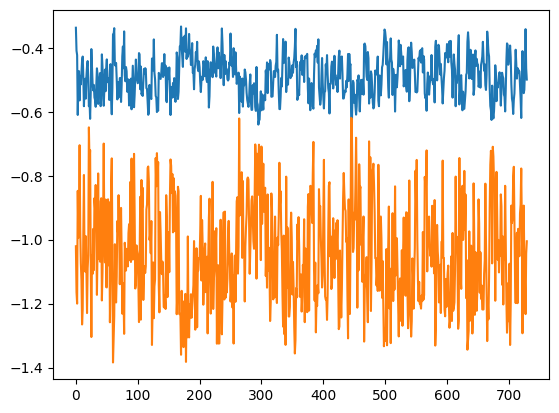

In [95]:
plt.plot(model_samples[6][10])

In [60]:
print(sys.getsizeof(model_samples[0]) * 30, model_samples[0].shape)
synthetic_features = model_samples[10+10+9]

4320 (1000, 730, 2)


In [86]:
temp_var, energy_var = synthetic_features[:,:,0],  synthetic_features[:,:,1]
temp_var, energy_var = scalers['G.air.T'].inverse_transform(temp_var), scalers['G.E_th_I'].inverse_transform(energy_var)

synthetic_features_rescaled = np.stack((temp_var, energy_var),axis=-1)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

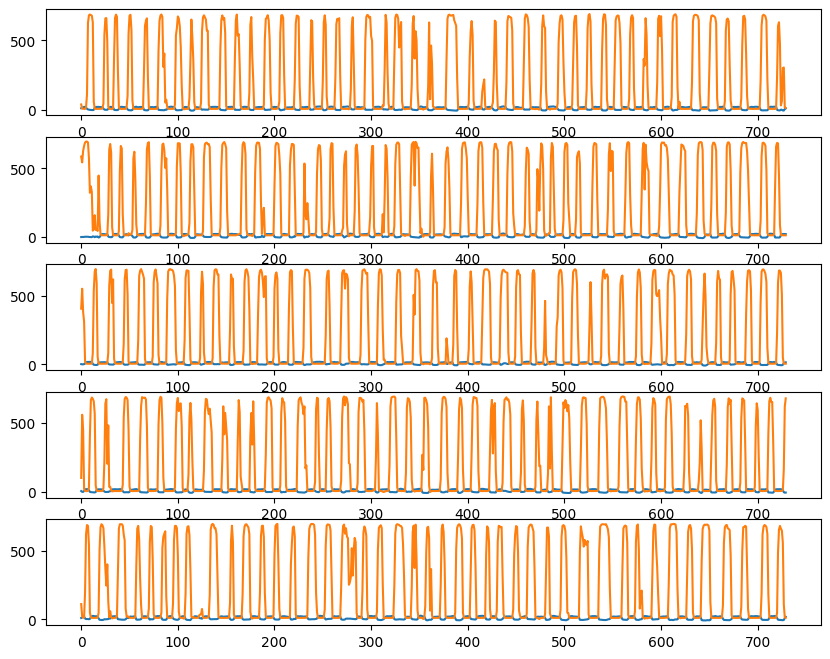

In [87]:
import random

fig, ax = plt.subplots(5,1, figsize=(10,8))

indices = random.sample(range(0,1000),5)
for i, sample in enumerate(indices):
    ax[i].plot(synthetic_features_rescaled[sample])

plt.plot    


In [47]:
np.save(f'../../data/gan_synthetic_data/{model_name}_generated_samples.npy', synthetic_features)
np.save(f'../../data/gan_synthetic_data/{model_name}_rescaled_samples.npy', synthetic_features_rescaled)

In [85]:
from joblib import dump, load

model_filename = f'../../data/models/{model_name}_model_samples2.joblib'

dump(model_samples, model_filename)

['../../data/models/el_v_sky_model_samples1.joblib']

In [70]:
model2 = load(model_filename)

[array([[[-0.08539975, -0.8757883 ],
        [ 0.39181805, -0.9588167 ],
        [-0.84664845, -0.39141083],
        ...,
        [-0.41903514, -0.97234666],
        [-0.604903  , -0.96672493],
        [ 0.01113296, -0.9739032 ]],

       [[ 0.26095343, -1.0136793 ],
        [ 0.6174562 , -1.0537468 ],
        [ 0.51964927, -0.89203626],
        ...,
        [-0.98768413, -1.0255989 ],
        [-0.70073324, -1.0525655 ],
        [ 0.23171806, -1.0548936 ]],

       [[-0.96303046, -0.1269396 ],
        [-0.92660147, -0.87110543],
        [-0.95817536, -0.97221345],
        ...,
        [ 0.6369041 , -0.9933816 ],
        [ 0.62675273, -0.9686887 ],
        [-0.02790302,  0.0791254 ]],

       ...,

       [[-0.04859865, -1.0010322 ],
        [-0.26297164, -0.9504975 ],
        [-0.95810926, -0.38660336],
        ...,
        [-0.83866525, -0.9766367 ],
        [-0.02710444, -1.0620627 ],
        [ 0.50779593, -1.0638081 ]],

       [[-0.8332864 , -0.51200897],
        [-1.0950816 , -0.4